## Exploratory Data Anaysis

# Initial Data Analysis

In [1]:
#import requried libraries
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns=25

import numpy as np
import random as rand

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('paper')

from pandas.api.types import CategoricalDtype

# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2


inputfile = 'CKME136X10_2018_Initial_Data_Cleaned.csv'

In [2]:
# read data
df_eda = pd.read_csv(inputfile, engine = 'python')

### 1. Look at the Data

In [3]:
print('Display the first few rows of the data')
display(df_eda.head())
print()

# Randomly pick 10 rows
# randomly pick 10 rows from the data set to view
rand.seed(101)
df_rows = list(range(1, len(df_eda.index)))
random_10_rows = rand.sample(df_rows, 10)

display(df_eda.loc[random_10_rows])

Display the first few rows of the data


C_YEAR  C_MNTH  C_WDAY  C_HOUR  C_VEHS  C_CONF  C_RCFG  C_WTHR  C_RSUR  \
0    1999       1       1      12       1       4      13       1       5   
1    1999       1       1      10       1       3      13       1       2   
2    1999       1       1      15       1      51       1       1       1   
3    1999       1       1      23       1       2      13       1       5   
4    1999       1       1       9       2      34       2       1       1   

   C_RALN  C_TRAF  V_TYPE  V_YEAR  P_SEX  P_AGE  P_PSN  P_SAFE  P_USER  P_ISEV  
0       3      18       1    1993      0     25     11       2       1       2  
1       1      18       1    1998      1     65     11       2       1       2  
2       1       6       1    1995      1     17     11       2       1       1  
3       1      10       1    1997      1     25     11       2       1       2  
4       1       1       1    1992      0     33     11       2       1       2

C_YEAR  C_MNTH  C_WDAY  C_HOUR  C_VEHS  C_CONF  C_RCFG  C_WTHR  \
2437529    2008      11       4       9       2      31       2       3   
3553069    2014       2       5      14       3      36       2       1   
816860     2002       3       3      12       2      35       2       1   
3810014    2015       6       7       1       1       6       1       1   
4048557    2016       9       2      14       2      35       2       1   
2261683    2008       1       3       0       1       6       1       1   
3875438    2015      10       5      19       3      21       1       1   
1504391    2004      11       3      15       2      36       2       1   
1959322    2006       9       7      19       2      21       1       3   
203512     1999      10       7      23       2      35       2       1   

         C_RSUR  C_RALN  C_TRAF  V_TYPE  V_YEAR  P_SEX  P_AGE  P_PSN  P_SAFE  \
2437529       2       1       1       1    1999      0     43     11       2   
3553069       1       4       3       1    2007      0     36     11       2   
816860        1       1       3       1    2001      1     32     13       2   
3810014       1       3      18       1    2015      1     18     23      12   
4048557       1       1       3      17    1989      1     19     11       2   
2261683       5       4      18       1    2006      1     21     11       2   
3875438       1       1      18       1    2015      1     27     11       2   
1504391       1       1       1       1    1992      1     40     11       2   
1959322       1       1      18       1    2006      0     43     13       2   
203512        1       1       1       1    1995      0     16     13       2   

         P_USER  P_ISEV  
2437529       1       1  
3553069       1       2  
816860        2       2  
3810014       2       2  
4048557       4       2  
2261683       1       2  
3875438       1       2  
1504391       1       2  
1959322       2       1  
203512        2       1

### 2. Dimensions of Your Data

In [4]:
print('Number of Rows: {}'.format(df_eda.shape[0]))
print('Number of Columns: {}'.format(df_eda.shape[1]))
print()
print('Column Names: {}'.format(df_eda.columns.values))
print()

#check for nun numeric values
print("Number of Null values: {}".format(df_eda.isnull().sum().sum()))
print()
print("Number of NaN: {0}".format(df_eda.isna().sum().sum()))
print()
print("Number of Non Numeric: {}".format(df_eda[df_eda.columns].apply(lambda x: x.astype(str).str.contains('[^0-9]')).sum().sum()))
print()
print('Information on the imported data')
print(df_eda.info())

Number of Rows: 4116904
Number of Columns: 19

Column Names: ['C_YEAR' 'C_MNTH' 'C_WDAY' 'C_HOUR' 'C_VEHS' 'C_CONF' 'C_RCFG' 'C_WTHR'
 'C_RSUR' 'C_RALN' 'C_TRAF' 'V_TYPE' 'V_YEAR' 'P_SEX' 'P_AGE' 'P_PSN'
 'P_SAFE' 'P_USER' 'P_ISEV']

Number of Null values: 0

Number of NaN: 0

Number of Non Numeric: 0

Information on the imported data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116904 entries, 0 to 4116903
Data columns (total 19 columns):
C_YEAR    int64
C_MNTH    int64
C_WDAY    int64
C_HOUR    int64
C_VEHS    int64
C_CONF    int64
C_RCFG    int64
C_WTHR    int64
C_RSUR    int64
C_RALN    int64
C_TRAF    int64
V_TYPE    int64
V_YEAR    int64
P_SEX     int64
P_AGE     int64
P_PSN     int64
P_SAFE    int64
P_USER    int64
P_ISEV    int64
dtypes: int64(19)
memory usage: 596.8 MB
None


In [5]:
#make two copies of the data file
df_backup = df_eda.copy()

#Split between data and class
df_X = df_eda[df_eda.columns[0:df_eda.columns.size -1]].copy()

#class with 3 levels
df_Ym = df_eda[df_eda.columns[-1]].copy()

#class with 2 levels
df_Yb = df_eda[df_eda.columns[-1]].copy()
df_Yb.replace(to_replace = 3, value = 2, inplace = True)

# check the levels
print(df_Ym.unique())
print(df_Yb.unique())

[2 1 3]
[2 1]


### 3. Data Type For Each Attribute

In [6]:
df_X = df_X.astype('category')
df_X['C_YEAR'] = df_X['C_YEAR'].astype(CategoricalDtype(ordered=True))
df_X['C_MNTH'] = df_X['C_MNTH'].astype(CategoricalDtype(ordered=True))
df_X['C_WDAY'] = df_X['C_WDAY'].astype(CategoricalDtype(ordered=True))
df_X['C_HOUR'] = df_X['C_HOUR'].astype(CategoricalDtype(ordered=True))
df_X['C_VEHS'] = df_X['C_VEHS'].astype(CategoricalDtype(ordered=True))
df_X['V_YEAR'] = df_X['V_YEAR'].astype(CategoricalDtype(ordered=True))
df_X['P_PSN'] = df_X['P_PSN'].astype(CategoricalDtype(ordered=True))
df_X['P_AGE'] = df_X['P_AGE'].astype('int')
df_Yb = df_Yb.astype(CategoricalDtype())
df_Ym = df_Ym.astype(CategoricalDtype())
print(df_X.info())
print('Yb: {}'.format(df_Yb.dtypes))
print('Ym: {}'.format(df_Ym.dtypes))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116904 entries, 0 to 4116903
Data columns (total 18 columns):
C_YEAR    category
C_MNTH    category
C_WDAY    category
C_HOUR    category
C_VEHS    category
C_CONF    category
C_RCFG    category
C_WTHR    category
C_RSUR    category
C_RALN    category
C_TRAF    category
V_TYPE    category
V_YEAR    category
P_SEX     category
P_AGE     int32
P_PSN     category
P_SAFE    category
P_USER    category
dtypes: category(17), int32(1)
memory usage: 82.5 MB
None
Yb: category
Ym: category


### 4. Descriptive Statistics

In [7]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
print('Descriptive Summary of Categorical Variable(s)')
display(df_X[df_X.columns[0:9]].describe(exclude=[int]))
display(df_X[df_X.columns[9:]].describe(exclude=[int]))
print()
print('Descriptive Summary of Numeric Variable(s)')
display(df_X.describe())

Descriptive Summary of Categorical Variable(s)


C_YEAR   C_MNTH   C_WDAY   C_HOUR   C_VEHS   C_CONF   C_RCFG   C_WTHR   C_RSUR
count   4116904  4116904  4116904  4116904  4116904  4116904  4116904  4116904  4116904
unique       18       12        7       24       52       19       11        8       10
top        2000        8        5       16        2       21        2        1        1
freq     265083   377082   700301   368156  2548096  1329801  2117563  2909038  2744335

C_RALN   C_TRAF   V_TYPE   V_YEAR    P_SEX    P_PSN   P_SAFE   P_USER
count   4116904  4116904  4116904  4116904  4116904  4116904  4116904  4116904
unique        7       18       14      113        2       14        7        5
top           1       18        1     2000        1       11        2        1
freq    3194454  2236941  3636587   235127  2217544  2740060  3733829  2675706


Descriptive Summary of Numeric Variable(s)


P_AGE
count  4.117e+06
mean   3.650e+01
std    1.869e+01
min    1.000e+00
25%    2.100e+01
50%    3.400e+01
75%    4.900e+01
max    9.900e+01

### 5. Class Distribution

In [8]:
print("Binary Class Distribution")
display(df_Yb.describe())
display(df_Yb.groupby(df_Yb).size())

Binary Class Distribution


count     4116904
unique          2
top             2
freq      2401099
Name: P_ISEV, dtype: int64

P_ISEV
1    1715805
2    2401099
Name: P_ISEV, dtype: int64

In [9]:
print("Multi Class Distribution")
display(df_Ym.describe())
display(df_Ym.groupby(df_Ym).size())

Multi Class Distribution


count     4116904
unique          3
top             2
freq      2372702
Name: P_ISEV, dtype: int64

P_ISEV
1    1715805
2    2372702
3      28397
Name: P_ISEV, dtype: int64

### 6. Correlation Between Attributes

In [10]:
# many of the values are categorical, it this test is not very useful.
# lets redo the test with numeric and ordinal only
print('Spearman rank correlation for all independent variable')
full_corr = df_X.astype('int').corr(method='spearman')
print (full_corr)




Spearman rank correlation for all independent variable
        C_YEAR     C_MNTH  C_WDAY  C_HOUR  C_VEHS  C_CONF  C_RCFG  C_WTHR  C_RSUR  C_RALN  \
C_YEAR   1.000 -3.017e-03  -0.018  -0.011   0.007   0.022  -0.038  -0.016  -0.010  -0.019   
C_MNTH  -0.003  1.000e+00   0.002   0.024  -0.007  -0.011  -0.002   0.003  -0.071  -0.003   
C_WDAY  -0.018  1.581e-03   1.000   0.011  -0.038  -0.021  -0.023   0.009  -0.002   0.025   
C_HOUR  -0.011  2.410e-02   0.011   1.000   0.033   0.037   0.023  -0.008  -0.044  -0.027   
C_VEHS   0.007 -6.751e-03  -0.038   0.033   1.000   0.391   0.102  -0.066  -0.106  -0.155   
C_CONF   0.022 -1.073e-02  -0.021   0.037   0.391   1.000   0.334  -0.047  -0.078  -0.141   
C_RCFG  -0.038 -1.982e-03  -0.023   0.023   0.102   0.334   1.000  -0.071  -0.083  -0.123   
C_WTHR  -0.016  2.731e-03   0.009  -0.008  -0.066  -0.047  -0.071   1.000   0.637   0.107   
C_RSUR  -0.010 -7.113e-02  -0.002  -0.044  -0.106  -0.078  -0.083   0.637   1.000   0.116   
C_RALN  -0.019 

In [11]:
corr_columns = ['C_YEAR','C_MNTH','C_WDAY','C_HOUR','C_VEHS','V_YEAR', 'P_PSN', 'P_AGE']
df_X[corr_columns].astype('int').corr(method='spearman')

C_YEAR  C_MNTH  C_WDAY  C_HOUR  C_VEHS  V_YEAR  P_PSN  P_AGE
C_YEAR   1.000  -0.003  -0.018  -0.011   0.007   0.682 -0.041  0.069
C_MNTH  -0.003   1.000   0.002   0.024  -0.007   0.029  0.004  0.004
C_WDAY  -0.018   0.002   1.000   0.011  -0.038  -0.009  0.086 -0.057
C_HOUR  -0.011   0.024   0.011   1.000   0.033  -0.019  0.060 -0.055
C_VEHS   0.007  -0.007  -0.038   0.033   1.000   0.081 -0.067  0.060
V_YEAR   0.682   0.029  -0.009  -0.019   0.081   1.000 -0.076  0.088
P_PSN   -0.041   0.004   0.086   0.060  -0.067  -0.076  1.000 -0.335
P_AGE    0.069   0.004  -0.057  -0.055   0.060   0.088 -0.335  1.000

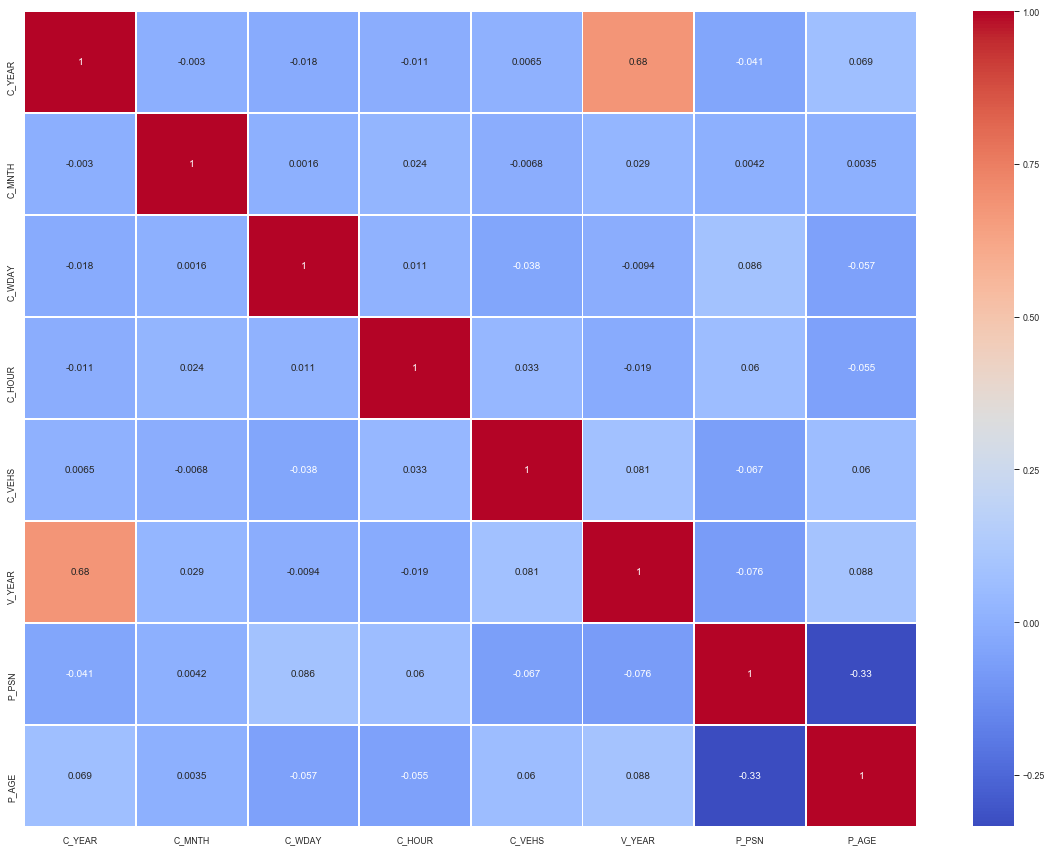

In [12]:
### Heat Map and Corr Plot
corr_columns = ['C_YEAR','C_MNTH','C_WDAY','C_HOUR','C_VEHS','V_YEAR', 'P_PSN', 'P_AGE']
plt.figure(figsize=(20,15))
sns.heatmap(df_X[corr_columns].astype('int').corr(method='spearman'),cmap='coolwarm',annot=True, linecolor='white',linewidths=1)

### Chi Square Test - Dependent vs Independent (binary class)

In [13]:
# modified code from https://machinelearningmastery.com/chi-squared-test-for-machine-learning/

# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2

cat_1 = df_Yb

chi_dep_vs_indep = pd.DataFrame(columns=[df_X.columns], index = ['P_ISEV'])

for col in df_X.columns:
    print(col)
    # contingency table
    table = np.array([df_X[col], cat_1])

    stat, p, dof, expected = chi2_contingency(table)
    #print('dof=%d' % dof)
    #print(expected)

    # interpret test-statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
    if abs(stat) >= critical:
        print('Dependent (reject H0)')
        chi_dep_vs_indep.loc['P_ISEV',col] = 1  
    else:
        print('Independent (fail to reject H0)')
        chi_dep_vs_indep.loc['P_ISEV',col] = 0

display(chi_dep_vs_indep[df_X.columns[0:9]])
display(chi_dep_vs_indep[df_X.columns[9:]])

C_YEAR
probability=0.950, critical=4121623.980, stat=631790.240
Independent (fail to reject H0)
C_MNTH
probability=0.950, critical=4121623.980, stat=2799667.952
Independent (fail to reject H0)
C_WDAY
probability=0.950, critical=4121623.980, stat=1870565.070
Independent (fail to reject H0)
C_HOUR
probability=0.950, critical=4121623.980, stat=2974406.625
Independent (fail to reject H0)
C_VEHS
probability=0.950, critical=4121623.980, stat=1075976.980
Independent (fail to reject H0)
C_CONF
probability=0.950, critical=4121623.980, stat=6133058.616
Dependent (reject H0)
C_RCFG
probability=0.950, critical=4121623.980, stat=1406430.111
Independent (fail to reject H0)
C_WTHR
probability=0.950, critical=4121623.980, stat=1402116.009
Independent (fail to reject H0)
C_RSUR
probability=0.950, critical=4121623.980, stat=1703504.080
Independent (fail to reject H0)
C_RALN
probability=0.950, critical=4121623.980, stat=1016249.881
Independent (fail to reject H0)
C_TRAF
probability=0.950, critical=412162

C_YEAR C_MNTH C_WDAY C_HOUR C_VEHS C_CONF C_RCFG C_WTHR C_RSUR
P_ISEV      0      0      0      0      0      1      0      0      0

C_RALN C_TRAF V_TYPE V_YEAR P_SEX P_AGE P_PSN P_SAFE P_USER
P_ISEV      0      1      0      0     0     0     0      0      0

### Chi Square Test - Dependent vs Independent (Multi class)

In [14]:
# modified code from https://machinelearningmastery.com/chi-squared-test-for-machine-learning/

# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2

cat_1 = df_Ym

chi_dep_vs_indep = pd.DataFrame(columns=[df_X.columns], index = ['P_ISEV'])

for col in df_X.columns:
    print(col)
    # contingency table
    table = np.array([df_X[col], cat_1])

    stat, p, dof, expected = chi2_contingency(table)
    #print('dof=%d' % dof)
    #print(expected)

    # interpret test-statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
    if abs(stat) >= critical:
        print('Dependent (reject H0)')
        chi_dep_vs_indep.loc['P_ISEV',col] = 1  
    else:
        print('Independent (fail to reject H0)')
        chi_dep_vs_indep.loc['P_ISEV',col] = 0

display(chi_dep_vs_indep[df_X.columns[0:9]])
display(chi_dep_vs_indep[df_X.columns[9:]])

C_YEAR
probability=0.950, critical=4121623.980, stat=661646.384
Independent (fail to reject H0)
C_MNTH
probability=0.950, critical=4121623.980, stat=2821427.225
Independent (fail to reject H0)
C_WDAY
probability=0.950, critical=4121623.980, stat=1887023.907
Independent (fail to reject H0)
C_HOUR
probability=0.950, critical=4121623.980, stat=3018859.899
Independent (fail to reject H0)
C_VEHS
probability=0.950, critical=4121623.980, stat=1093617.693
Independent (fail to reject H0)
C_CONF
probability=0.950, critical=4121623.980, stat=6222514.376
Dependent (reject H0)
C_RCFG
probability=0.950, critical=4121623.980, stat=1423204.421
Independent (fail to reject H0)
C_WTHR
probability=0.950, critical=4121623.980, stat=1413719.805
Independent (fail to reject H0)
C_RSUR
probability=0.950, critical=4121623.980, stat=1716097.579
Independent (fail to reject H0)
C_RALN
probability=0.950, critical=4121623.980, stat=1022062.704
Independent (fail to reject H0)
C_TRAF
probability=0.950, critical=412162

C_YEAR C_MNTH C_WDAY C_HOUR C_VEHS C_CONF C_RCFG C_WTHR C_RSUR
P_ISEV      0      0      0      0      0      1      0      0      0

C_RALN C_TRAF V_TYPE V_YEAR P_SEX P_AGE P_PSN P_SAFE P_USER
P_ISEV      0      1      0      0     0     0     0      0      0

In [15]:
### Chi Square Test - compare correlation between independent variables

In [16]:
# modified code from https://machinelearningmastery.com/chi-squared-test-for-machine-learning/


df_chi = pd.DataFrame(columns=[df_X], index = [df_X])

i=0
for c1 in df_X.columns:
    i = i + 1;
    for c2 in df_X.columns[i: len(df_X.columns)]:
        print('c1: {0}, c2: {1}'.format(c1, c2))
        # contingency table
        if (c2 == 'C_HOUR'):
            continue
        if (c2 == 'P_SEX'):
            continue
        table = np.array([df_X[c1], df_X[c2]])
        
        stat, p, dof, expected = chi2_contingency(table)
        print('dof=%d' % dof)
        print(expected)

        # interpret test-statistic
        prob = 0.95
        critical = chi2.ppf(prob, dof)
        print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
        if abs(stat) >= critical:
            df_chi.loc[c1,c2] = 1
            print('Dependent (reject H0)')
        else:
            print('Independent (fail to reject H0)')
            df_chi.loc[c1,c2] = 0

display(df_chi)

c1: C_YEAR, c2: C_MNTH
dof=4116903
[[1993.34355785 1993.34355785 1993.34355785 ... 2021.25036766
  2021.25036766 2021.25036766]
 [   6.65644215    6.65644215    6.65644215 ...    6.74963234
     6.74963234    6.74963234]]
probability=0.950, critical=4121623.980, stat=7298492.358
Dependent (reject H0)
c1: C_YEAR, c2: C_WDAY
dof=4116903
[[1996.00116402 1996.00116402 1996.00116402 ... 2018.95517741
  2018.95517741 2018.95517741]
 [   3.99883598    3.99883598    3.99883598 ...    4.04482259
     4.04482259    4.04482259]]
probability=0.950, critical=4121623.980, stat=3837006.594
Independent (fail to reject H0)
c1: C_YEAR, c2: C_HOUR
c1: C_YEAR, c2: C_VEHS
dof=4116903
[[1997.93464735 1997.93464735 1997.93464735 ... 2015.91605917
  2015.91605917 2015.91605917]
 [   2.06535265    2.06535265    2.06535265 ...    2.08394083
     2.08394083    2.08394083]]
probability=0.950, critical=4121623.980, stat=3091668.731
Independent (fail to reject H0)
c1: C_YEAR, c2: C_CONF
dof=4116903
[[1979.19302483 

dof=4116903
[[ 1.64931781  1.64931781  1.64931781 ... 10.72056579 11.5452247
  11.5452247 ]
 [ 0.35068219  0.35068219  0.35068219 ...  2.27943421  2.4547753
   2.4547753 ]]
probability=0.950, critical=4121623.980, stat=2968781.812
Independent (fail to reject H0)
c1: C_WDAY, c2: C_HOUR
c1: C_WDAY, c2: C_VEHS
dof=4116903
[[1.3192711  1.3192711  1.3192711  ... 5.93671996 5.93671996 5.93671996]
 [0.6807289  0.6807289  0.6807289  ... 3.06328004 3.06328004 3.06328004]]
probability=0.950, critical=4121623.980, stat=2520286.146
Independent (fail to reject H0)
c1: C_WDAY, c2: C_CONF
dof=4116903
[[ 0.71387414  0.57109932  7.4242911  ...  3.99769521  3.99769521
   3.99769521]
 [ 4.28612586  3.42890068 44.5757089  ... 24.00230479 24.00230479
  24.00230479]]
probability=0.950, critical=4121623.980, stat=11788049.631
Dependent (reject H0)
c1: C_WDAY, c2: C_RCFG
dof=4116903
[[9.53233927 9.53233927 1.36176275 ... 5.44705101 5.44705101 5.44705101]
 [4.46766073 4.46766073 0.63823725 ... 2.55294899 2.552

dof=4116903
[[3.25023739 1.62511869 1.08341246 ... 2.70853115 2.70853115 2.70853115]
 [2.74976261 1.37488131 0.91658754 ... 2.29146885 2.29146885 2.29146885]]
probability=0.950, critical=4121623.980, stat=2419310.726
Independent (fail to reject H0)
c1: C_VEHS, c2: C_RALN
dof=4116903
[[2.38018446 1.19009223 1.19009223 ... 1.78513835 1.78513835 1.78513835]
 [1.61981554 0.80990777 0.80990777 ... 1.21486165 1.21486165 1.21486165]]
probability=0.950, critical=4121623.980, stat=1615134.899
Independent (fail to reject H0)
c1: C_VEHS, c2: C_TRAF
dof=4116903
[[ 3.06299344  3.06299344  1.12847127 ...  3.22420363  3.22420363
   3.22420363]
 [15.93700656 15.93700656  5.87152873 ... 16.77579637 16.77579637
  16.77579637]]
probability=0.950, critical=4121623.980, stat=11402224.350
Dependent (reject H0)
c1: C_VEHS, c2: V_TYPE
dof=4116903
[[0.97550063 0.97550063 0.97550063 ... 1.46325095 1.46325095 1.46325095]
 [1.02449937 1.02449937 1.02449937 ... 1.53674905 1.53674905 1.53674905]]
probability=0.950,

dof=4116903
[[2.89270817 1.44635408 0.96423606 ... 3.3748262  3.3748262  3.3748262 ]
 [3.10729183 1.55364592 1.03576394 ... 3.6251738  3.6251738  3.6251738 ]]
probability=0.950, critical=4121623.980, stat=1283540.843
Independent (fail to reject H0)
c1: C_WTHR, c2: C_RALN
dof=4116903
[[2.14583456 1.07291728 1.07291728 ... 2.68229321 2.68229321 2.68229321]
 [1.85416544 0.92708272 0.92708272 ... 2.31770679 2.31770679 2.31770679]]
probability=0.950, critical=4121623.980, stat=1598729.560
Independent (fail to reject H0)
c1: C_WTHR, c2: C_TRAF
dof=4116903
[[ 2.49793089  2.49793089  0.92029033 ...  2.89234103  2.89234103
   2.89234103]
 [16.50206911 16.50206911  6.07970967 ... 19.10765897 19.10765897
  19.10765897]]
probability=0.950, critical=4121623.980, stat=9784135.890
Dependent (reject H0)
c1: C_WTHR, c2: V_TYPE
dof=4116903
[[0.8570947  0.8570947  0.8570947  ... 2.14273674 2.14273674 2.14273674]
 [1.1429053  1.1429053  1.1429053  ... 2.85726326 2.85726326 2.85726326]]
probability=0.950, 

dof=4116903
[[16.78435402 16.78435402  6.18370937 ... 16.78435402 17.66774107
  17.66774107]
 [ 2.21564598  2.21564598  0.81629063 ...  2.21564598  2.33225893
   2.33225893]]
probability=0.950, critical=4121623.980, stat=9048881.983
Dependent (reject H0)
c1: V_TYPE, c2: V_YEAR
dof=4116903
[[   2.17273982    2.17818802    2.1749191  ...    2.19126368
     2.19126368    2.19126368]
 [1991.82726018 1996.82181198 1993.8250809  ... 2008.80873632
  2008.80873632 2008.80873632]]
probability=0.950, critical=4121623.980, stat=30071772.338
Dependent (reject H0)
c1: V_TYPE, c2: P_SEX
c1: V_TYPE, c2: P_AGE
dof=4116903
[[ 1.46466755  3.71800225  1.01400061 ...  1.80266776  1.46466755
   0.11266673]
 [24.53533245 62.28199775 16.98599939 ... 30.19733224 24.53533245
   1.88733327]]
probability=0.950, critical=4121623.980, stat=24825249.880
Dependent (reject H0)
c1: V_TYPE, c2: P_PSN
dof=4116903
[[ 1.54230634  1.54230634  1.54230634 ...  1.54230634  1.7993574
   2.95608716]
 [10.45769366 10.45769366 10

C_YEAR C_MNTH C_WDAY C_HOUR C_VEHS C_CONF C_RCFG C_WTHR C_RSUR C_RALN C_TRAF V_TYPE V_YEAR  \
C_YEAR    NaN      1      0    NaN      0      1      1      0      1      0      1      1      0   
C_MNTH    NaN    NaN      1    NaN      0      1      1      1      1      0      1      1      1   
C_WDAY    NaN    NaN    NaN    NaN      0      1      0      0      0      0      1      1      0   
C_HOUR    NaN    NaN    NaN    NaN      0      1      1      1      1      1      1      1      1   
C_VEHS    NaN    NaN    NaN    NaN    NaN      0      0      0      0      0      1      1      0   
C_CONF    NaN    NaN    NaN    NaN    NaN    NaN      1      1      1      1      1      1      1   
C_RCFG    NaN    NaN    NaN    NaN    NaN    NaN    NaN      0      0      0      1      1      1   
C_WTHR    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN      0      0      1      1      0   
C_RSUR    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN      0      1      1      1   
C_RALN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN      1      0      0   
C_TRAF    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN      1      1   
V_TYPE    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN      1   
V_YEAR    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
P_SEX     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
P_AGE     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
P_PSN     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
P_SAFE    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
P_USER    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

       P_SEX P_AGE P_PSN P_SAFE P_USER  
C_YEAR   NaN     1     1      1      0  
C_MNTH   NaN     1     1      1      0  
C_WDAY   NaN     1     1      1      0  
C_HOUR   NaN     1     1      1      0  
C_VEHS   NaN     1     0      0      0  
C_CONF   NaN     1     1      1      1  
C_RCFG   NaN     1     1      0      0  
C_WTHR   NaN     1     1      0      0  
C_RSUR   NaN     1     1      0      0  
C_RALN   NaN     1     0      0      0  
C_TRAF   NaN     1     1      1      1  
V_TYPE   NaN     1     1      0      0  
V_YEAR   NaN     1     1      1      0  
P_SEX    NaN     1     0      0      0  
P_AGE    NaN   NaN     1      1      1  
P_PSN    NaN   NaN   NaN      1      0  
P_SAFE   NaN   NaN   NaN    NaN      0  
P_USER   NaN   NaN   NaN    NaN    NaN

### 7. Skewness of independent Variables

In [17]:
print(df_X.skew())

C_YEAR     0.137
C_MNTH    -0.106
C_WDAY    -0.054
C_HOUR    -0.504
C_VEHS    25.381
C_CONF    -0.186
C_RCFG     5.505
C_WTHR     2.097
C_RSUR     3.290
C_RALN     2.508
C_TRAF    -0.252
V_TYPE     4.077
V_YEAR    -4.672
P_SEX     -0.155
P_AGE      0.447
P_PSN      5.642
P_SAFE     3.898
P_USER     2.532
dtype: float64


## 8a. Data Visualization for Binary Class

In [18]:
df_binary = df_X.copy()
df_binary['P_ISEV'] = df_Yb

### Histogram per variable

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029EBD9A9C18>,
      dtype=object)

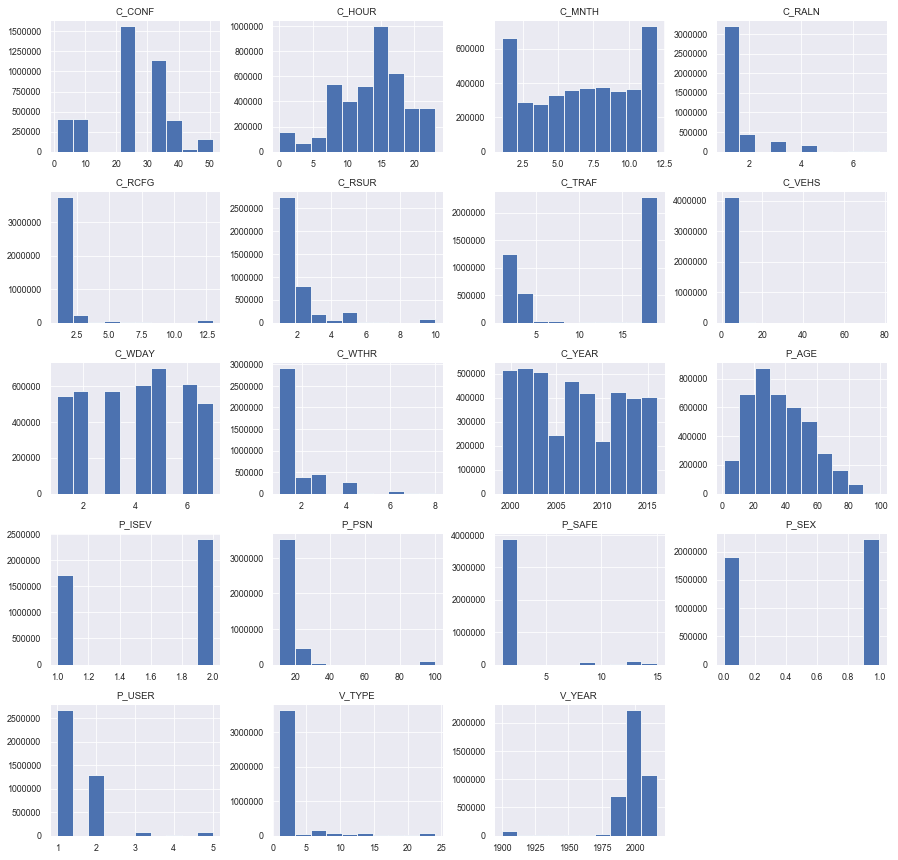

In [19]:
df_binary.astype('int').hist(figsize = [15, 15])

### Histogram per variable group by binary class attribute

P_ISEV
1    [[AxesSubplot(0.125,0.758226;0.158163x0.121774...
2    [[AxesSubplot(0.125,0.758226;0.158163x0.121774...
dtype: object

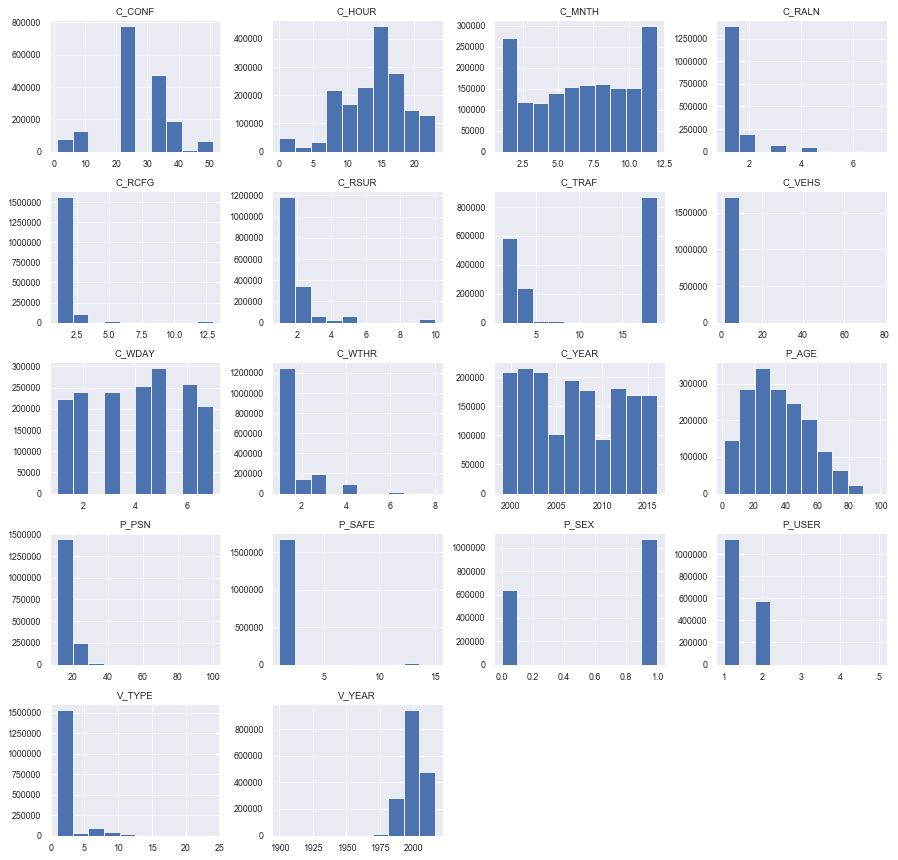

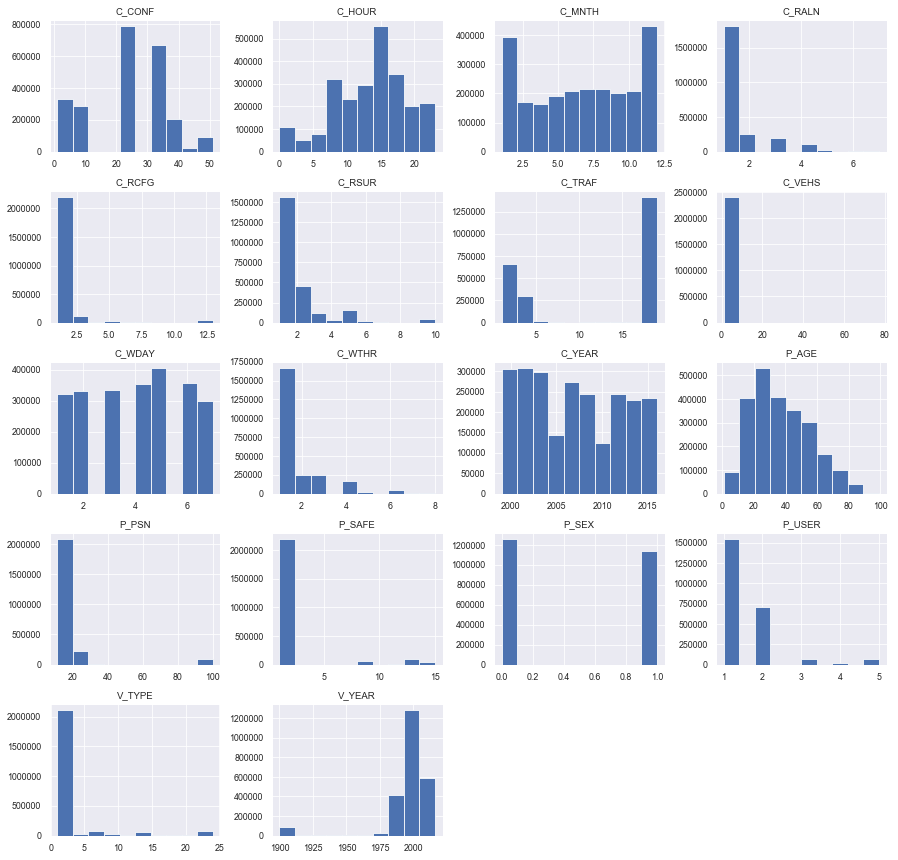

In [20]:
df_binary.astype('int').groupby('P_ISEV').hist(figsize = [15, 15])

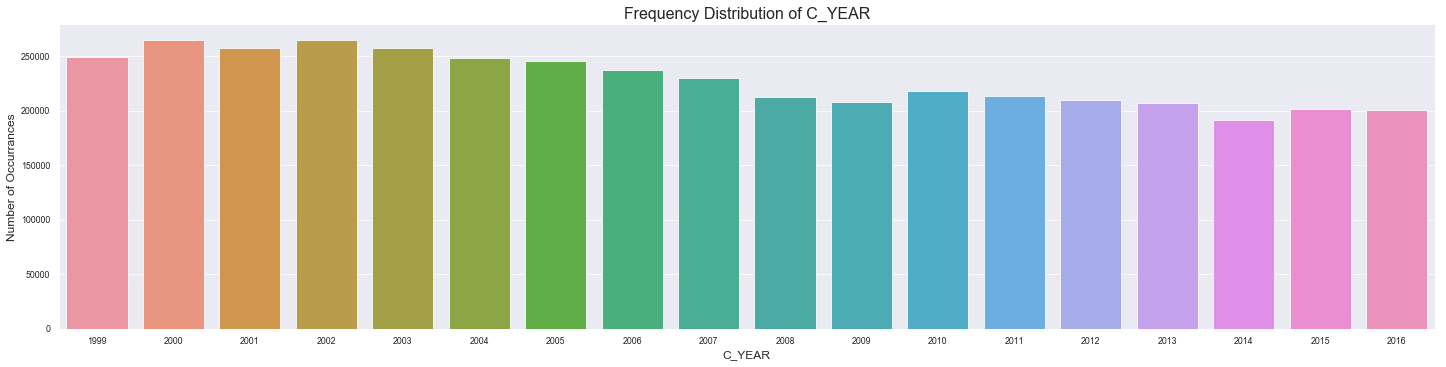

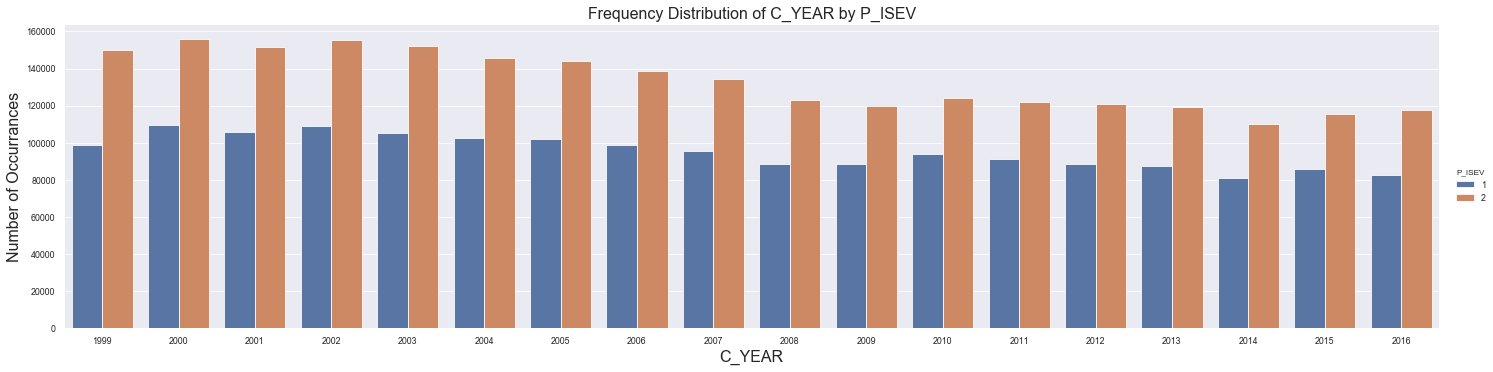

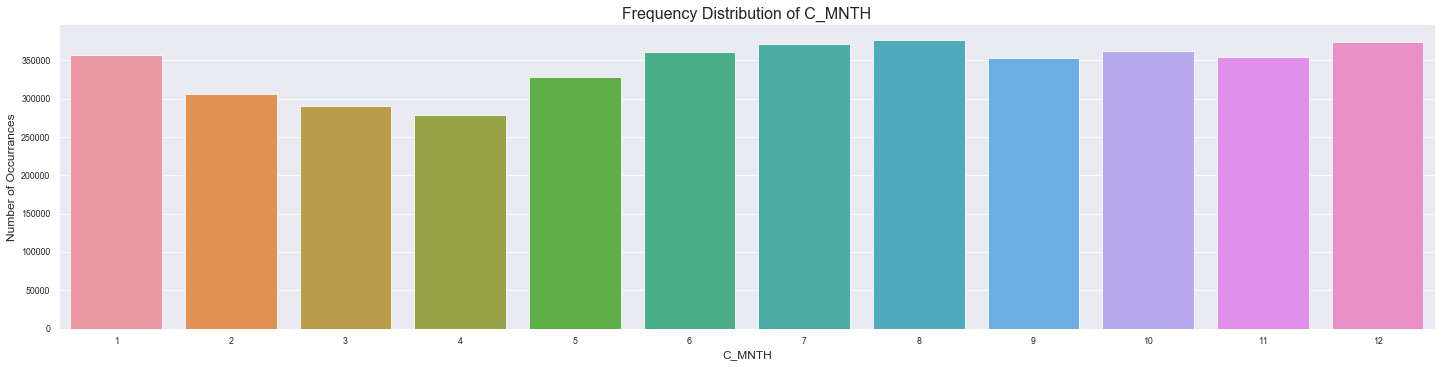

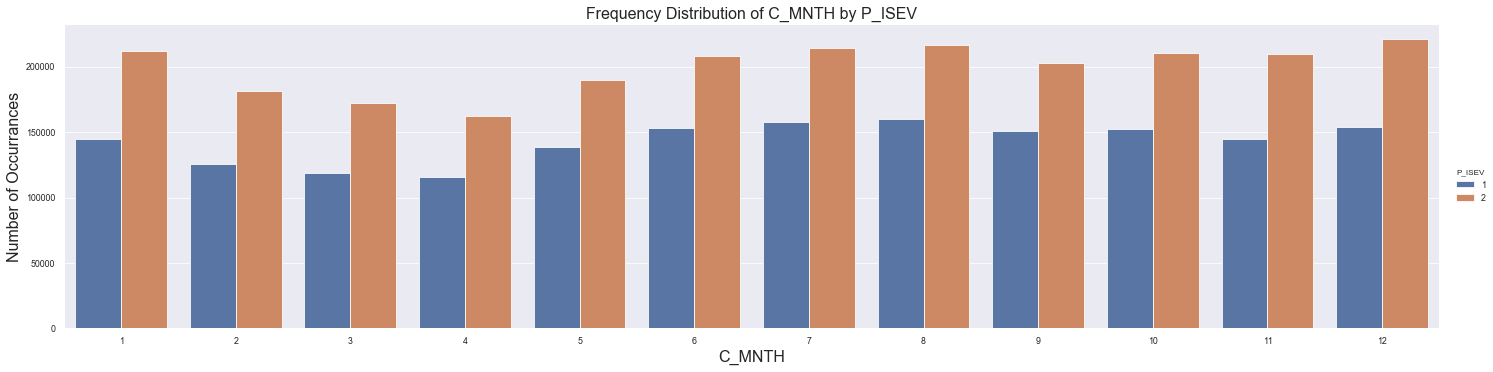

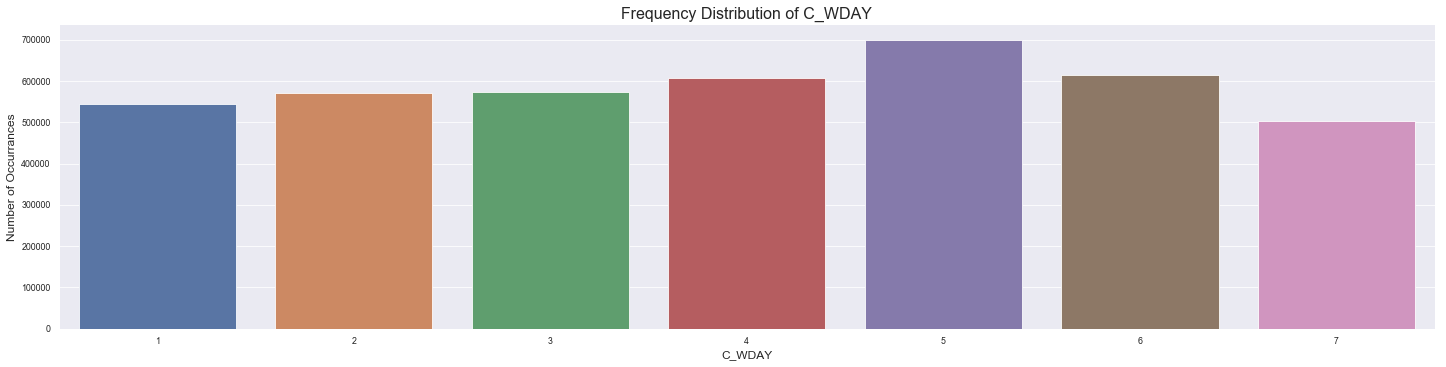

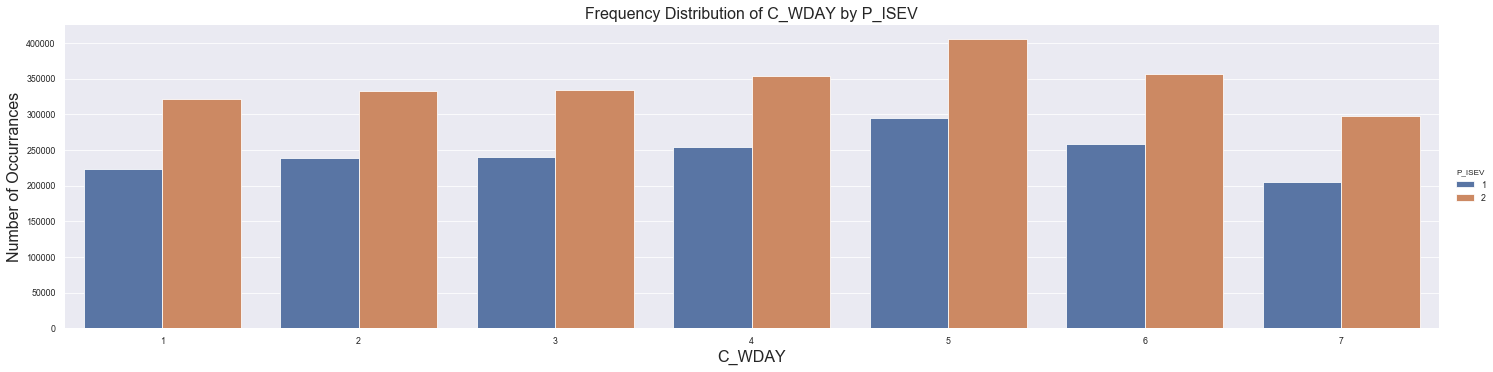

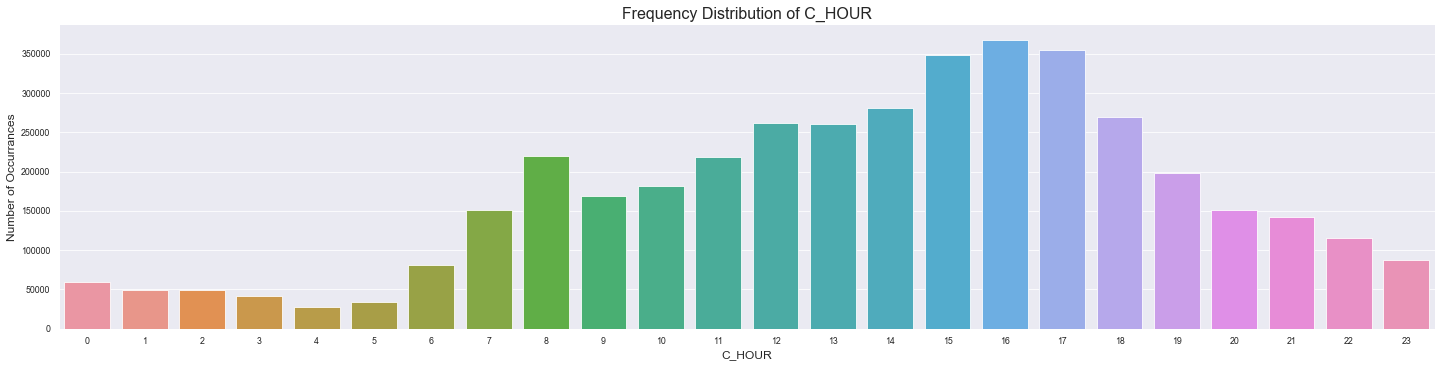

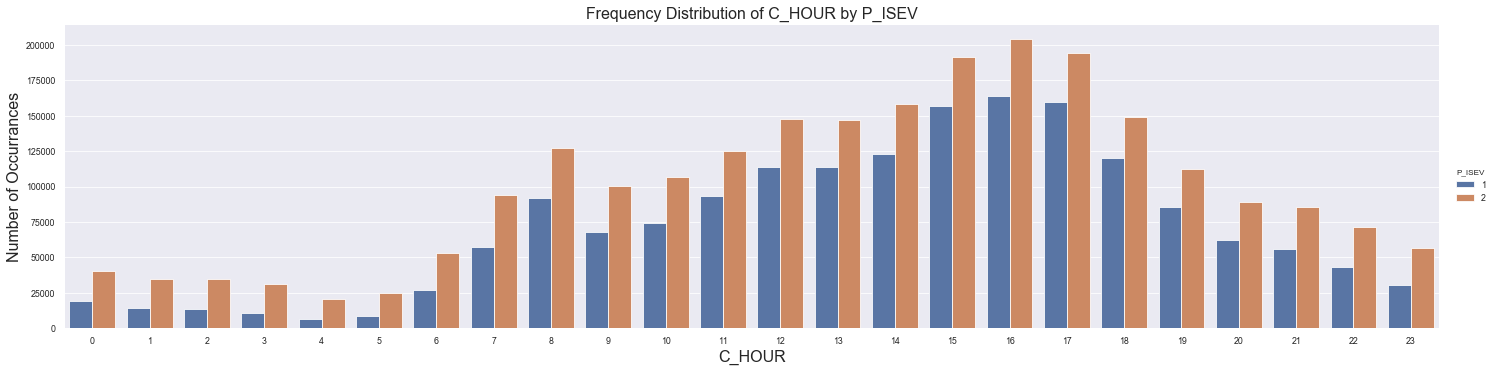

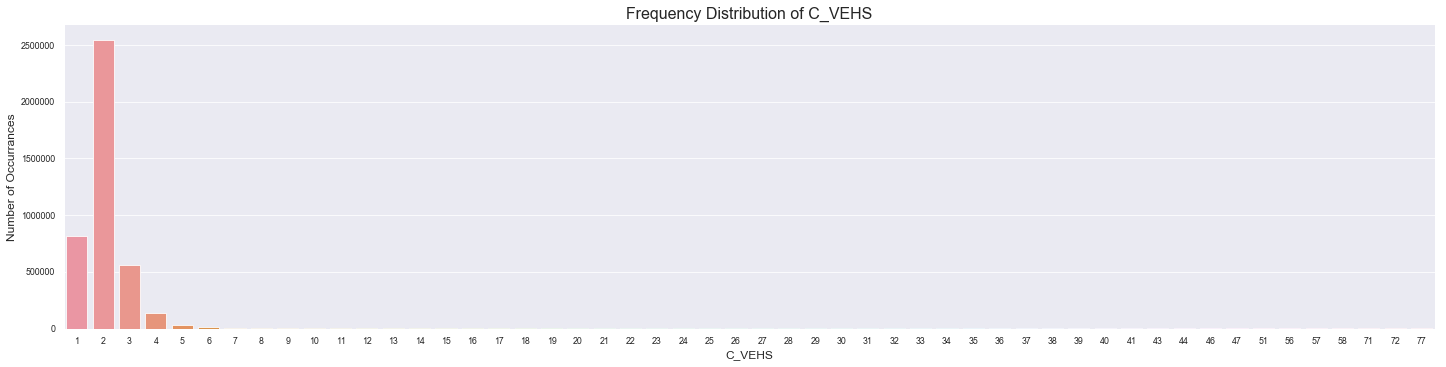

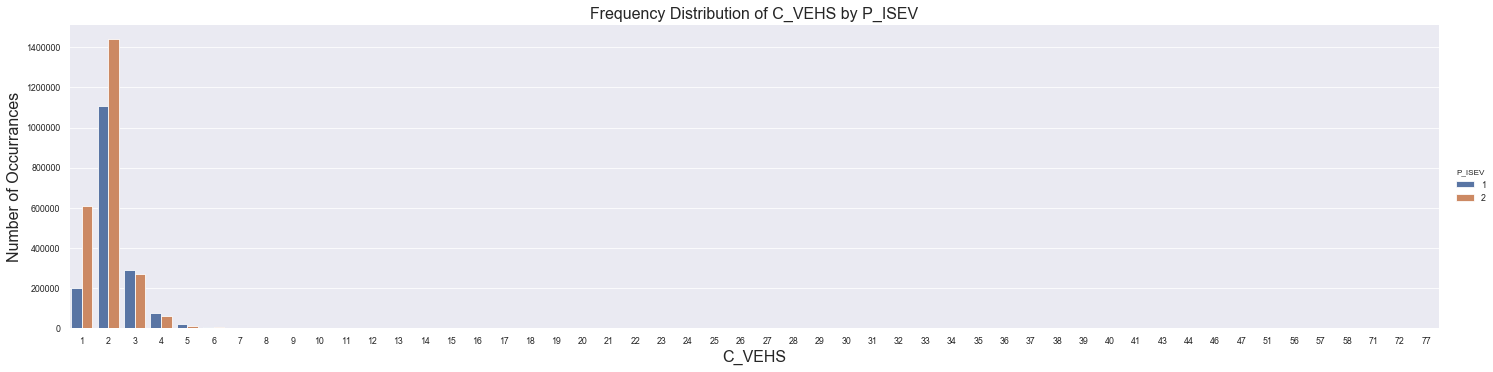

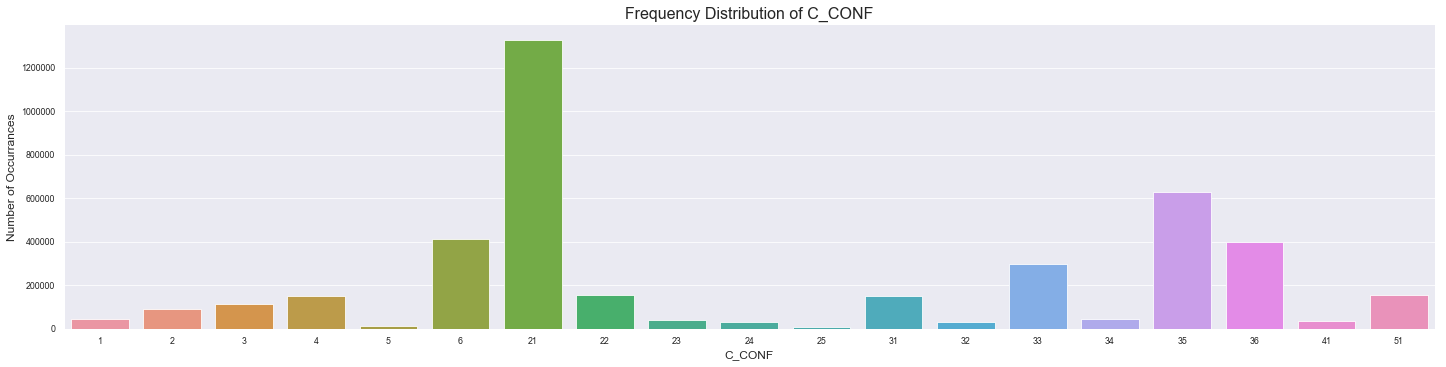

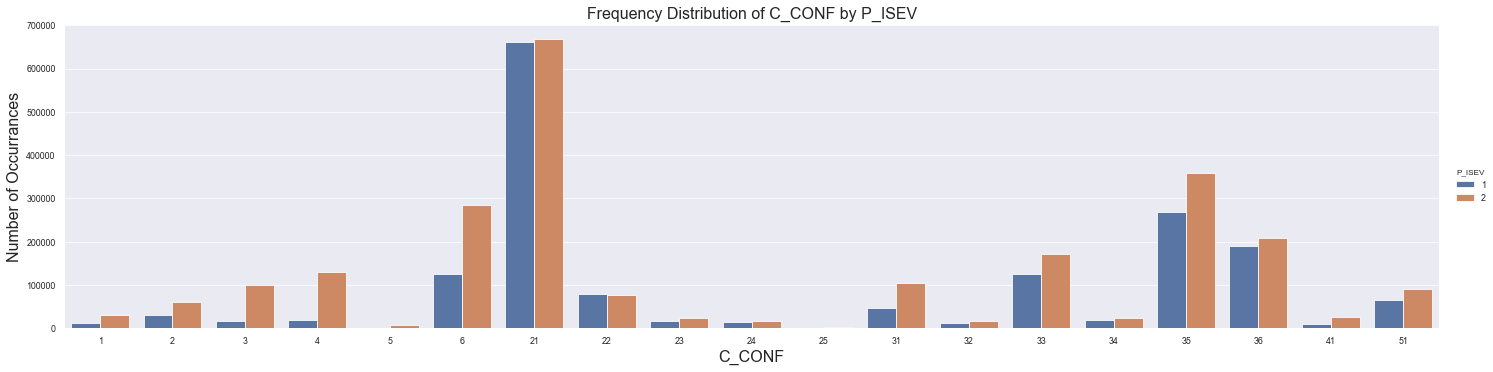

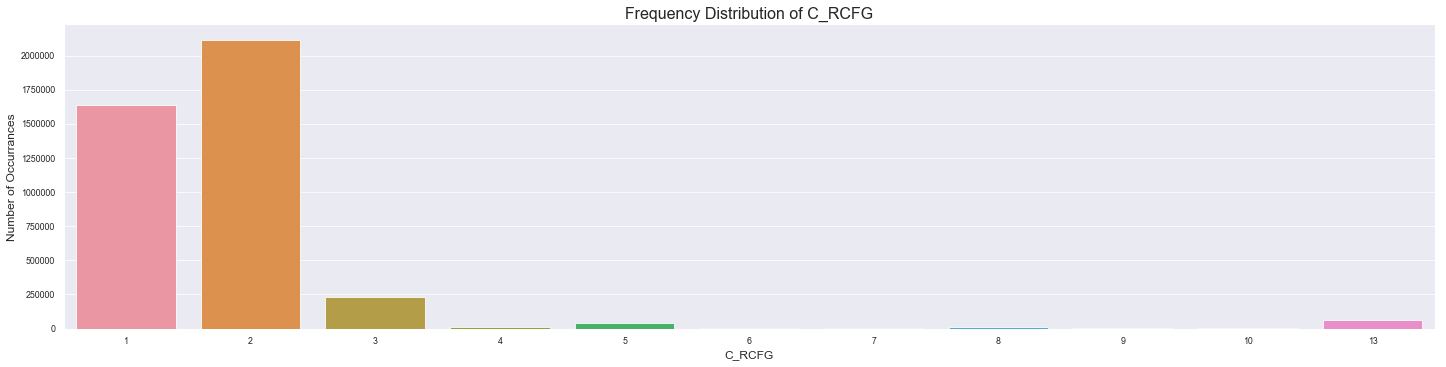

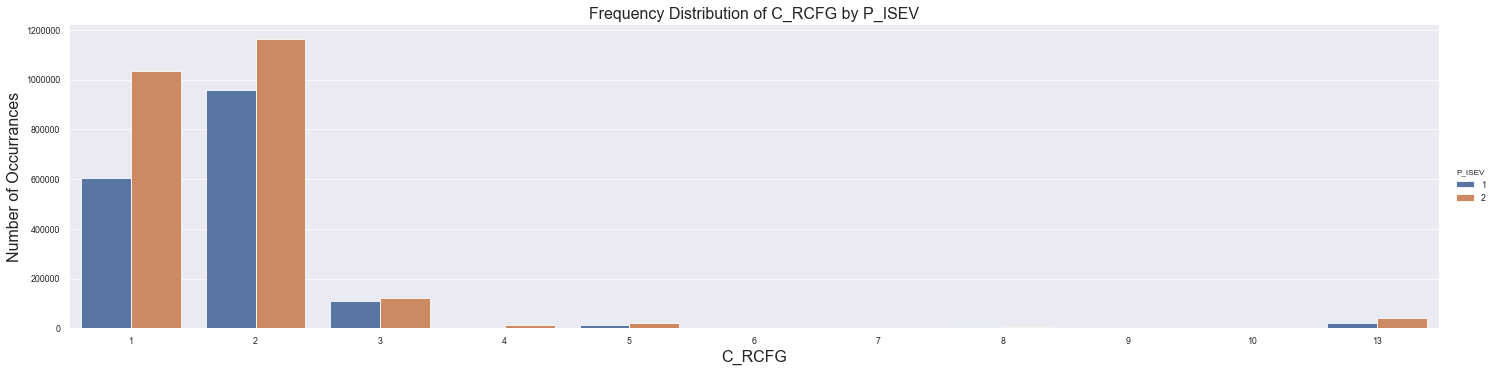

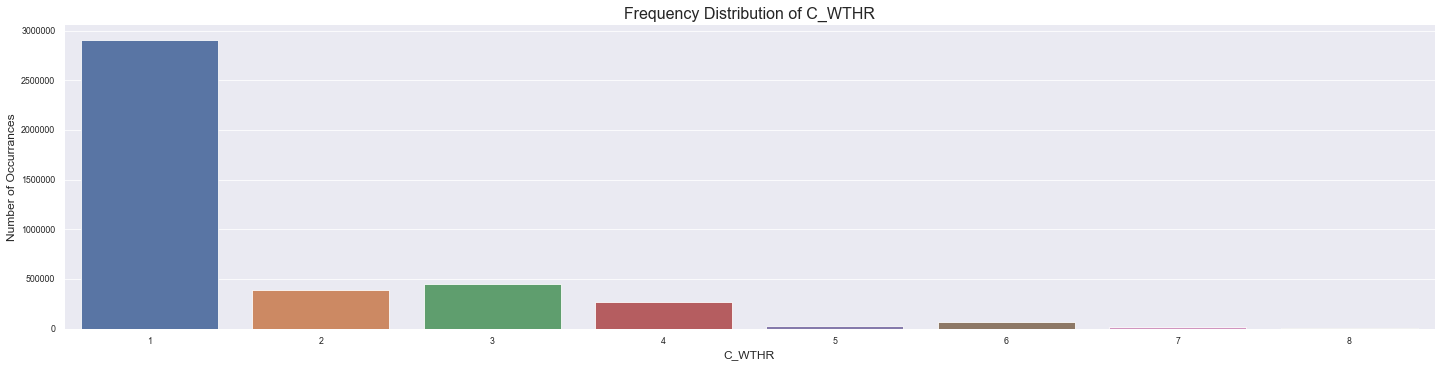

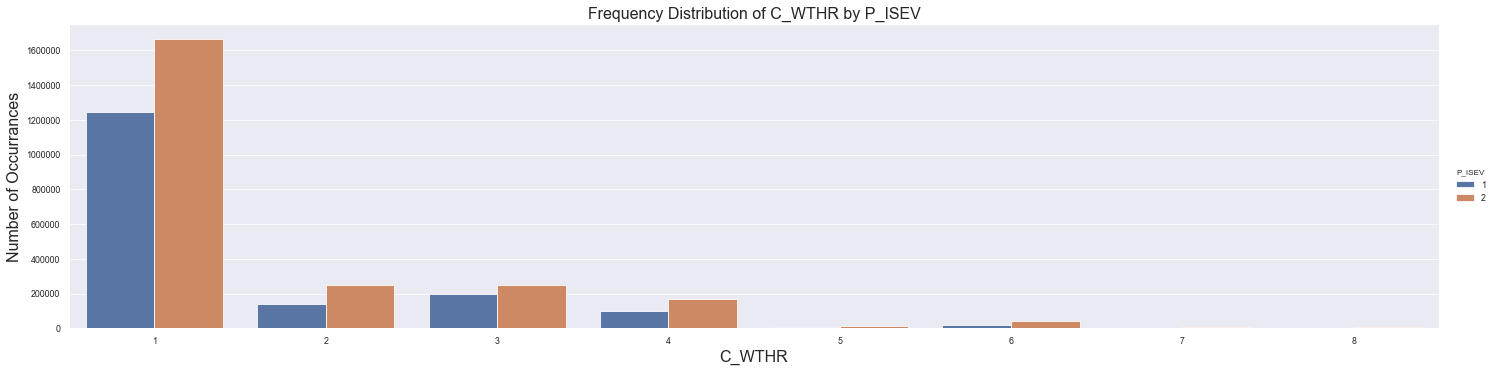

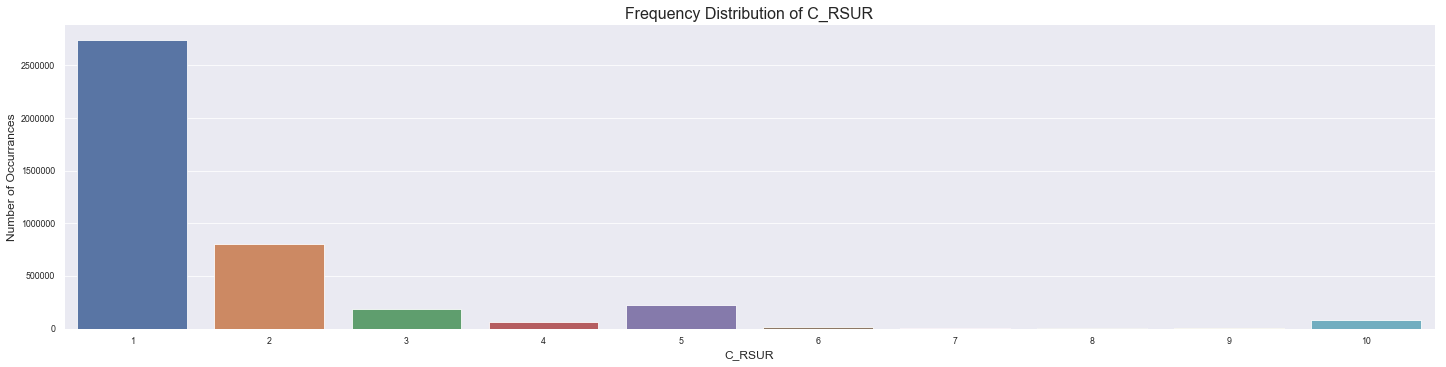

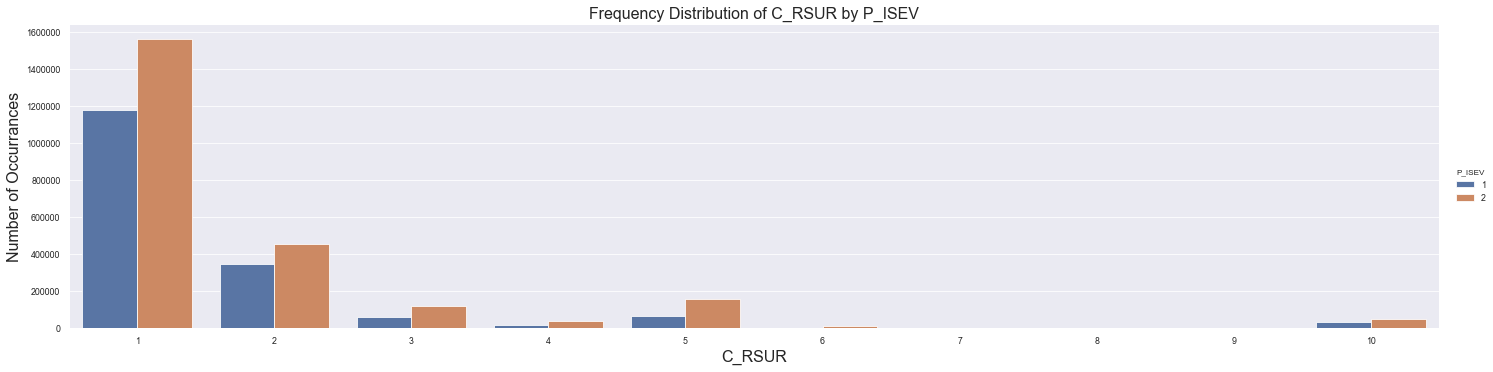

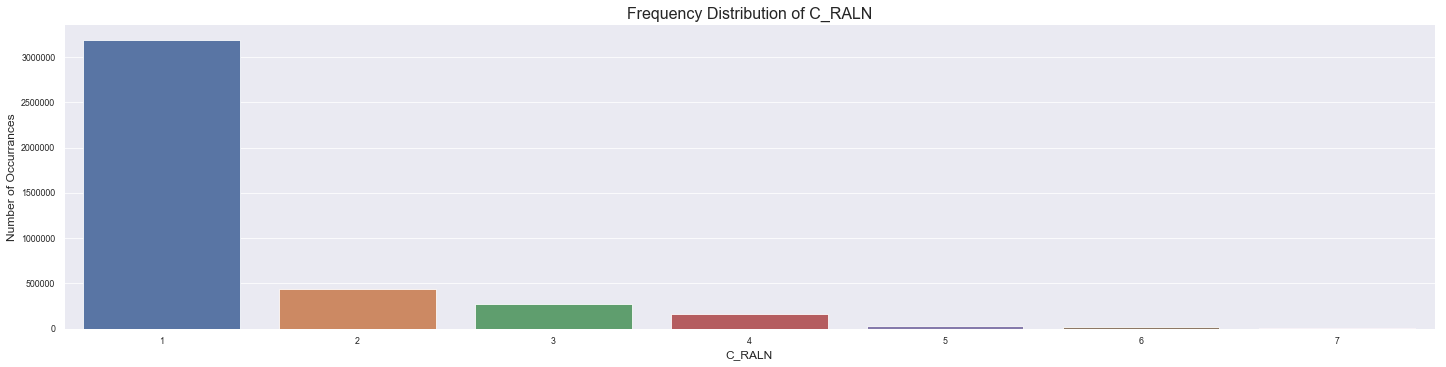

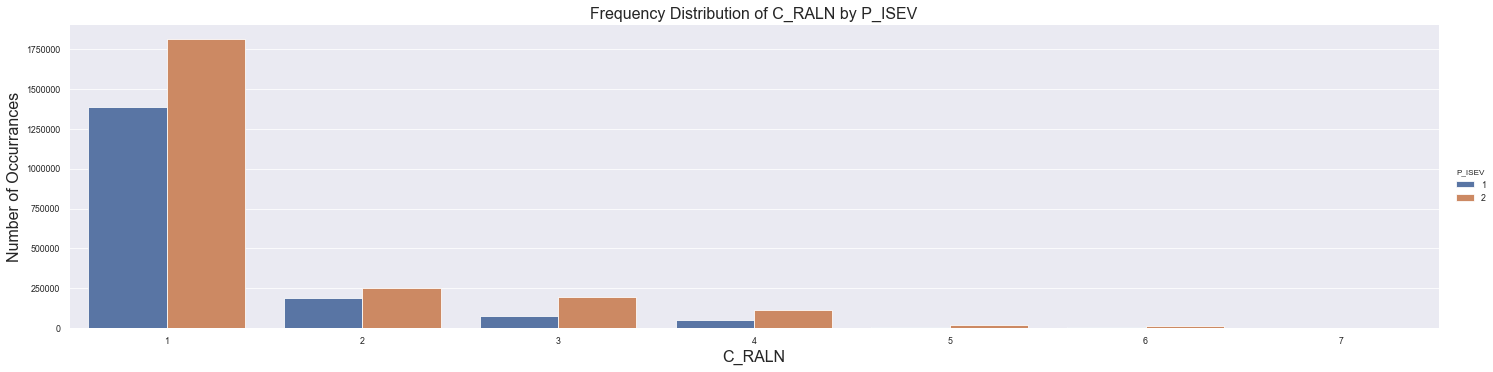

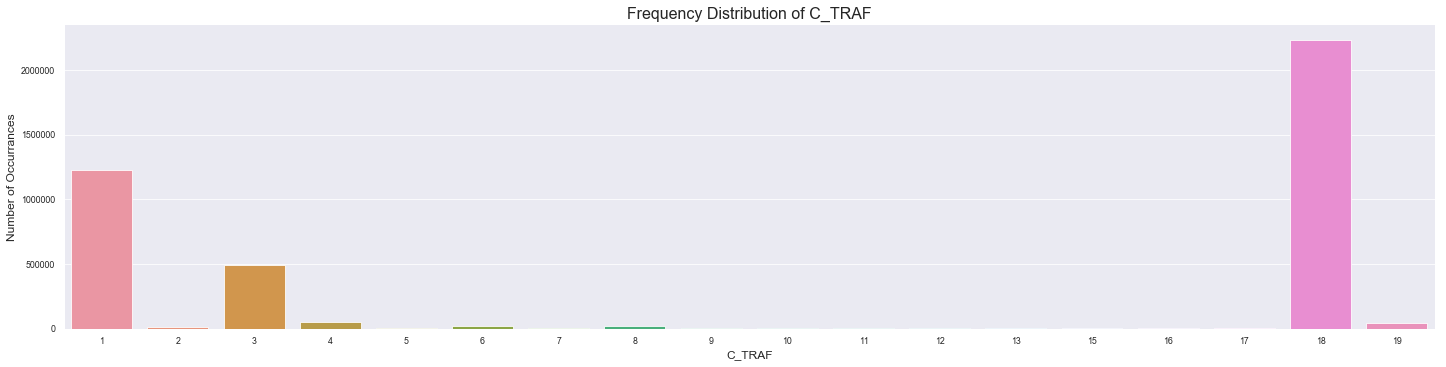

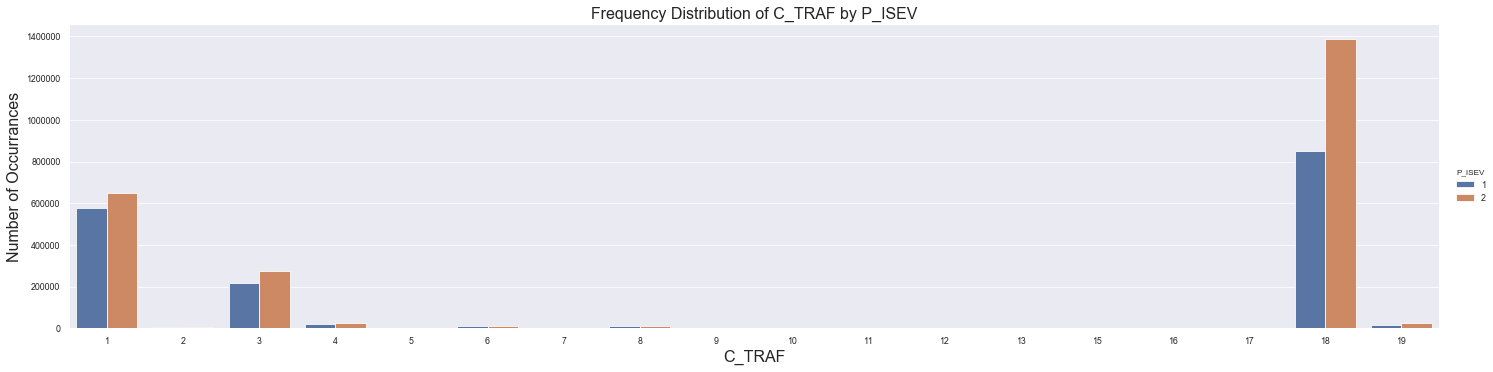

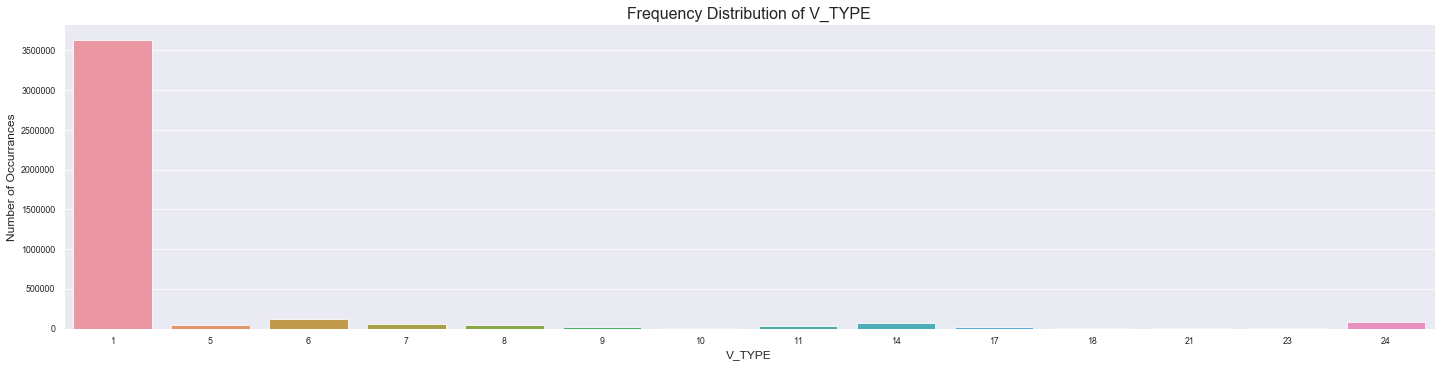

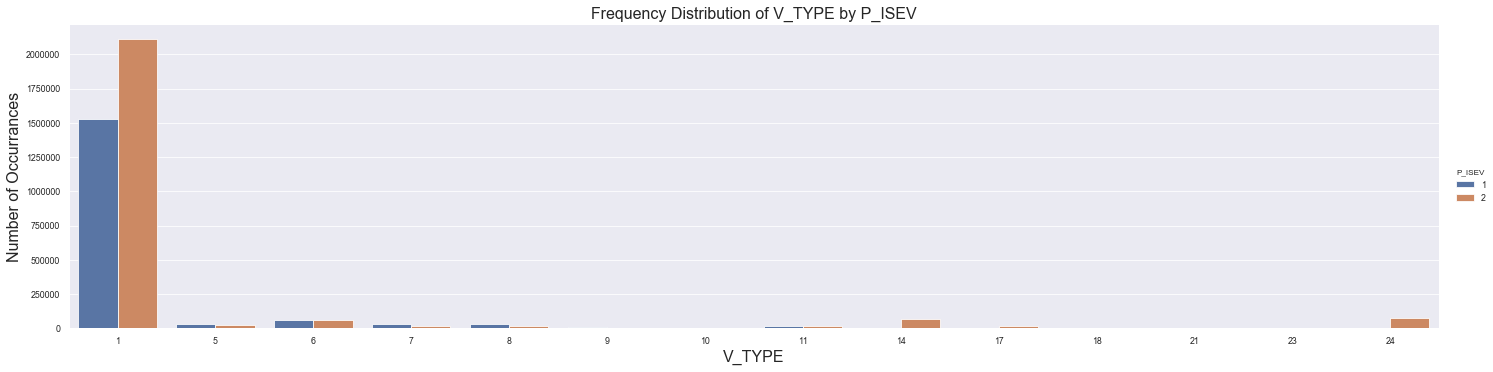

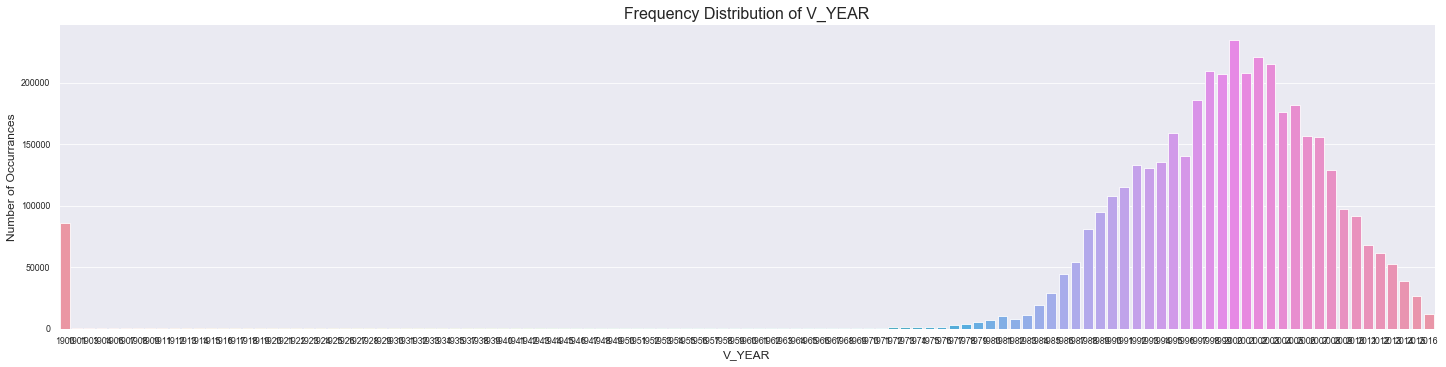

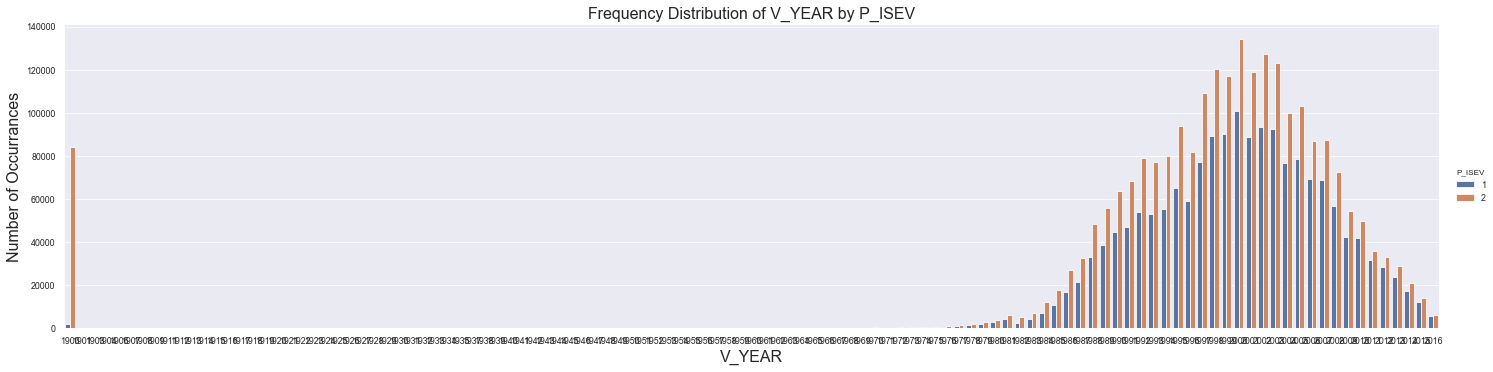

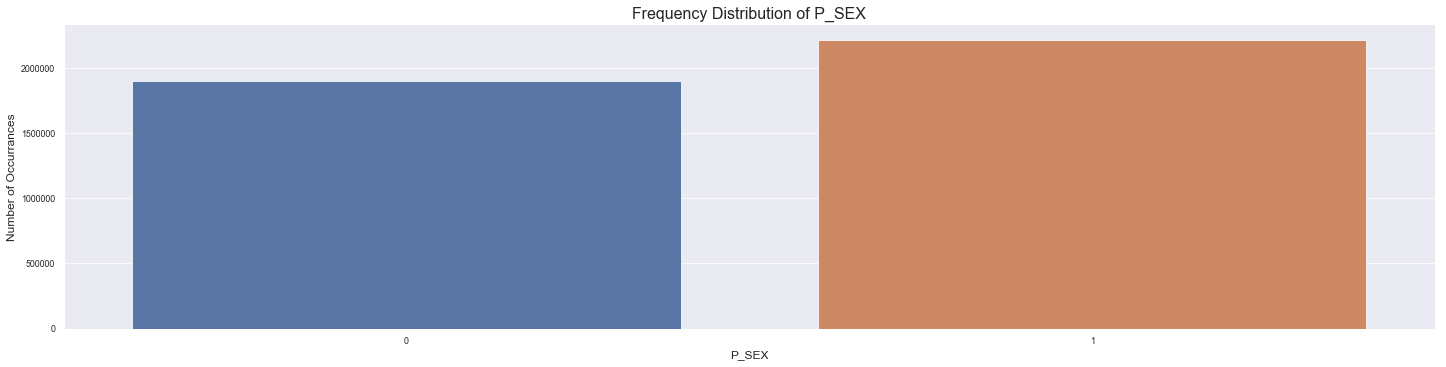

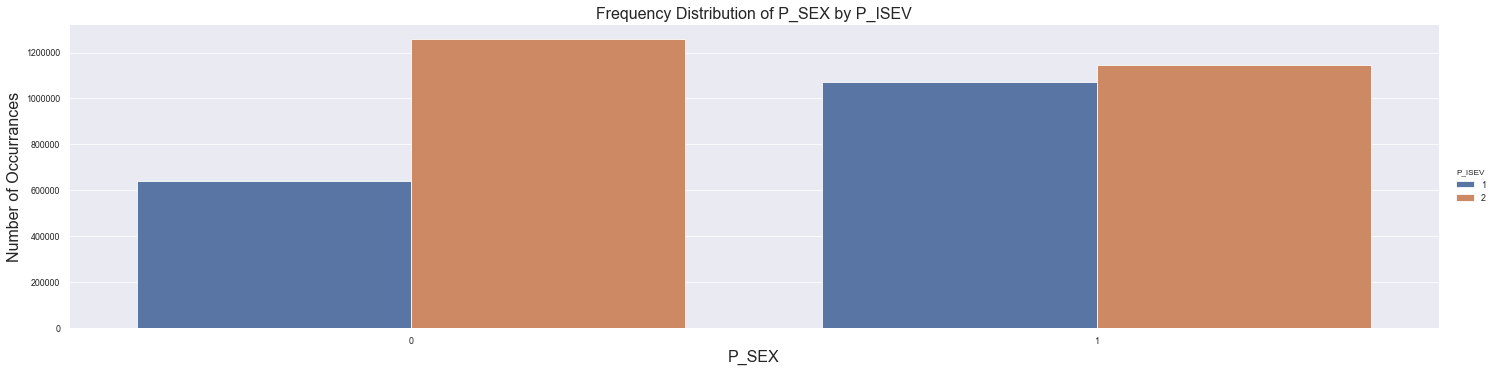

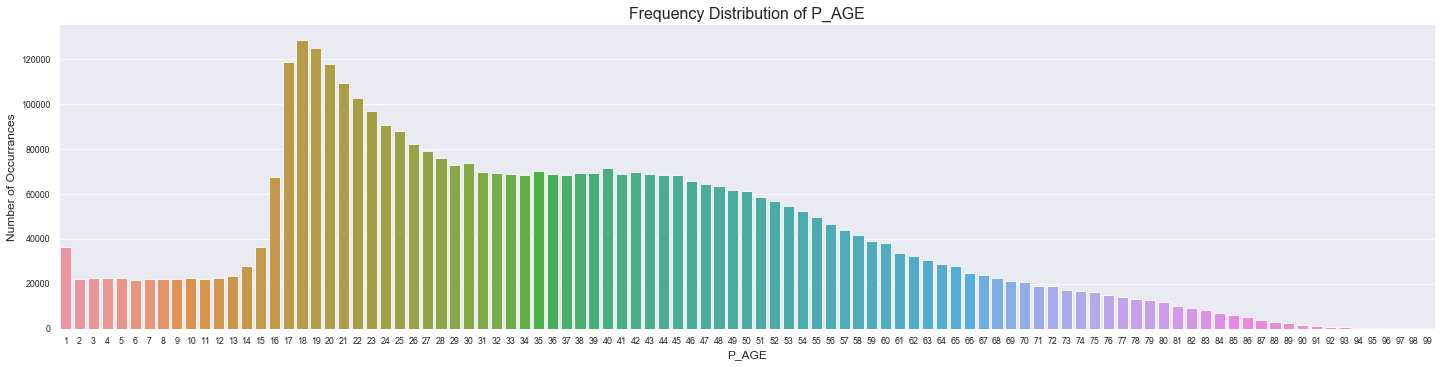

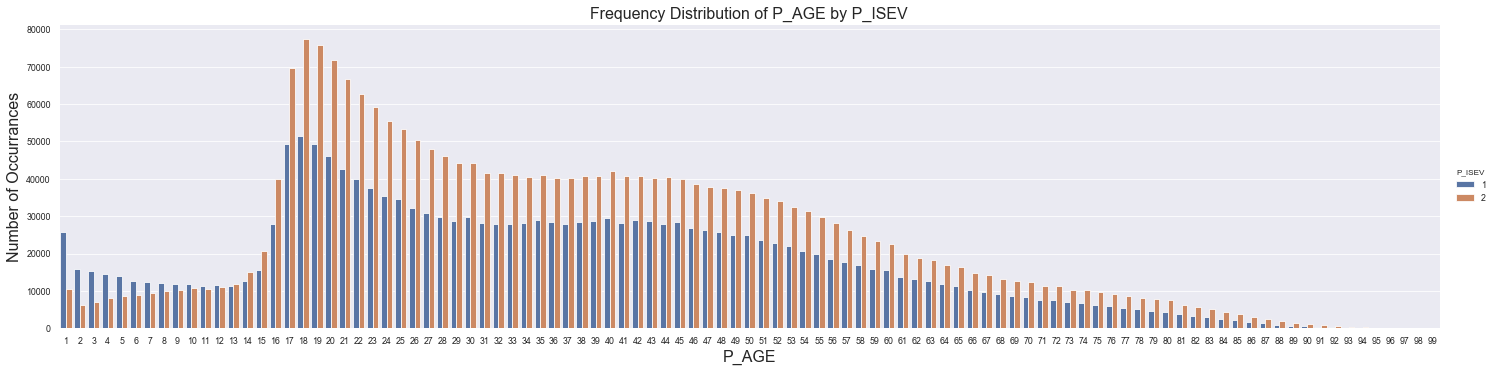

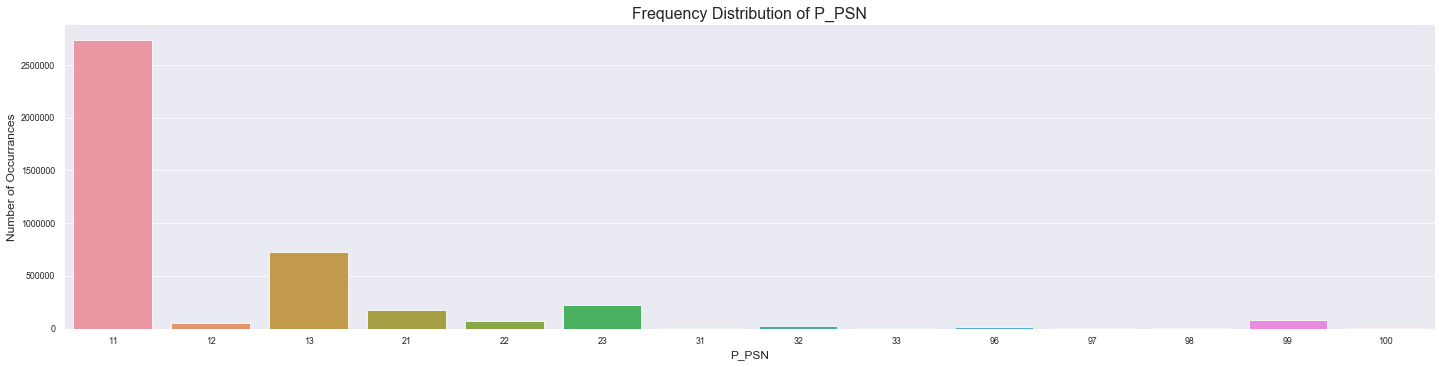

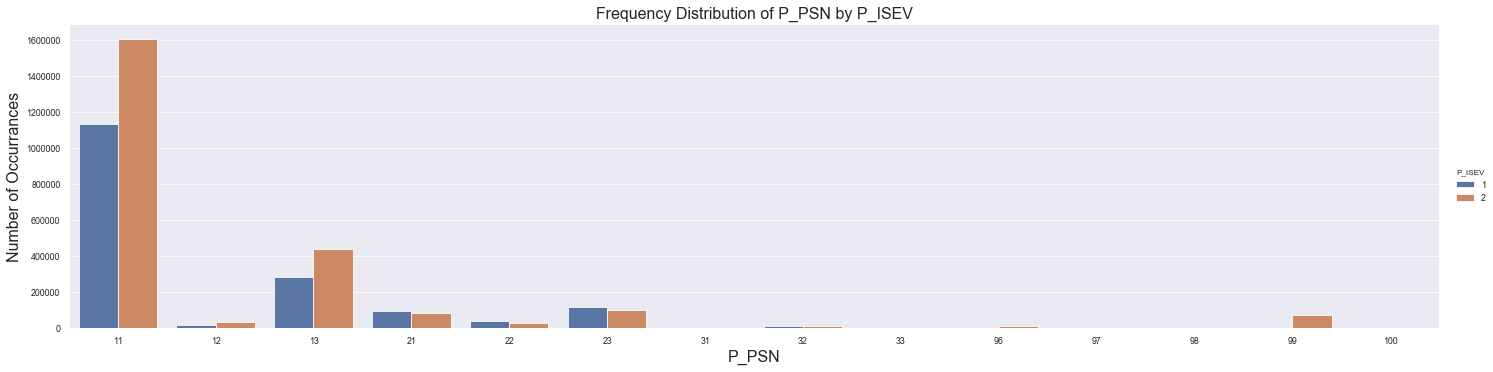

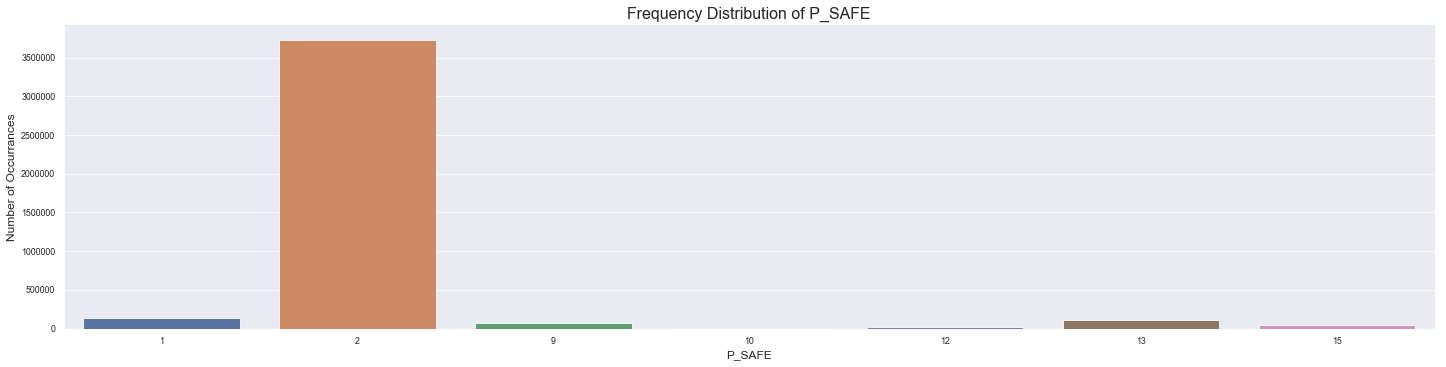

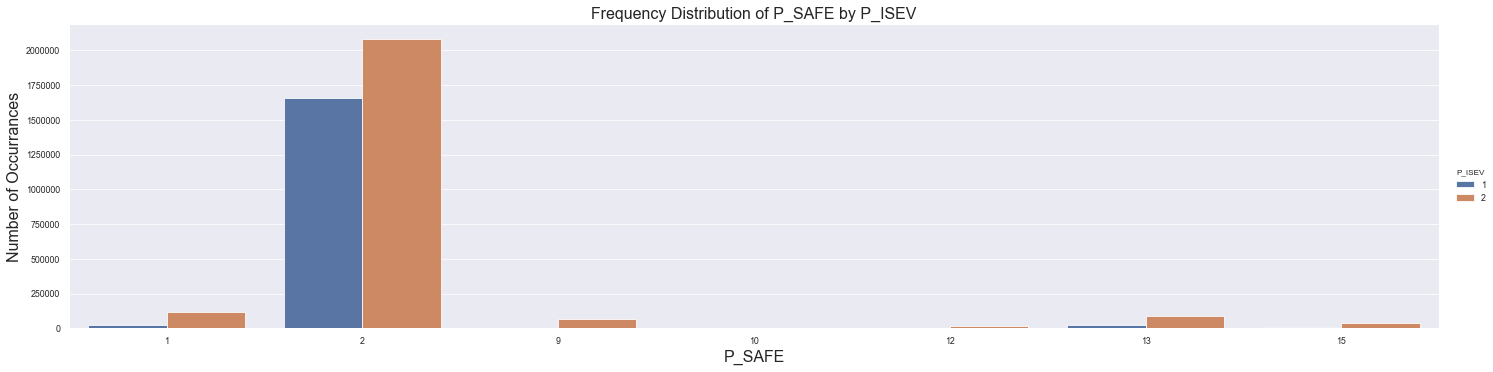

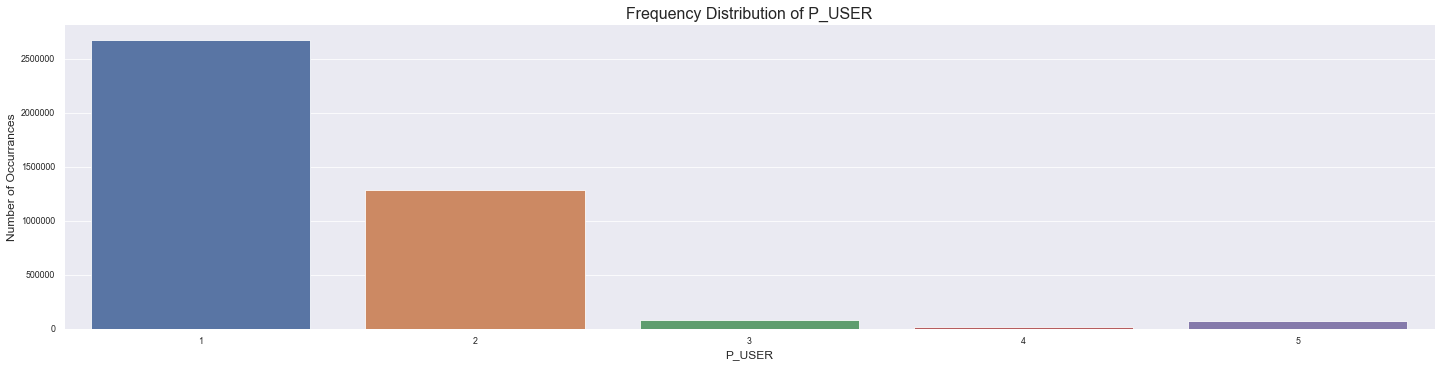

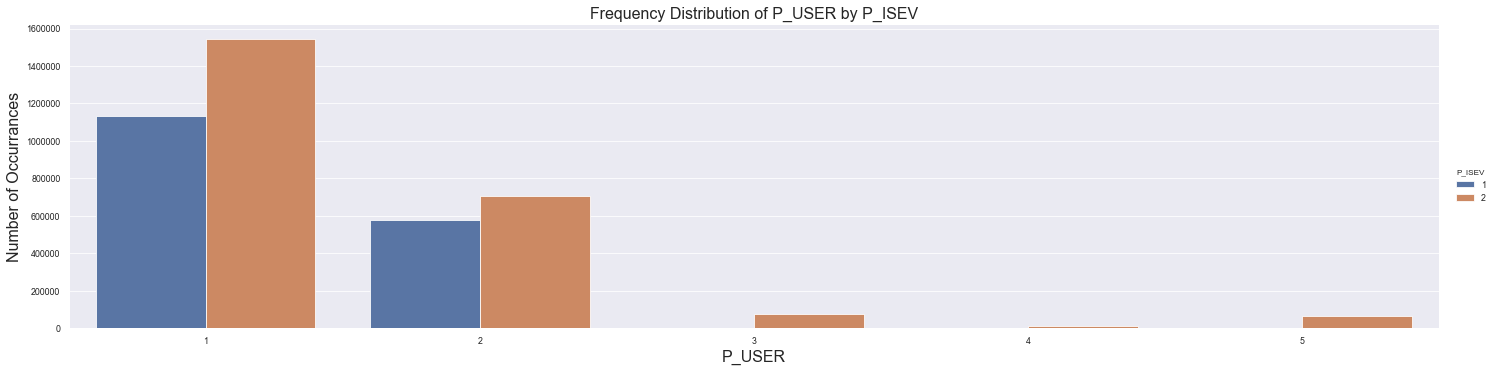

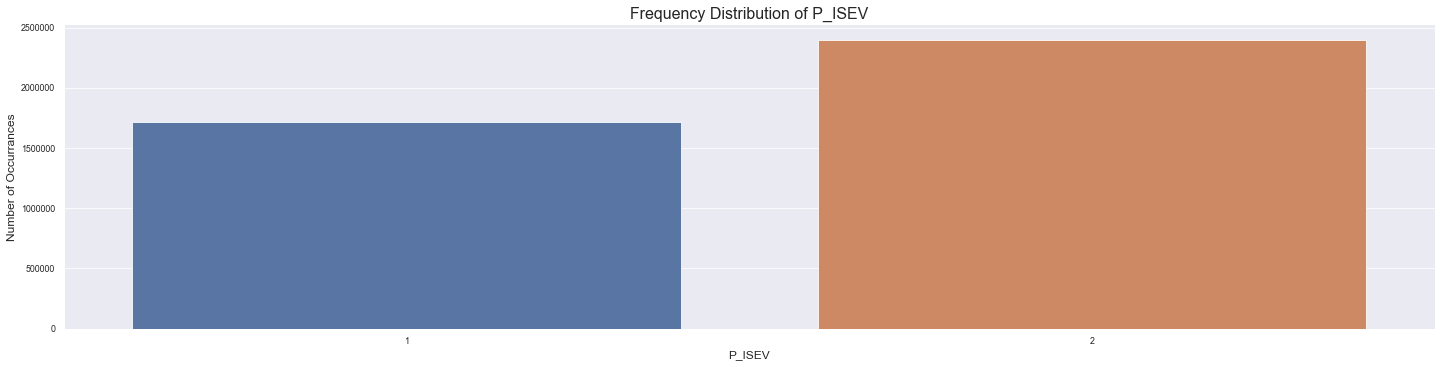

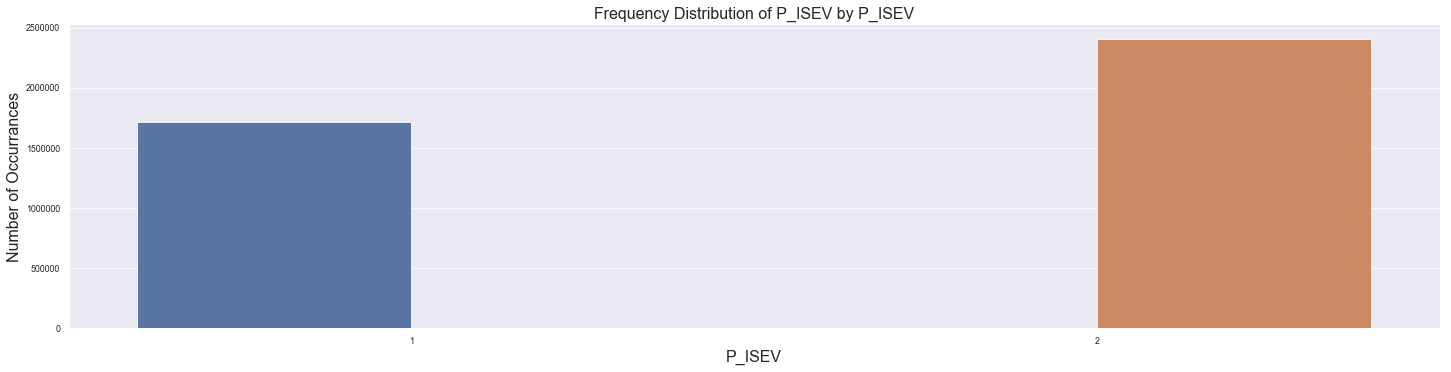

In [21]:

for col in df_binary.columns:
    g = sns.catplot(x = col, data=df_binary, kind="count", legend = True, height = 5, aspect = 4)
    g.set_xticklabels(step=1)
    plt.title('Frequency Distribution of {0}'.format(col), fontsize=16)
    plt.ylabel('Number of Occurrances', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.show()
    
    
    h = sns.catplot(col, data=df_binary, kind="count", legend = True, height = 5, aspect = 4, hue = 'P_ISEV')
    h.set_xticklabels(step=1)
    plt.title('Frequency Distribution of {0} by P_ISEV'.format(col), fontsize=16)
    plt.ylabel('Number of Occurrances', fontsize=16)
    plt.xlabel(col, fontsize=16)
    plt.show()

### Box Plot

C:\Users\pradeep\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


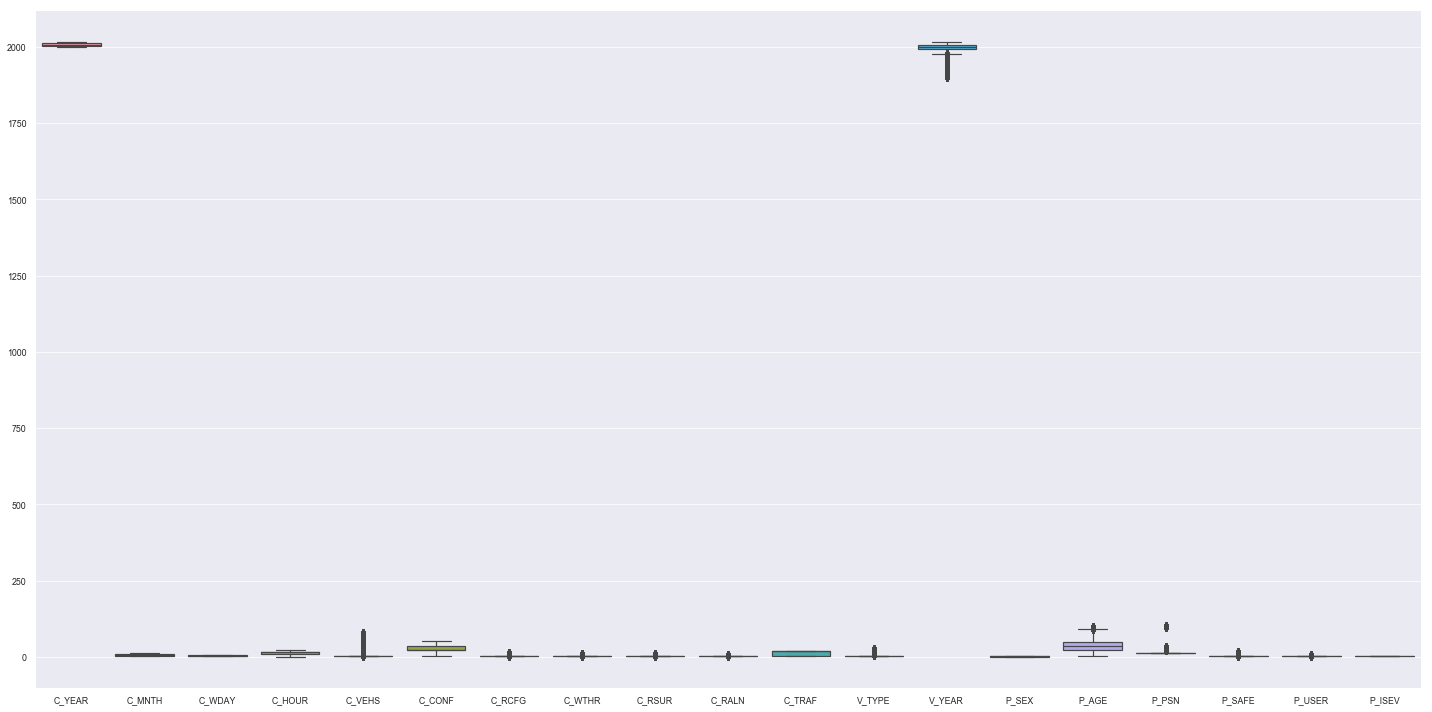

<Figure size 360x720 with 0 Axes>

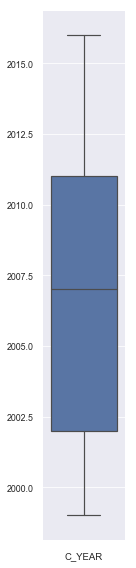

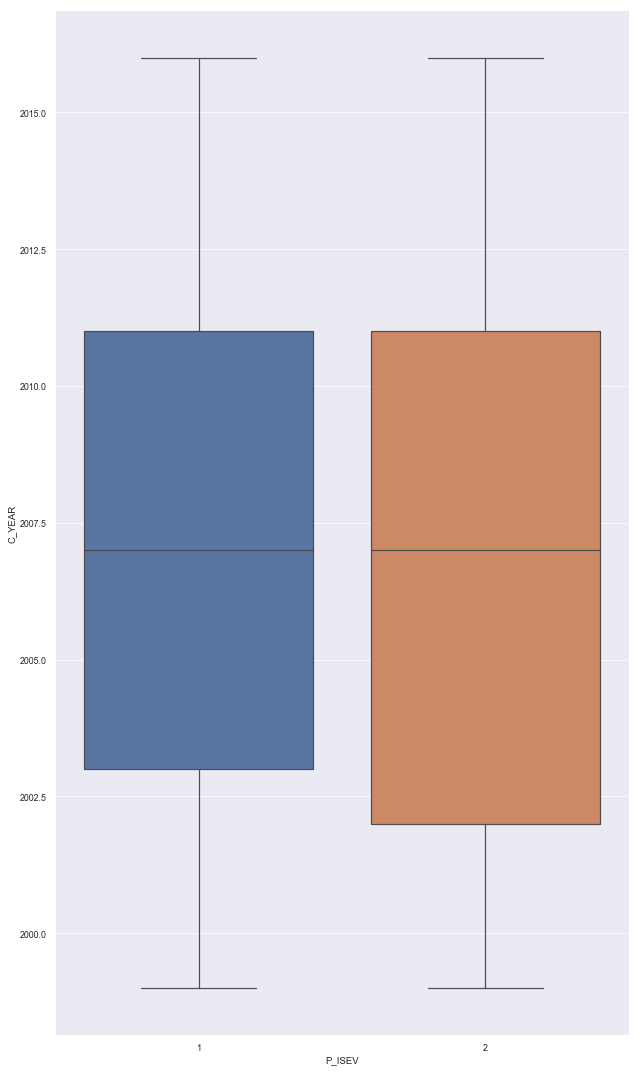

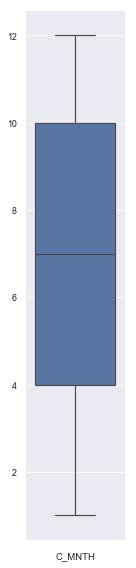

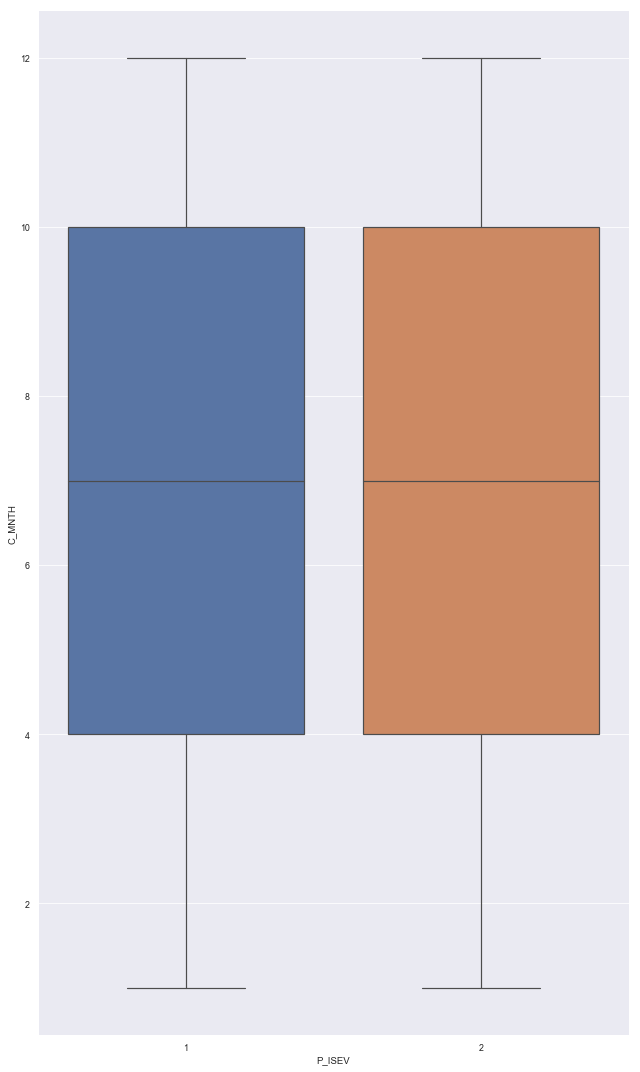

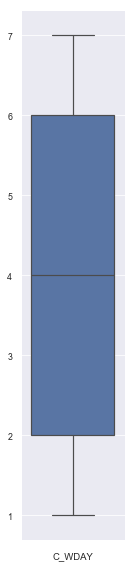

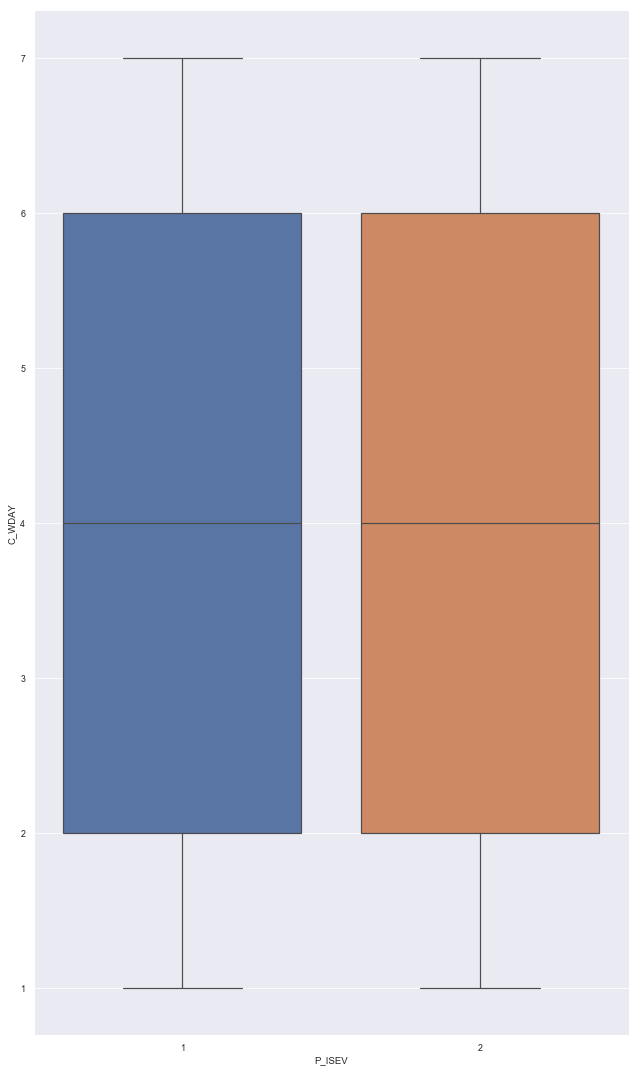

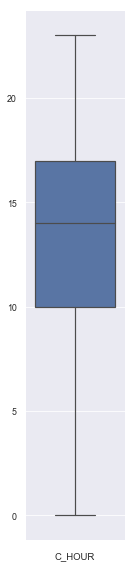

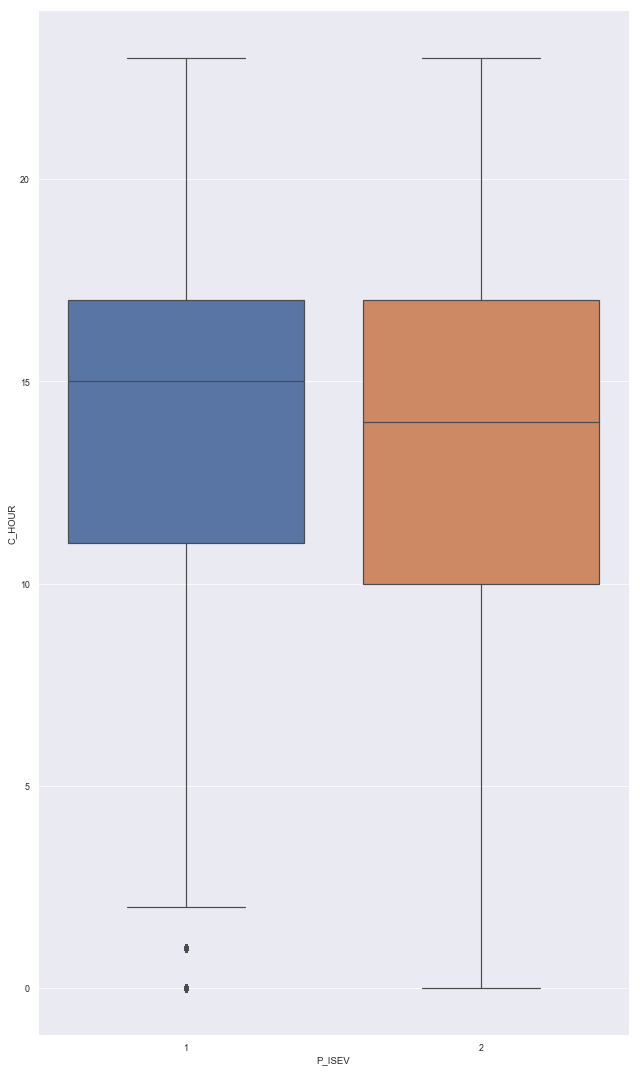

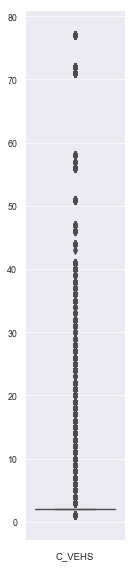

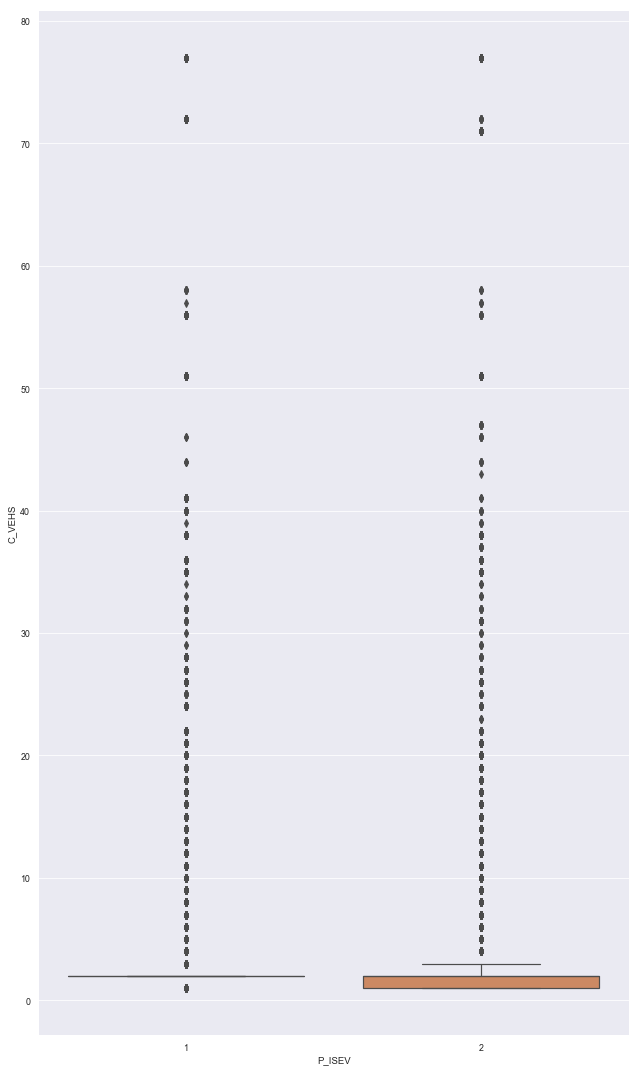

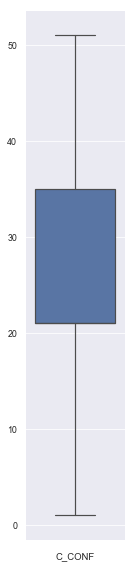

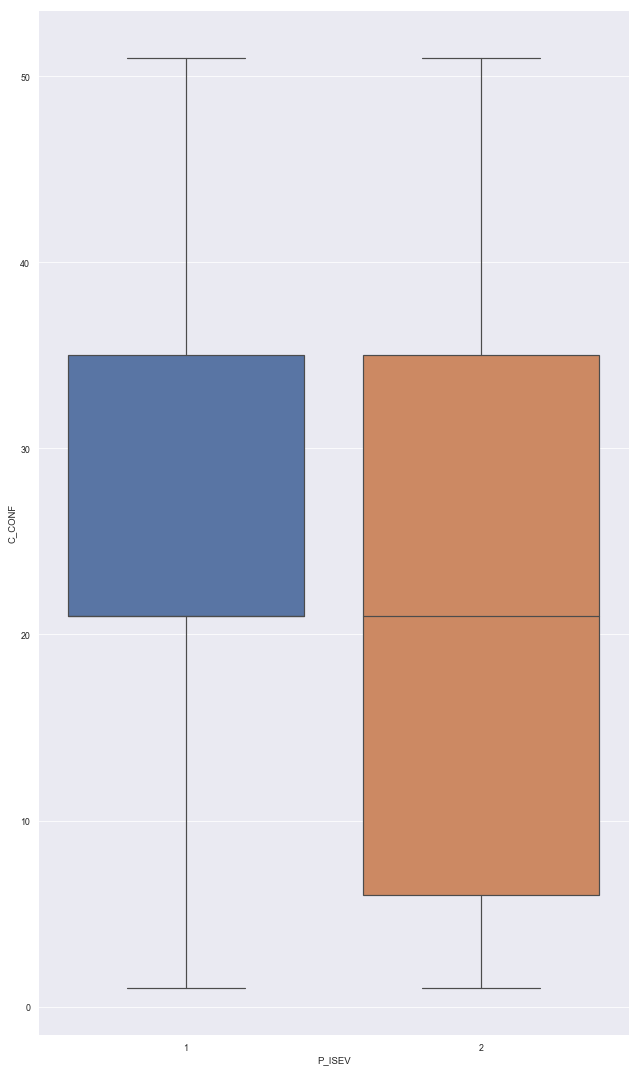

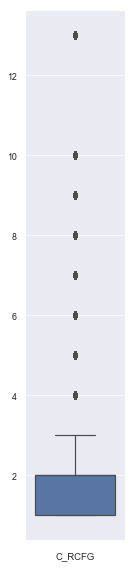

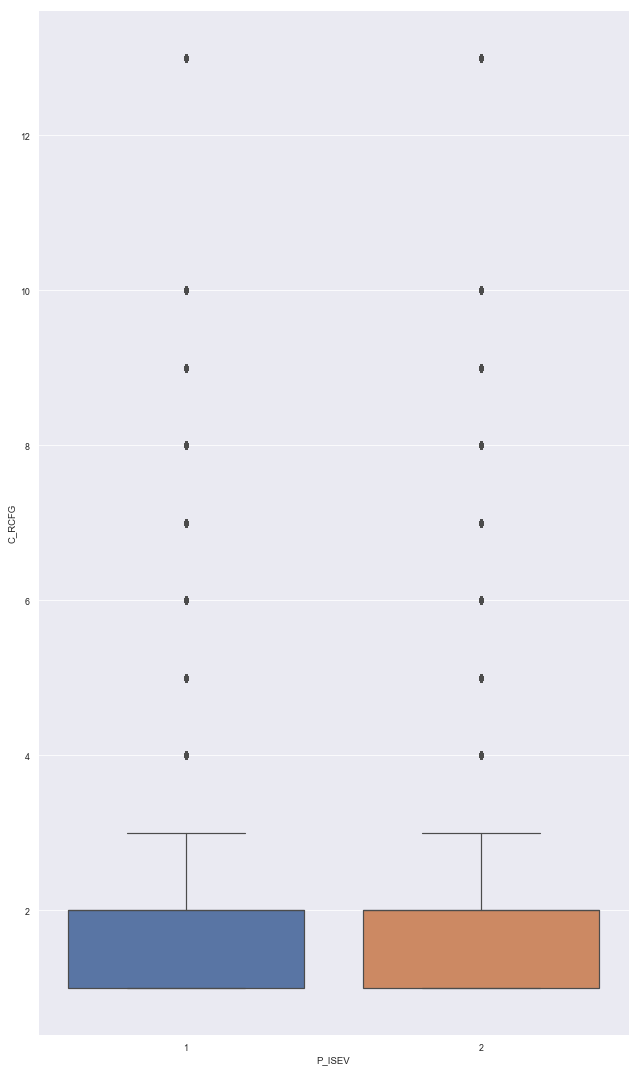

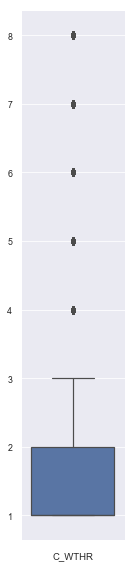

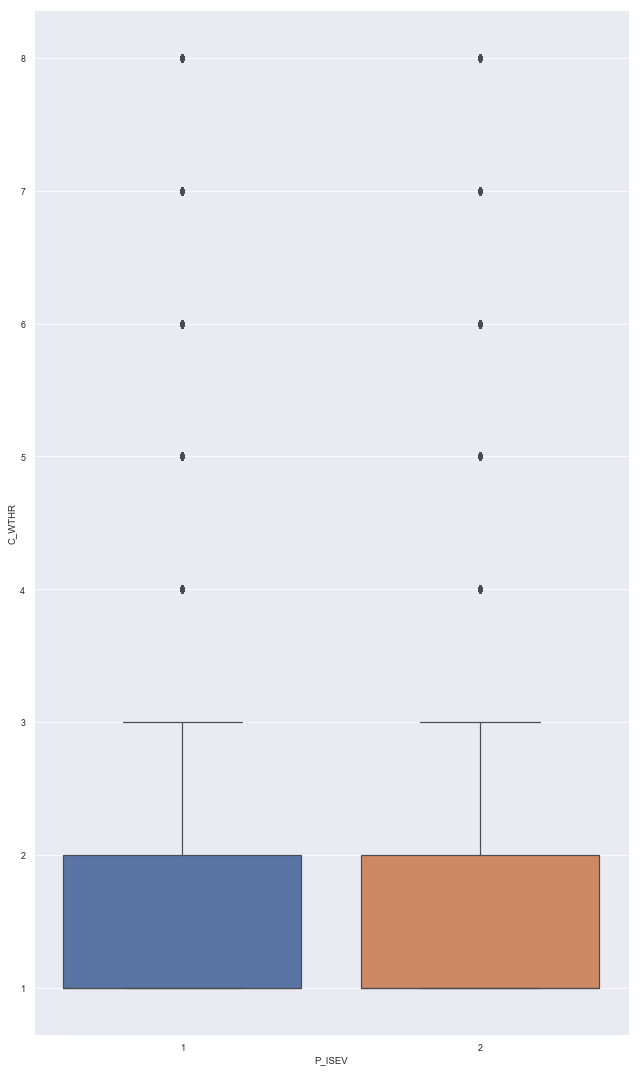

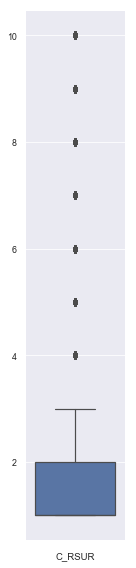

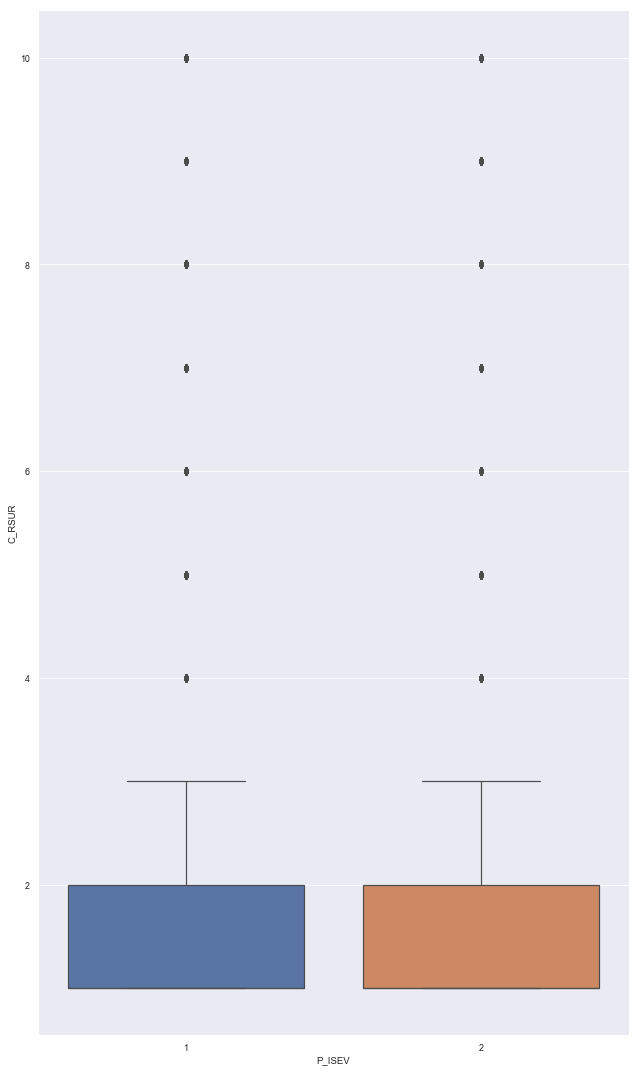

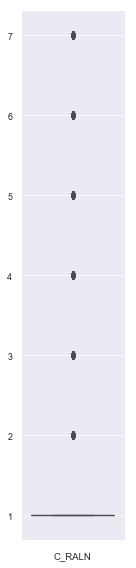

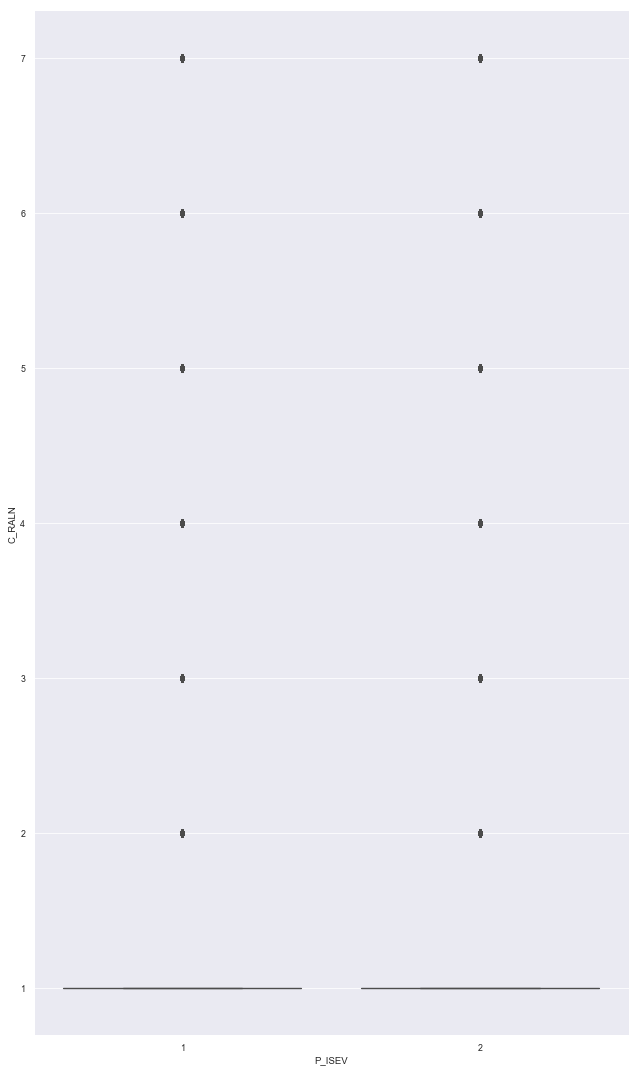

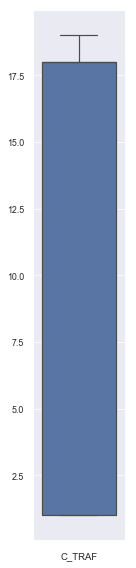

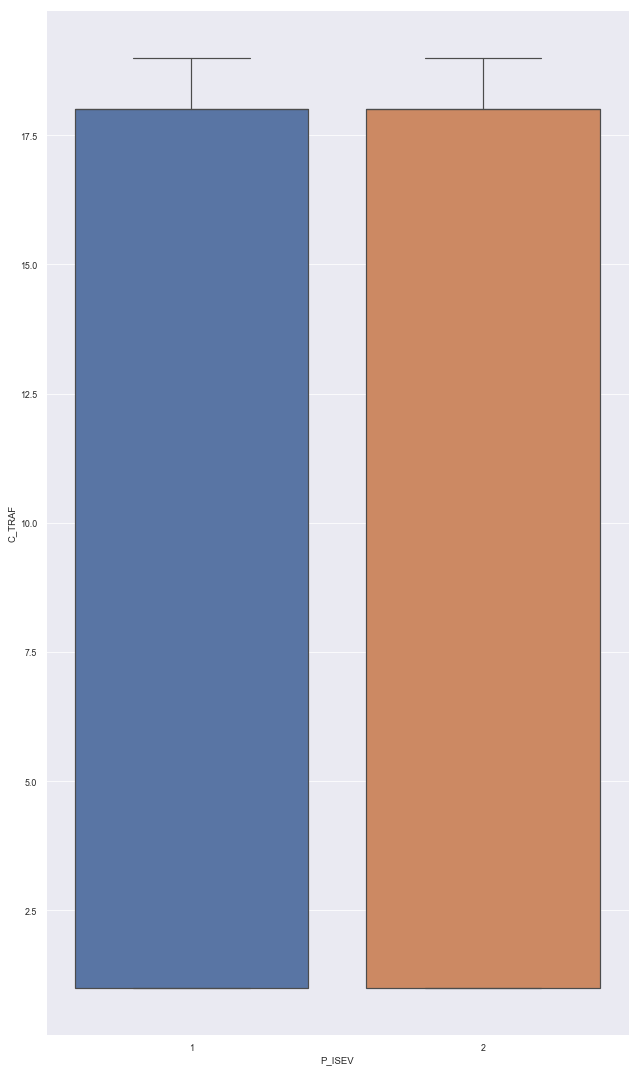

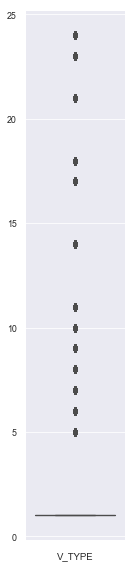

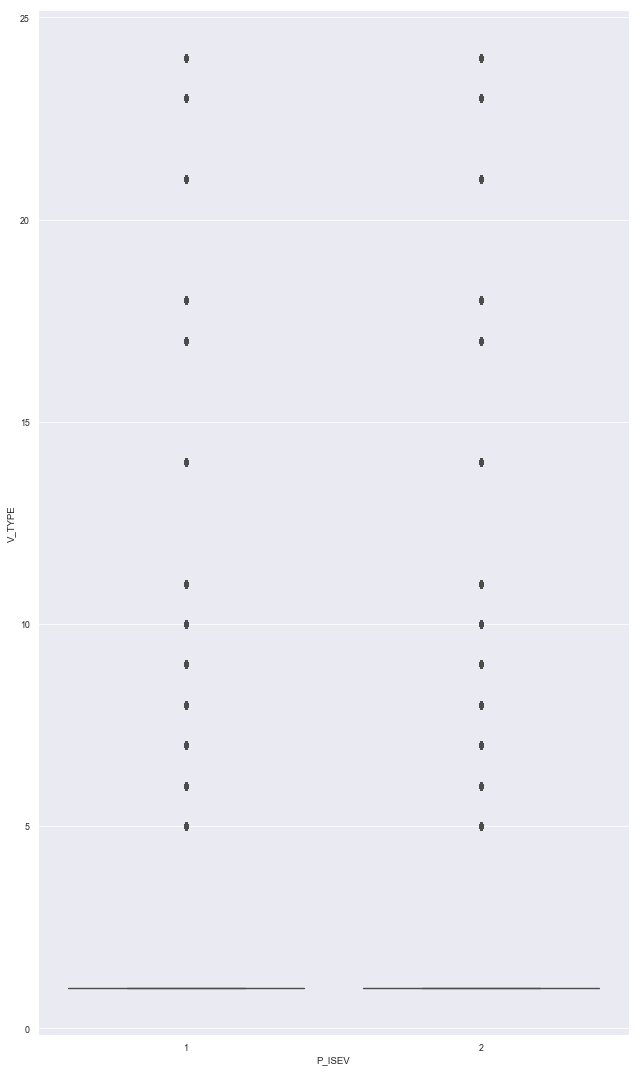

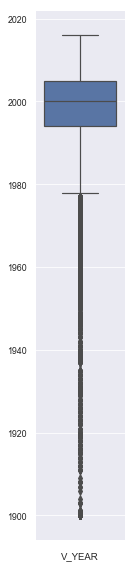

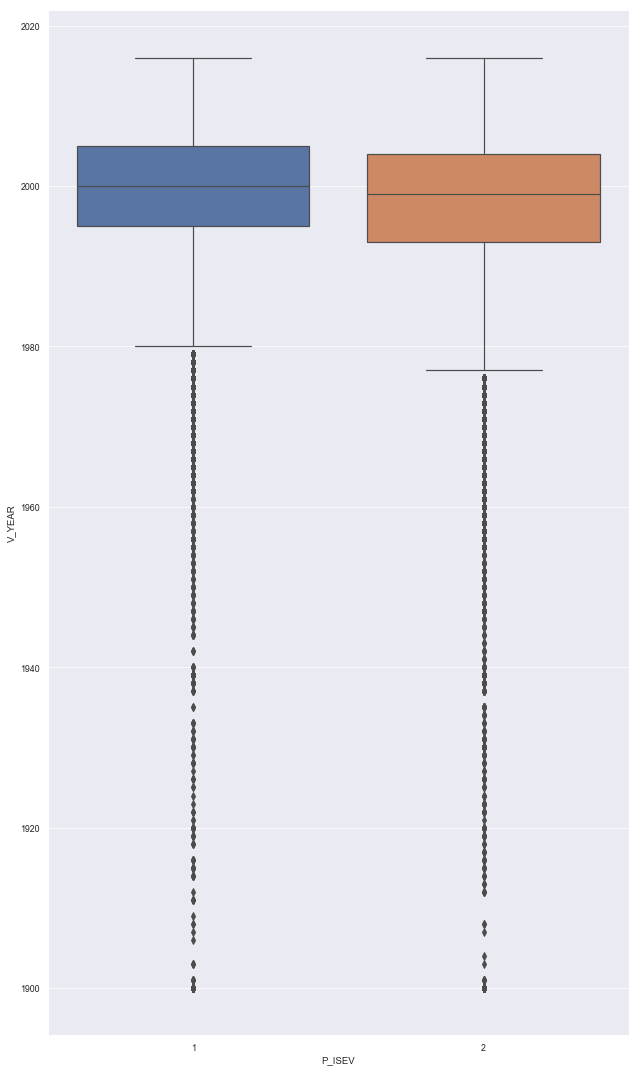

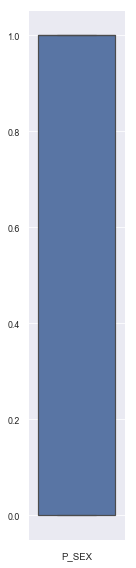

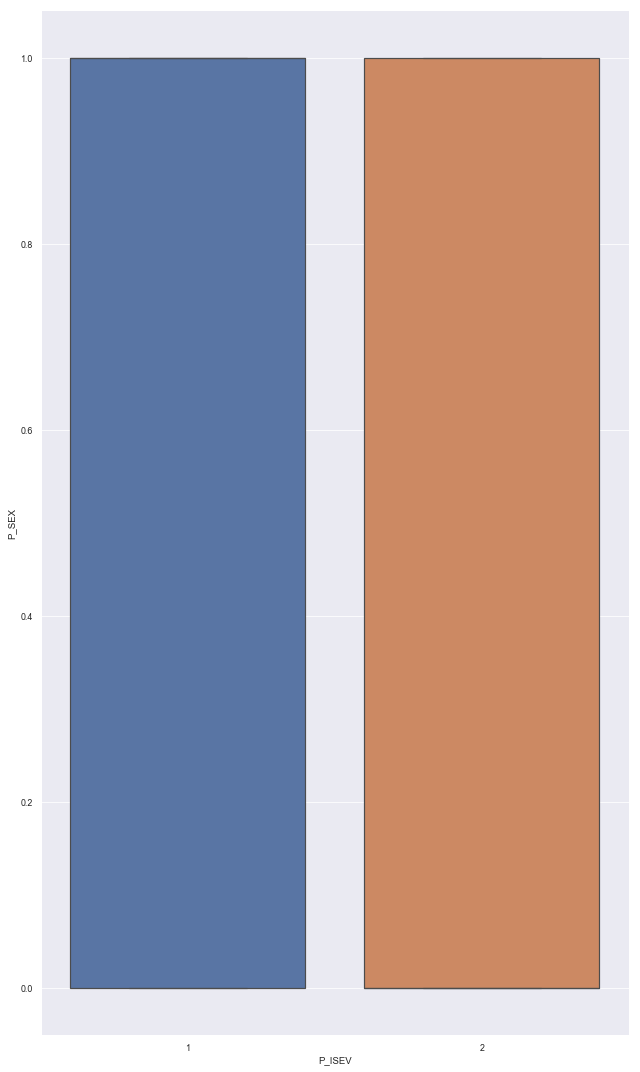

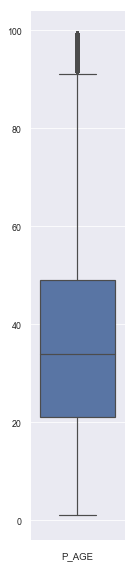

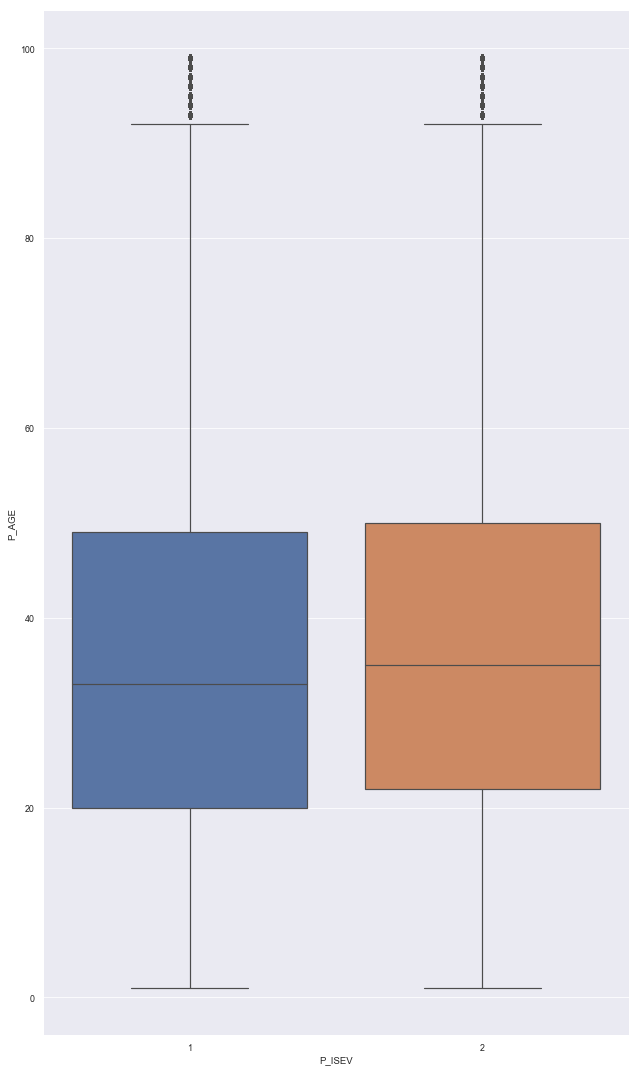

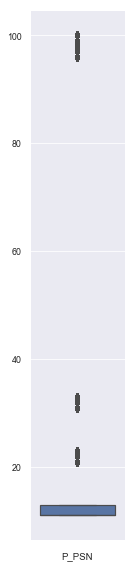

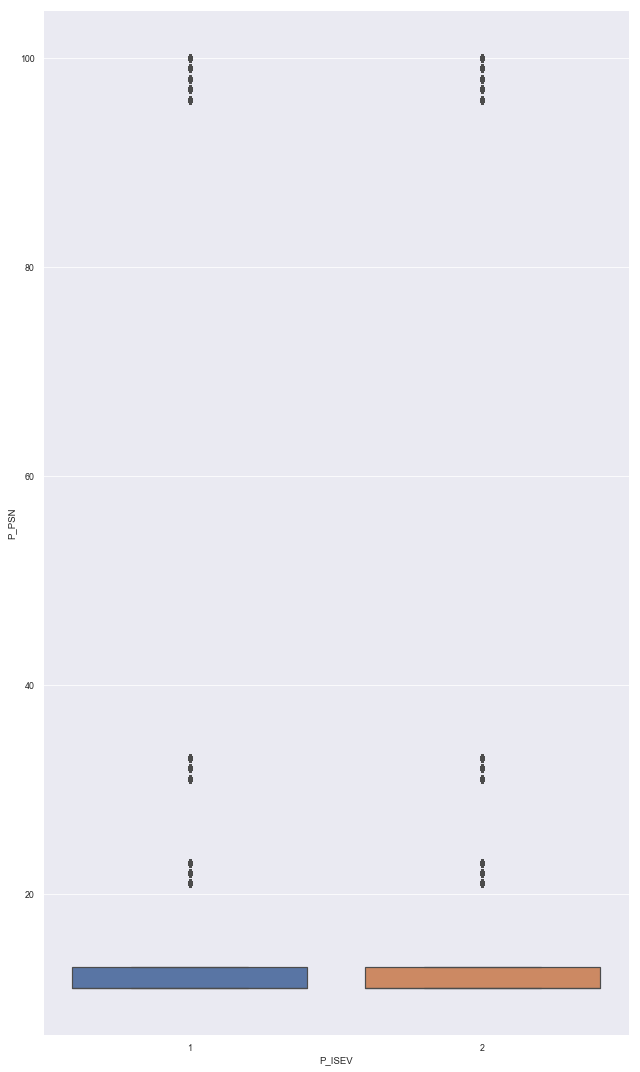

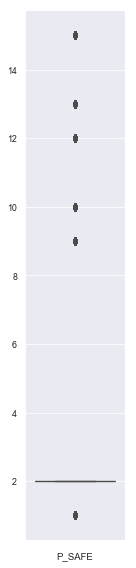

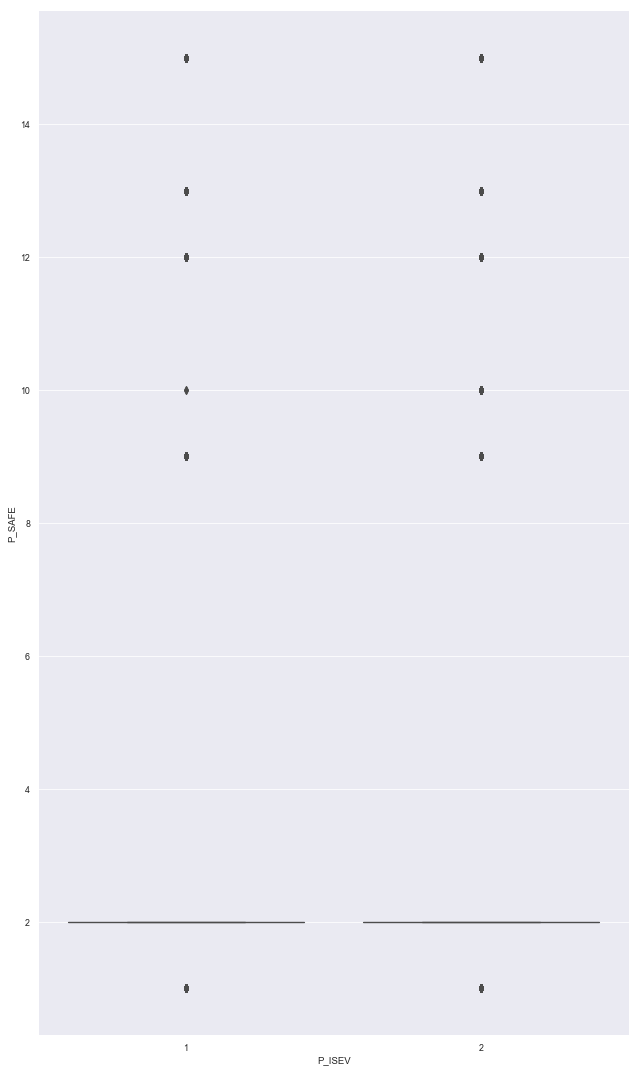

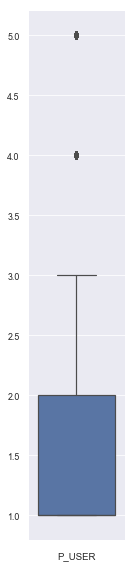

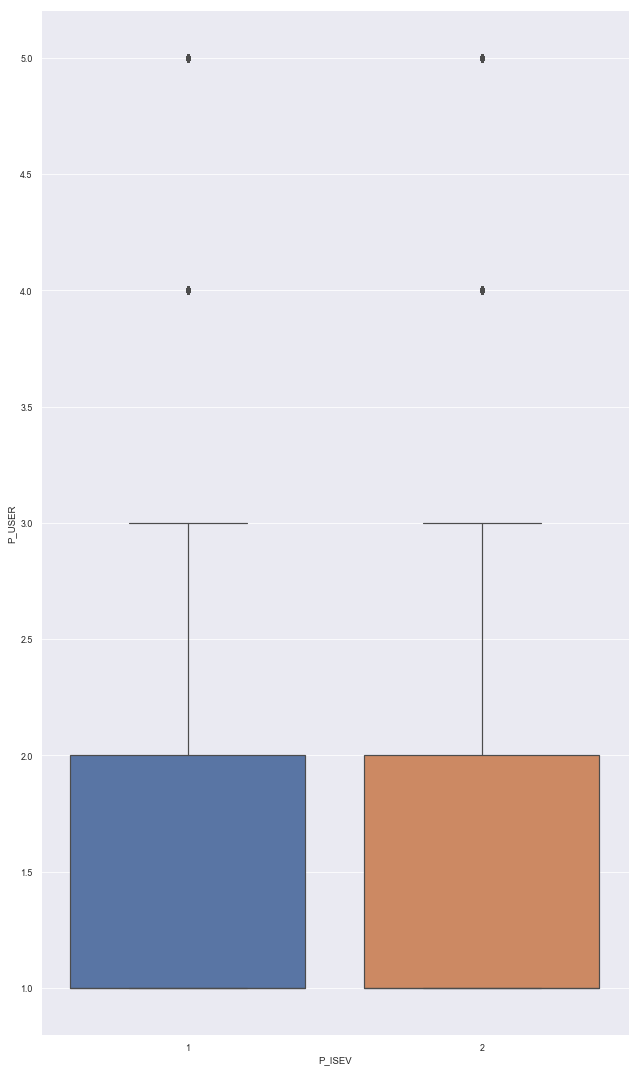

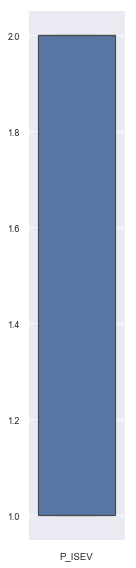

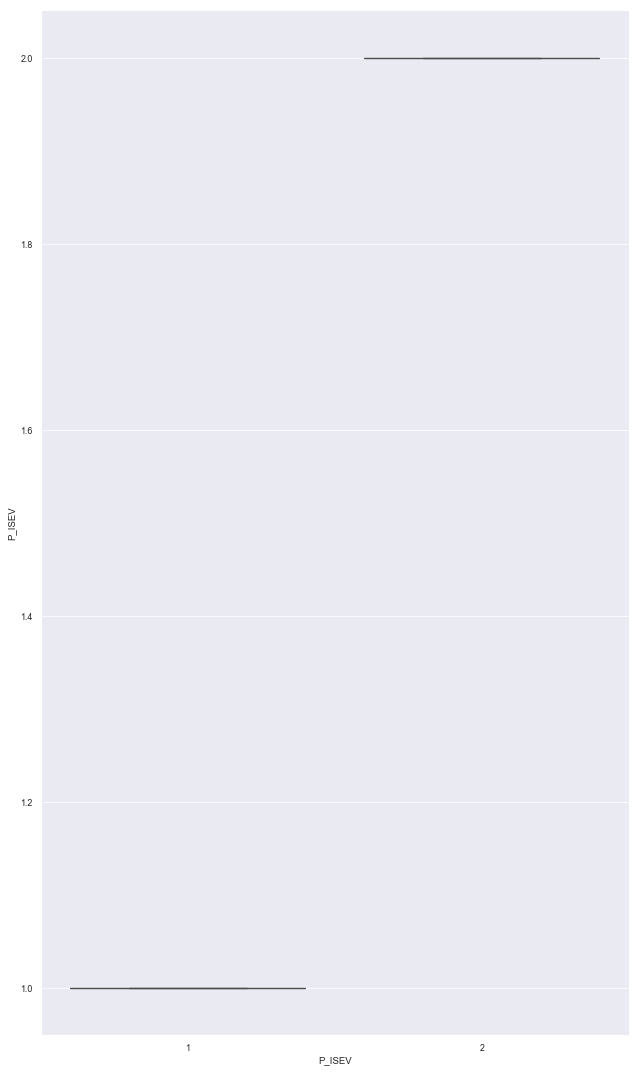

In [22]:
g = sns.catplot(data=df_binary, kind="box", orient="v", height = 10, aspect = 2)
g.set_xticklabels(step=1)

plt.figure(figsize=(5,10))
for col in df_binary.columns:
    g = sns.catplot(col, data=df_binary, kind="box", orient="v", height = 8, aspect = 0.25)
    g.set_xticklabels(step=1)
    
    h = sns.catplot(x = 'P_ISEV', y = col, data=df_binary, kind="box", orient="v", height = 15, aspect = 0.6, legend = True)
    h.set_xticklabels(step=1)

<Figure size 864x864 with 0 Axes>

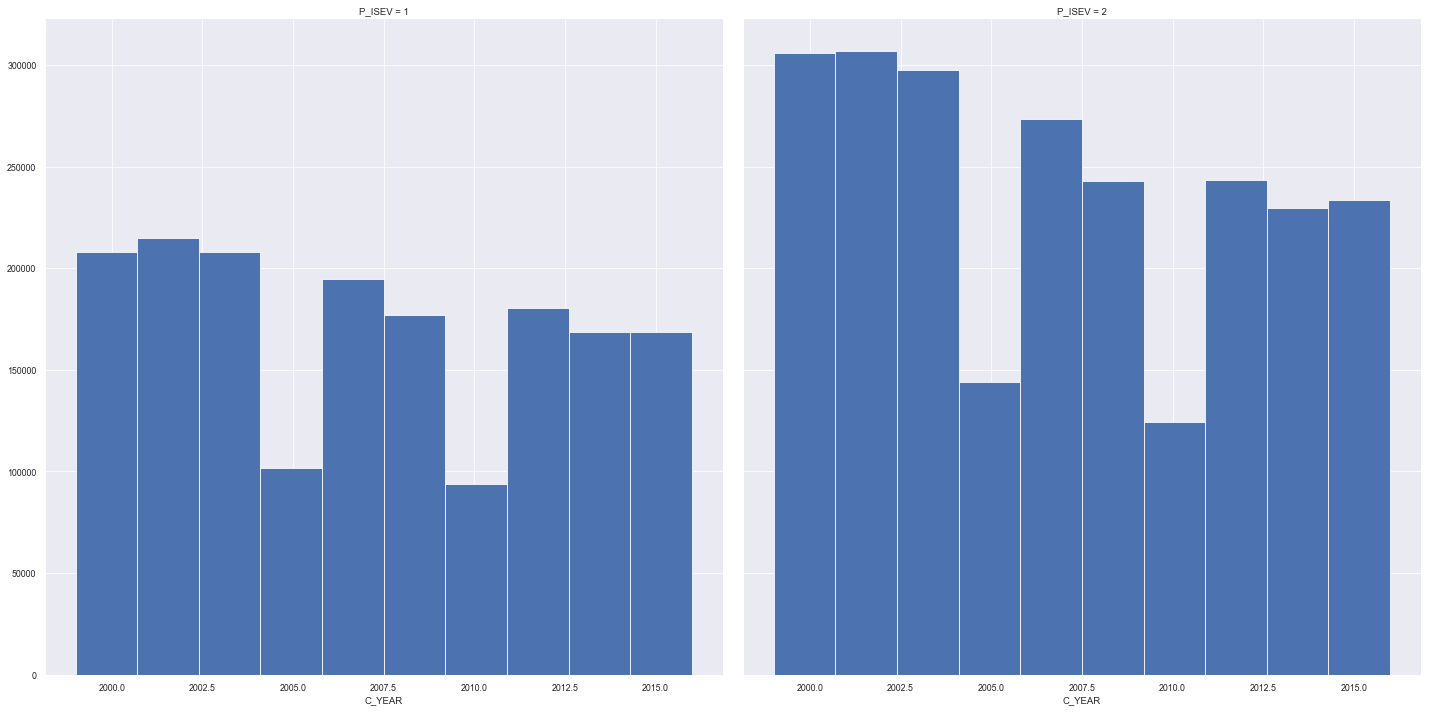

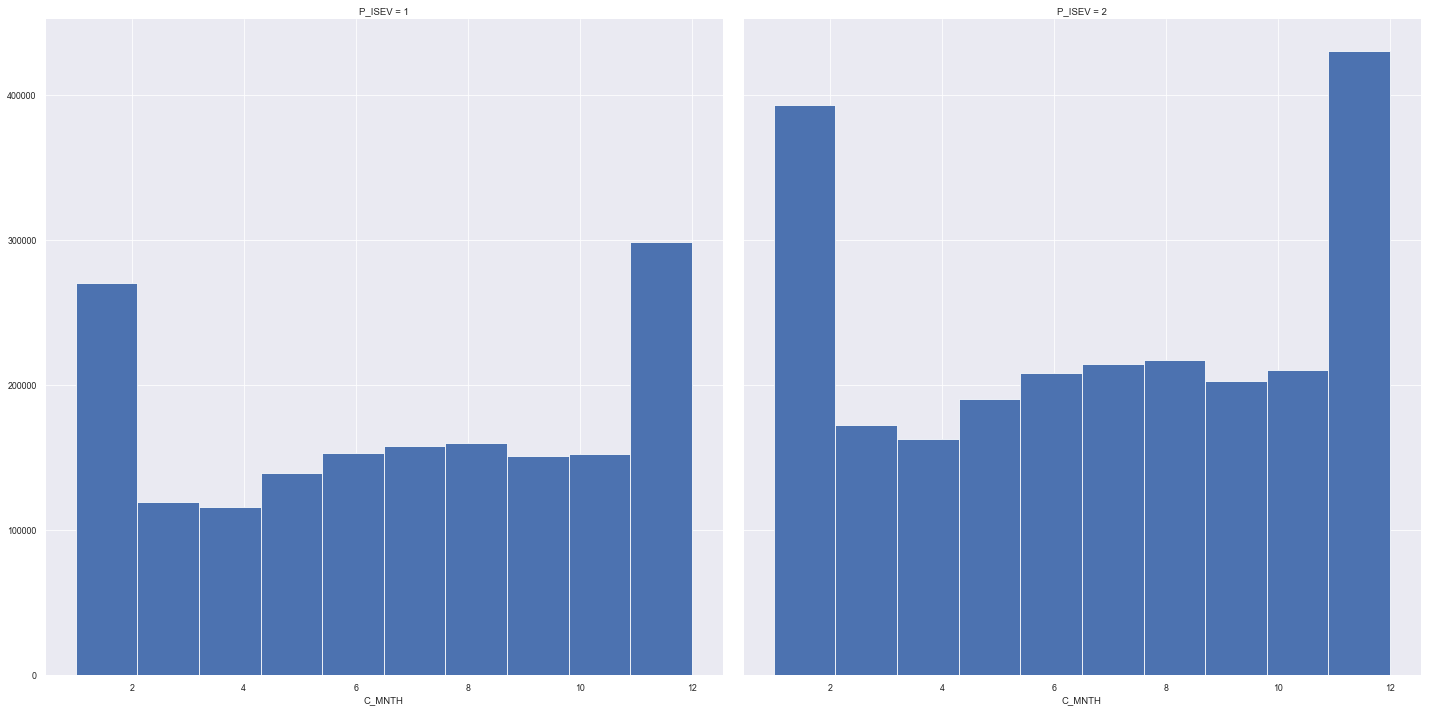

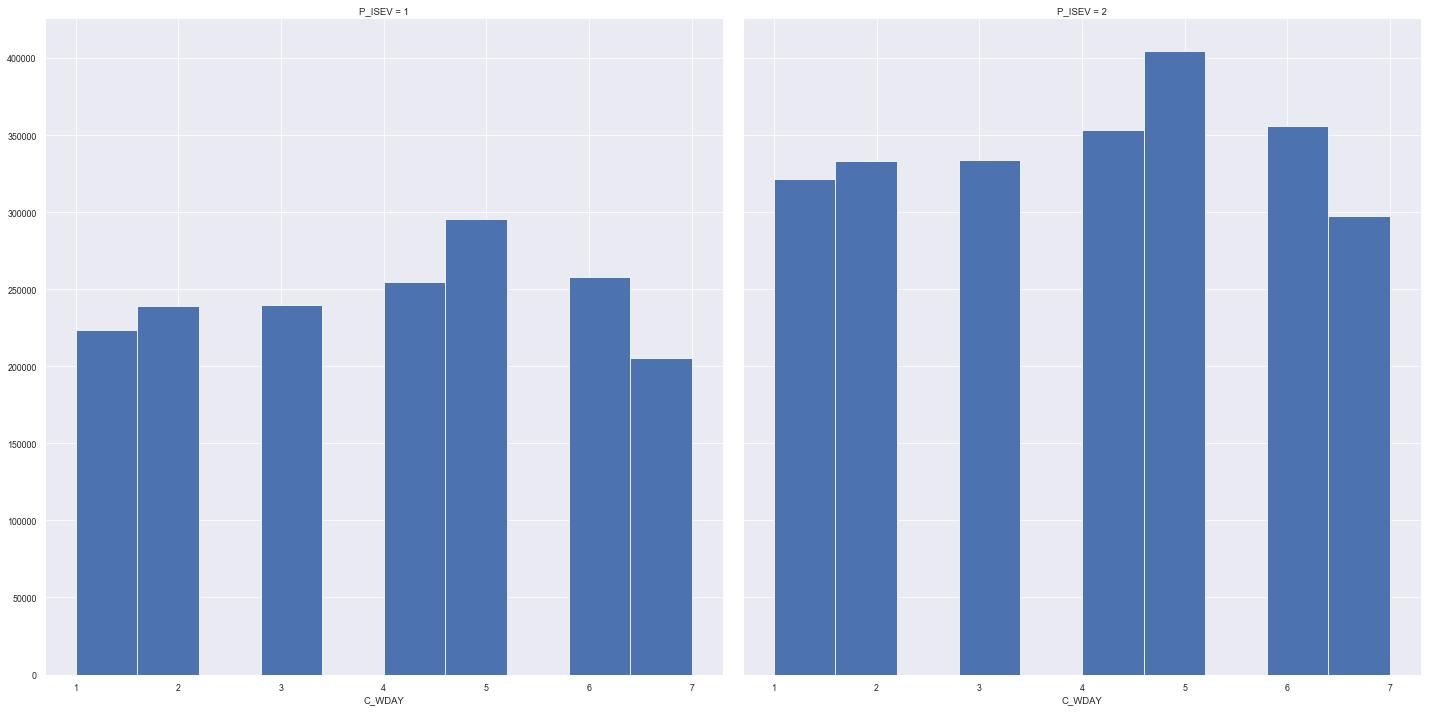

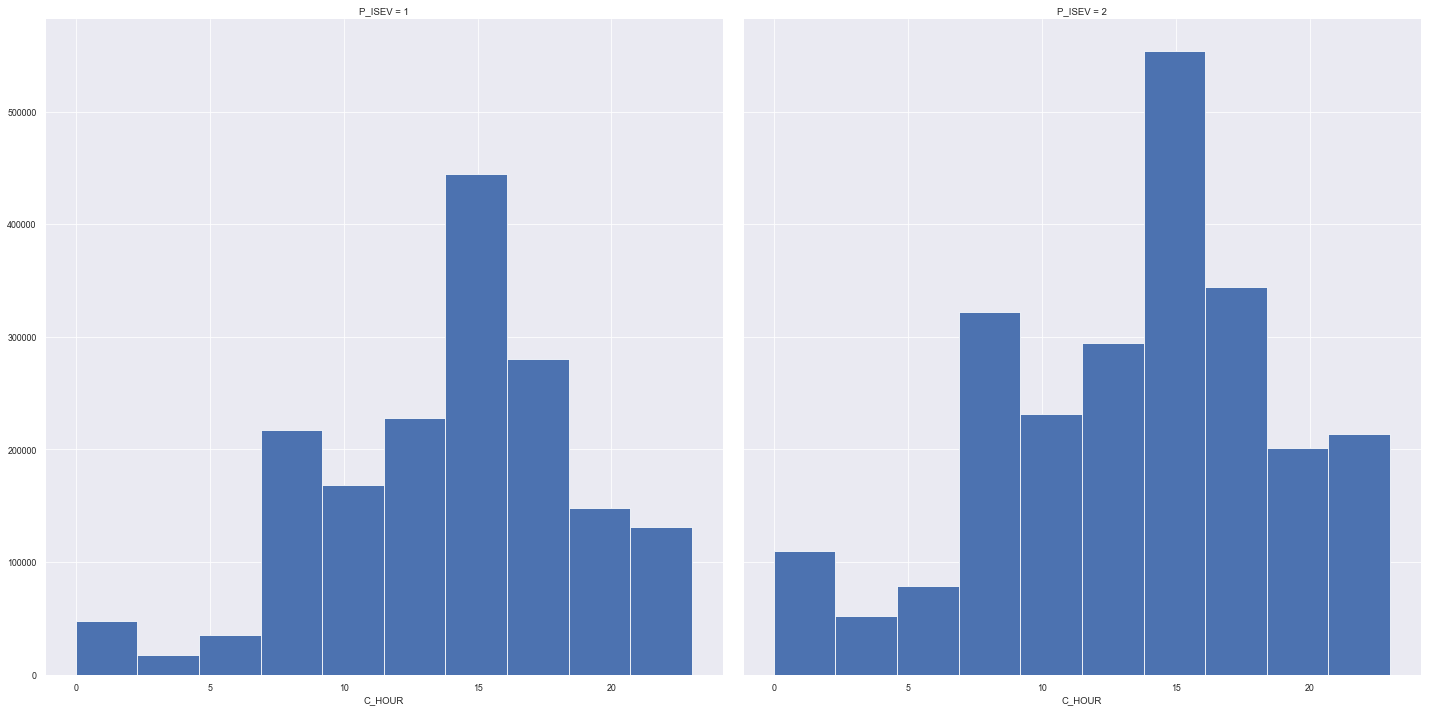

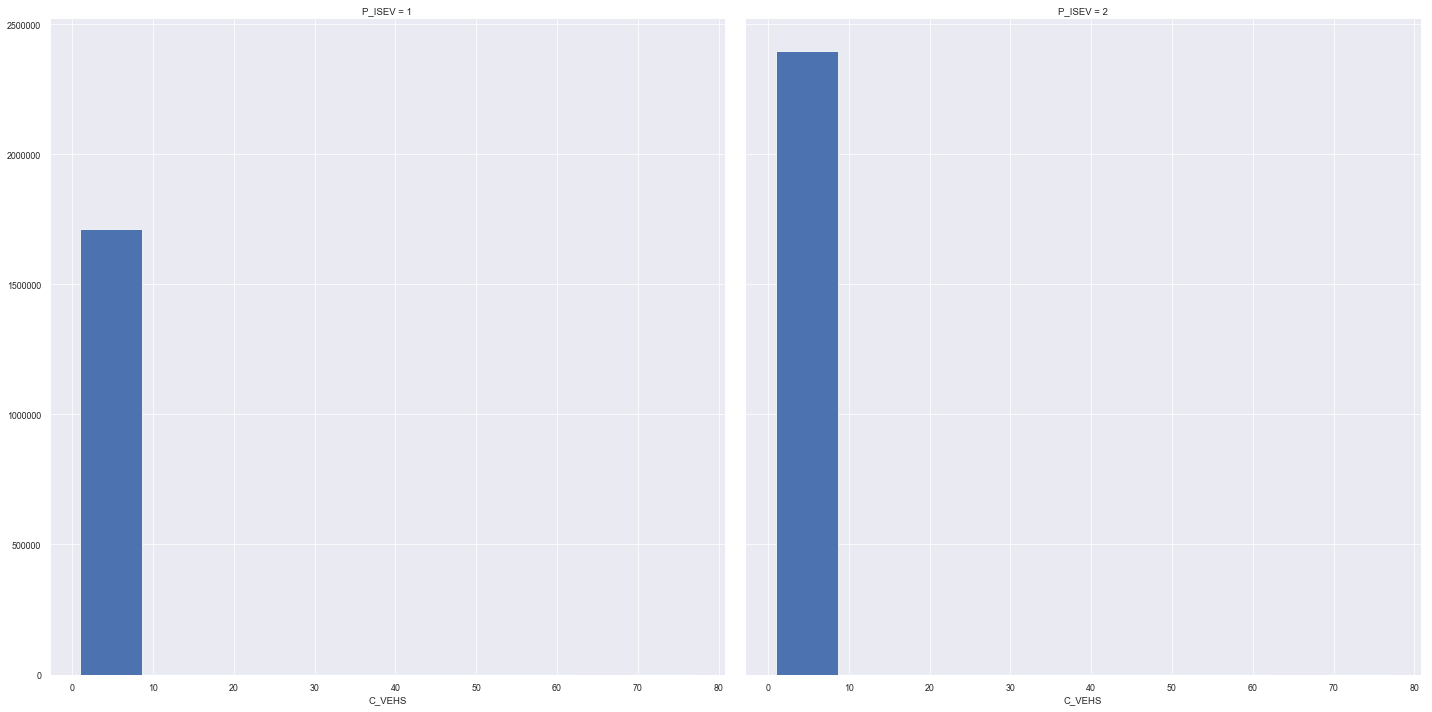

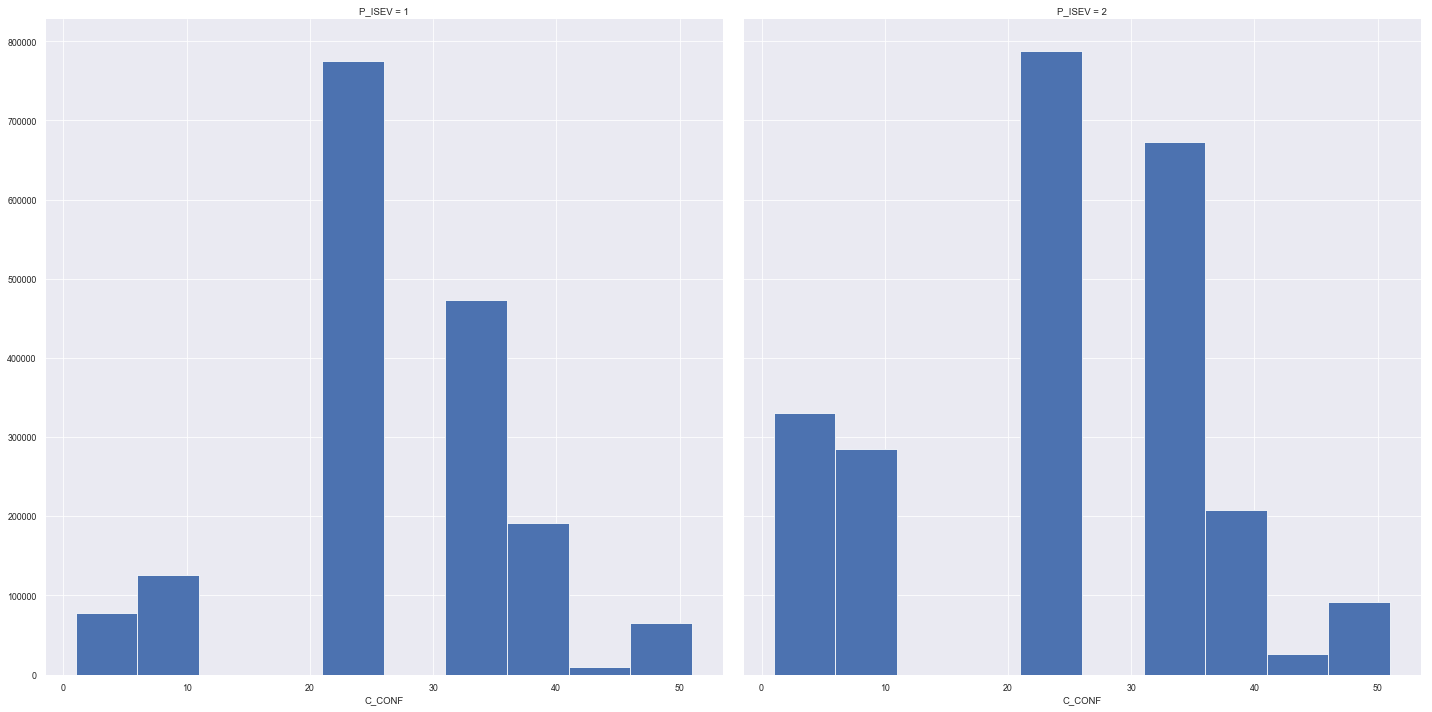

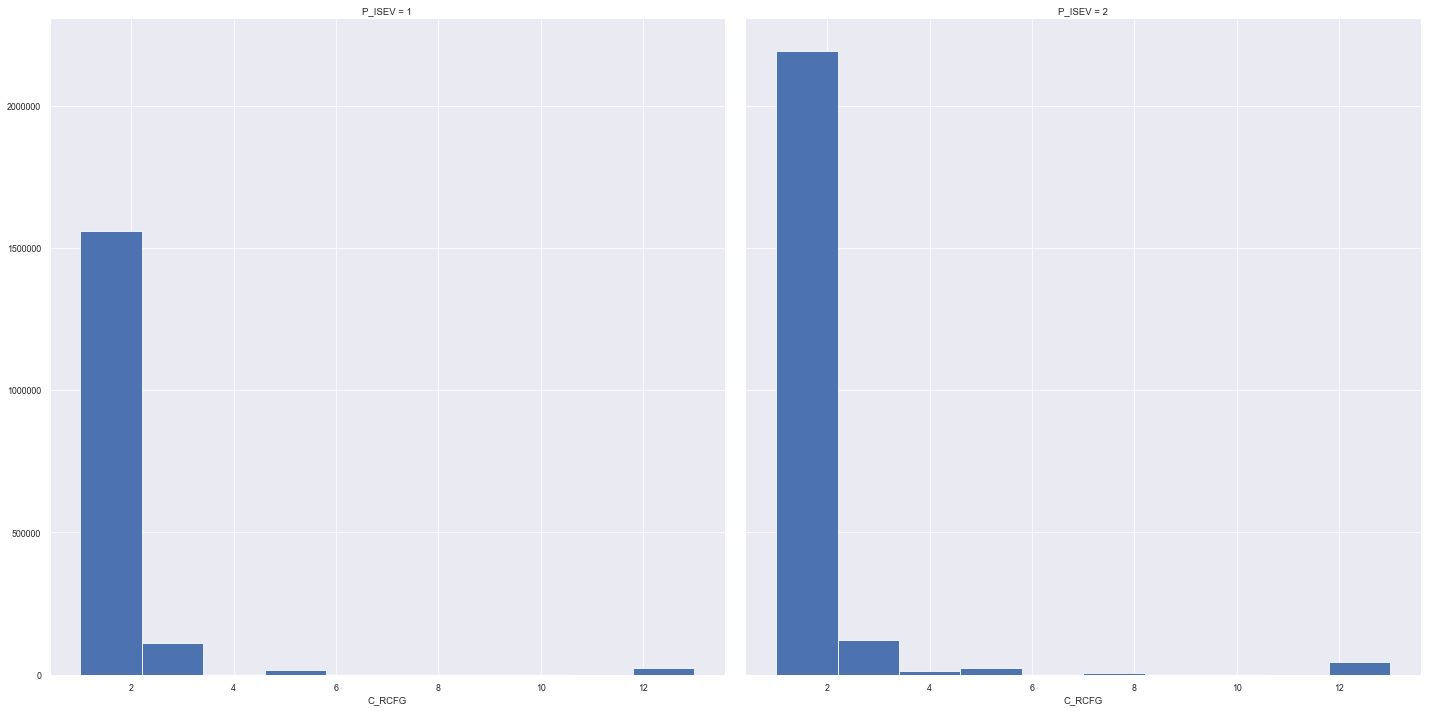

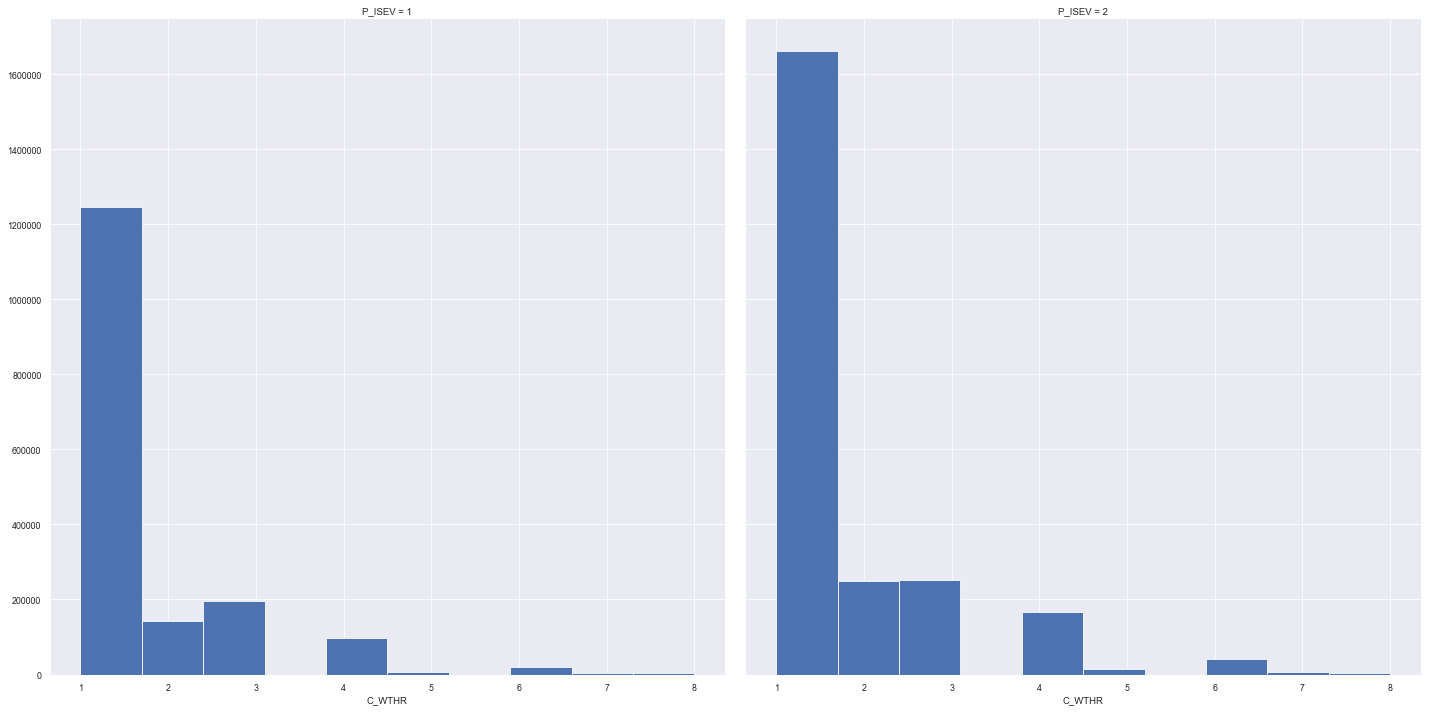

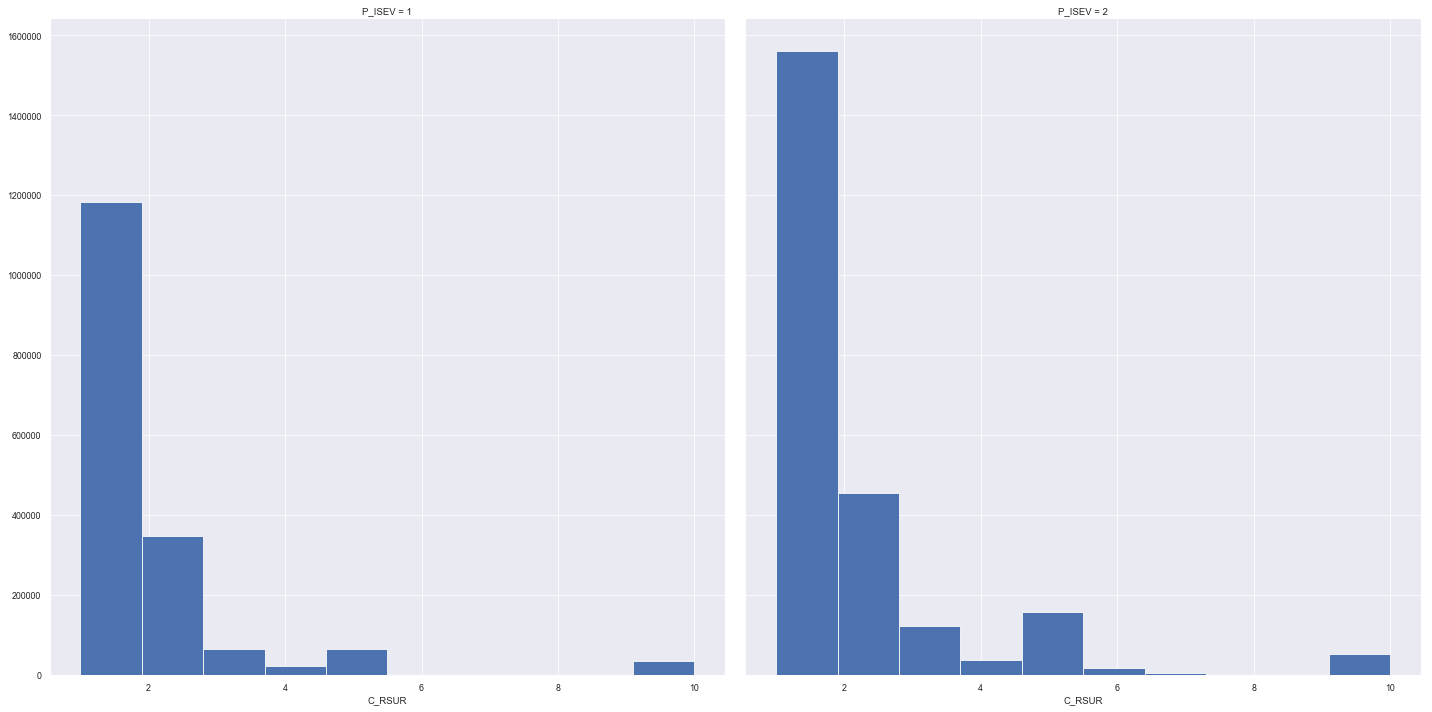

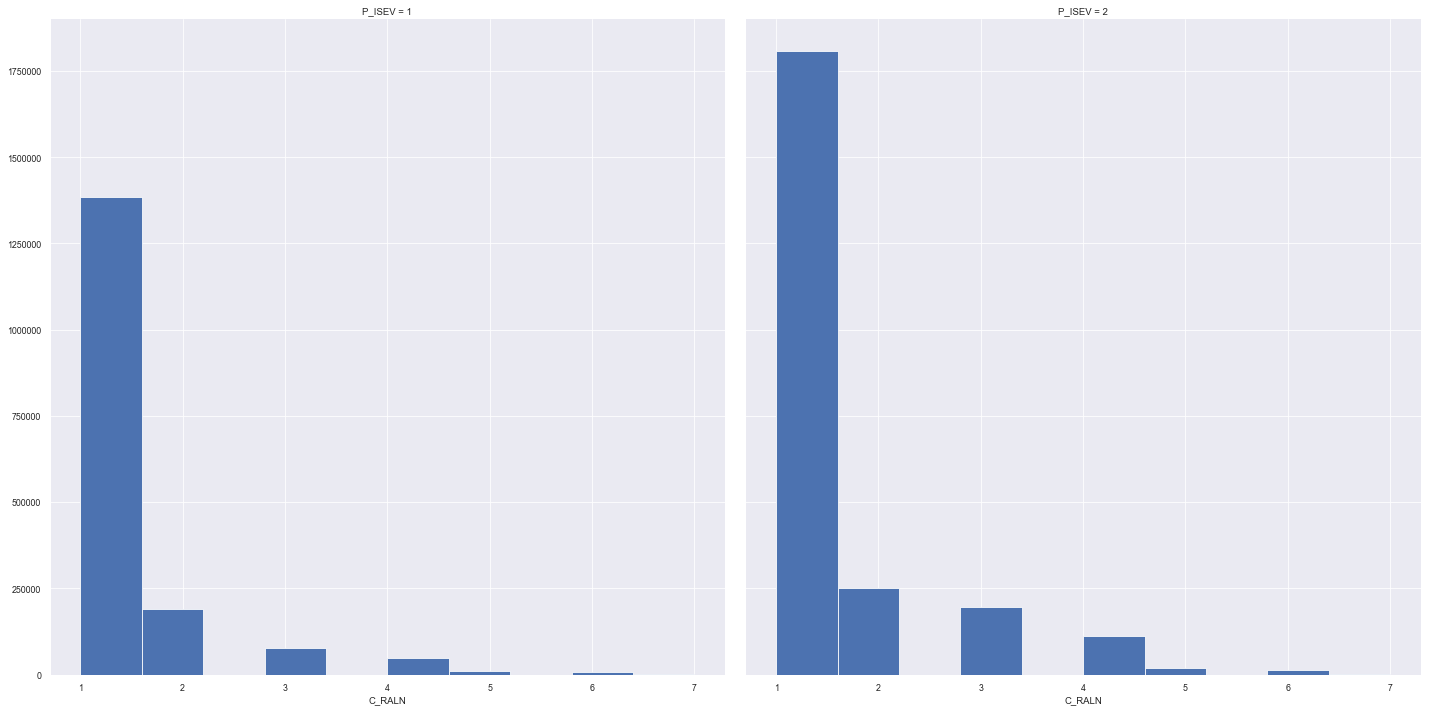

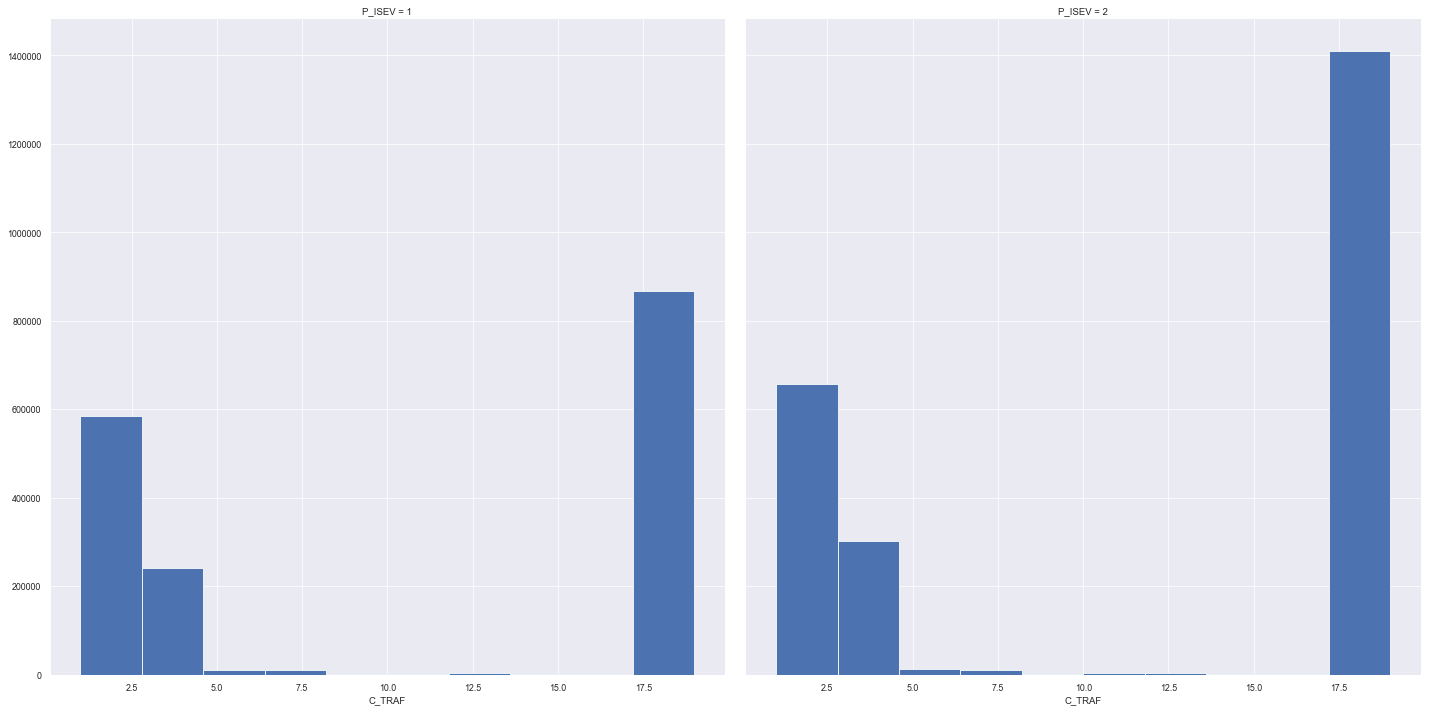

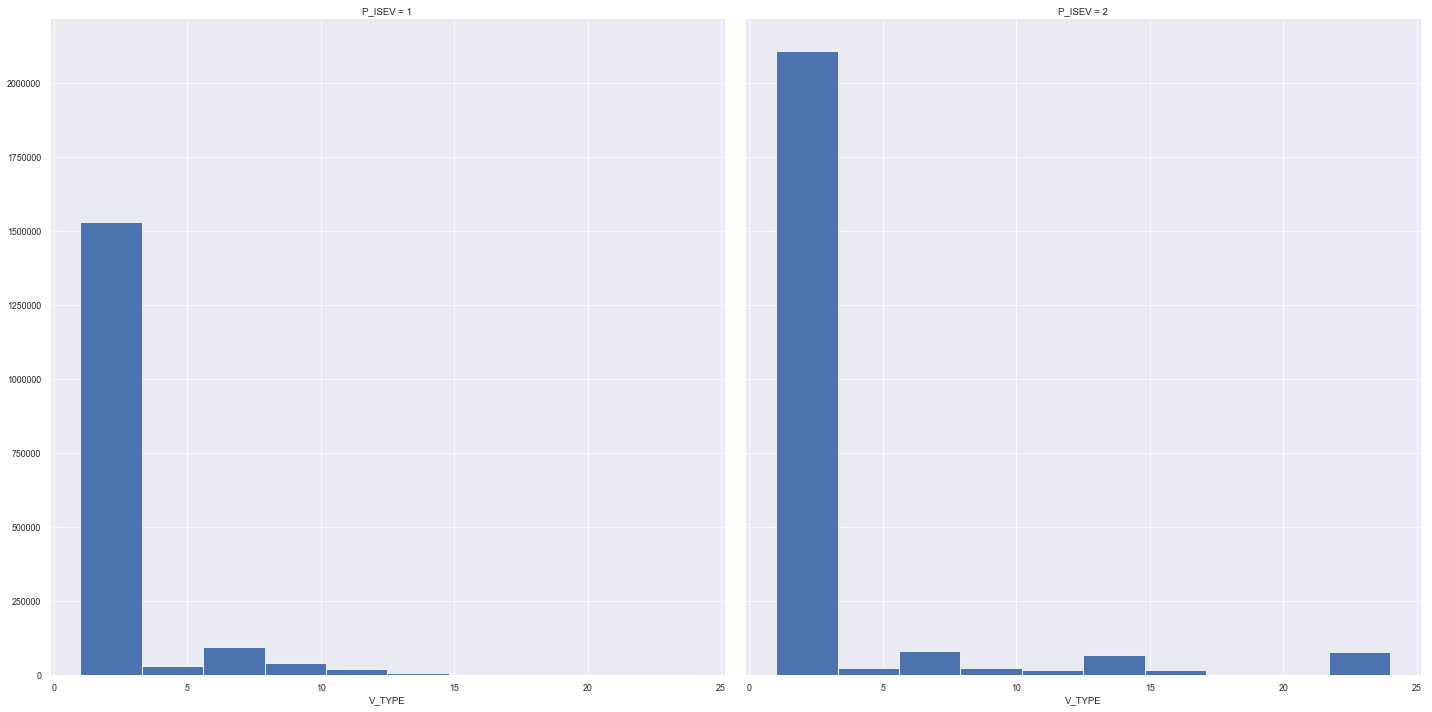

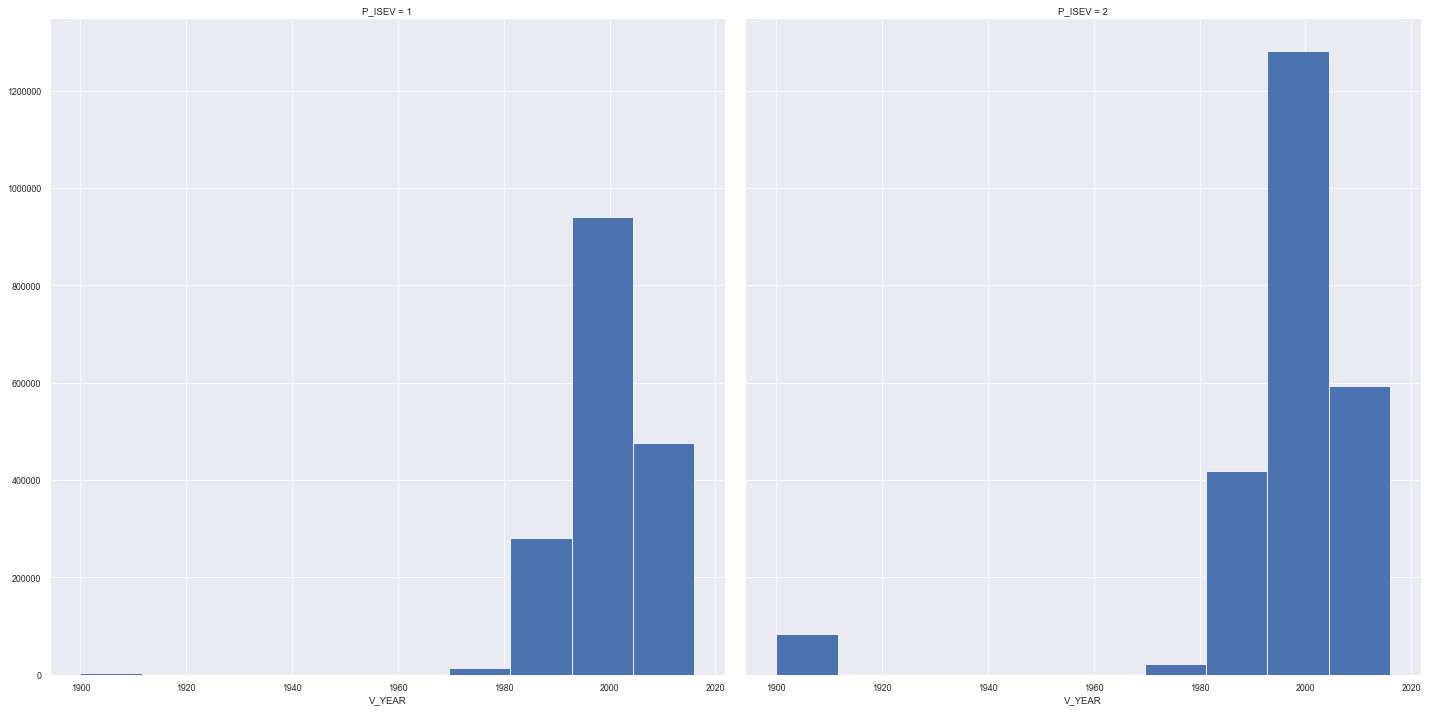

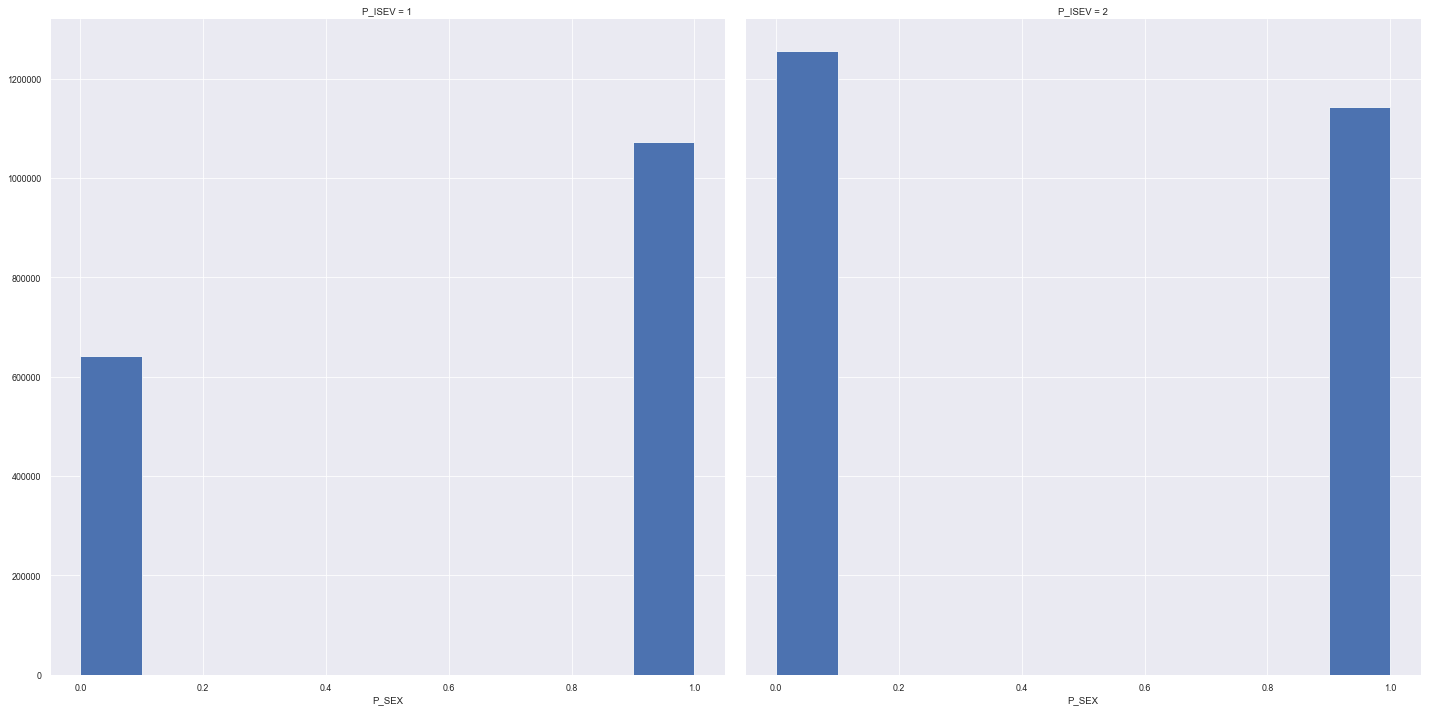

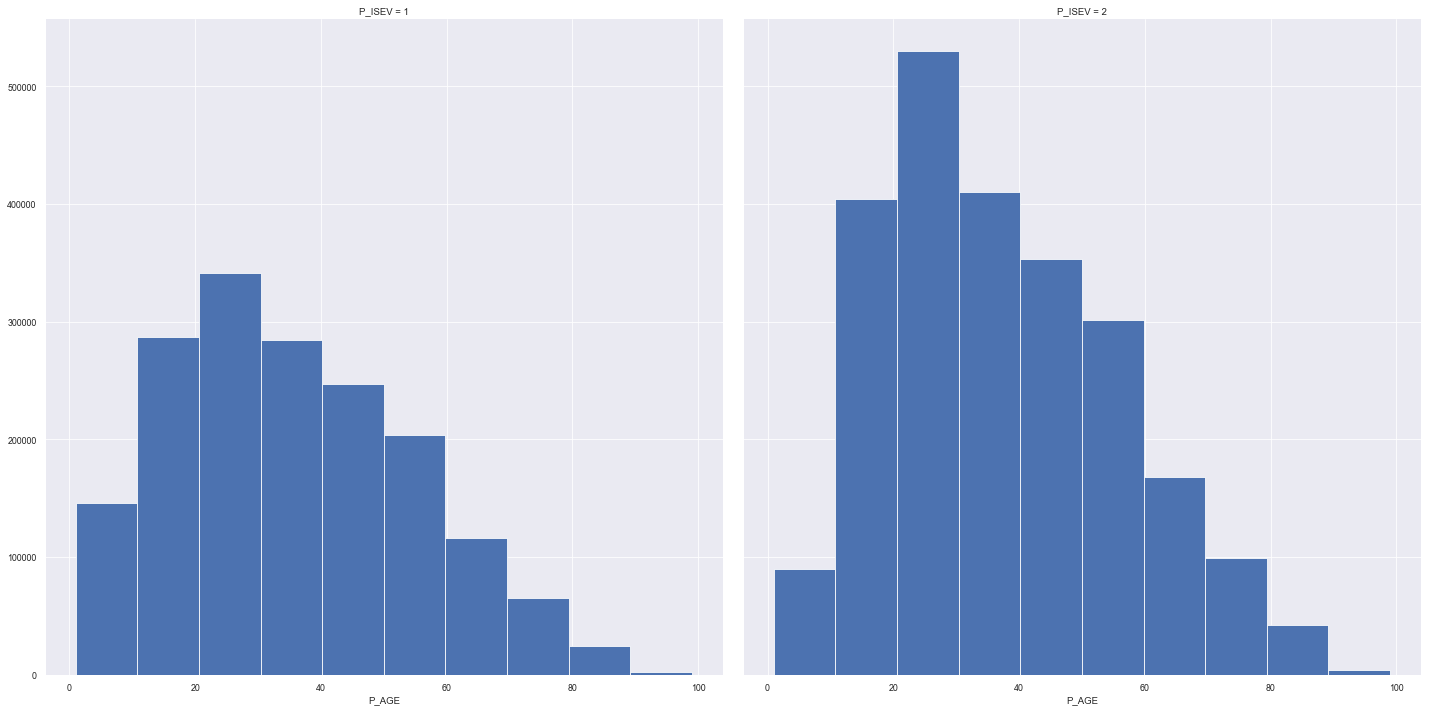

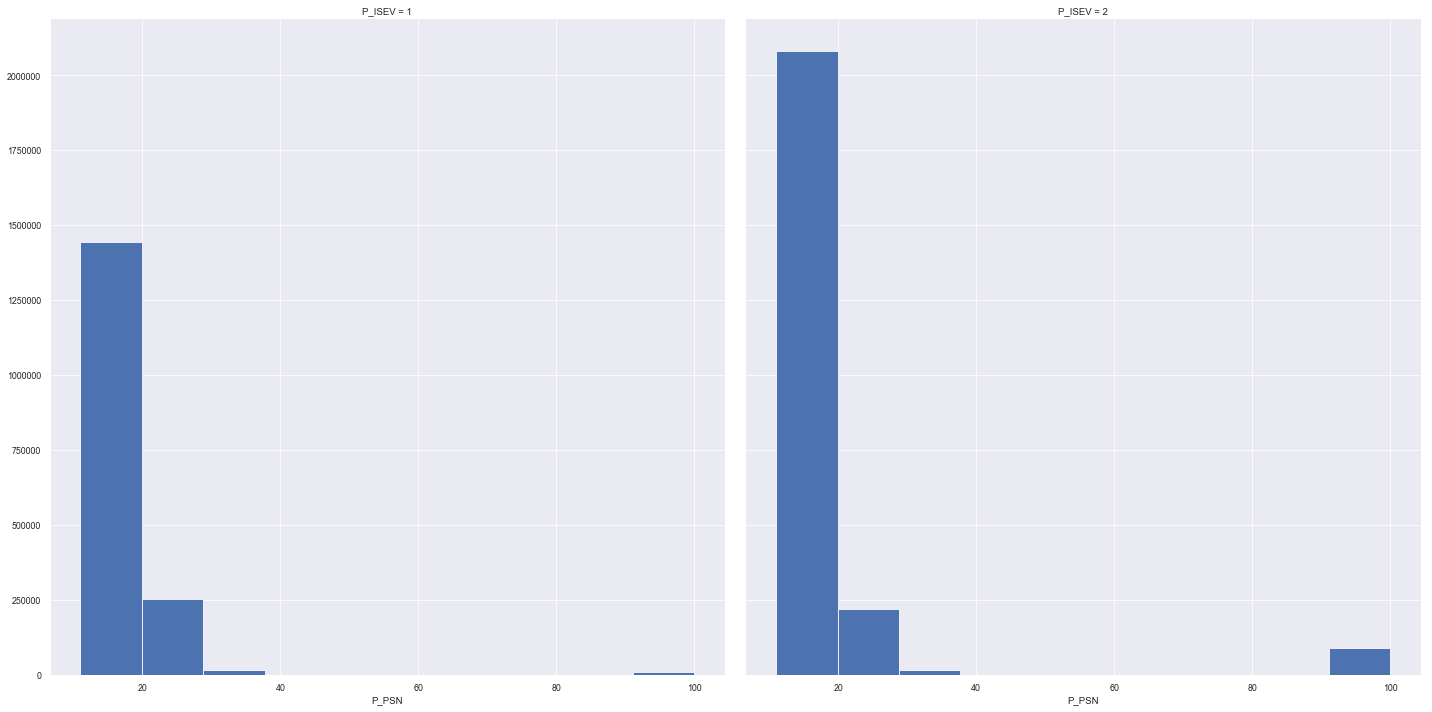

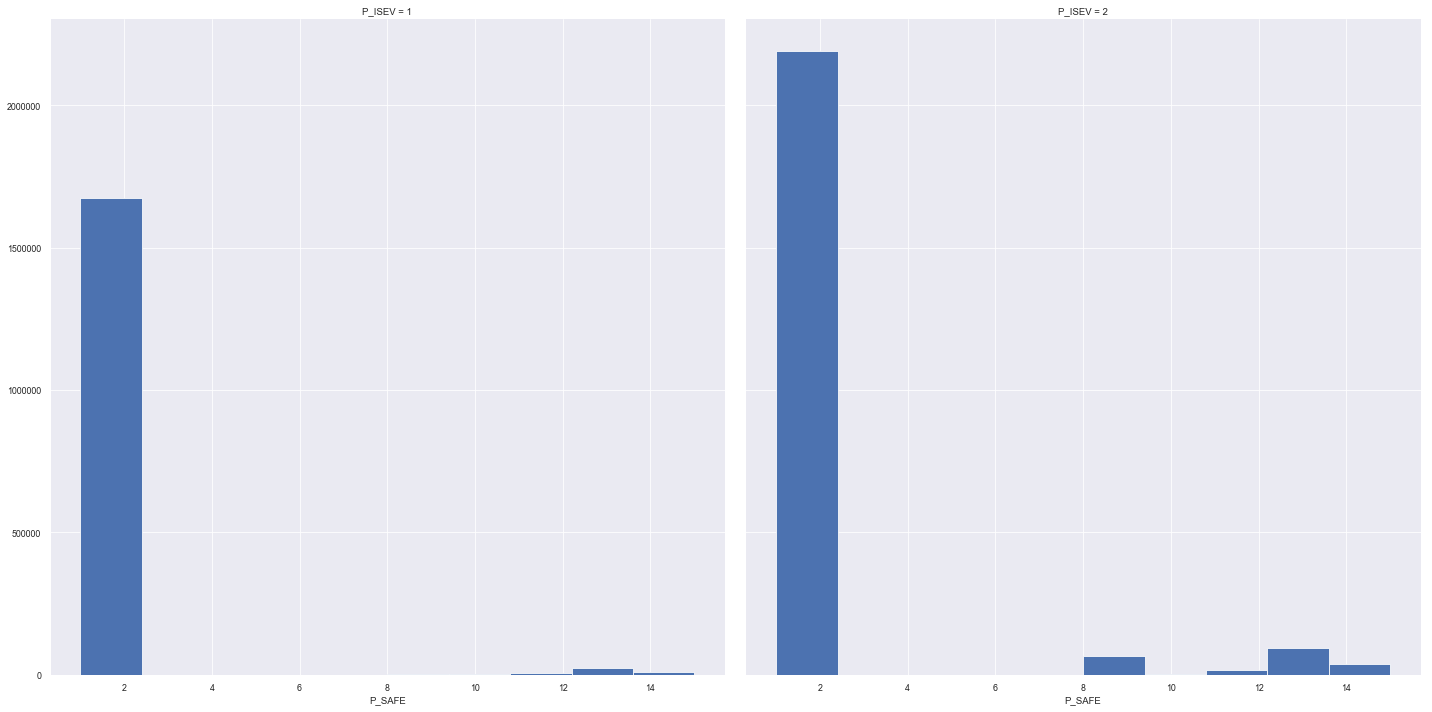

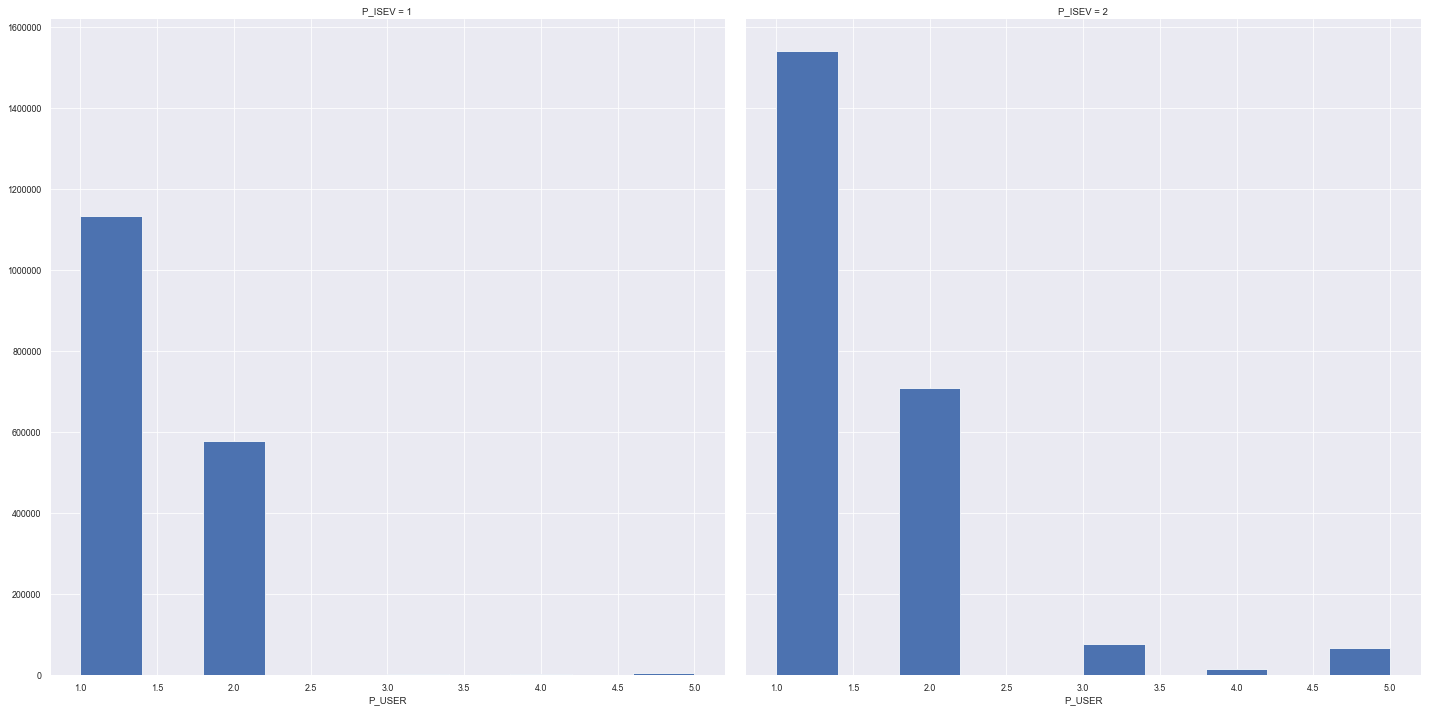

In [23]:
plt.figure(figsize=(12,12))

for col in df_binary.columns[0:len(df_binary.columns)-1]:
    k = sns.FacetGrid(df_binary, col="P_ISEV", height = 10, aspect=1)
    k = k.map(plt.hist, col)

### 8b. Data Visualization for Multi Class

In [24]:
df_multi = df_X.copy()
df_multi['P_ISEV'] = df_Ym

### Histogram per variable

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029E197C99B0>,
      dtype=object)

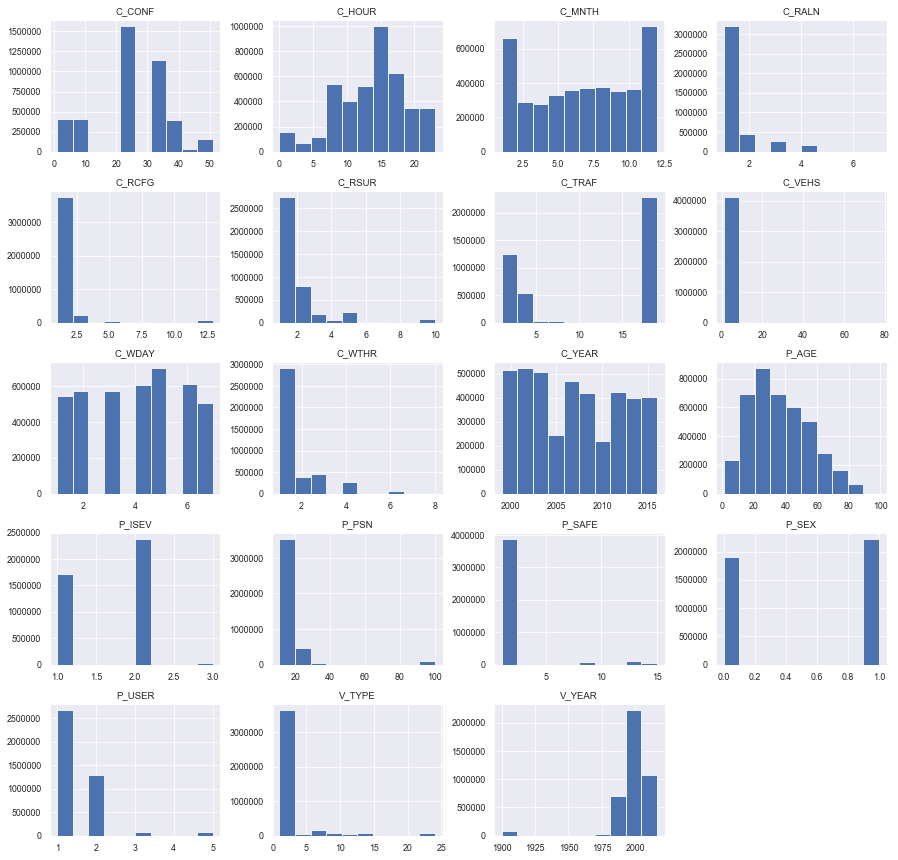

In [25]:
df_multi.astype('int').hist(figsize = [15, 15])

### Histogram per variable group by binary class attribute

P_ISEV
1    [[AxesSubplot(0.125,0.758226;0.158163x0.121774...
2    [[AxesSubplot(0.125,0.758226;0.158163x0.121774...
3    [[AxesSubplot(0.125,0.758226;0.158163x0.121774...
dtype: object

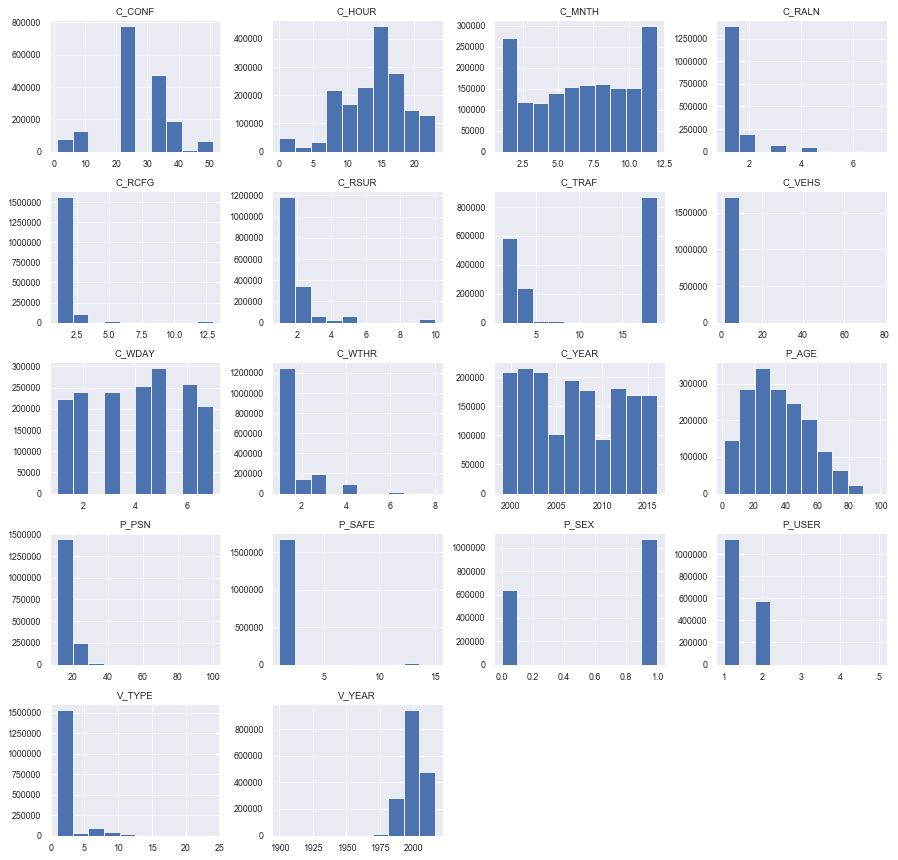

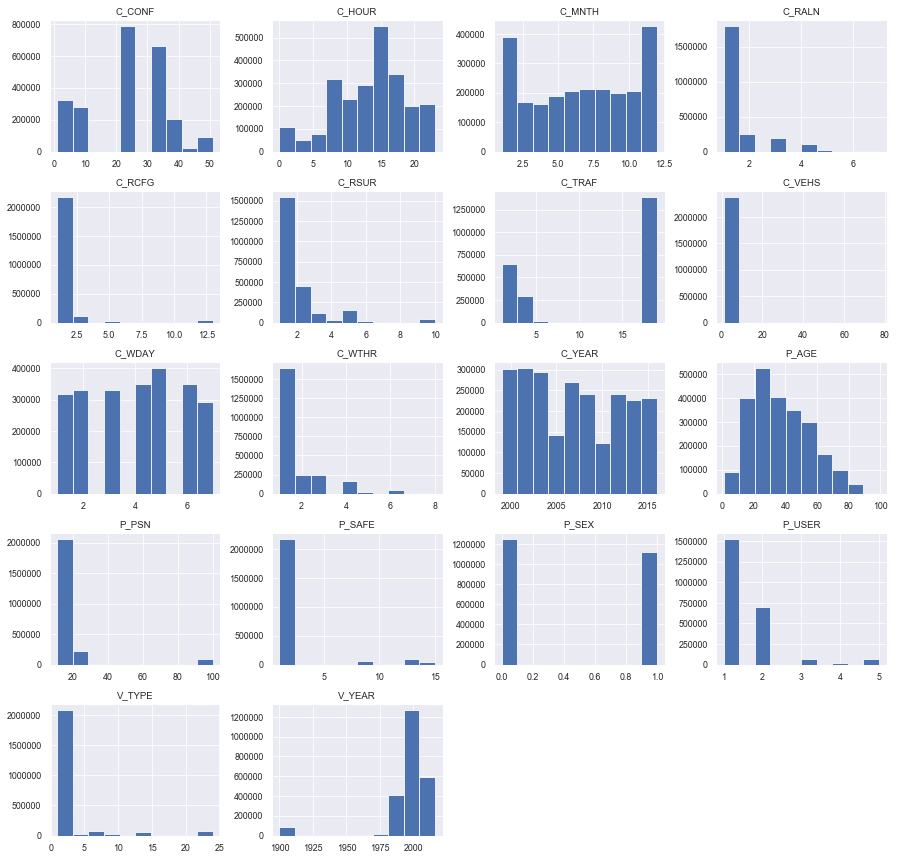

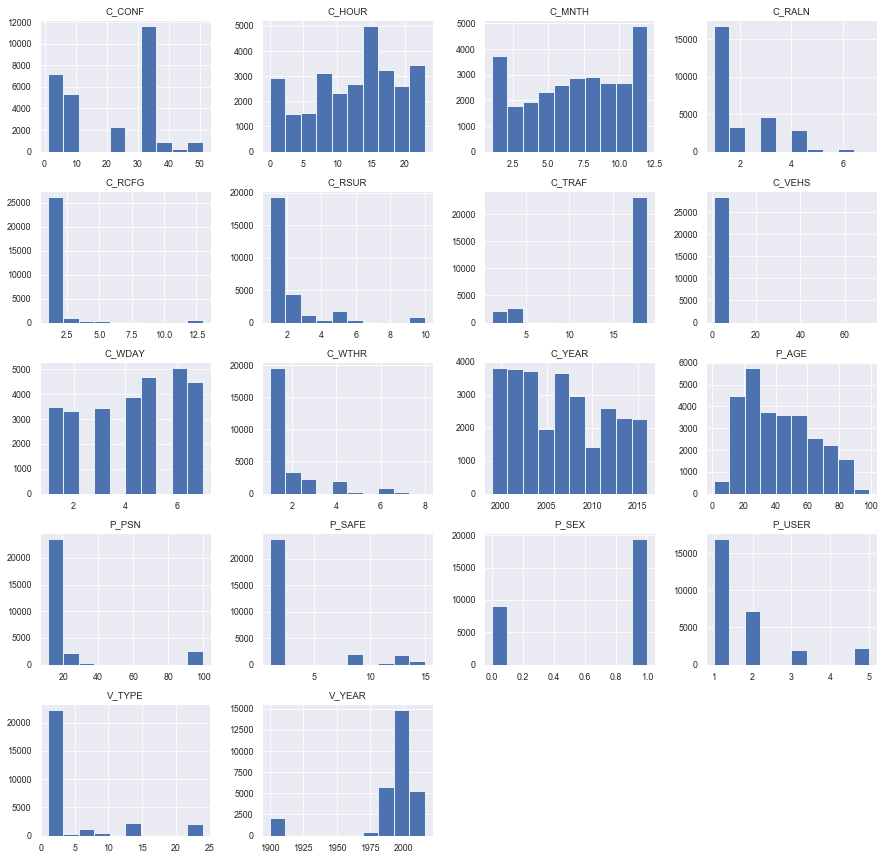

In [26]:
df_multi.astype('int').groupby('P_ISEV').hist(figsize = [15, 15])

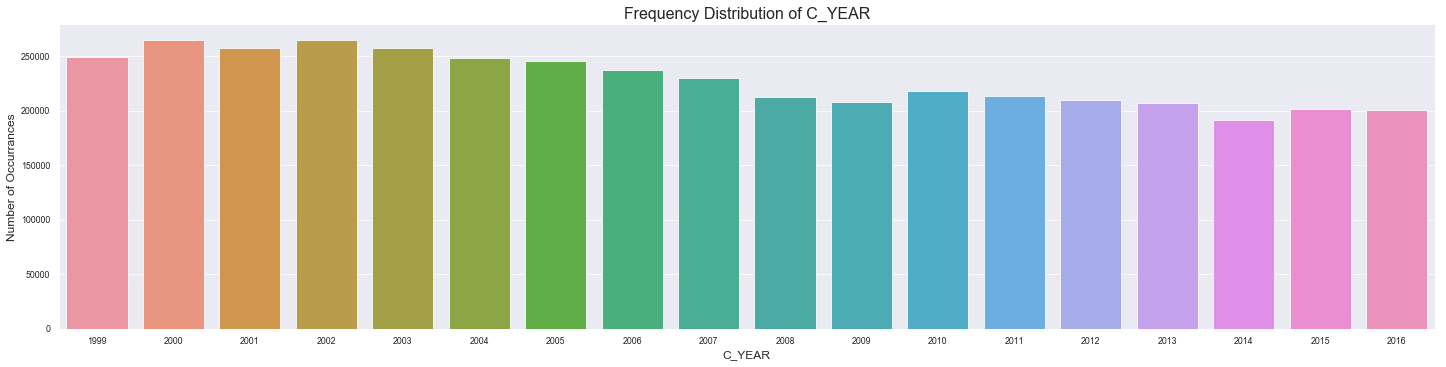

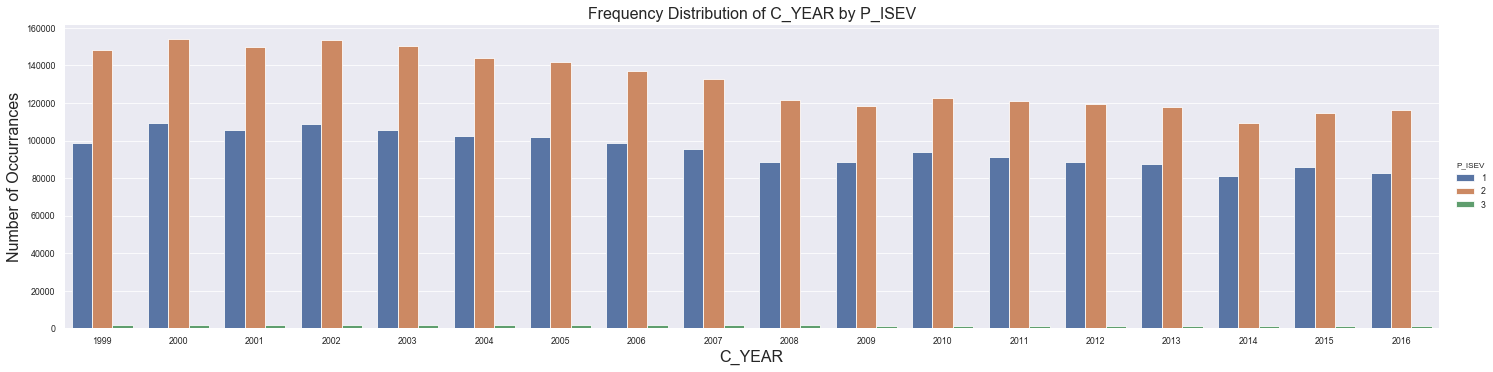

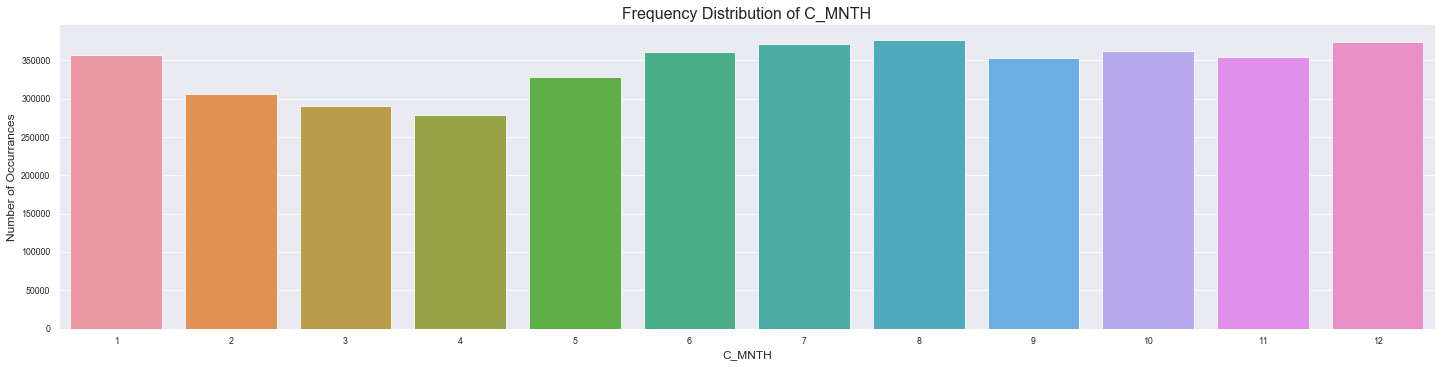

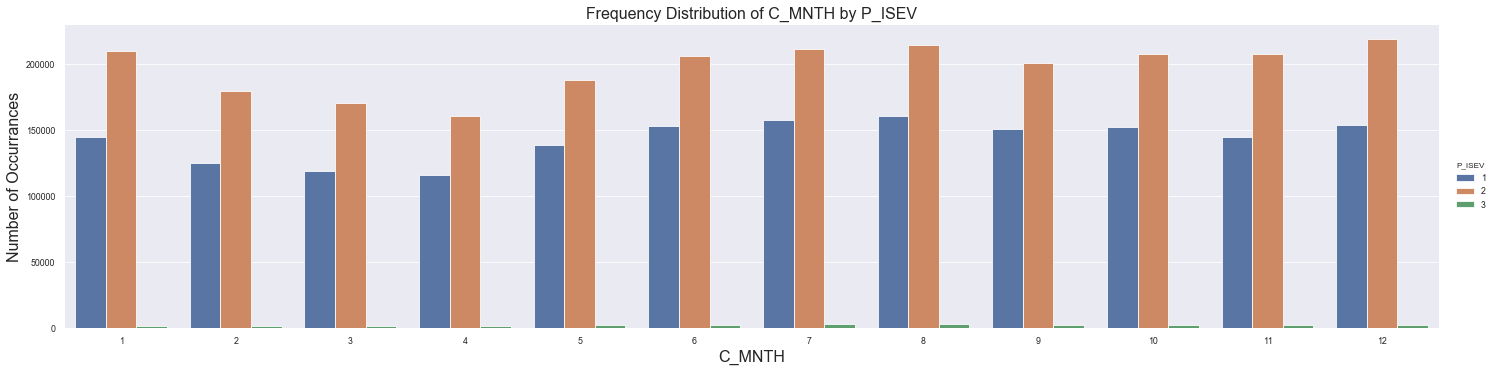

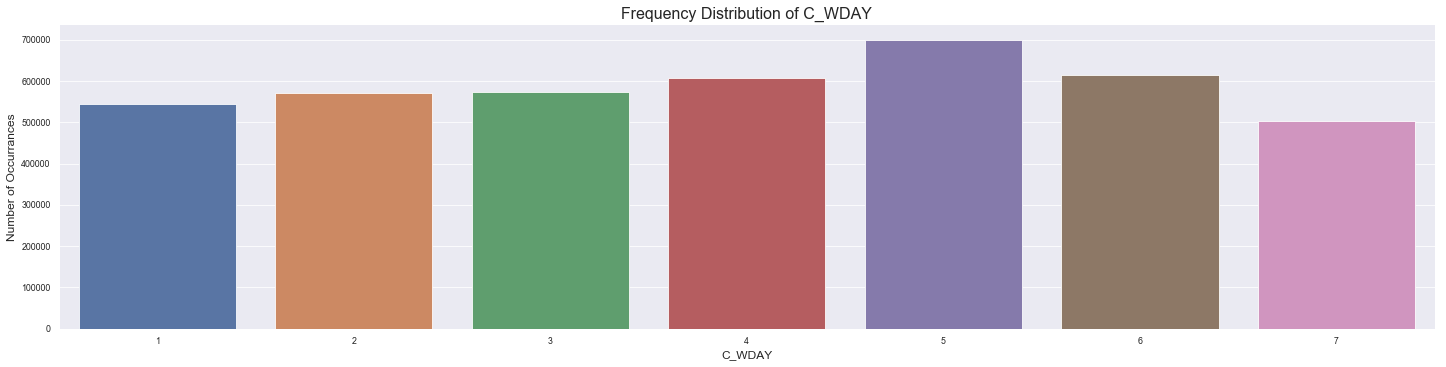

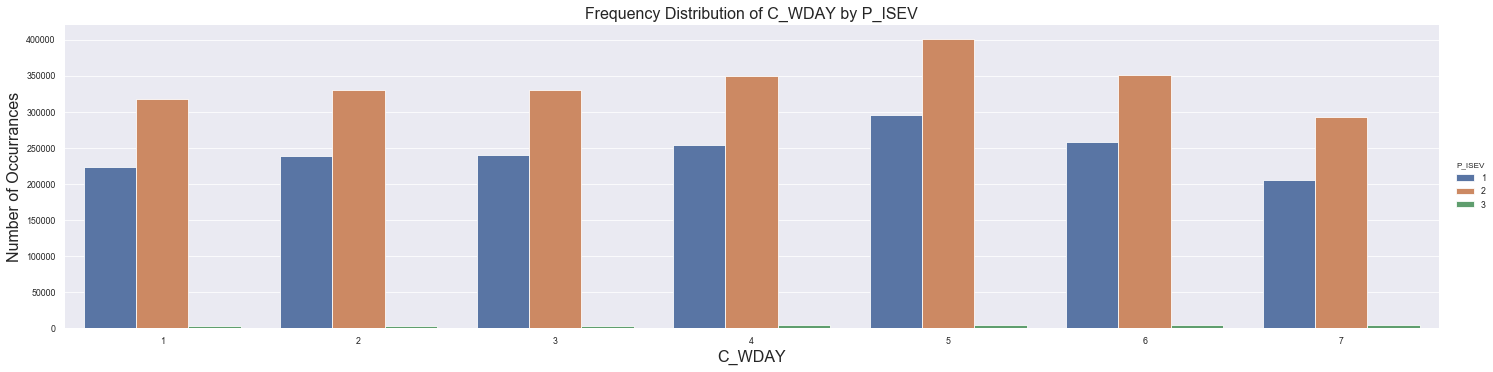

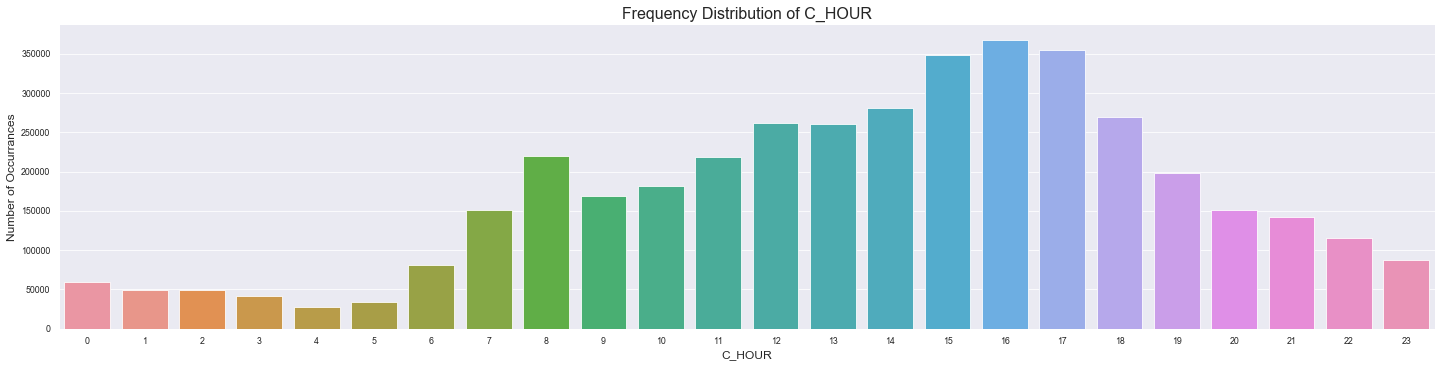

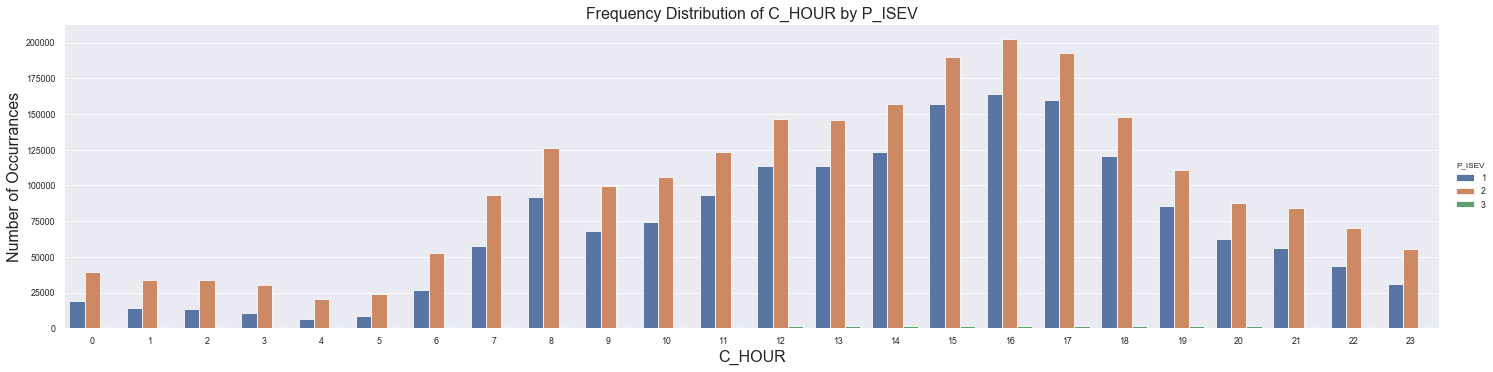

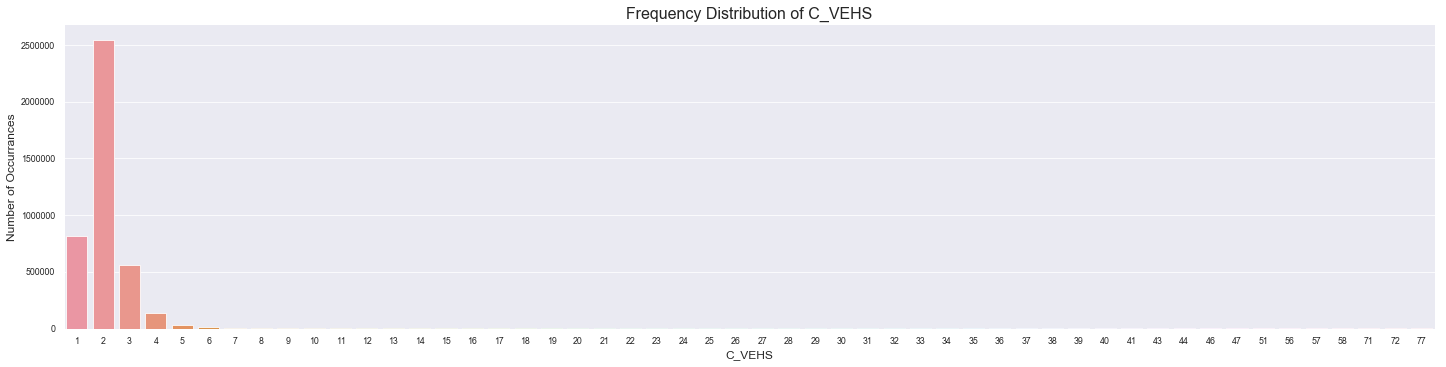

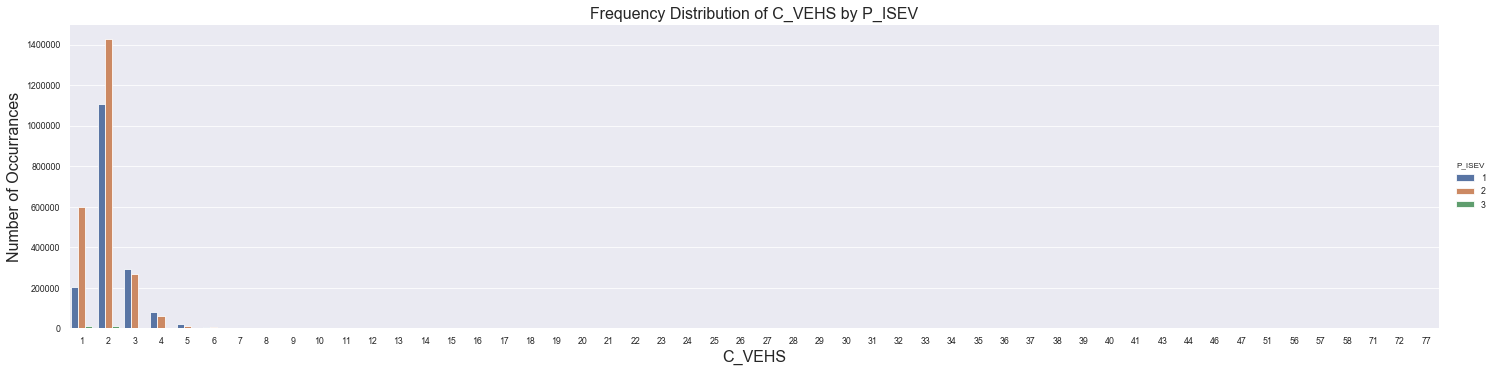

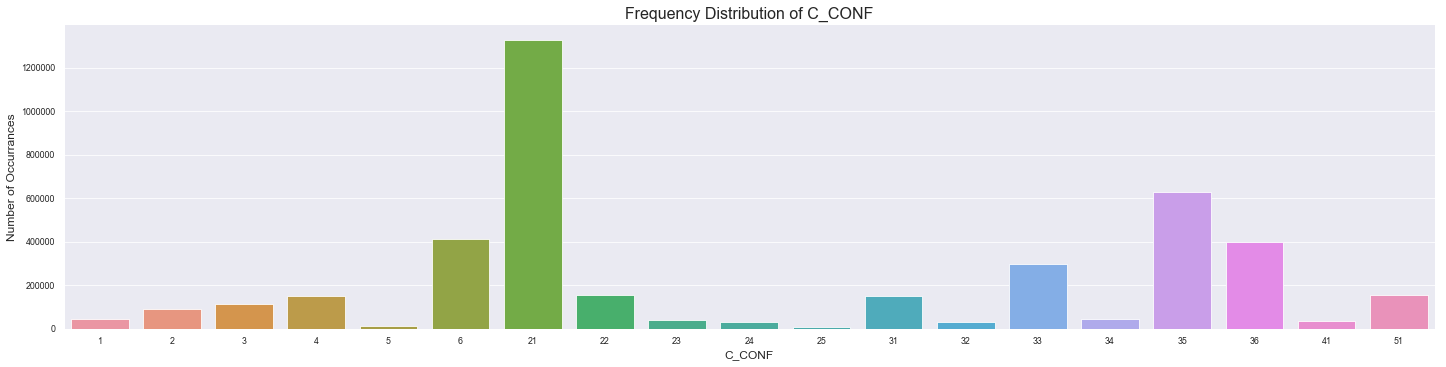

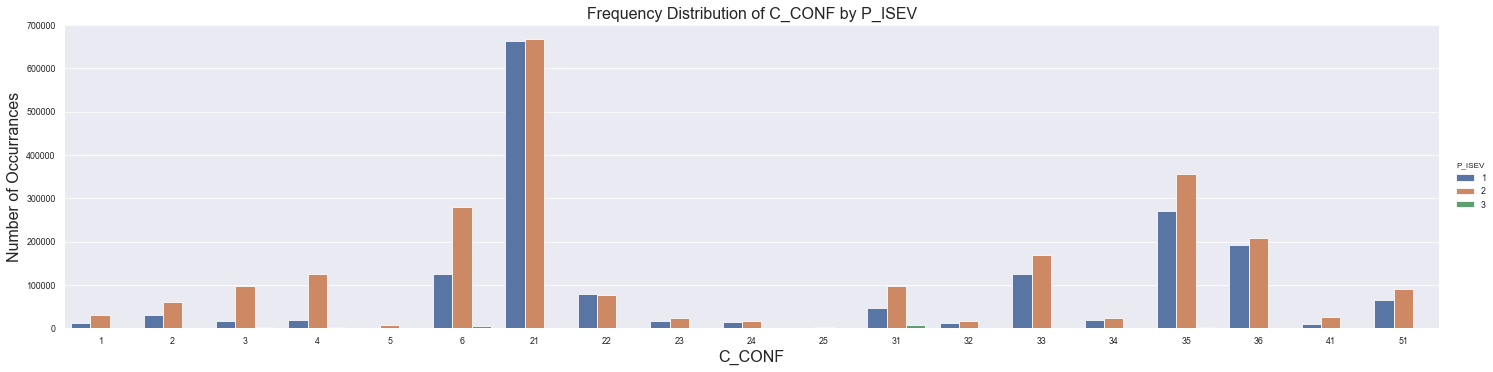

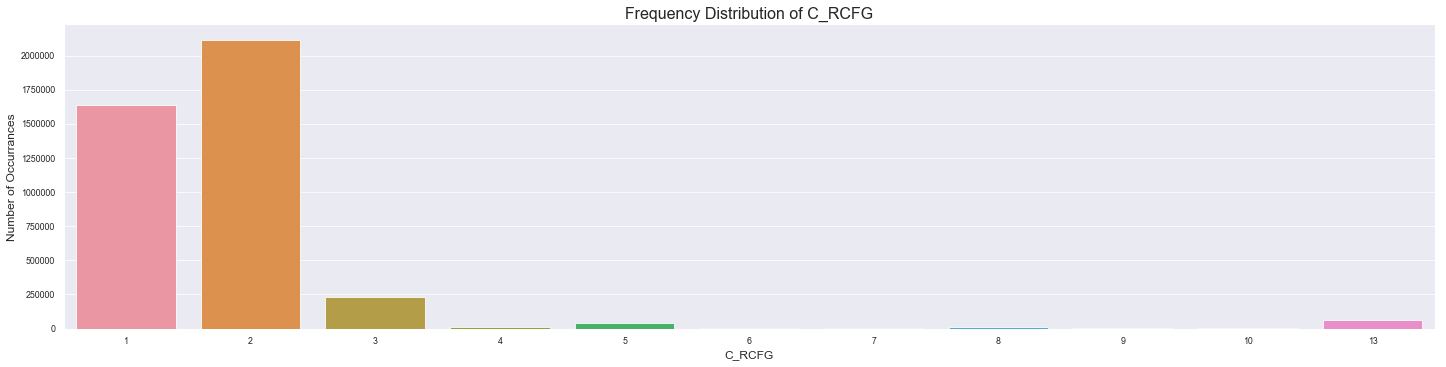

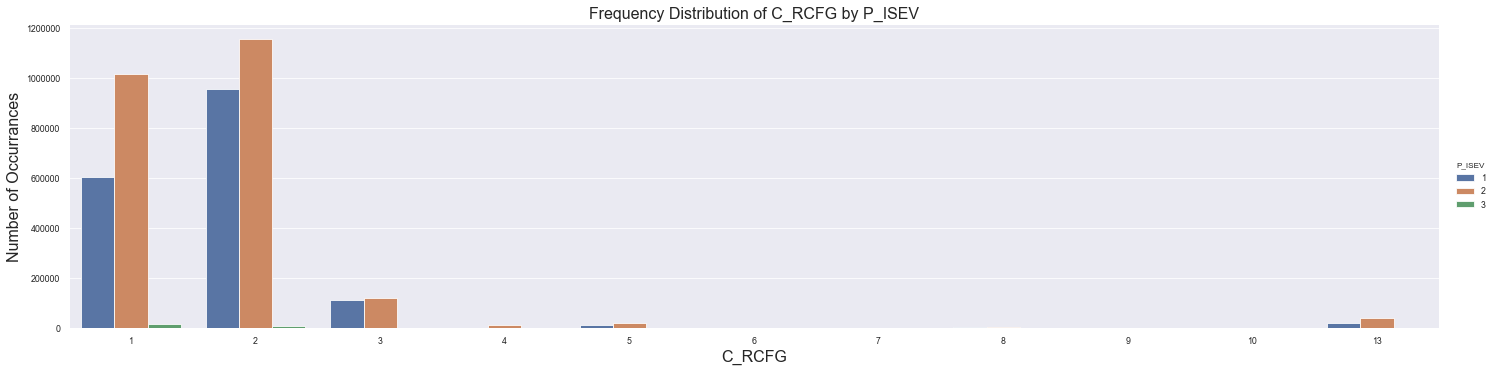

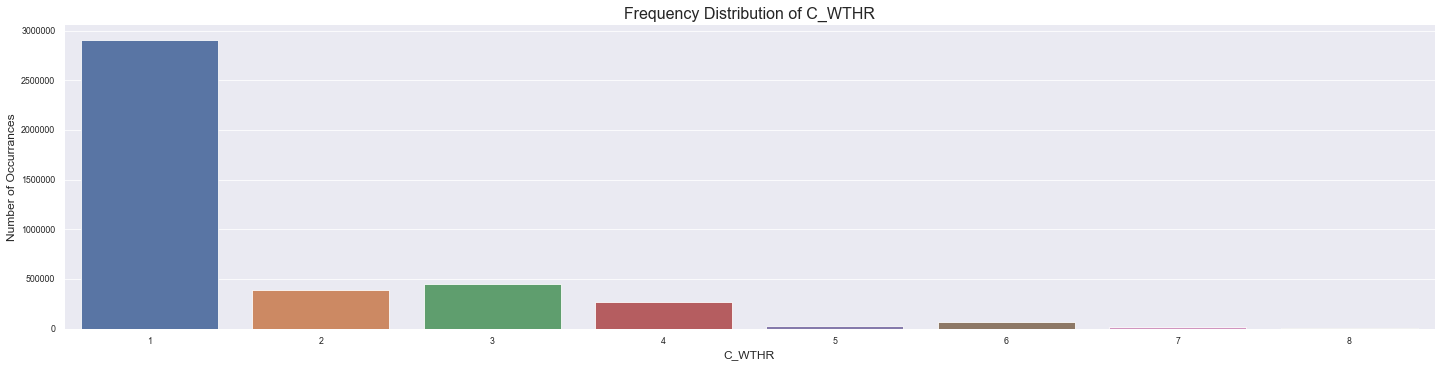

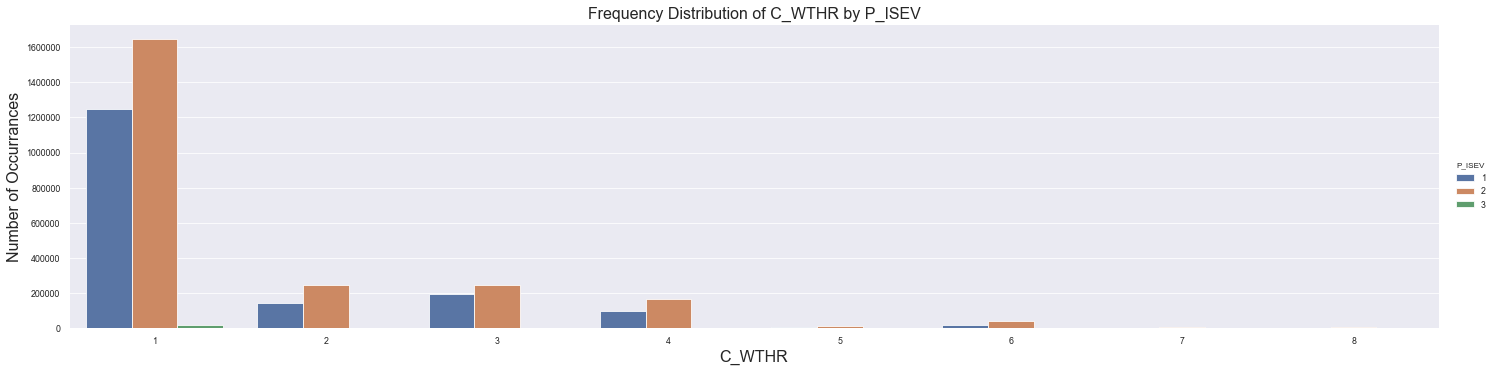

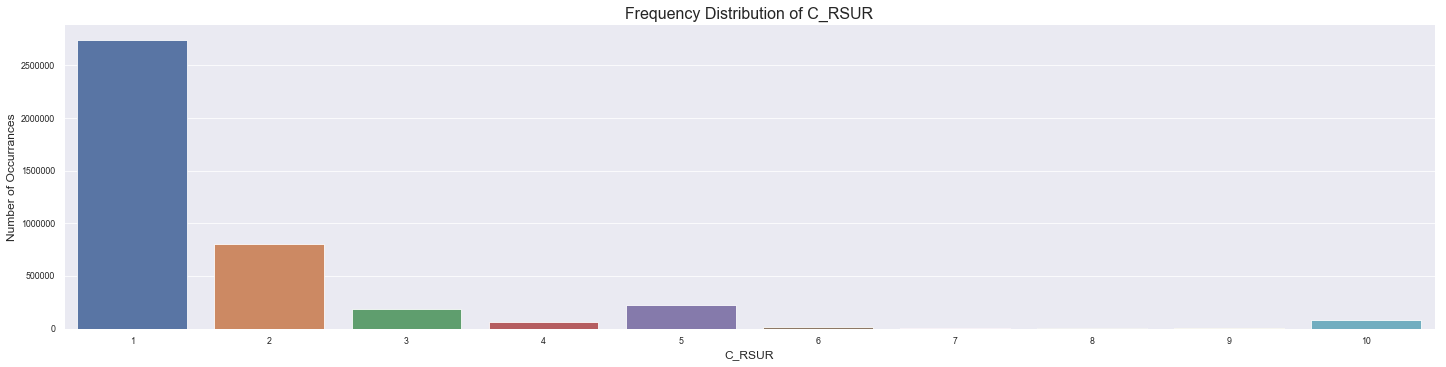

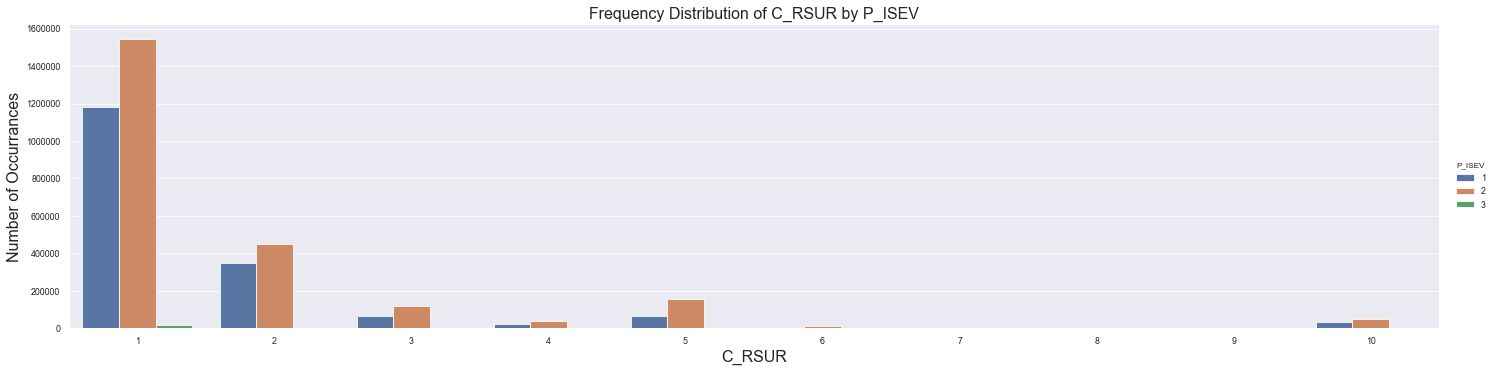

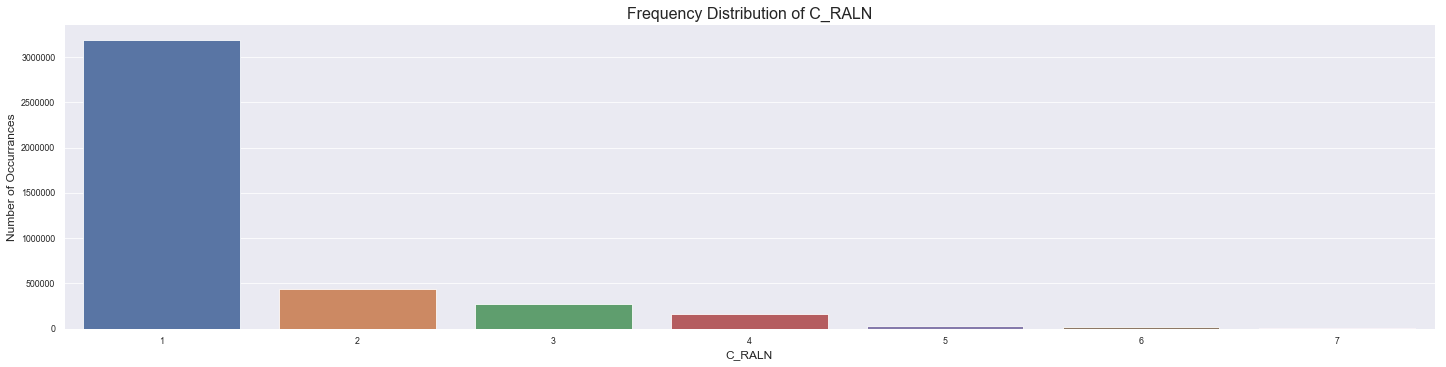

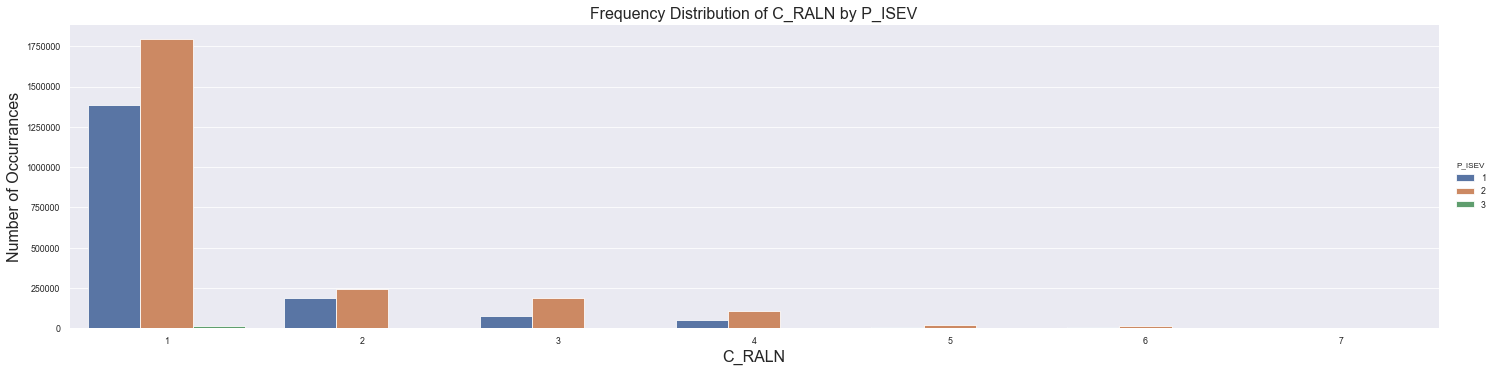

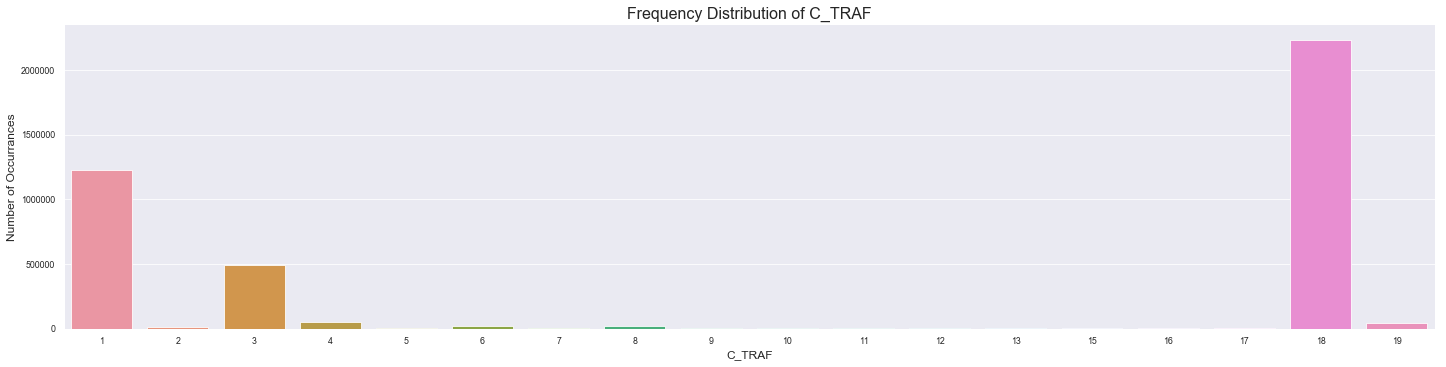

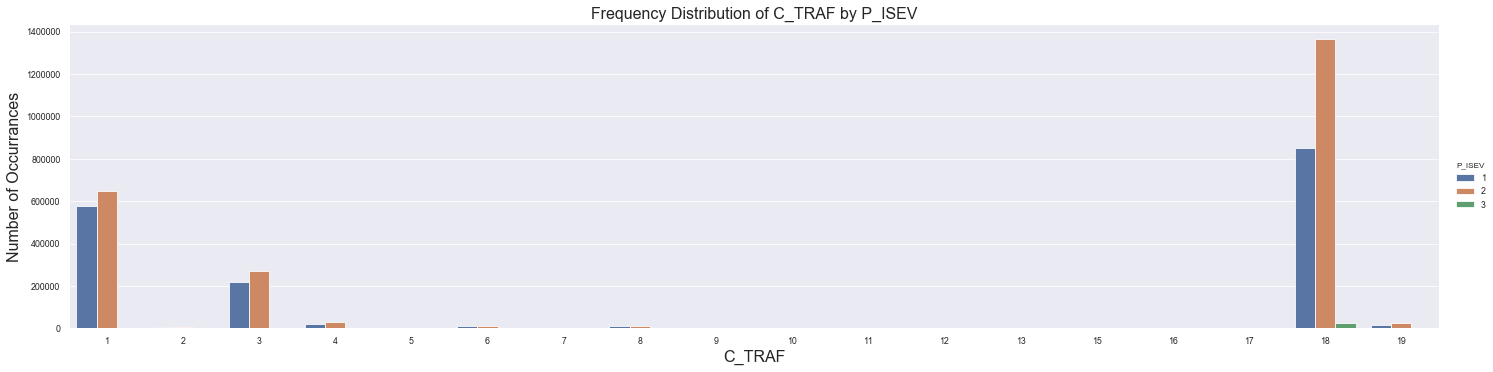

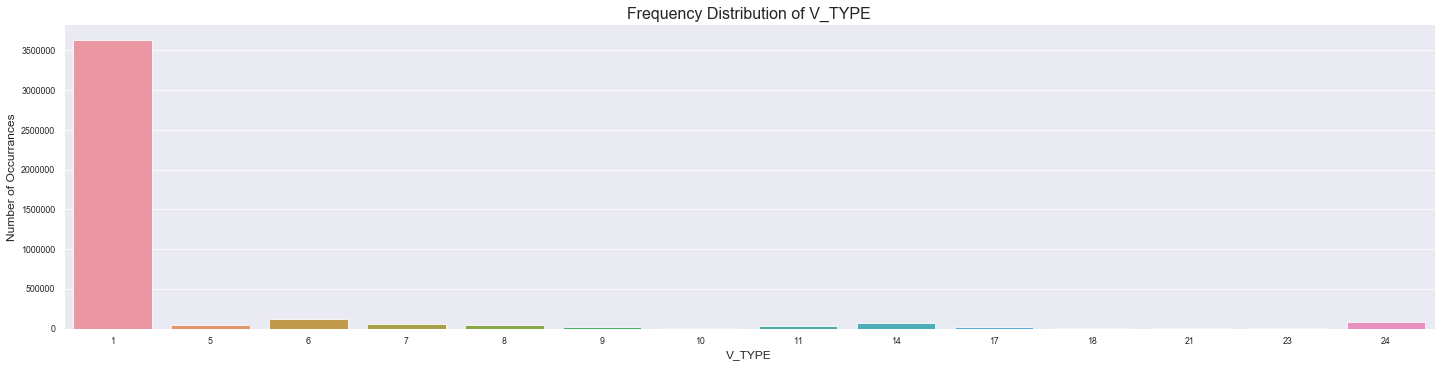

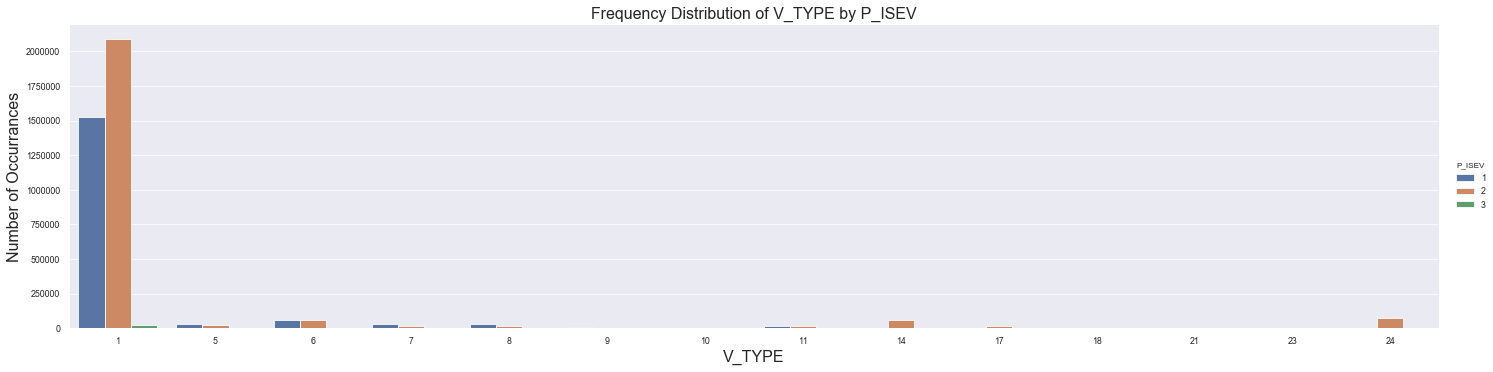

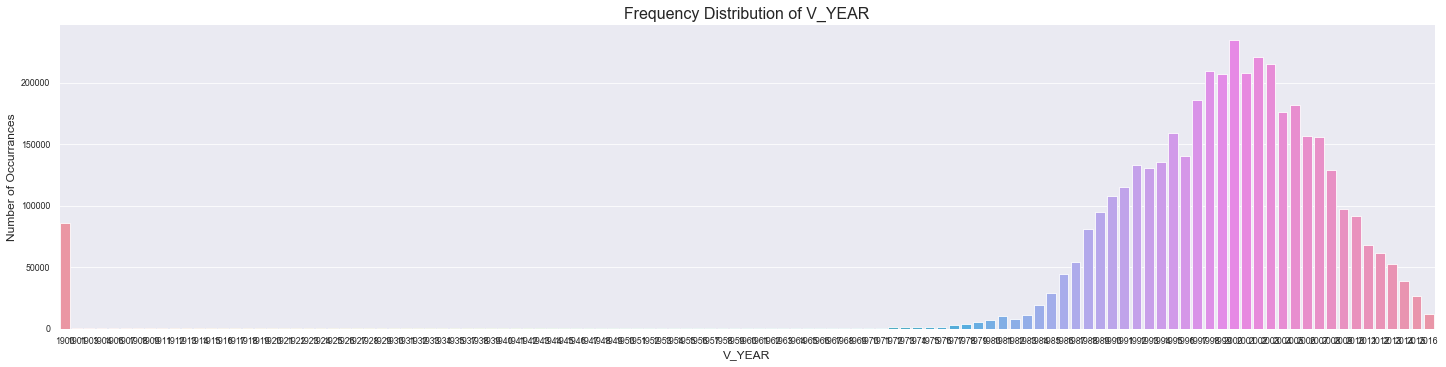

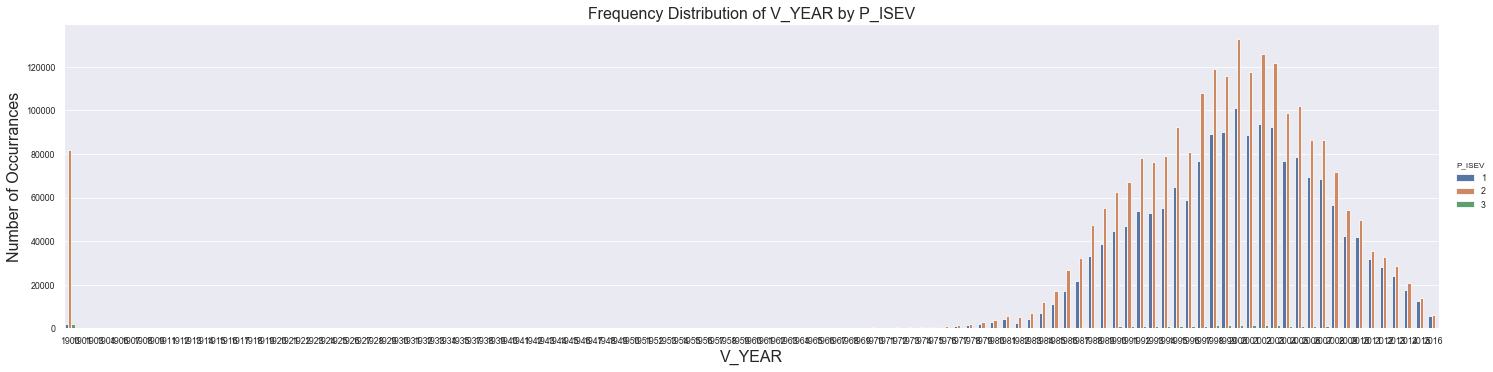

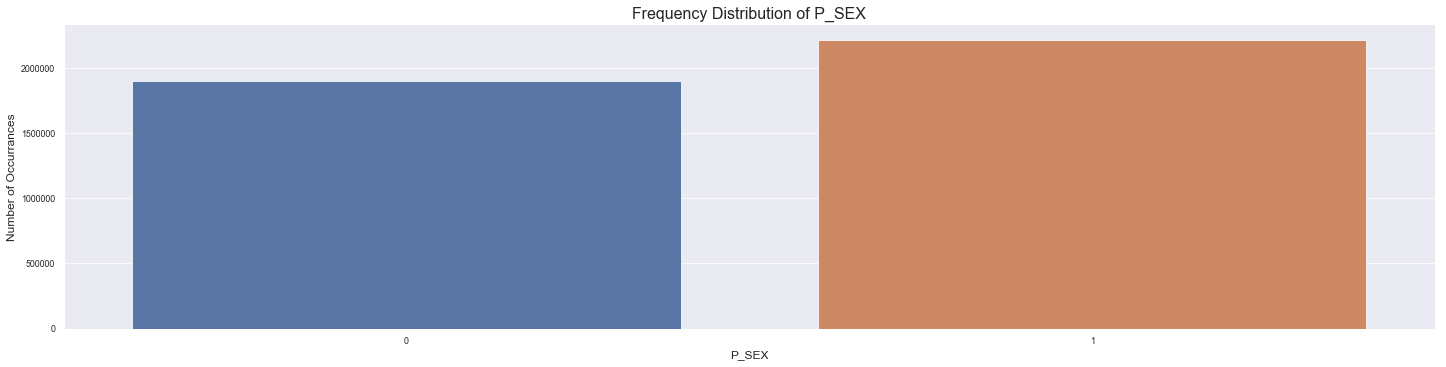

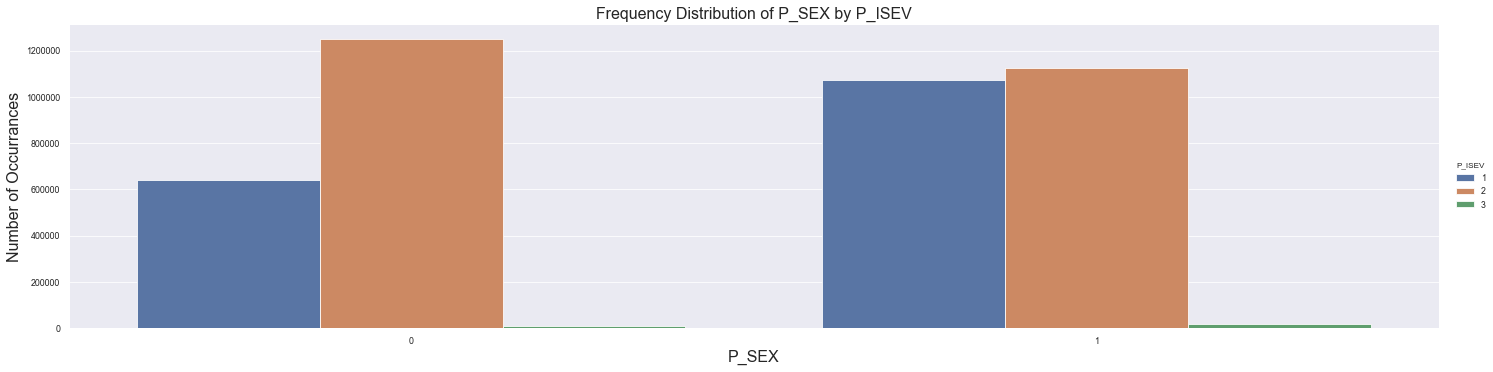

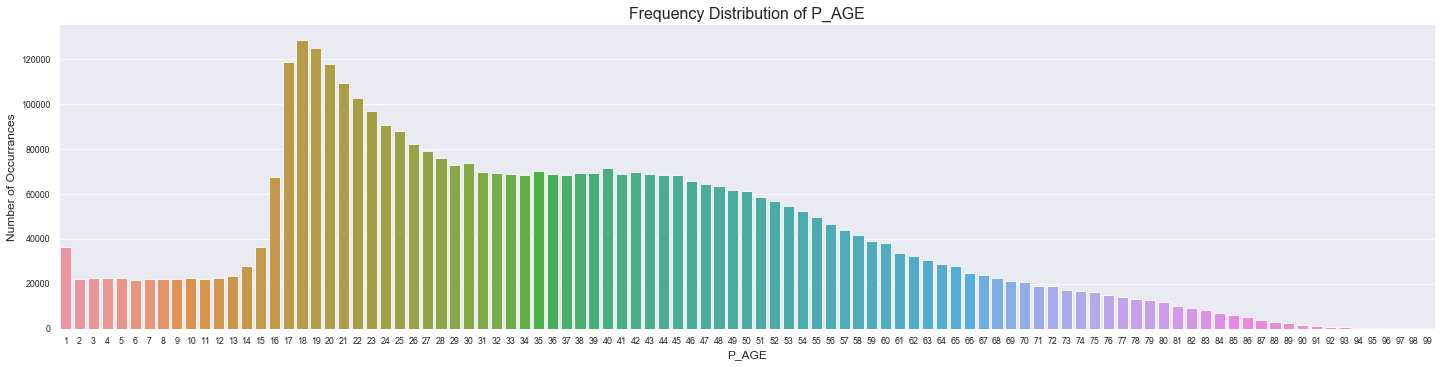

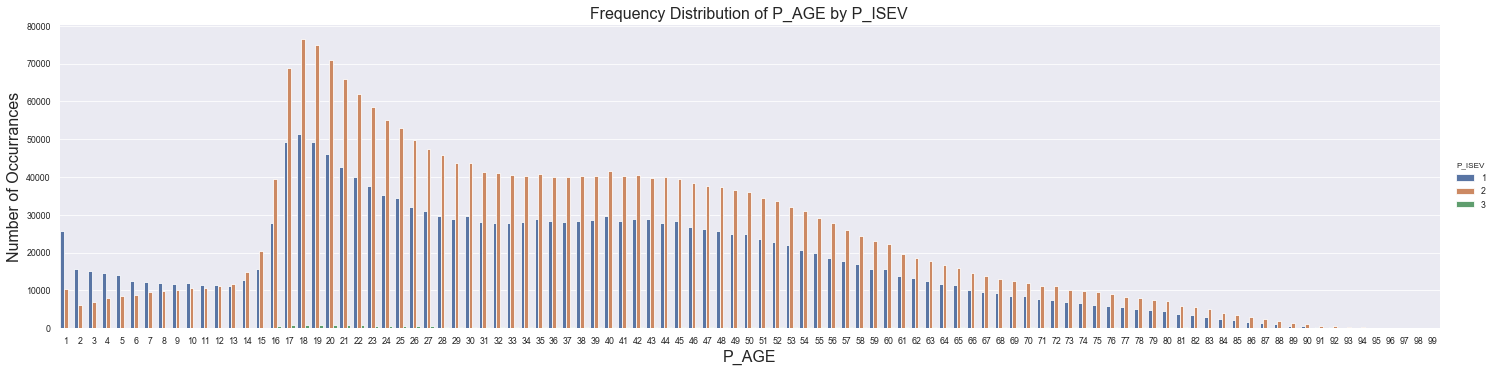

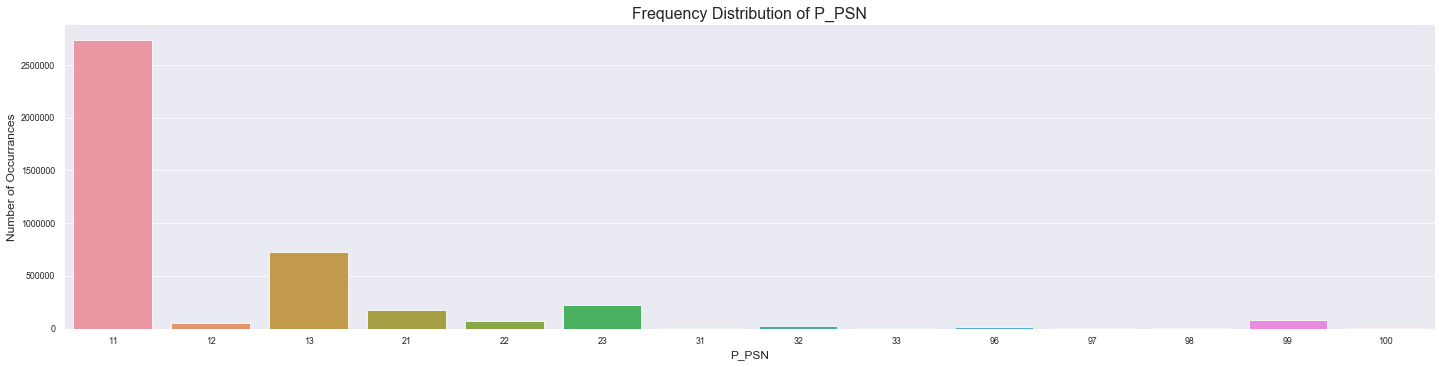

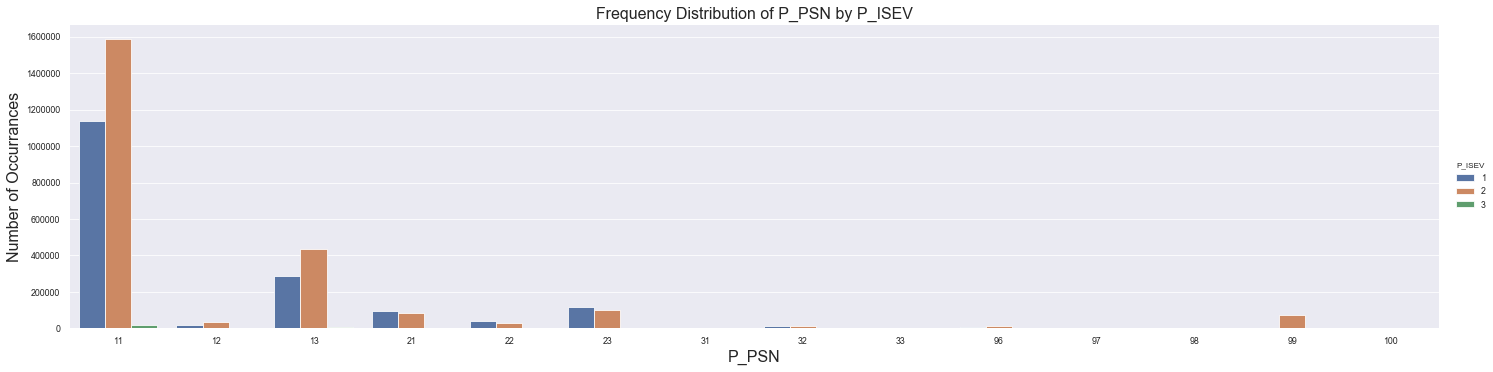

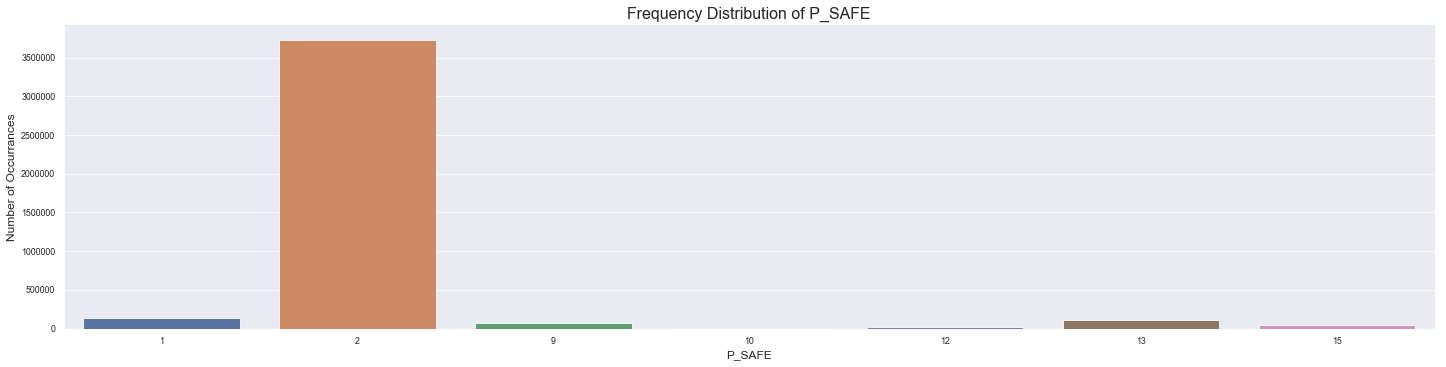

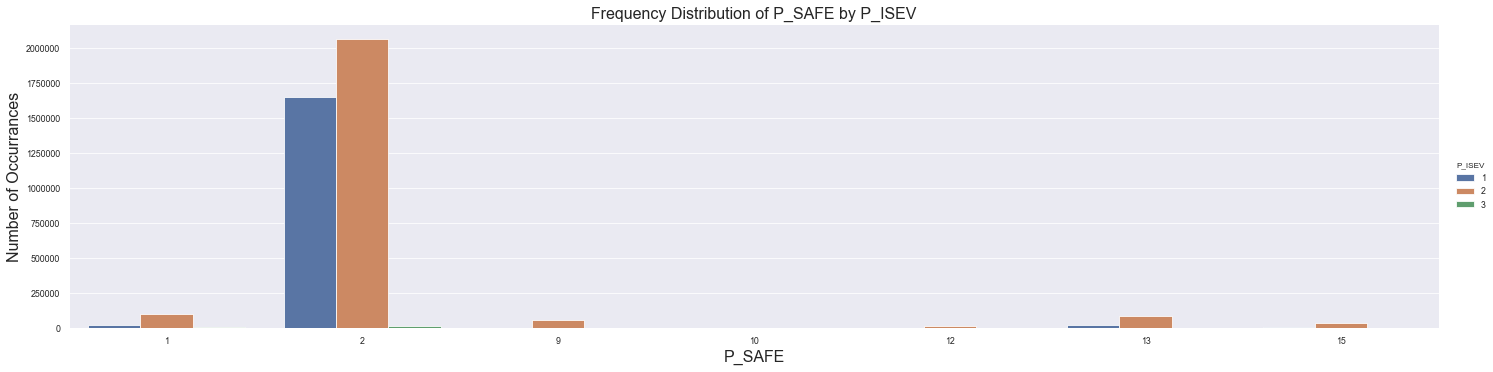

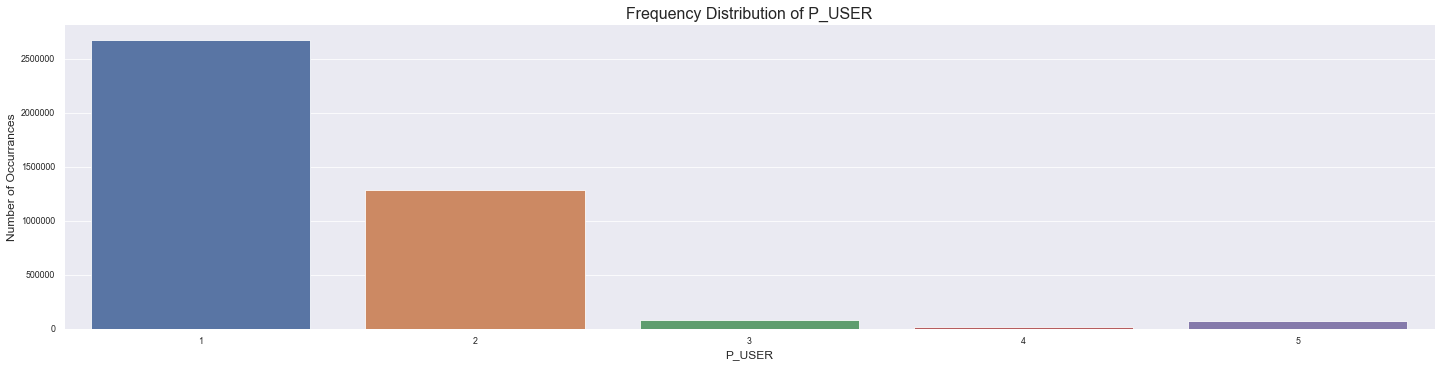

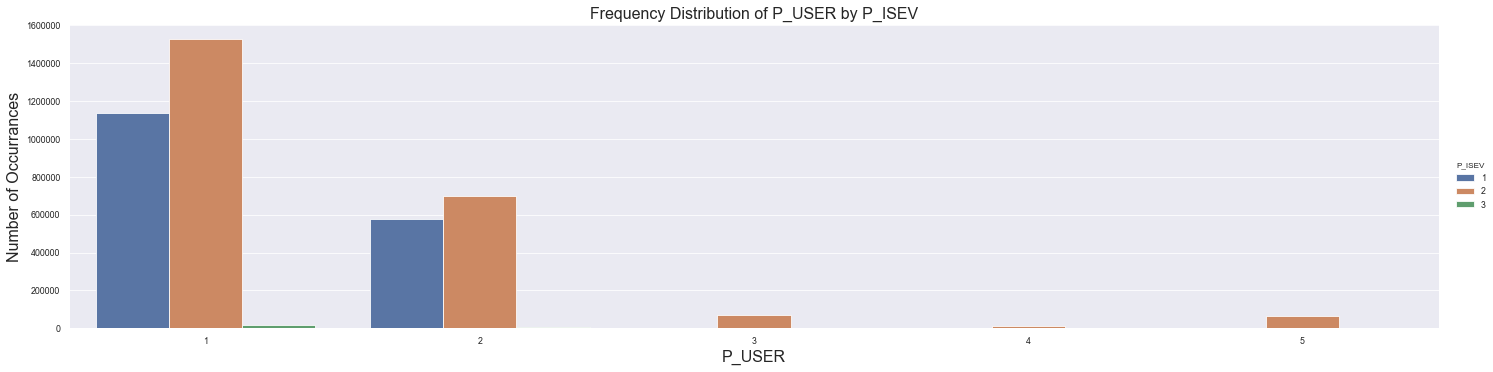

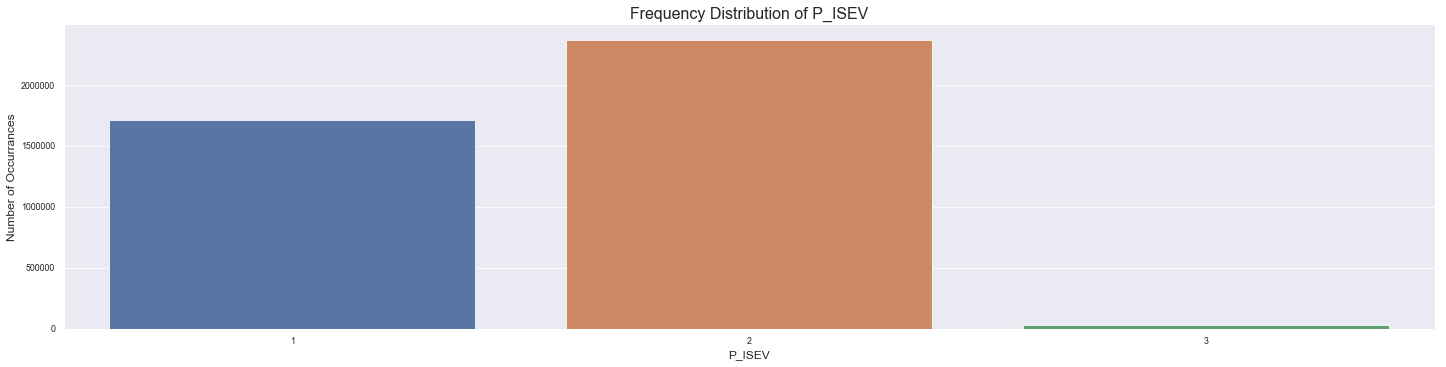

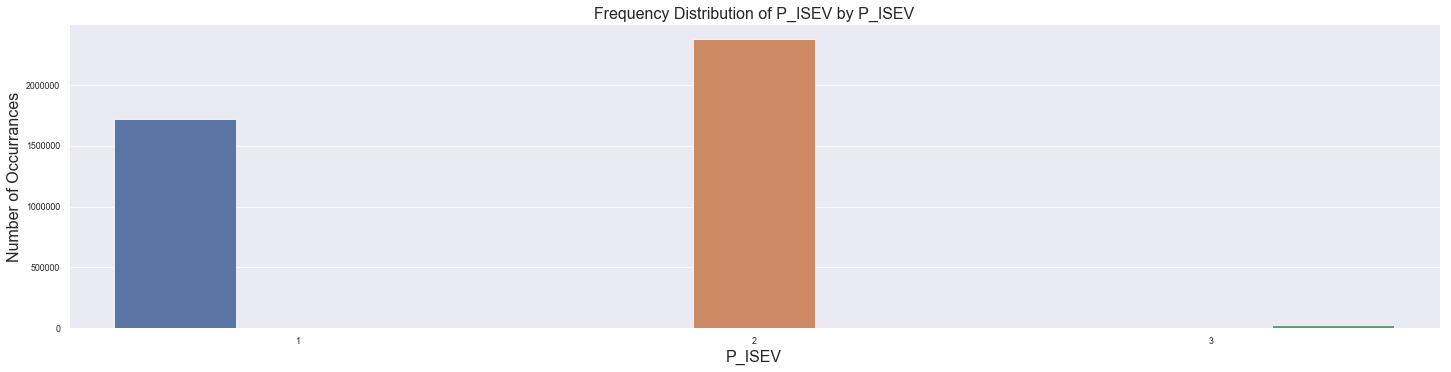

In [27]:
for col in df_multi.columns:
    g = sns.catplot(x = col, data=df_multi, kind="count", legend = True, height = 5, aspect = 4)
    g.set_xticklabels(step=1)
    plt.title('Frequency Distribution of {0}'.format(col), fontsize=16)
    plt.ylabel('Number of Occurrances', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.show()
    
    
    h = sns.catplot(col, data=df_multi, kind="count", legend = True, height = 5, aspect = 4, hue = 'P_ISEV')
    h.set_xticklabels(step=1)
    plt.title('Frequency Distribution of {0} by P_ISEV'.format(col), fontsize=16)
    plt.ylabel('Number of Occurrances', fontsize=16)
    plt.xlabel(col, fontsize=16)
    plt.show()

### Box Plot

C:\Users\pradeep\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


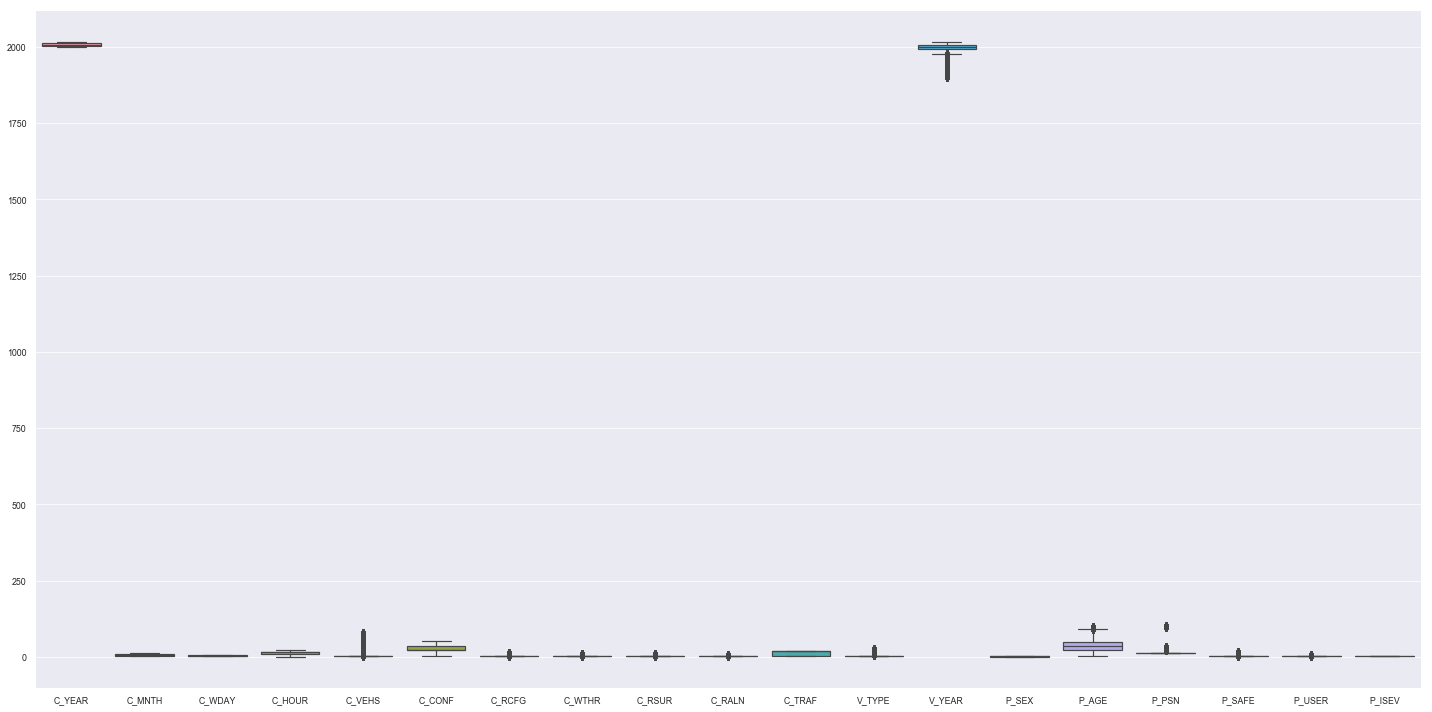

<Figure size 360x720 with 0 Axes>

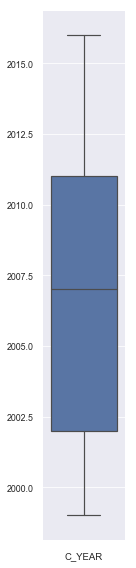

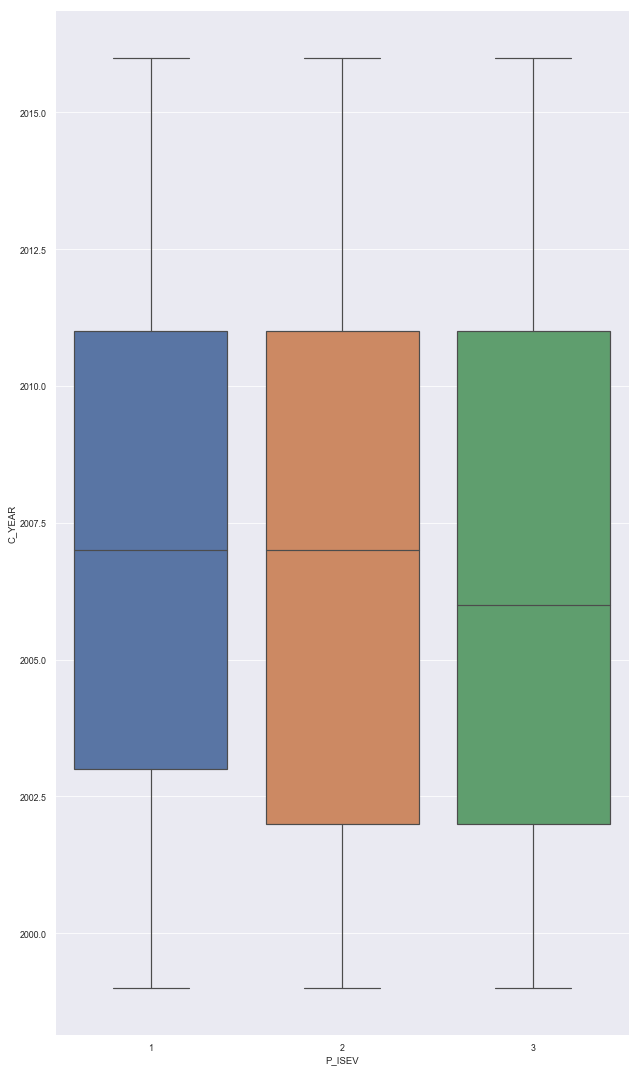

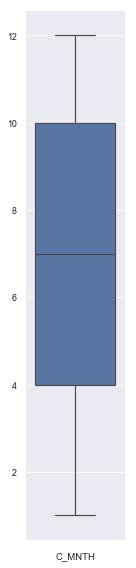

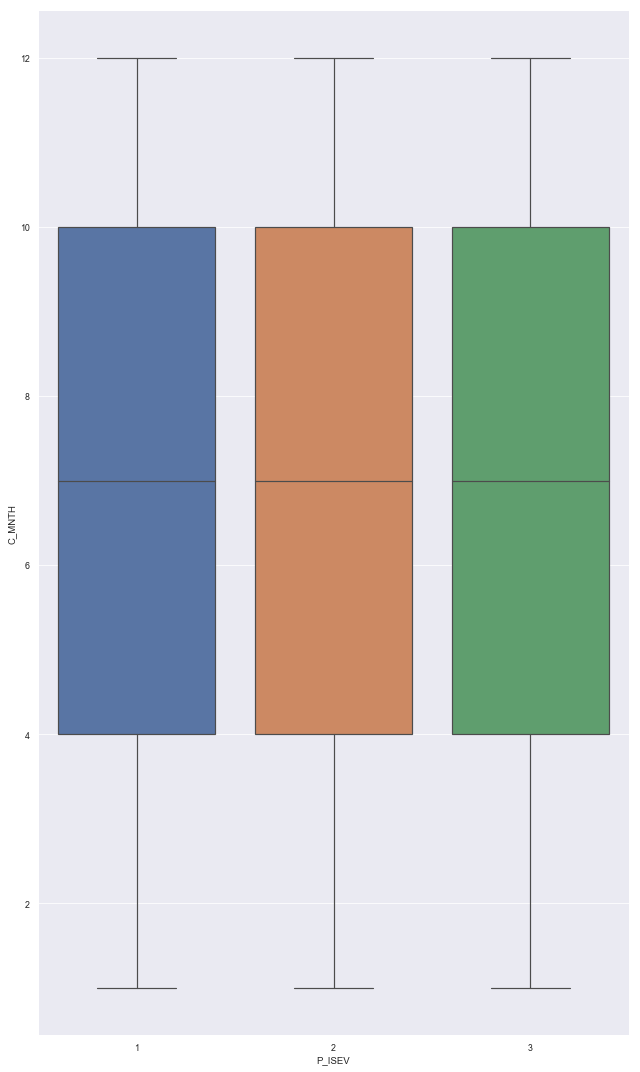

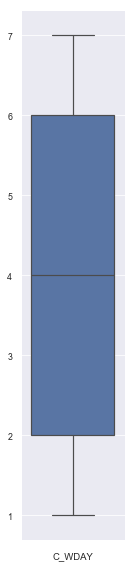

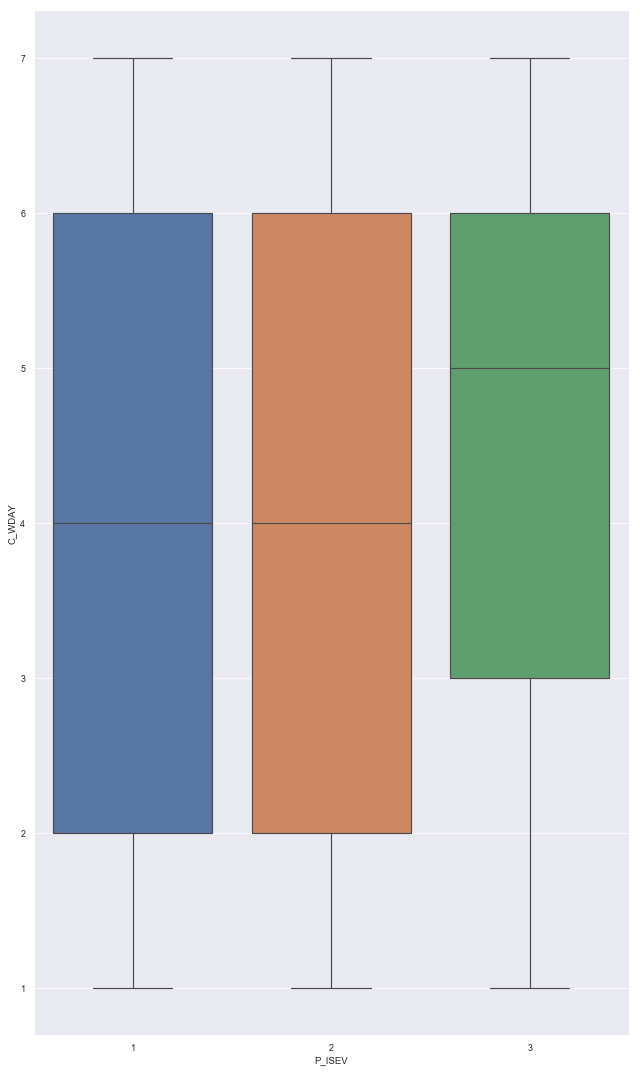

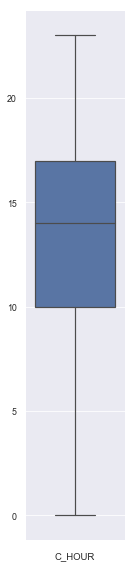

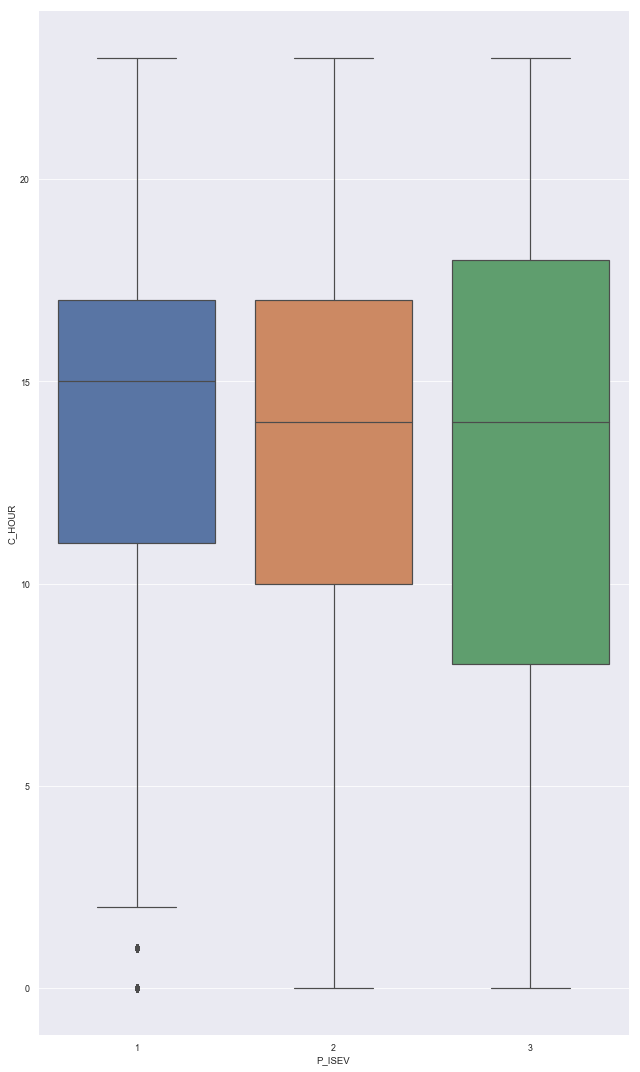

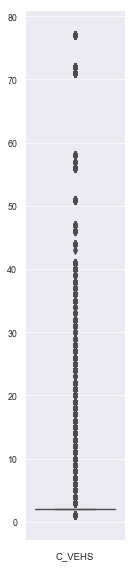

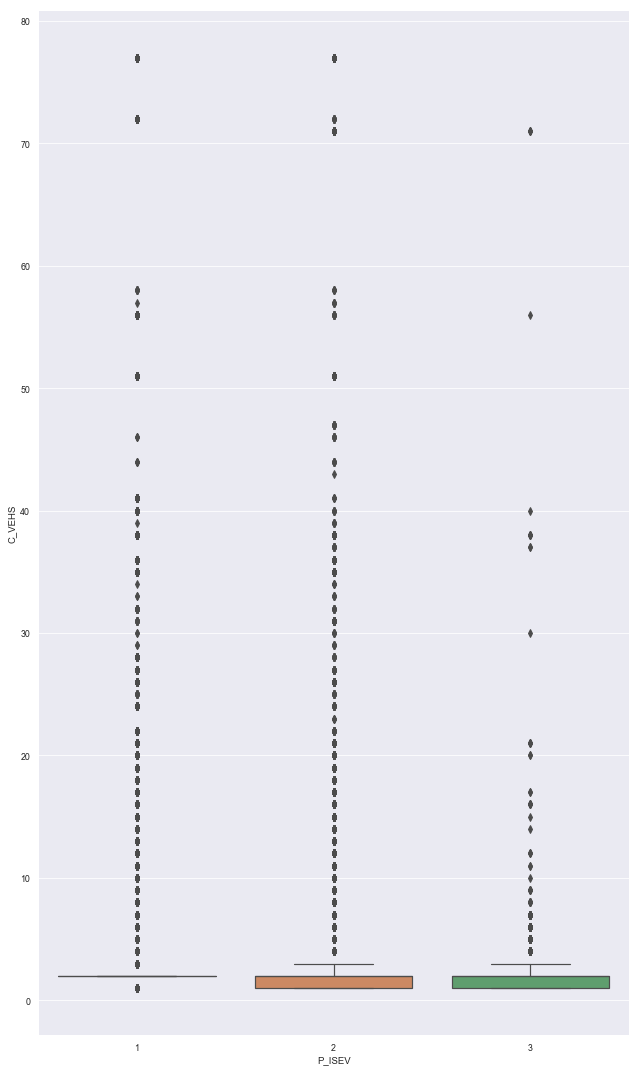

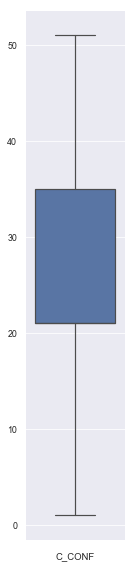

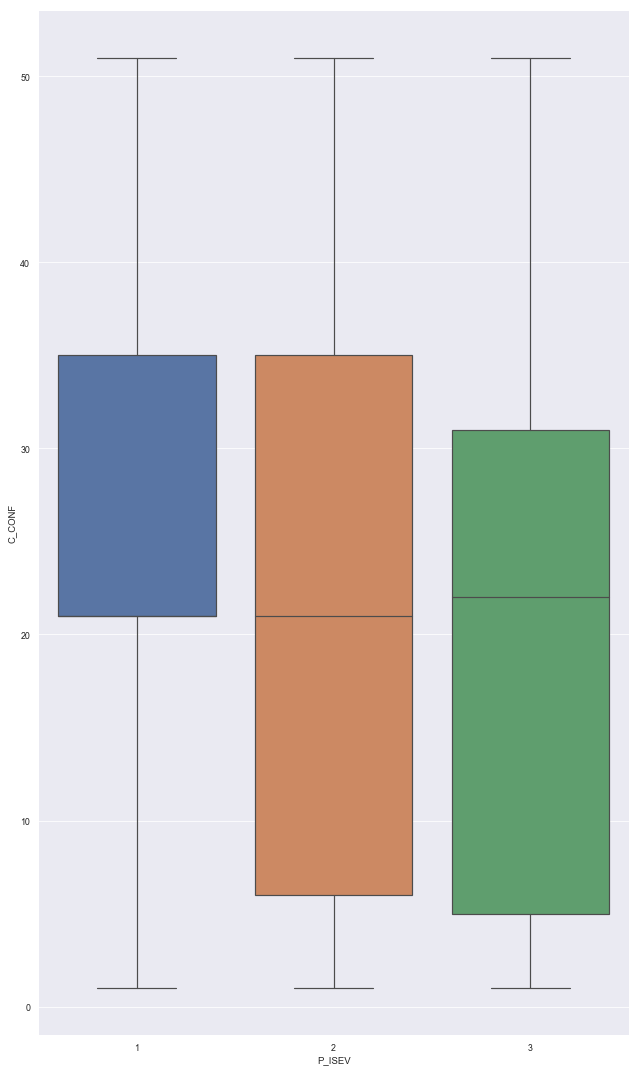

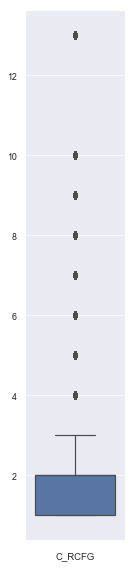

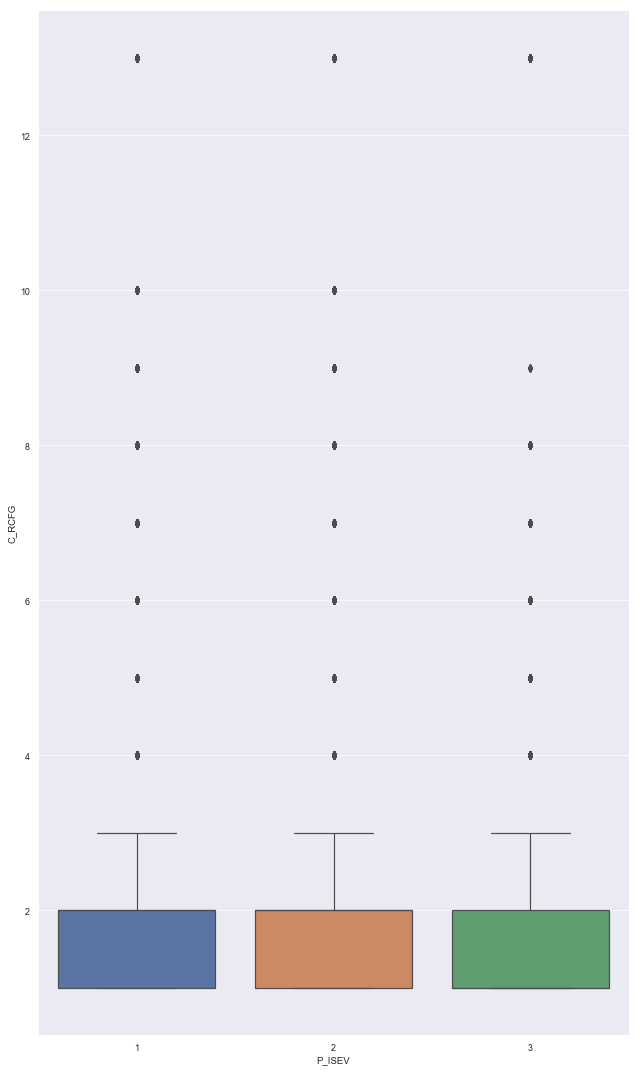

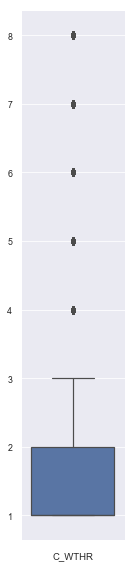

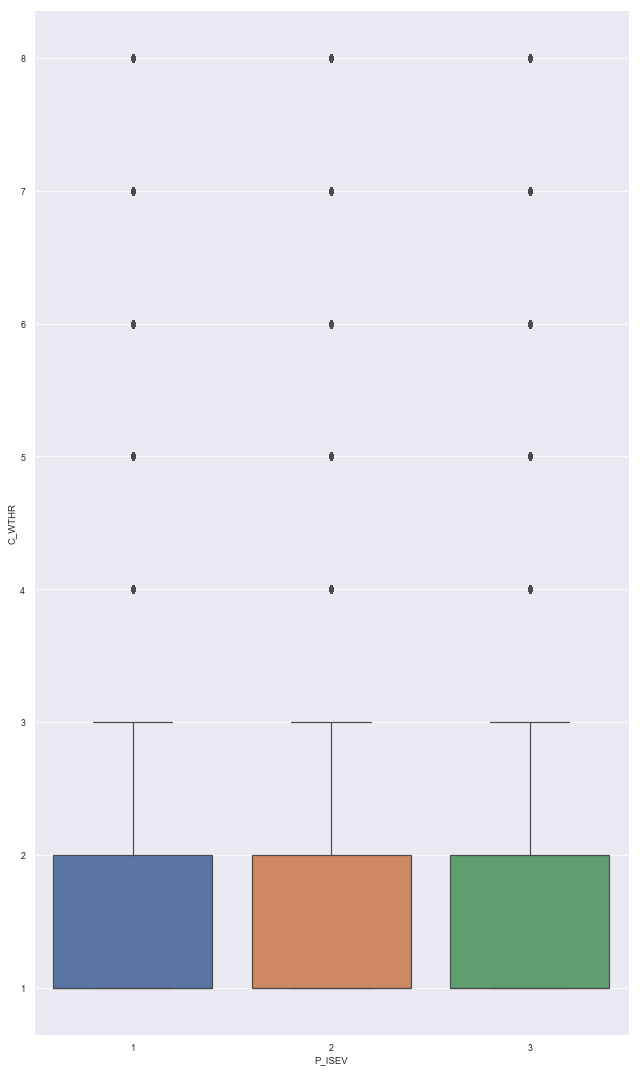

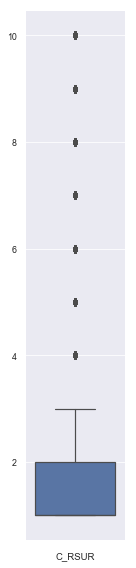

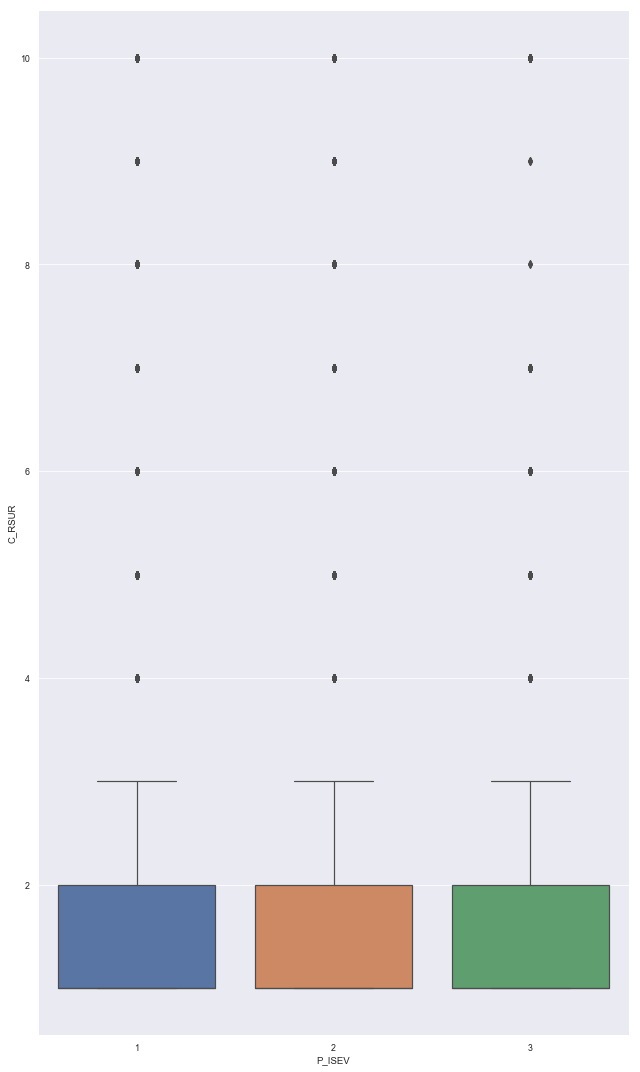

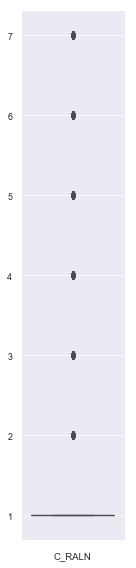

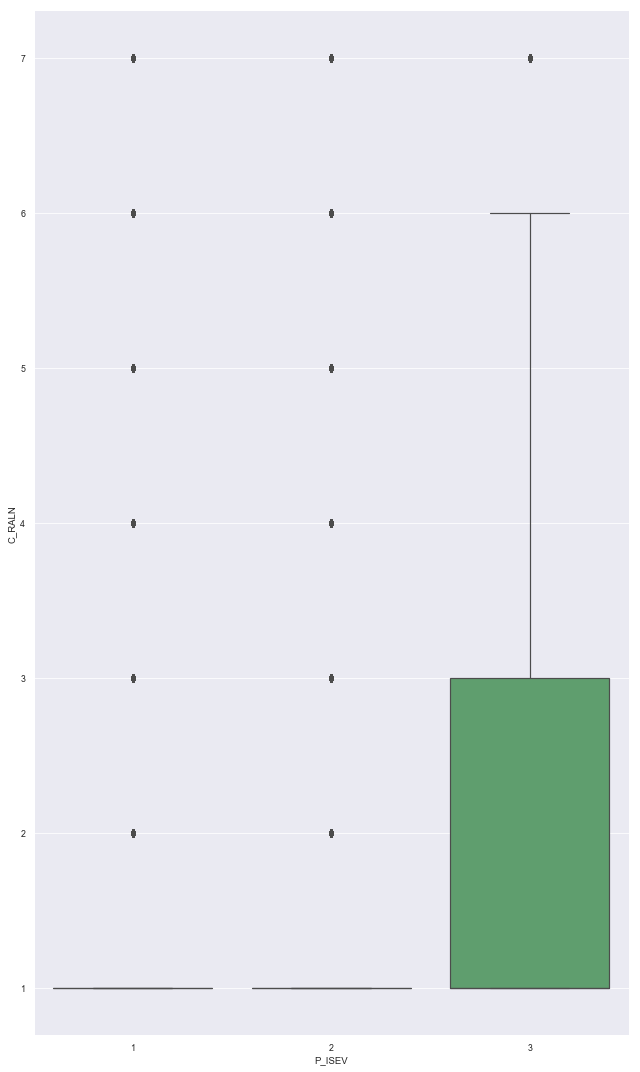

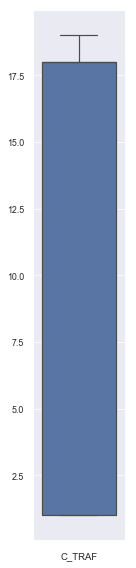

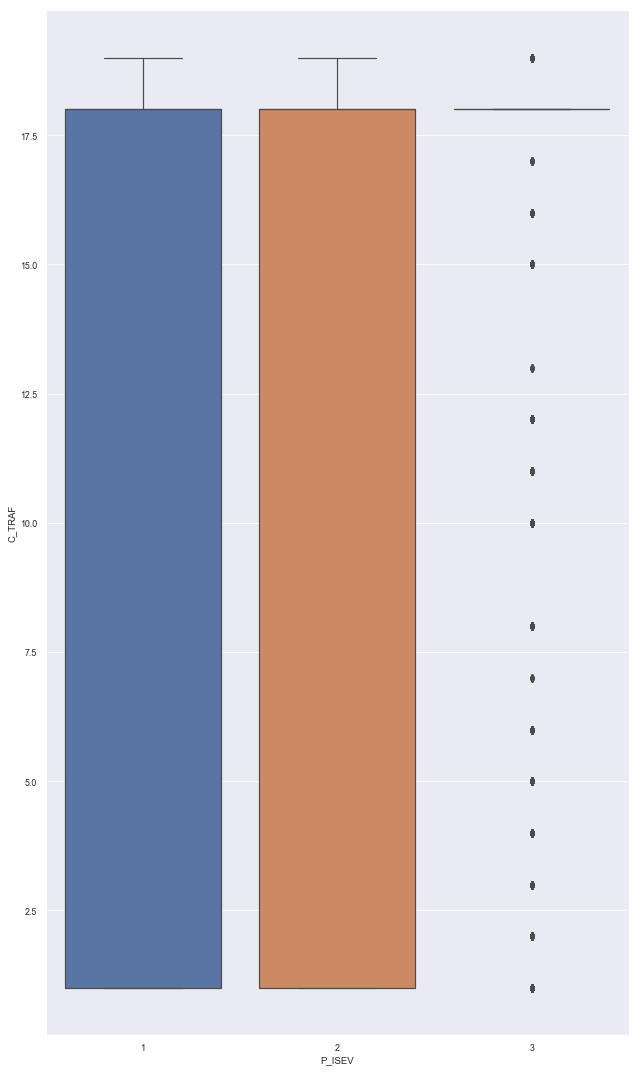

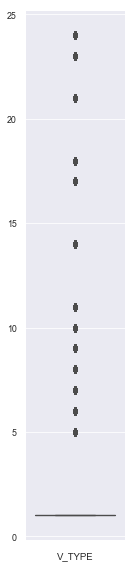

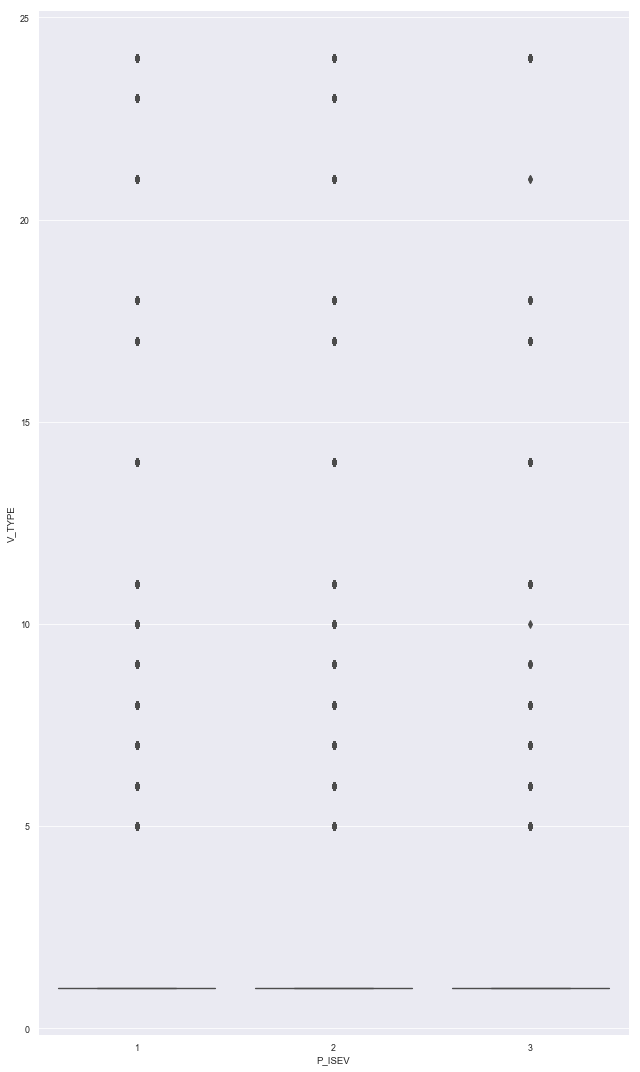

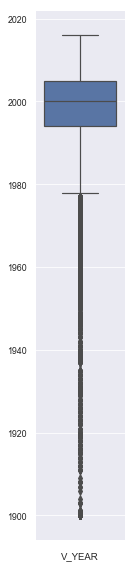

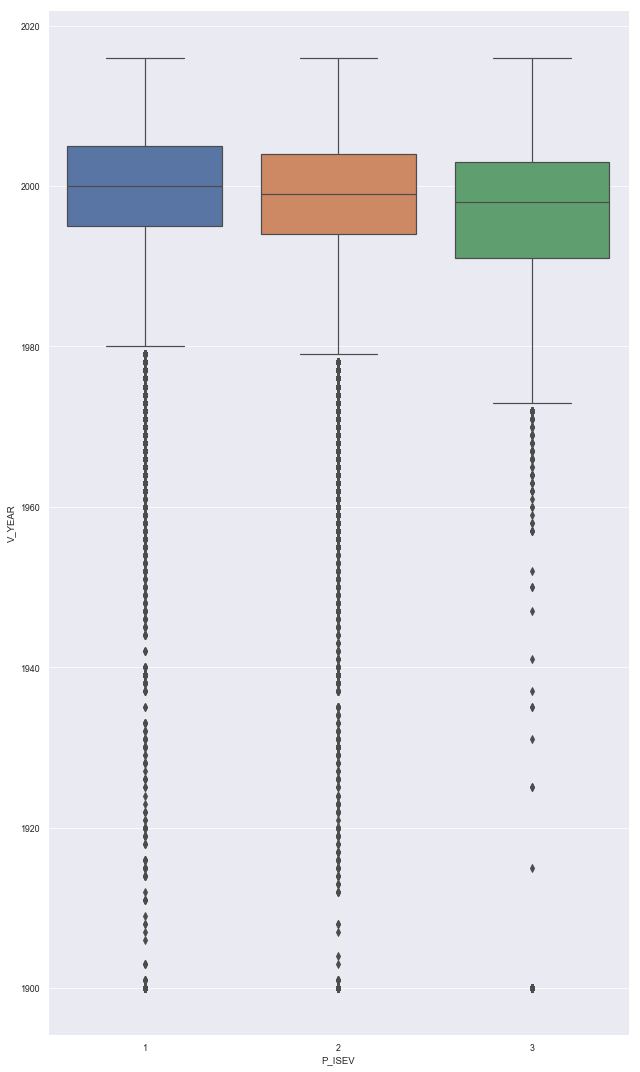

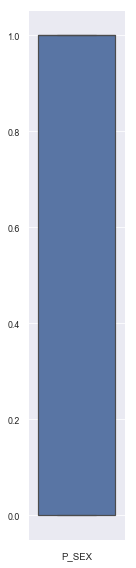

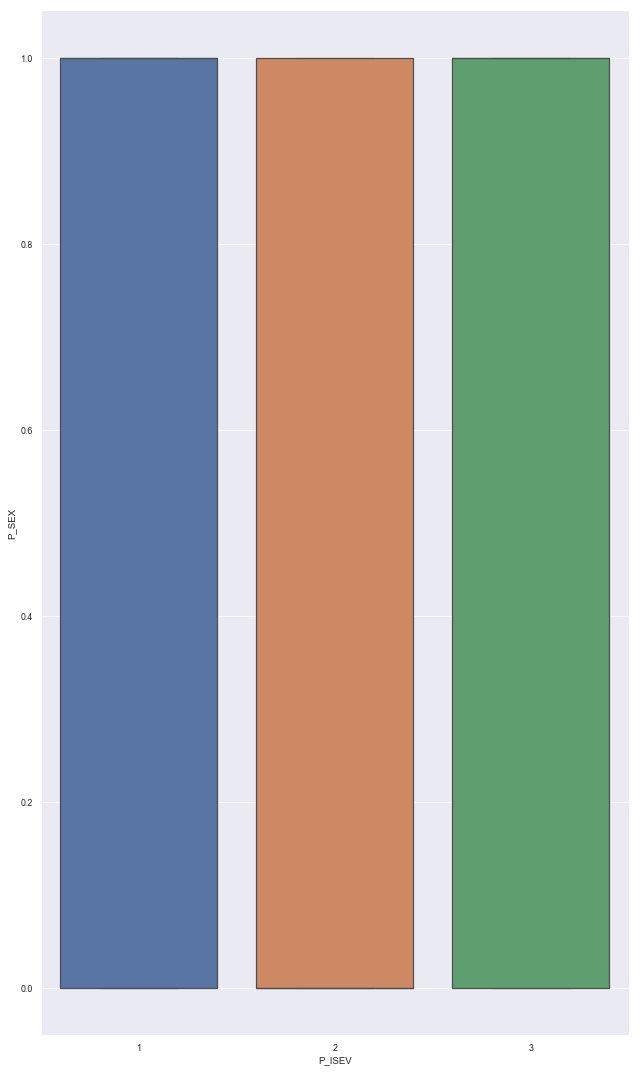

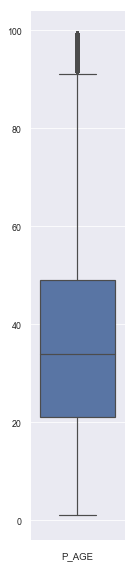

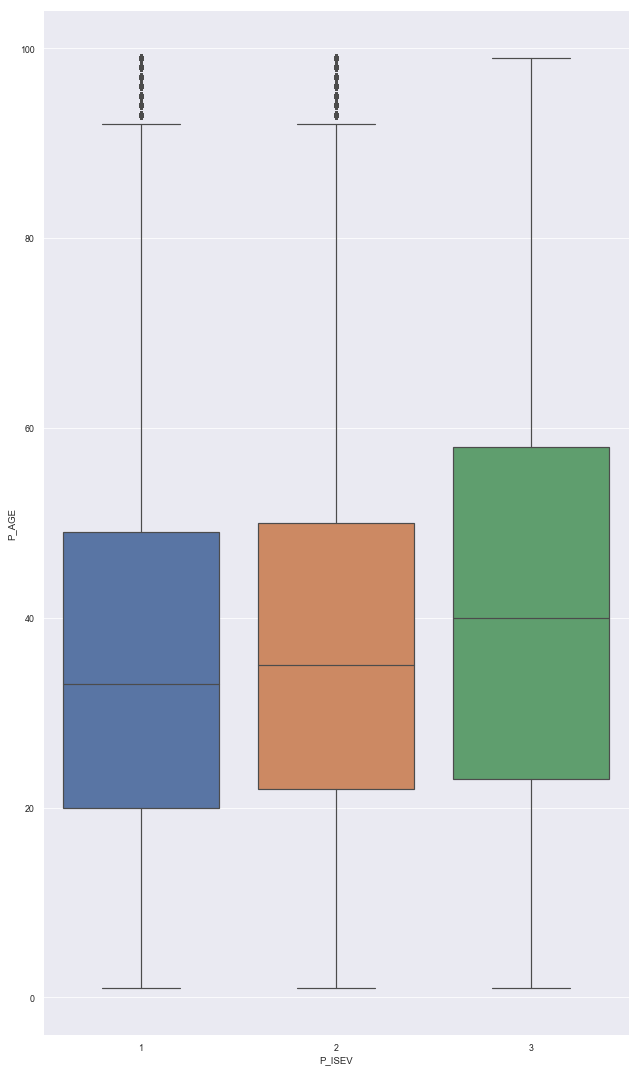

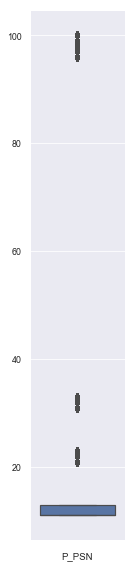

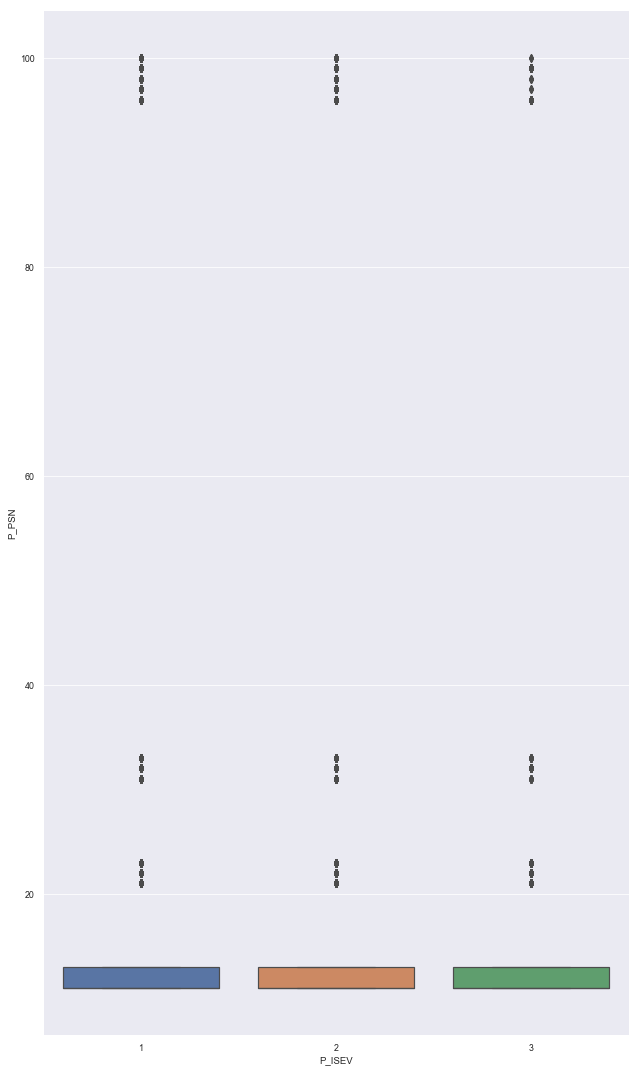

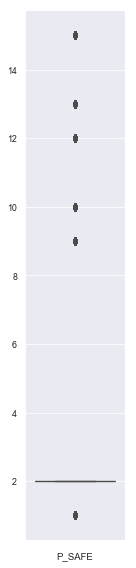

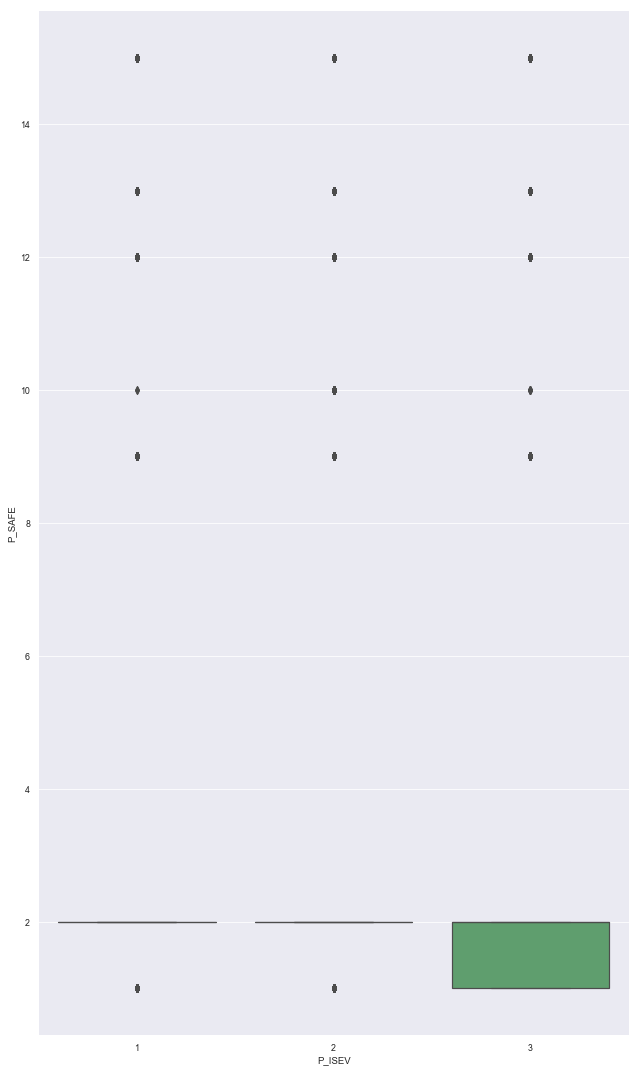

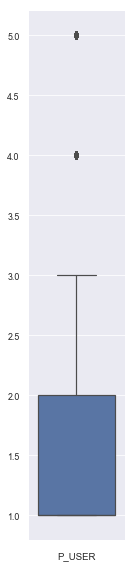

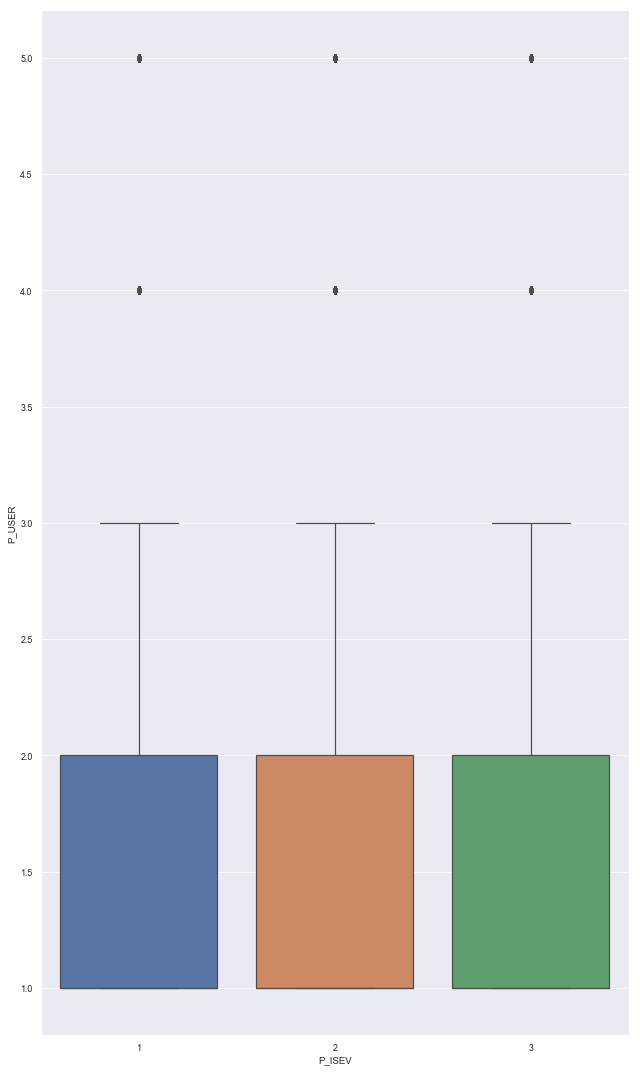

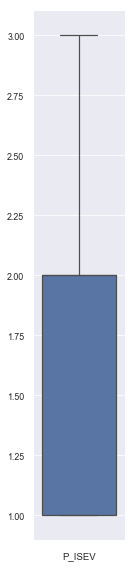

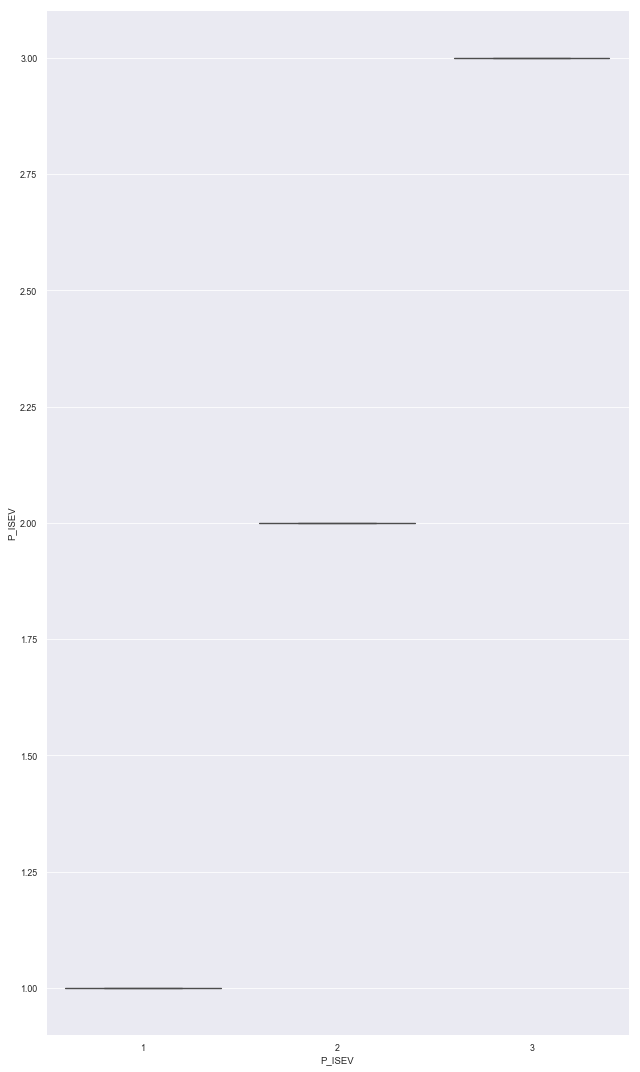

In [28]:
g = sns.catplot(data=df_multi, kind="box", orient="v", height = 10, aspect = 2)
g.set_xticklabels(step=1)

plt.figure(figsize=(5,10))
for col in df_multi.columns:
    g = sns.catplot(col, data=df_multi, kind="box", orient="v", height = 8, aspect = 0.25)
    g.set_xticklabels(step=1)
    
    h = sns.catplot(x = 'P_ISEV', y = col, data=df_multi, kind="box", orient="v", height = 15, aspect = 0.6, legend = True)
    h.set_xticklabels(step=1)

<Figure size 864x864 with 0 Axes>

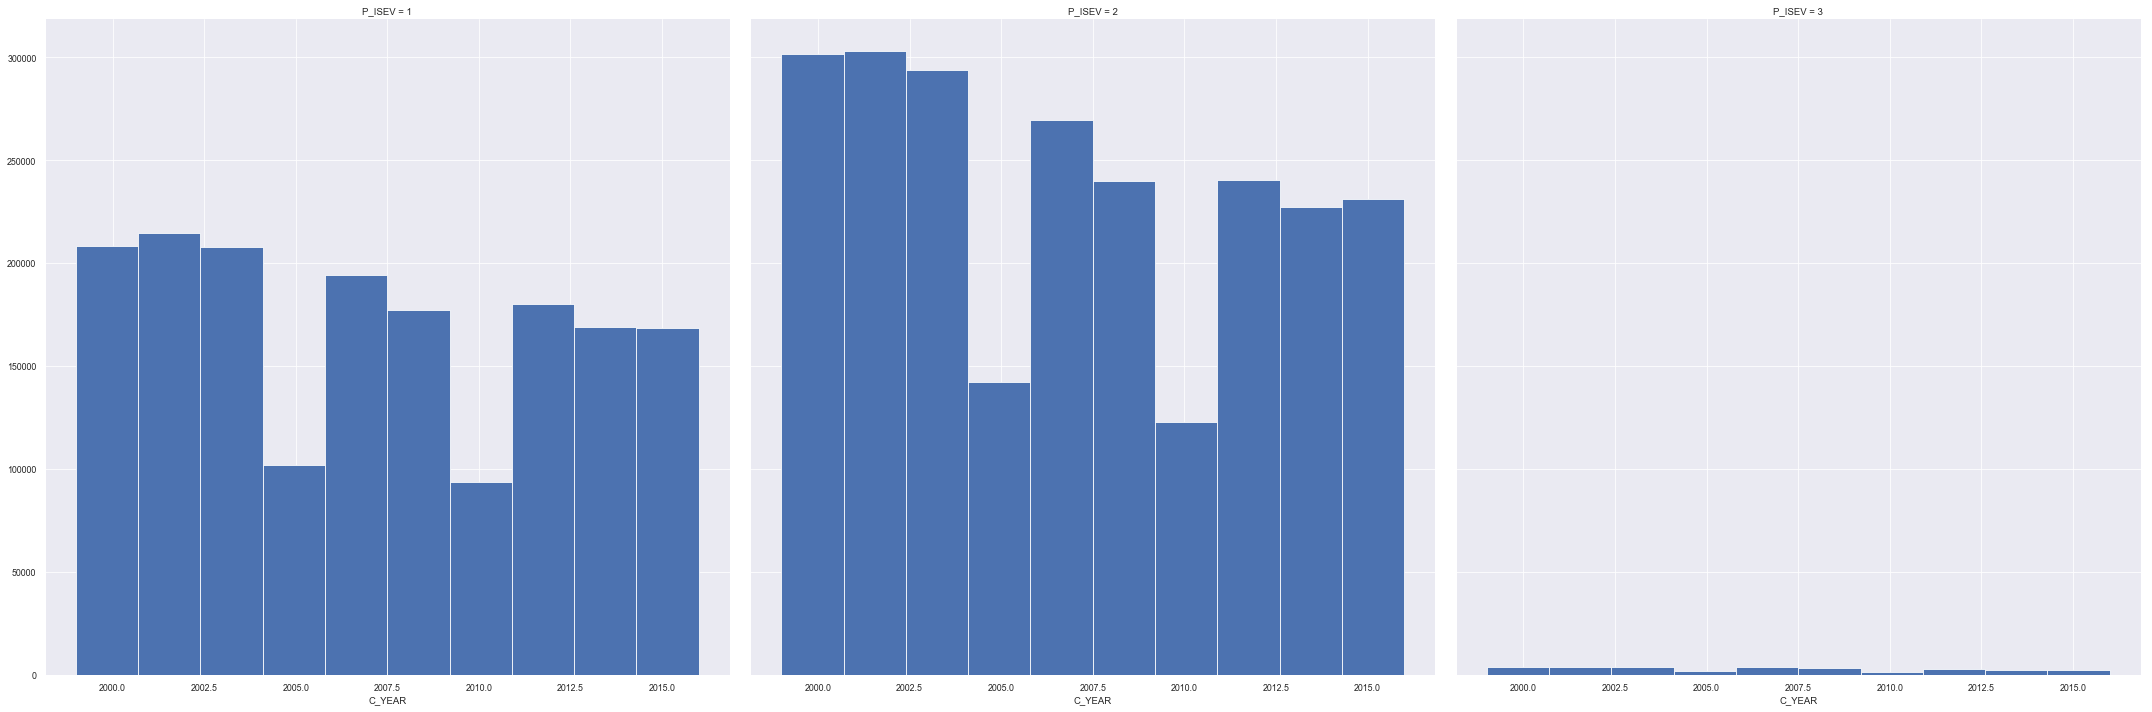

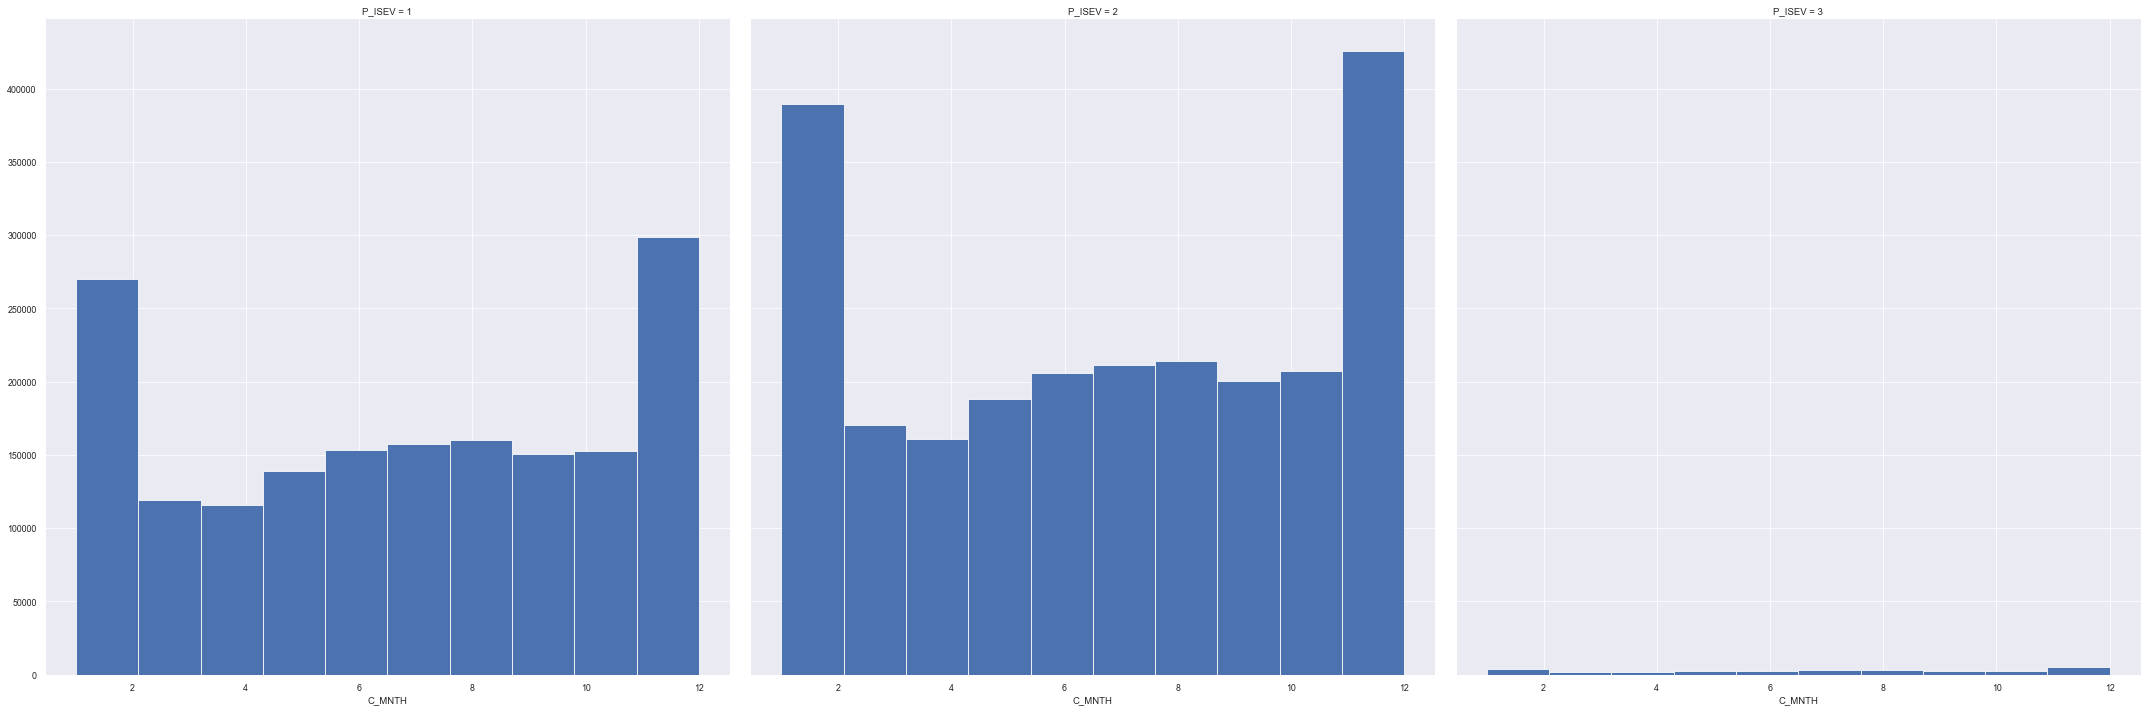

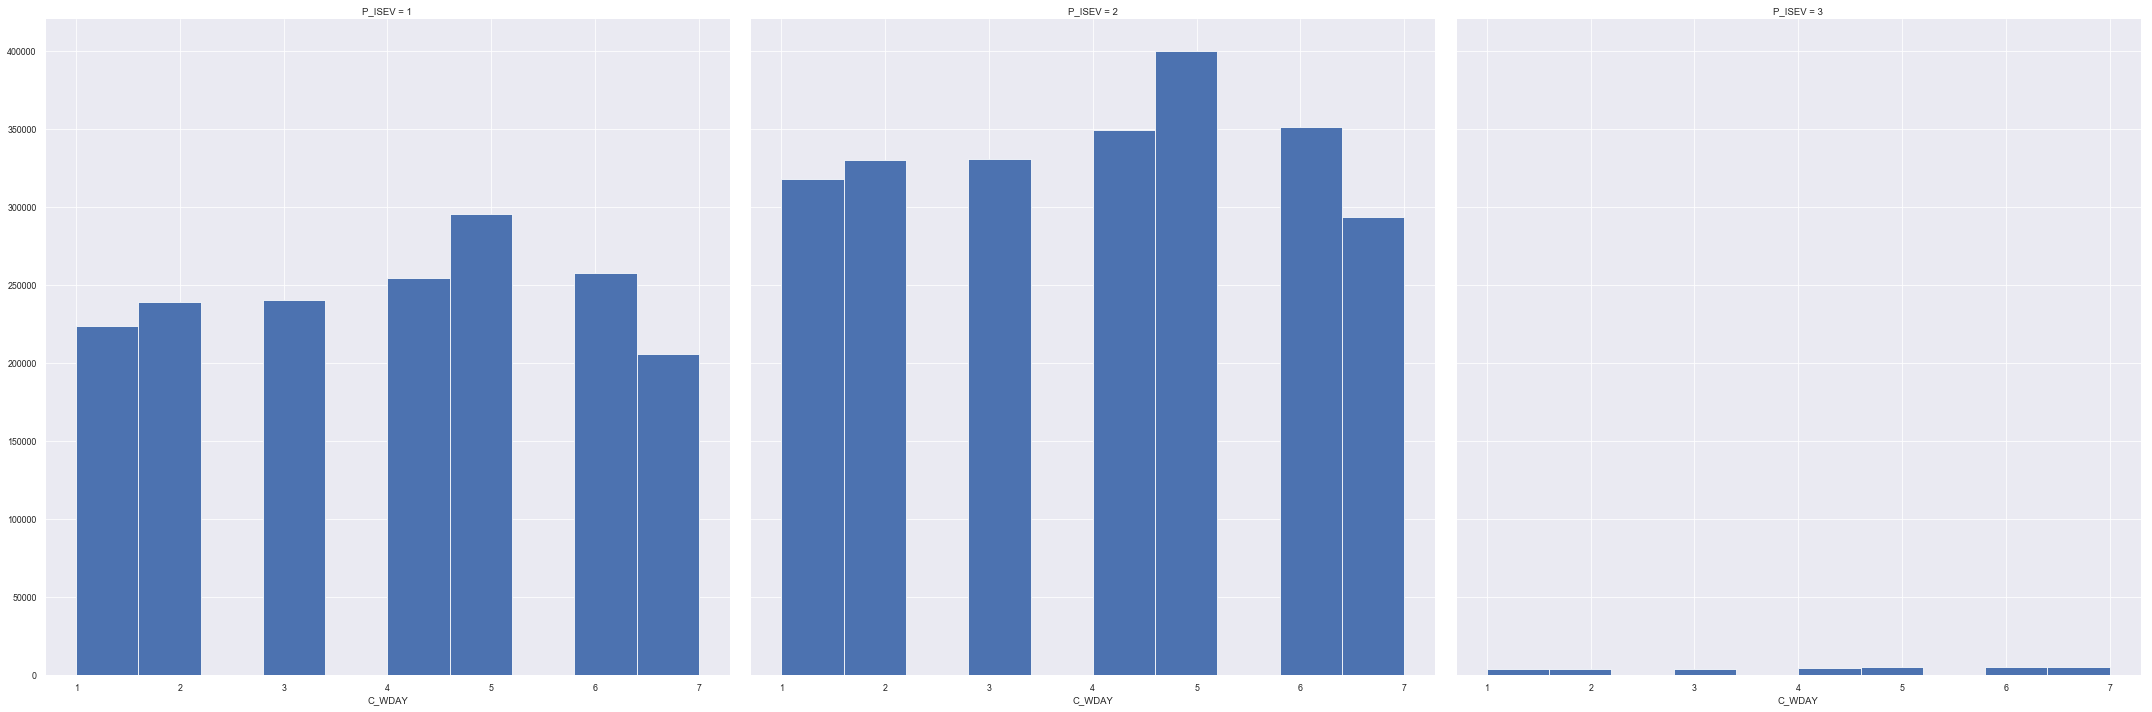

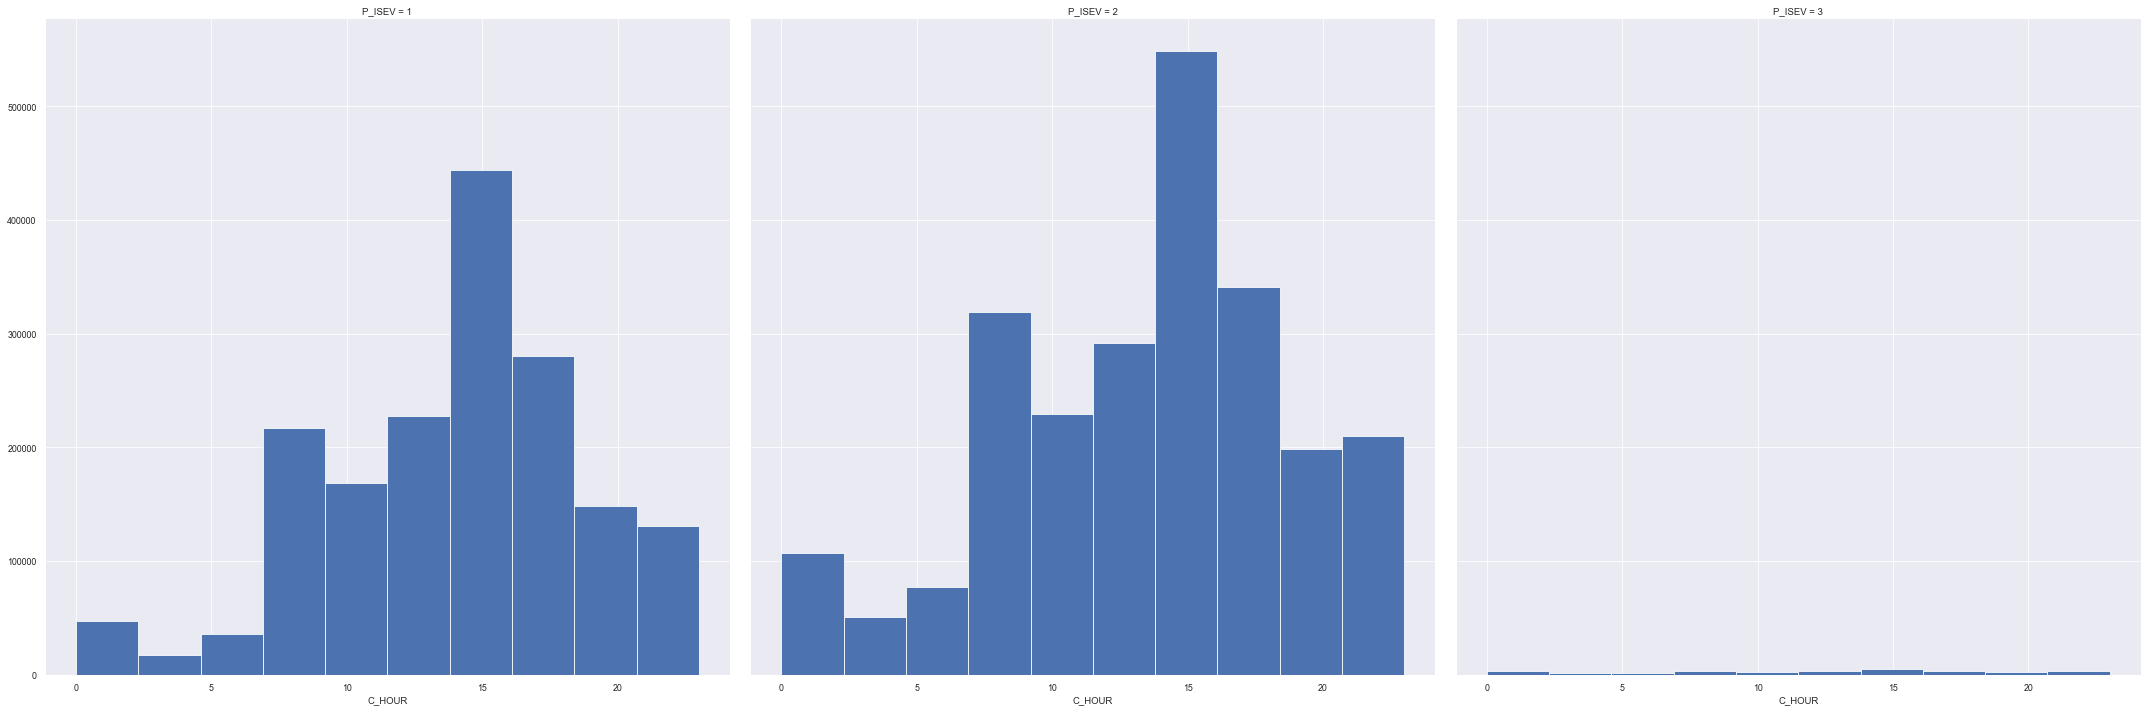

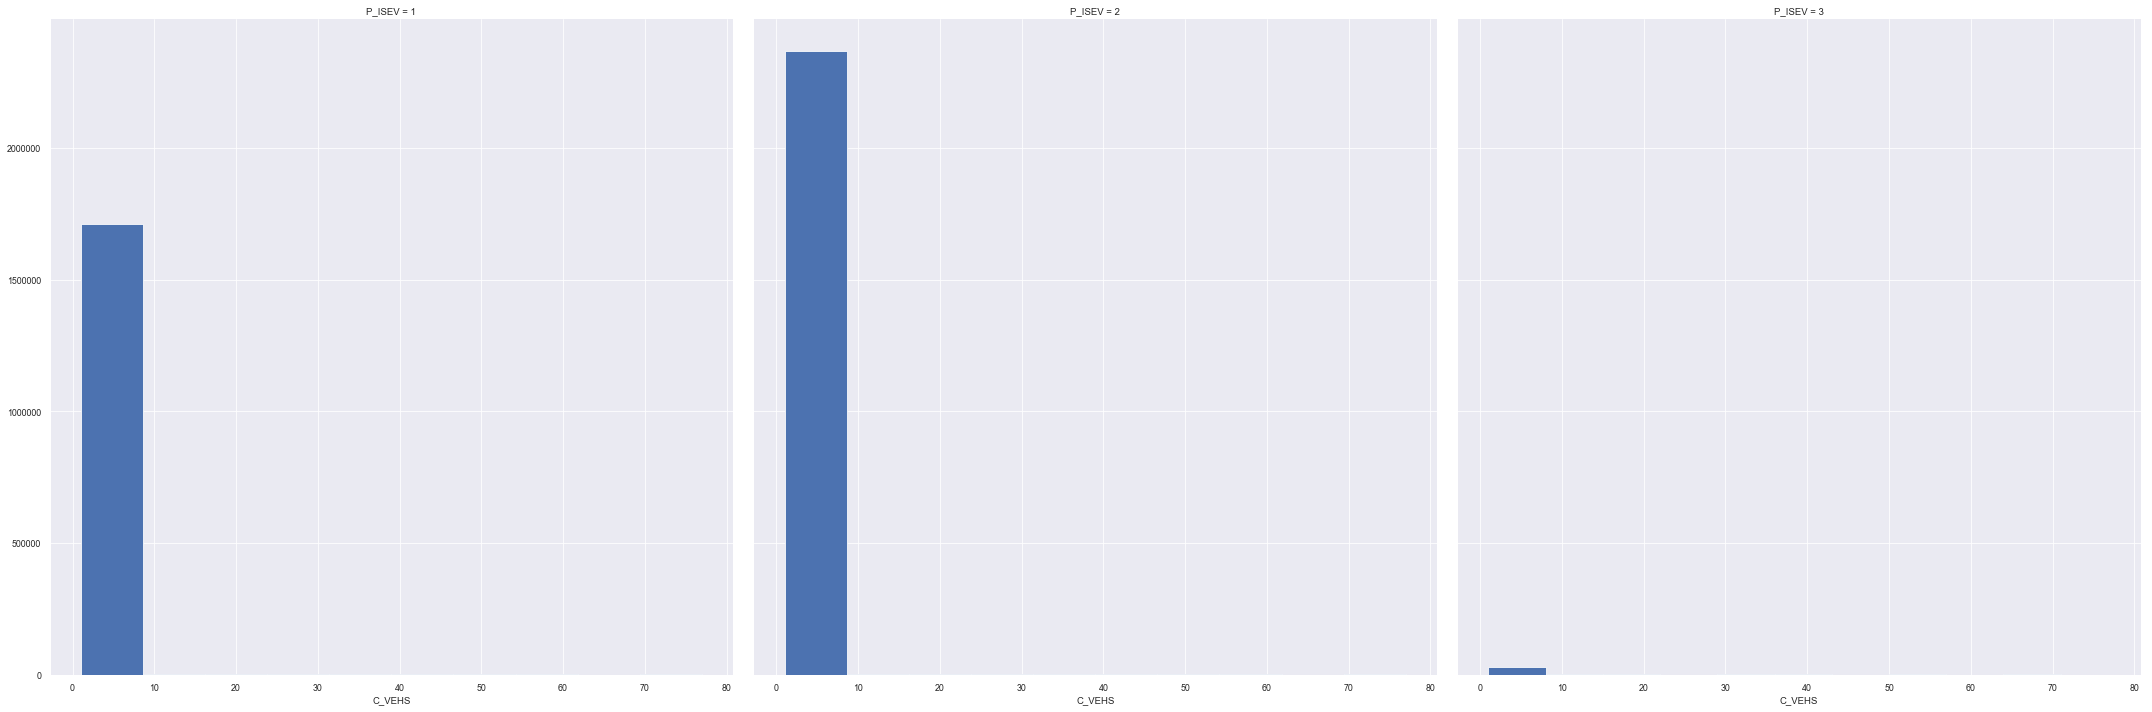

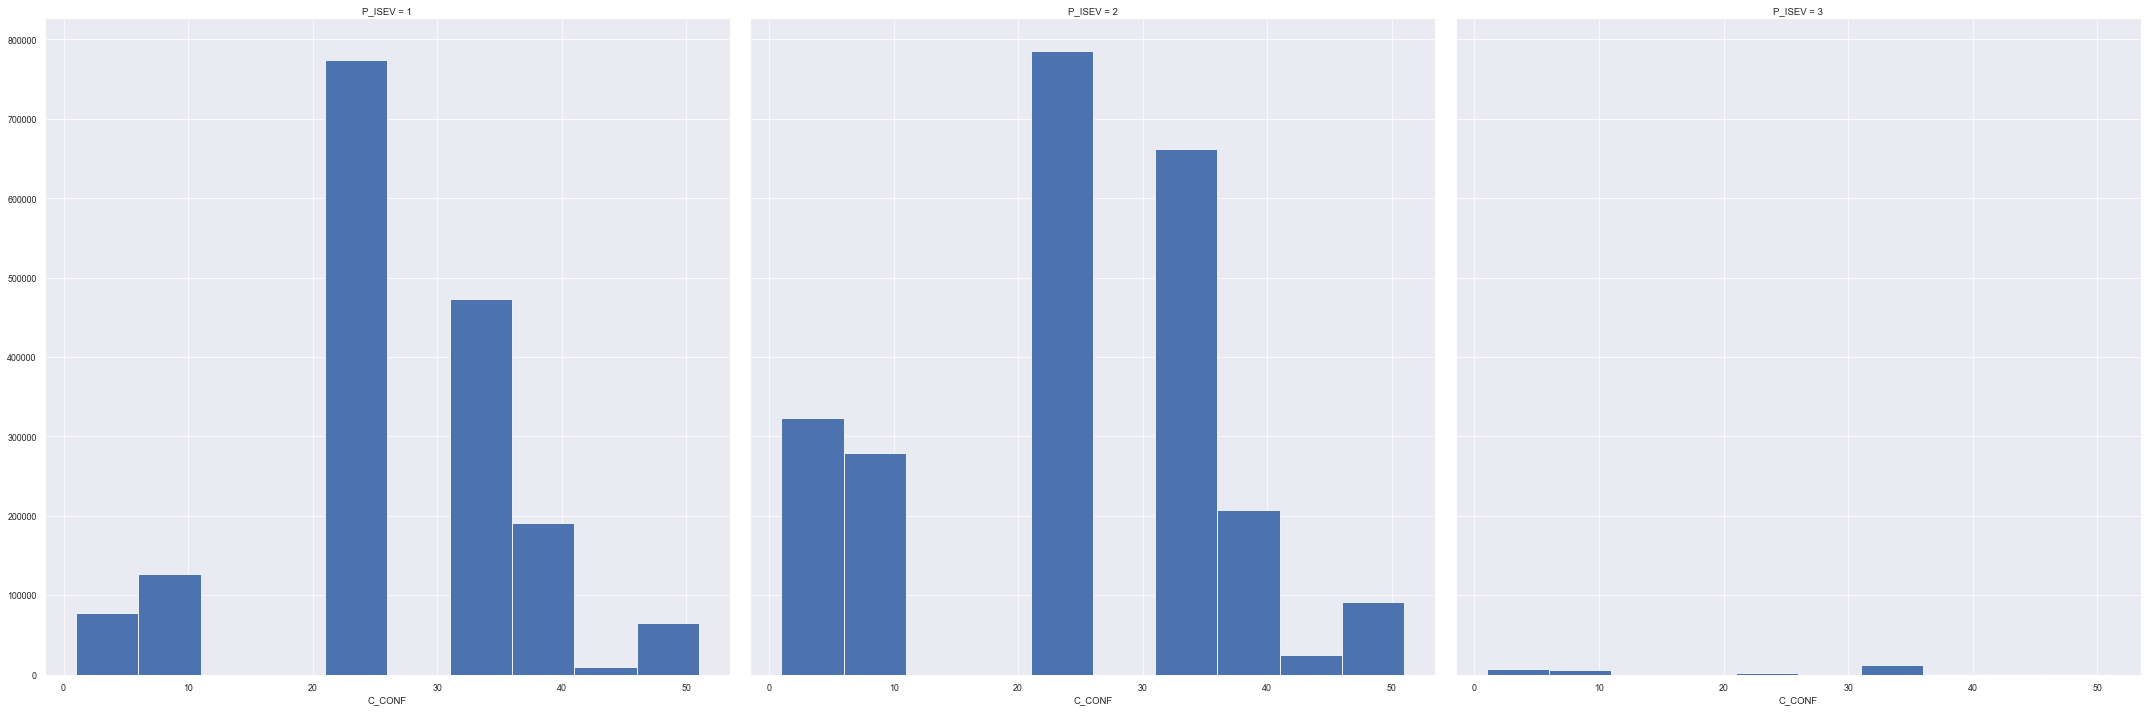

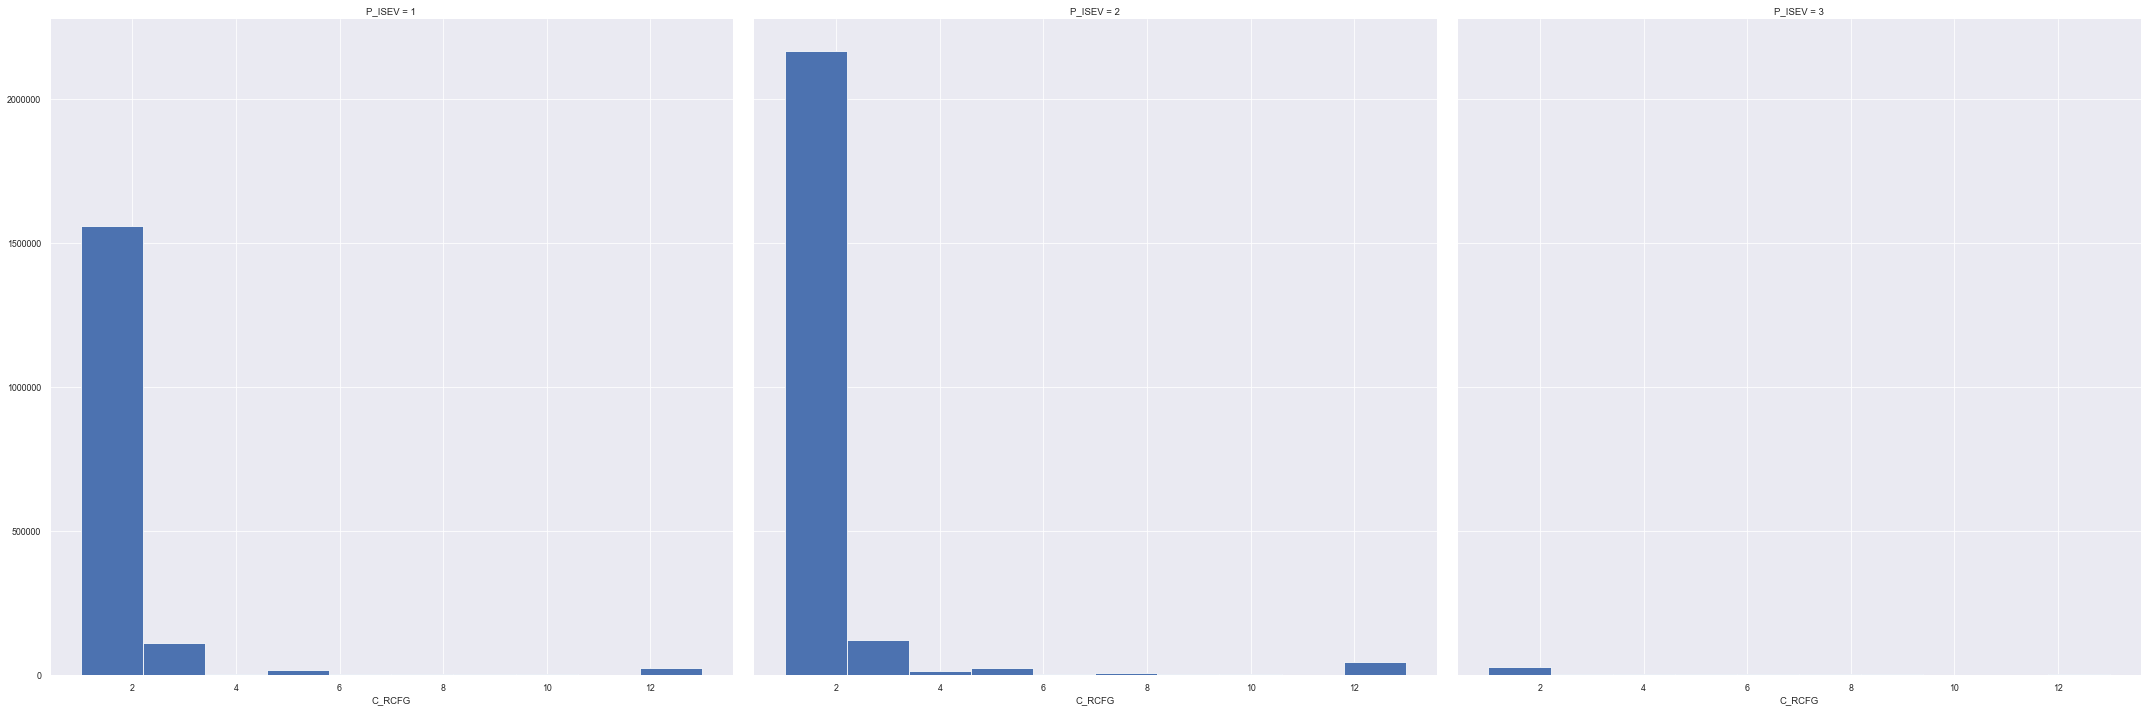

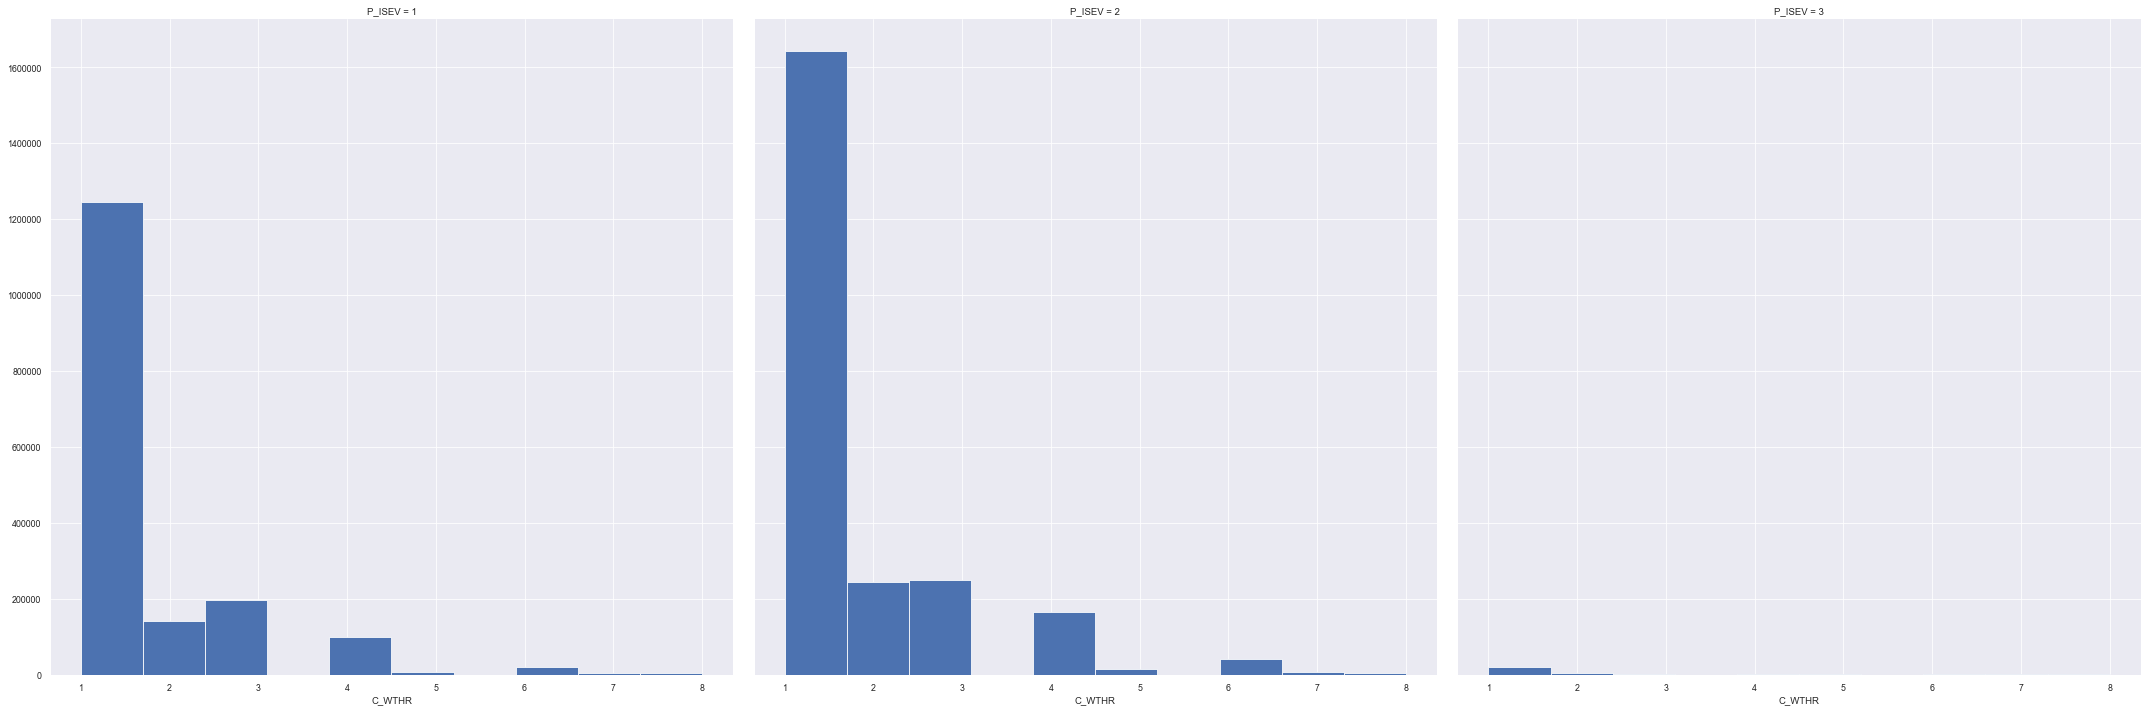

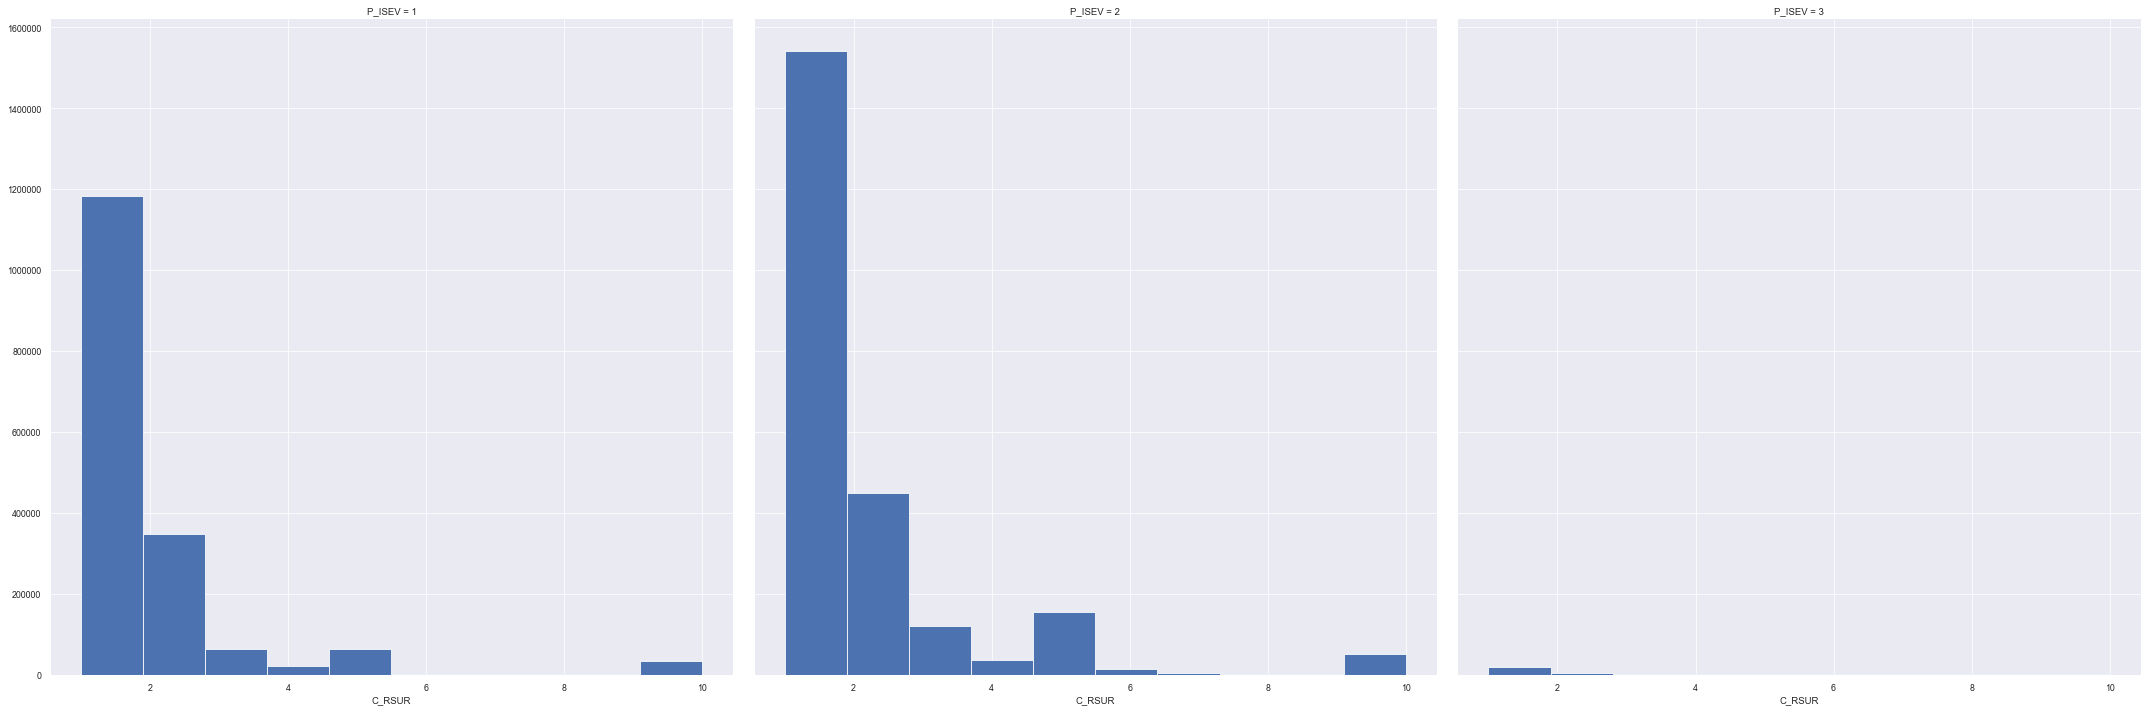

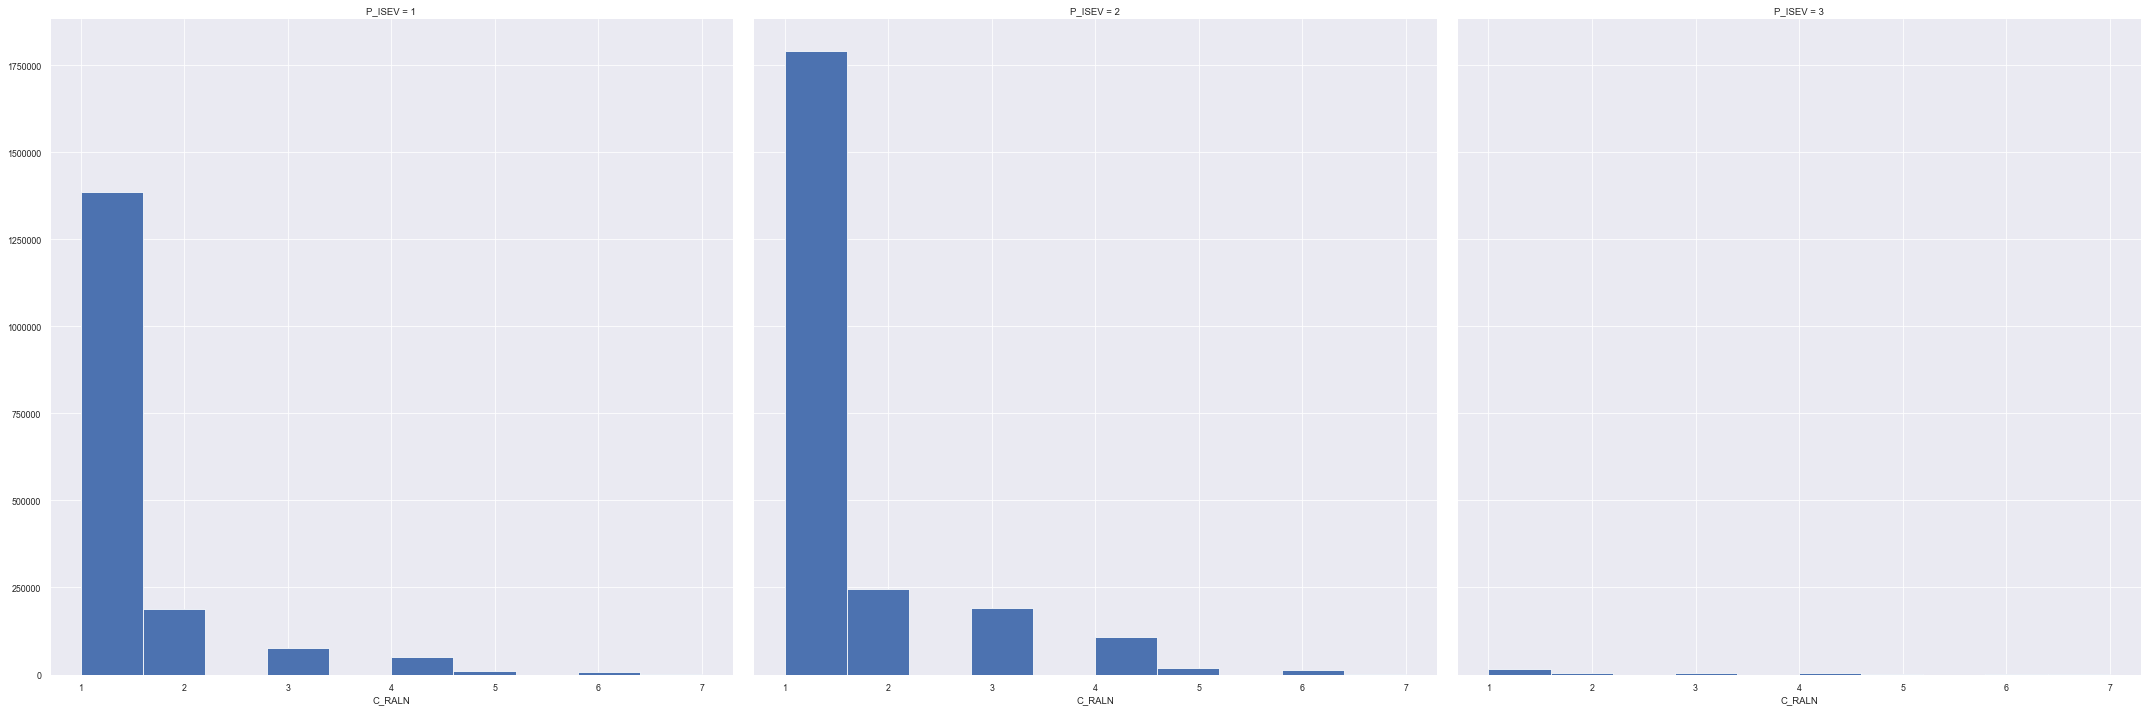

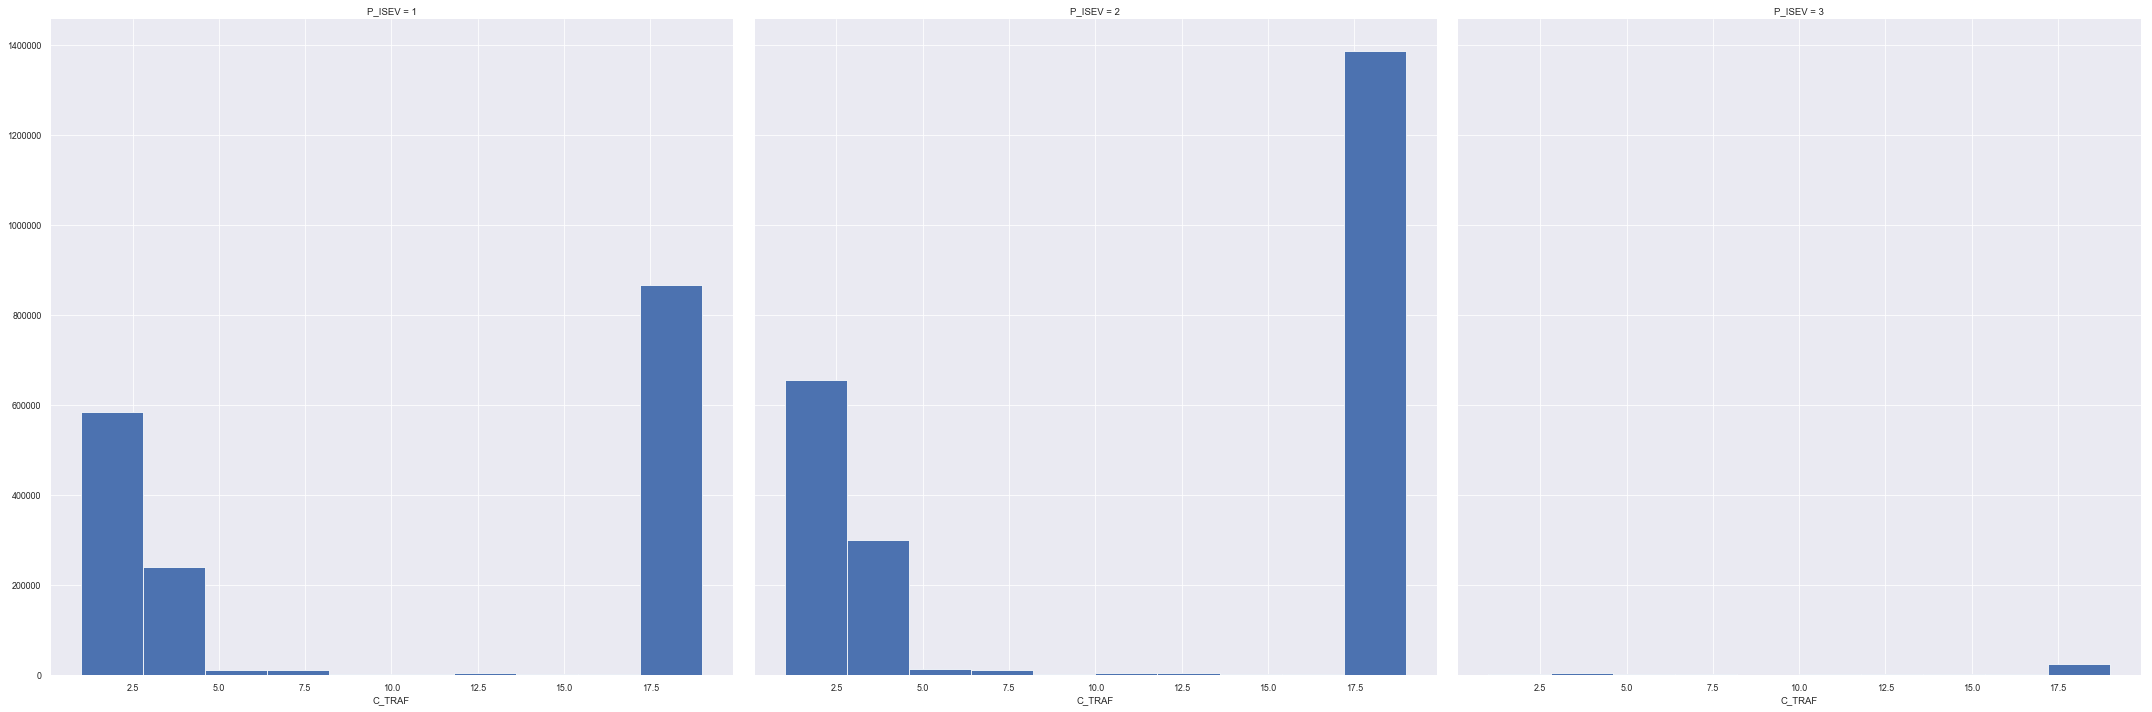

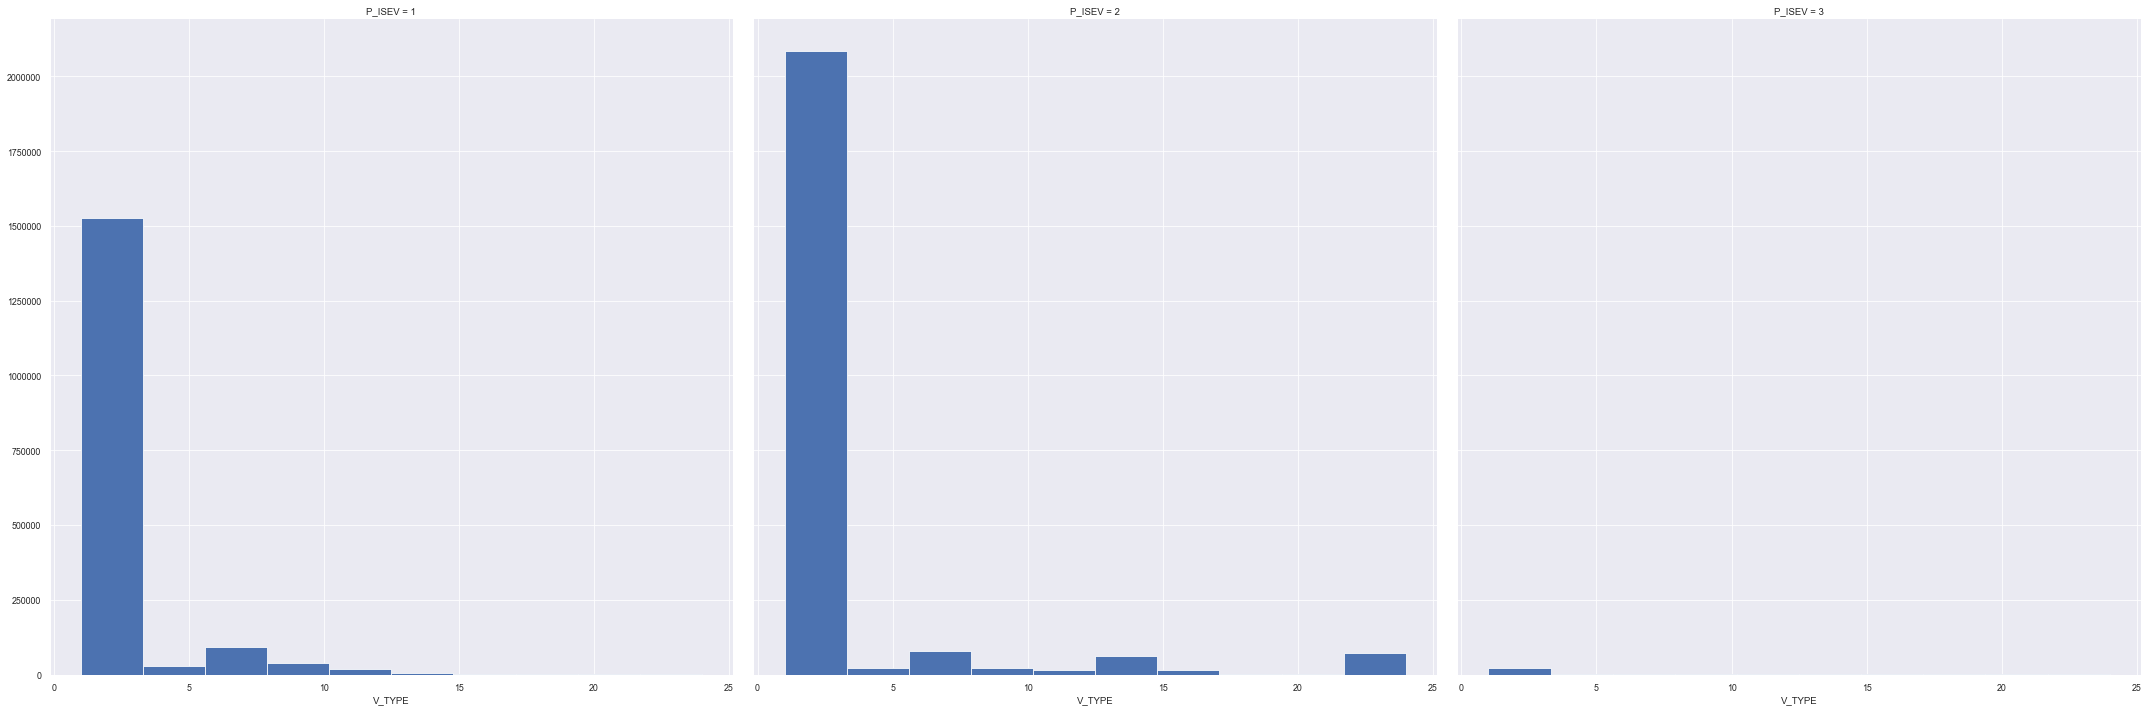

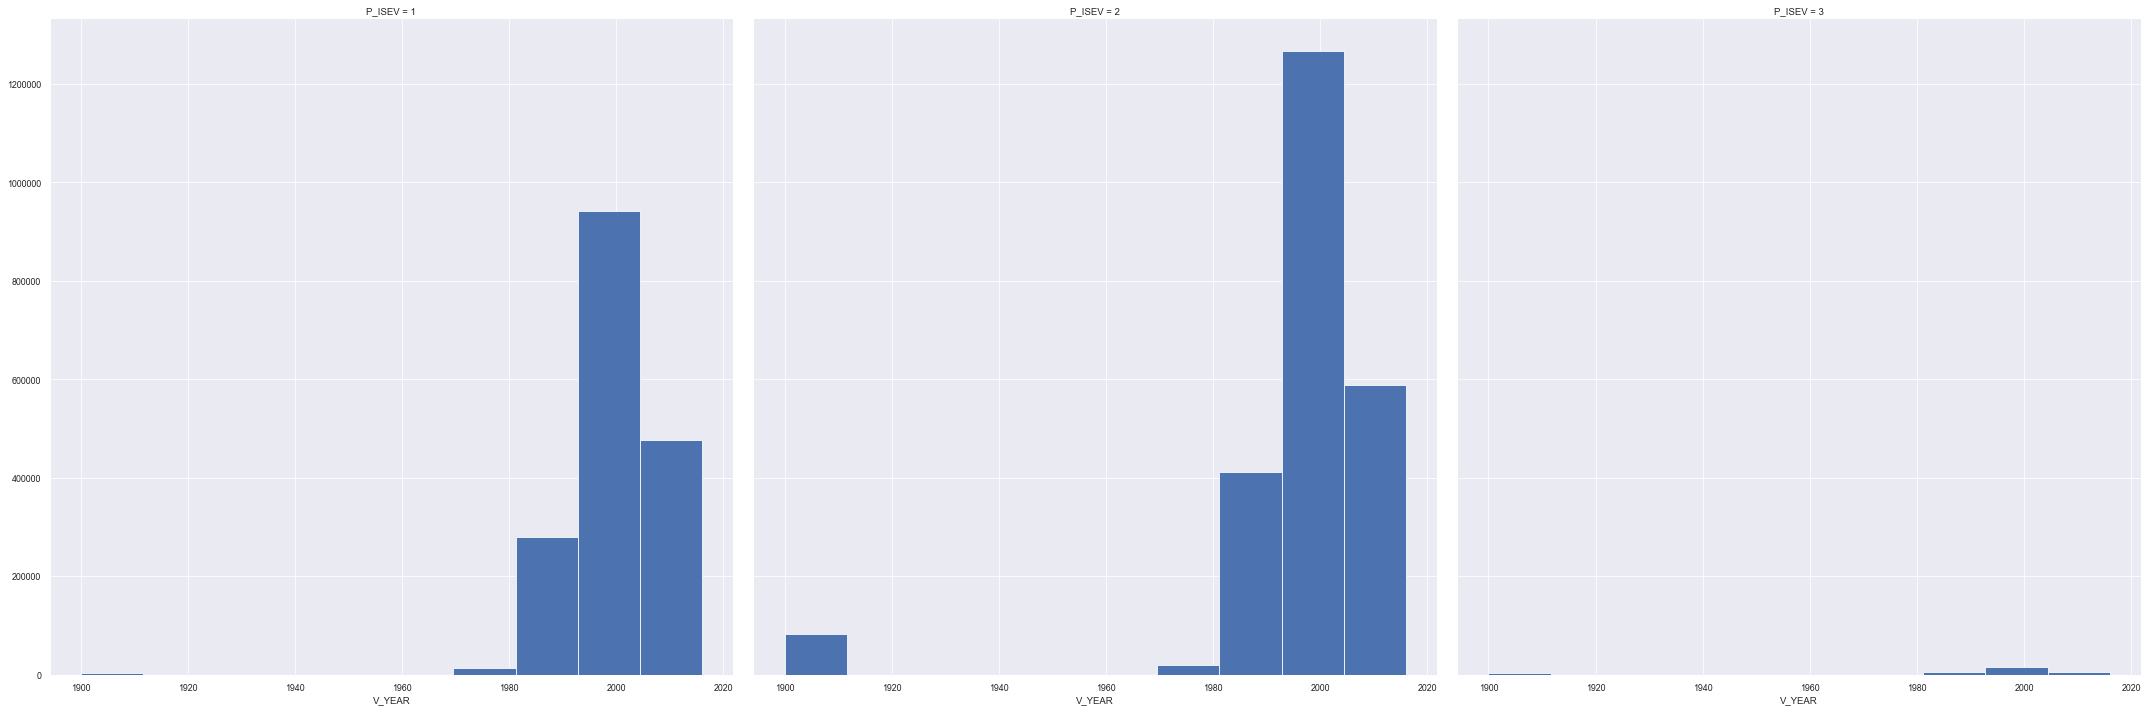

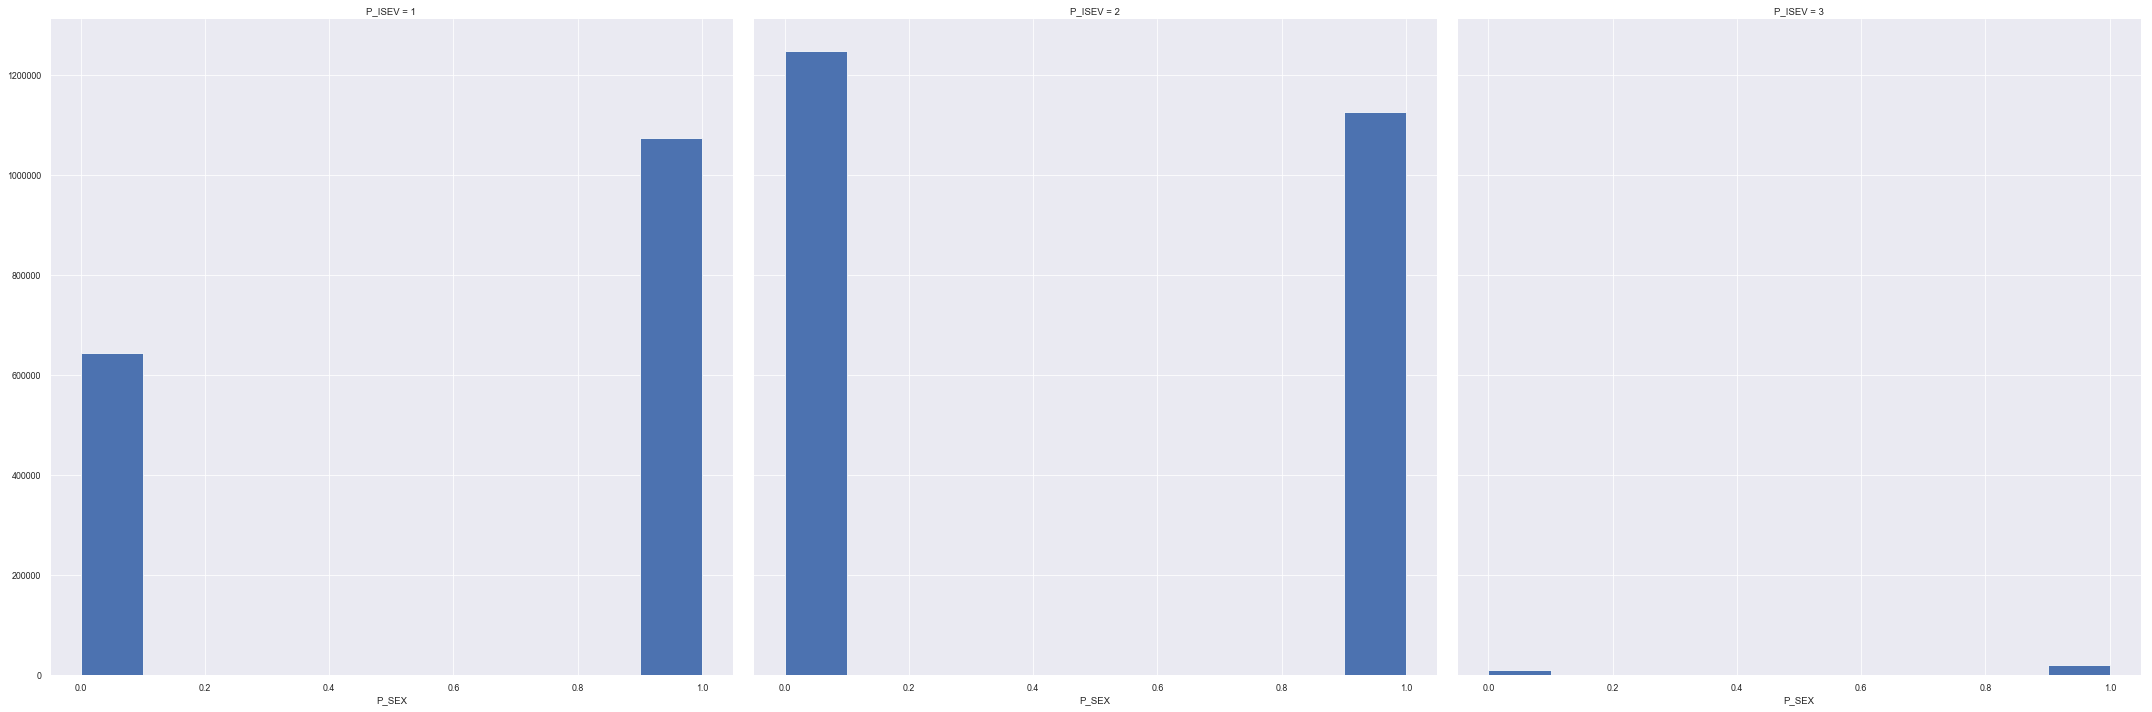

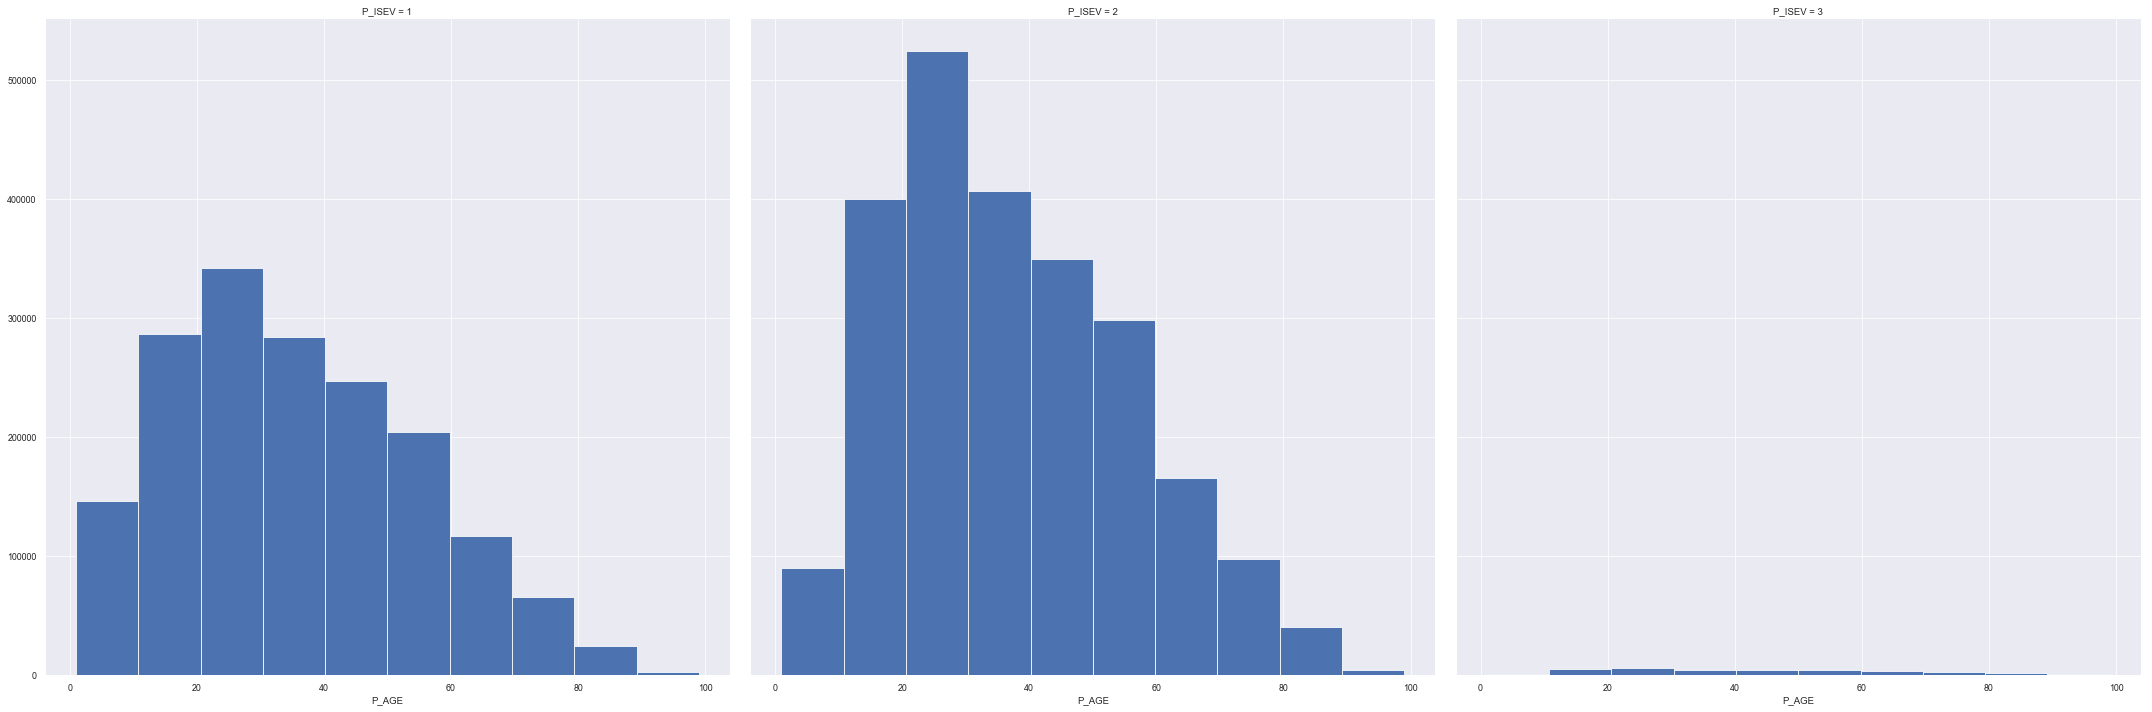

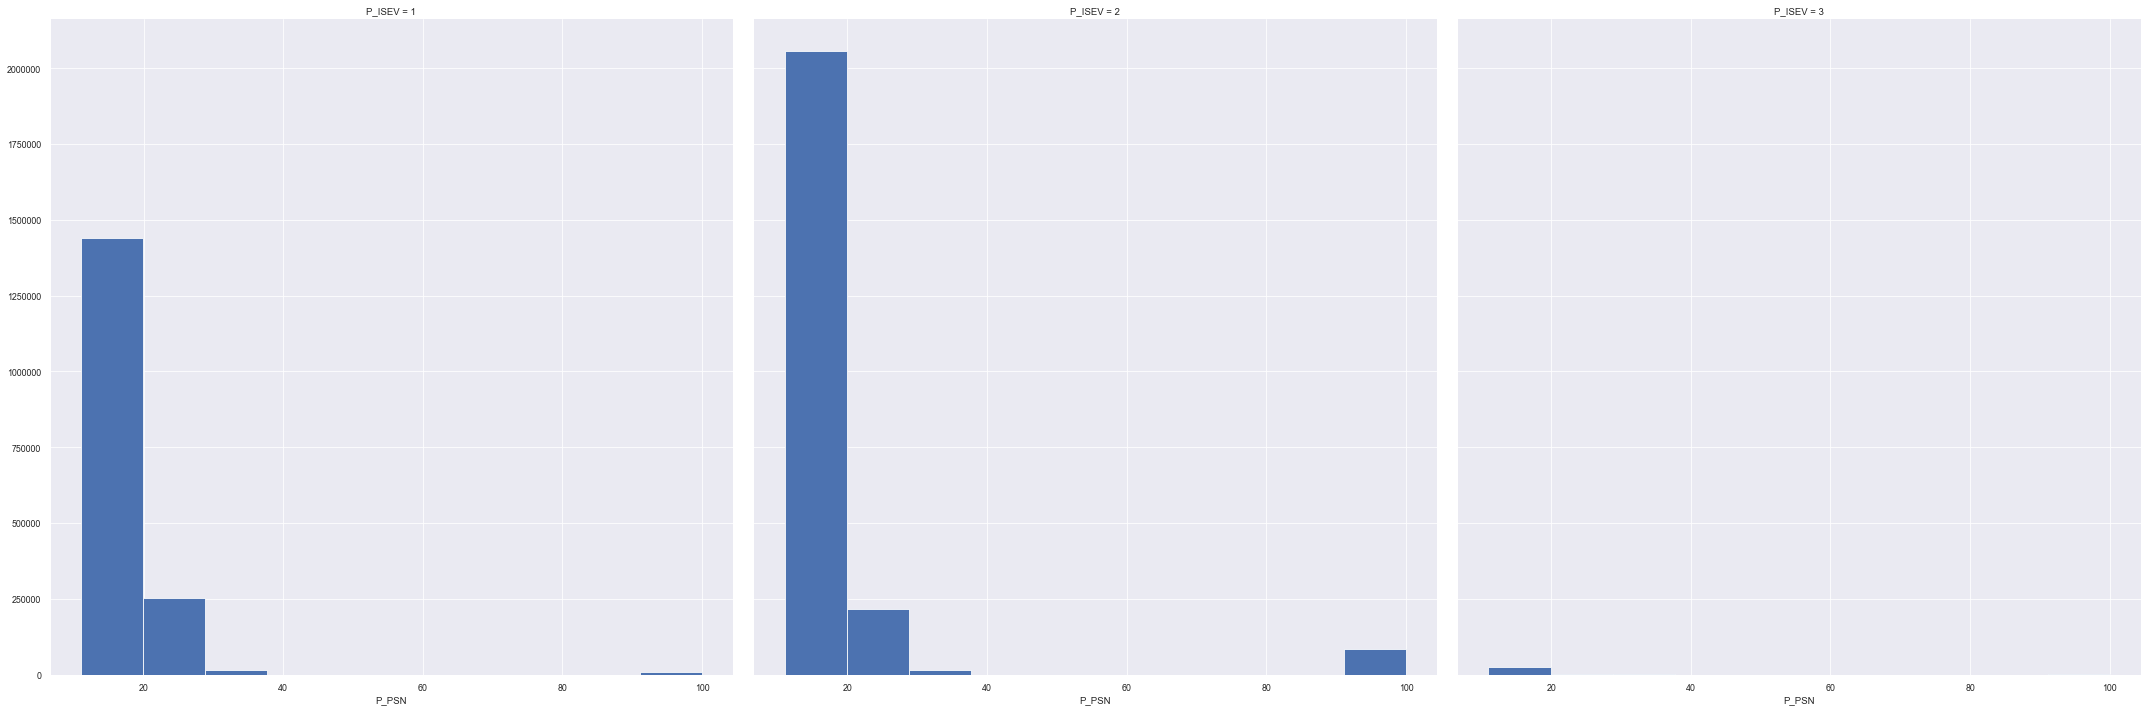

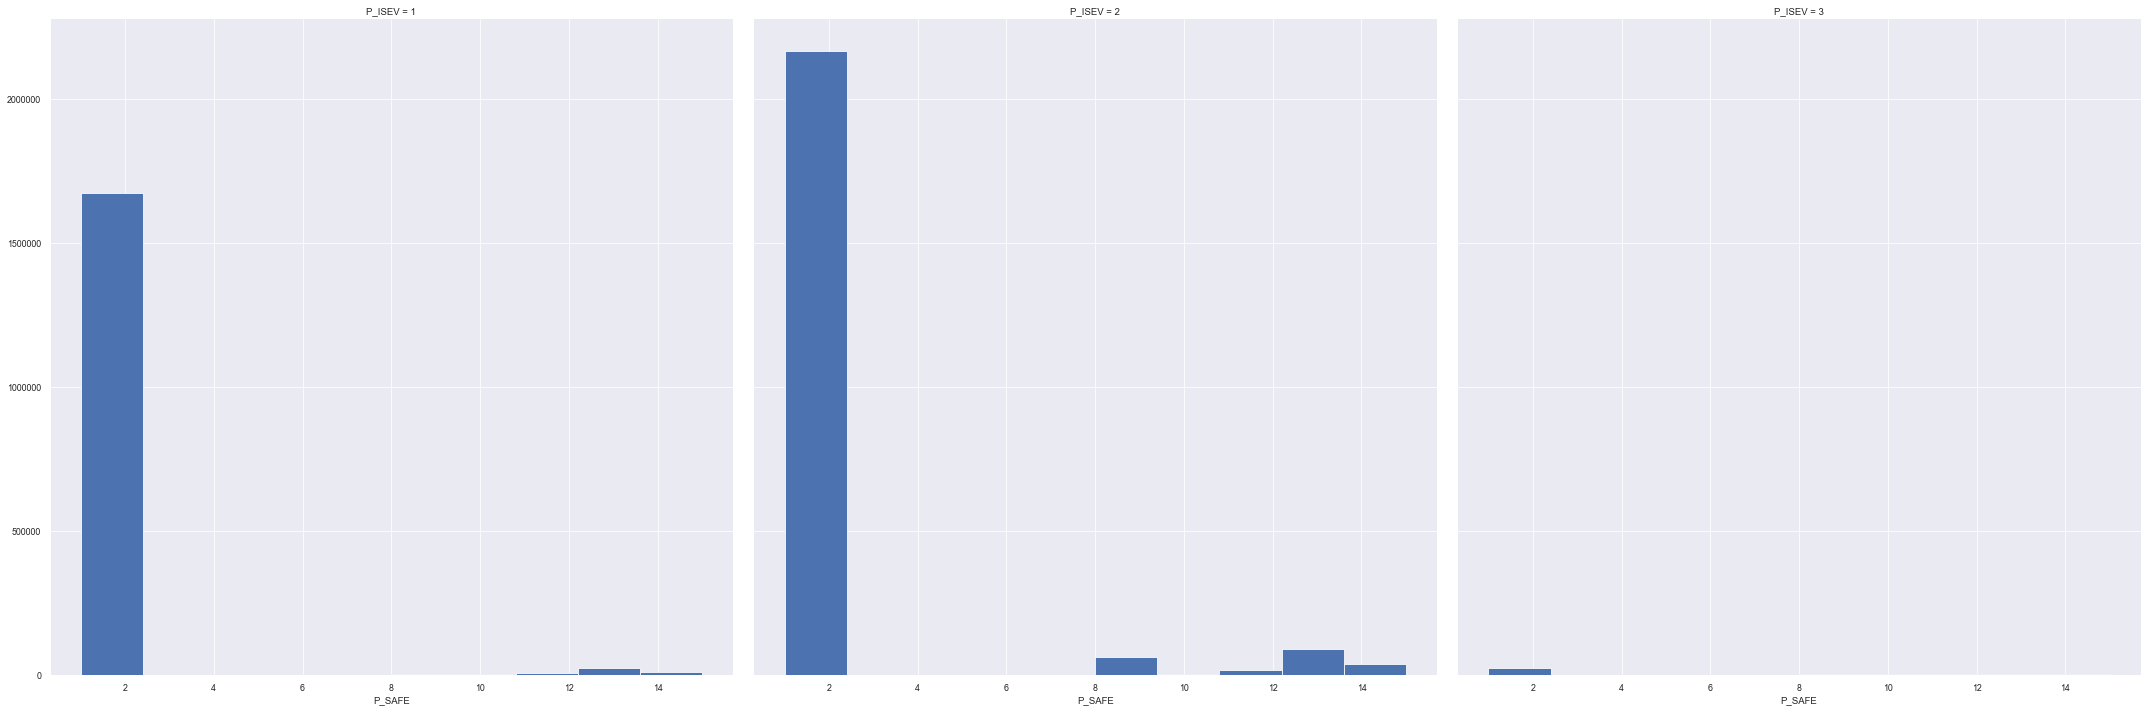

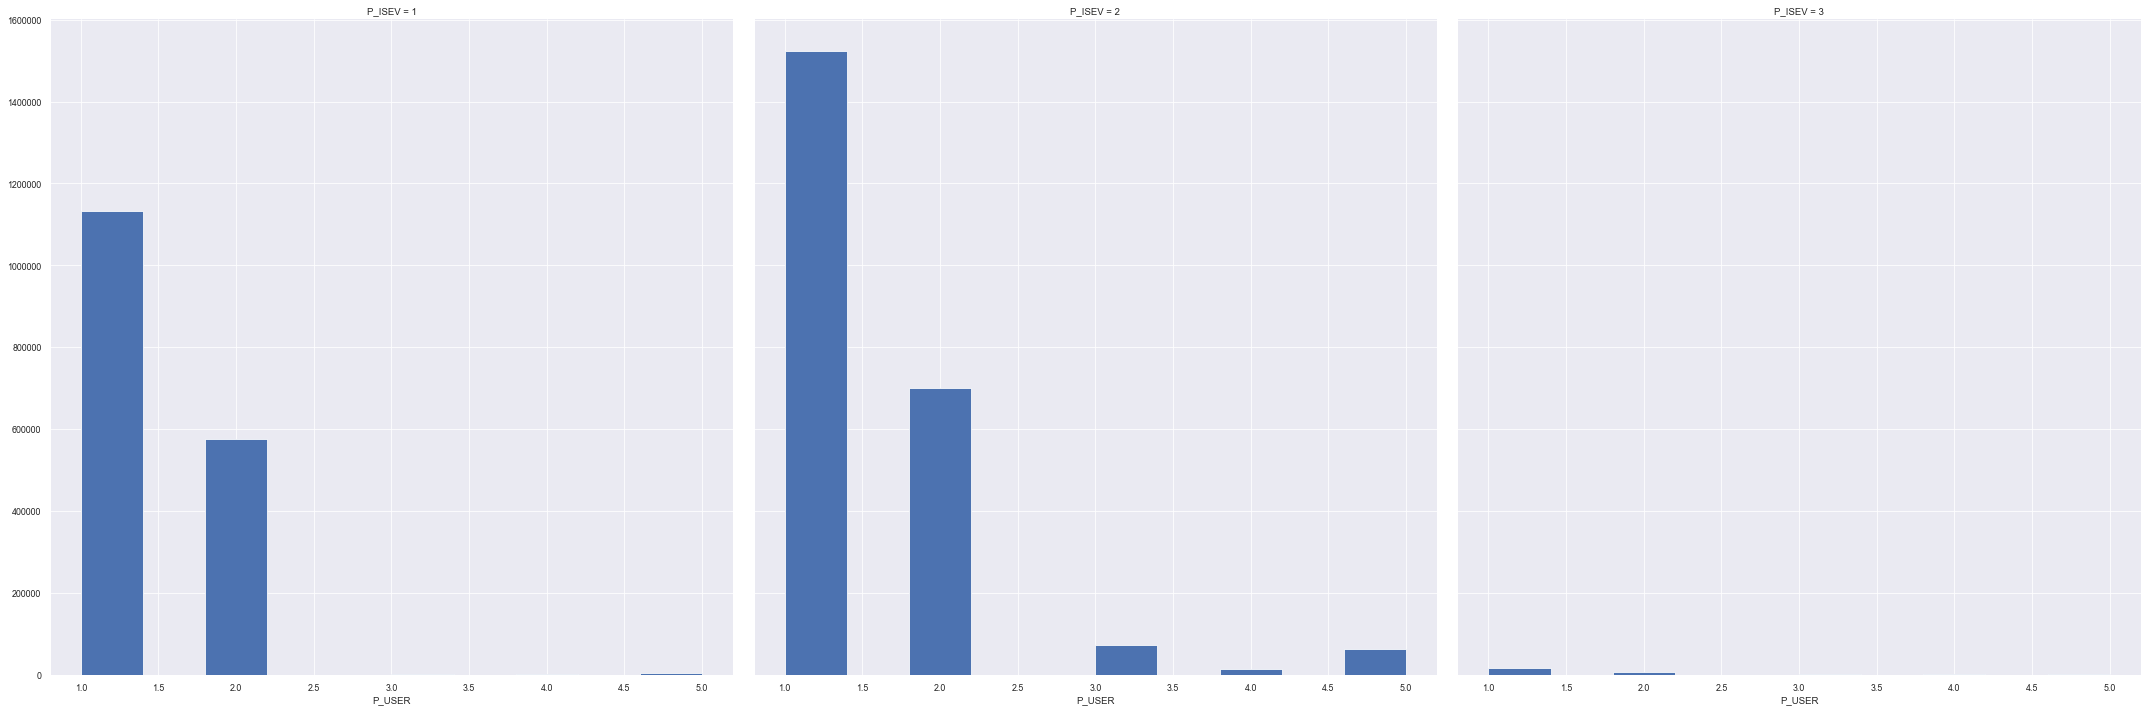

In [29]:
plt.figure(figsize=(12,12))

for col in df_multi.columns[0:len(df_multi.columns)-1]:
    k = sns.FacetGrid(df_multi, col="P_ISEV", height = 10, aspect=1)
    k = k.map(plt.hist, col)

## Analysis By Year

In [30]:
#fig, ax = plt.subplots(figsize=(15,15))
#df_multi.groupby(['C_YEAR', 'P_ISEV']).count()['C_MNTH'].unstack().plot(ax=ax)

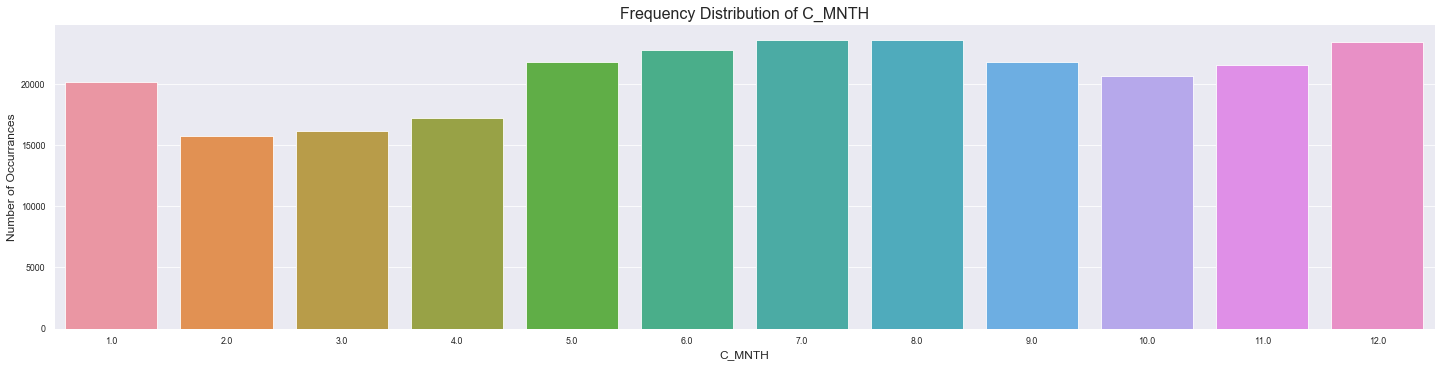

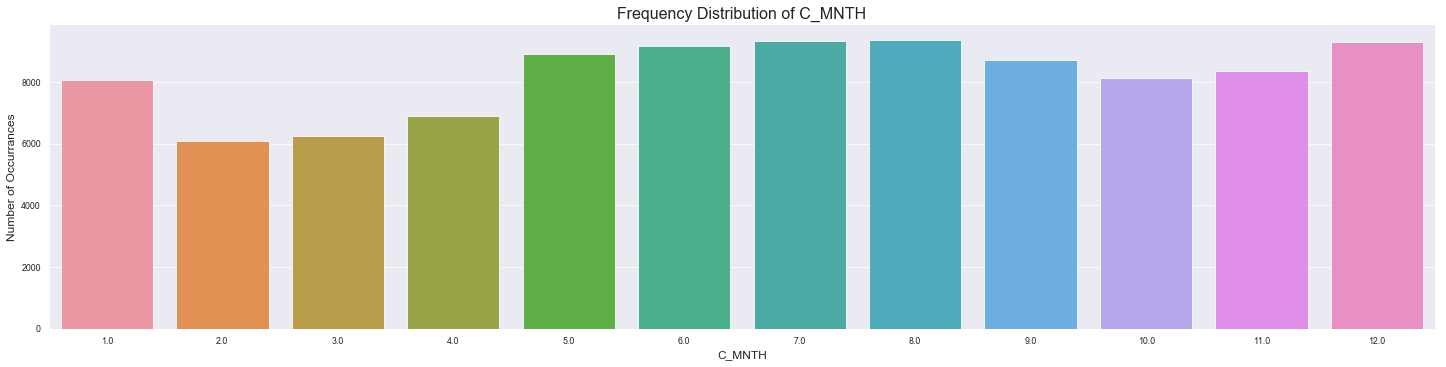

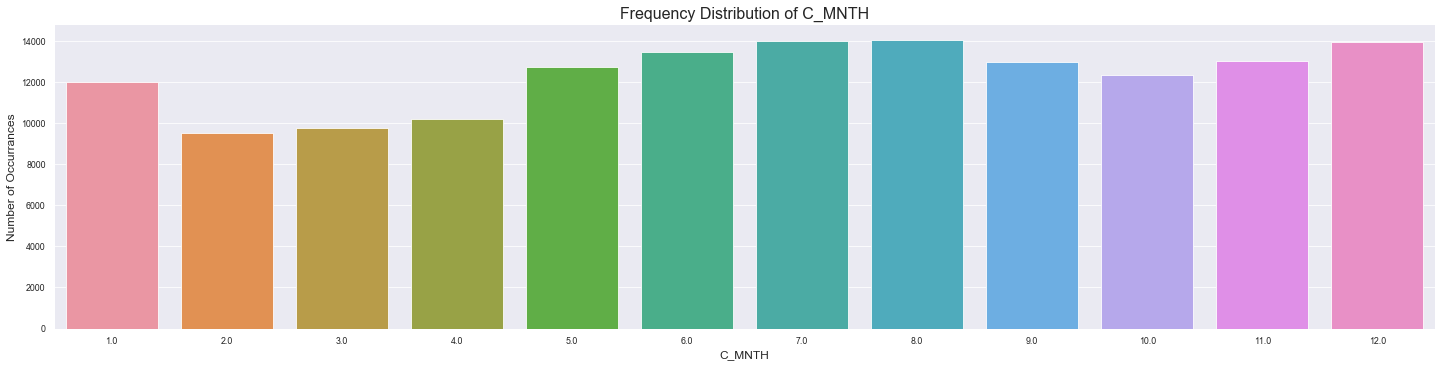

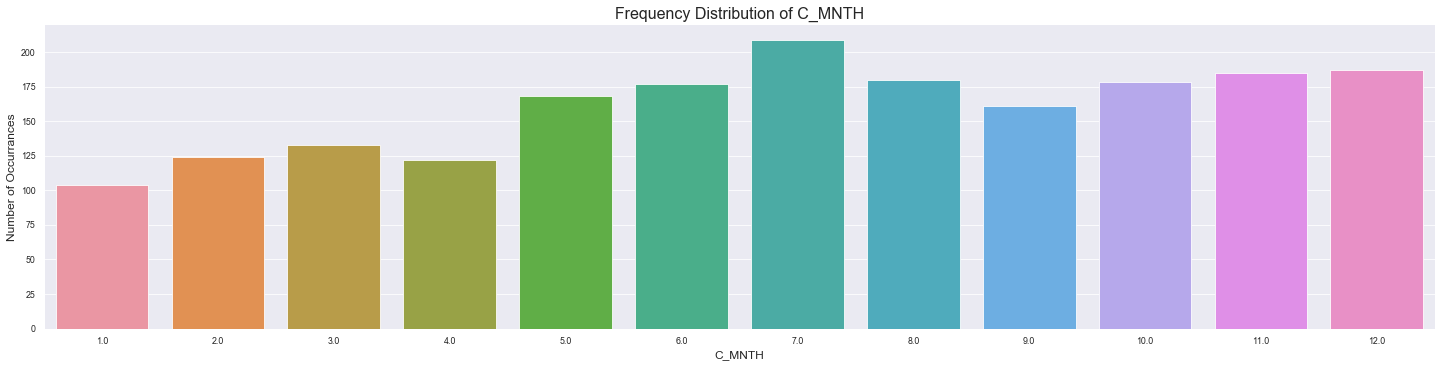

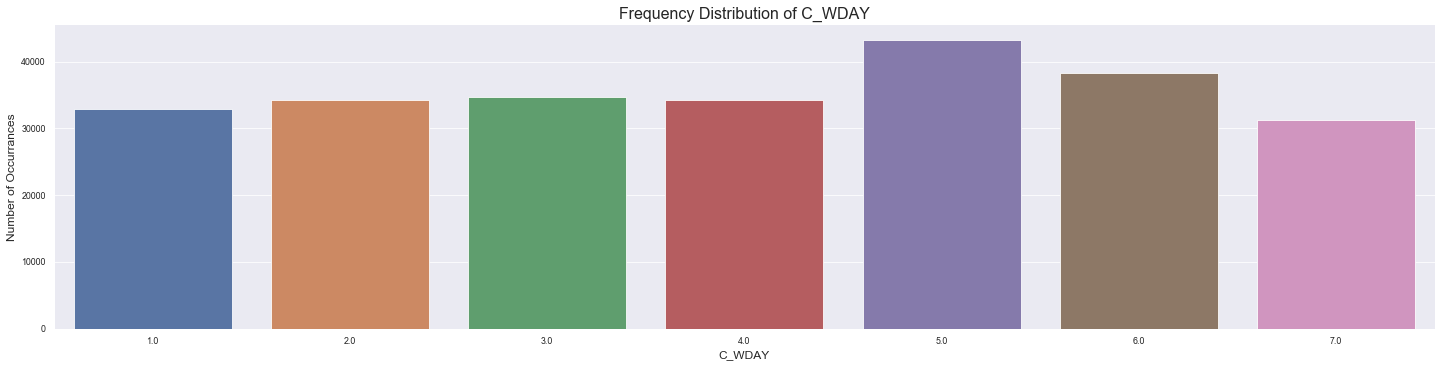

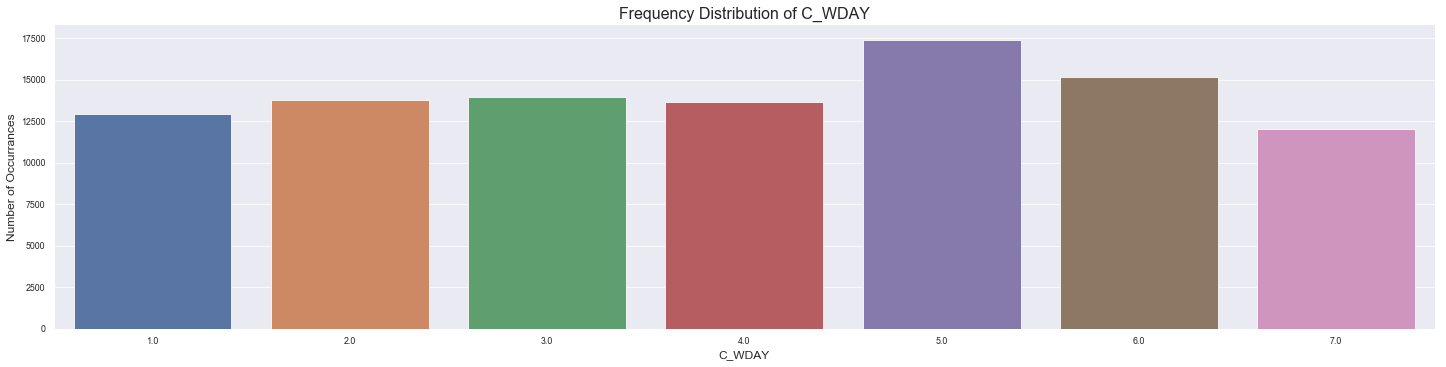

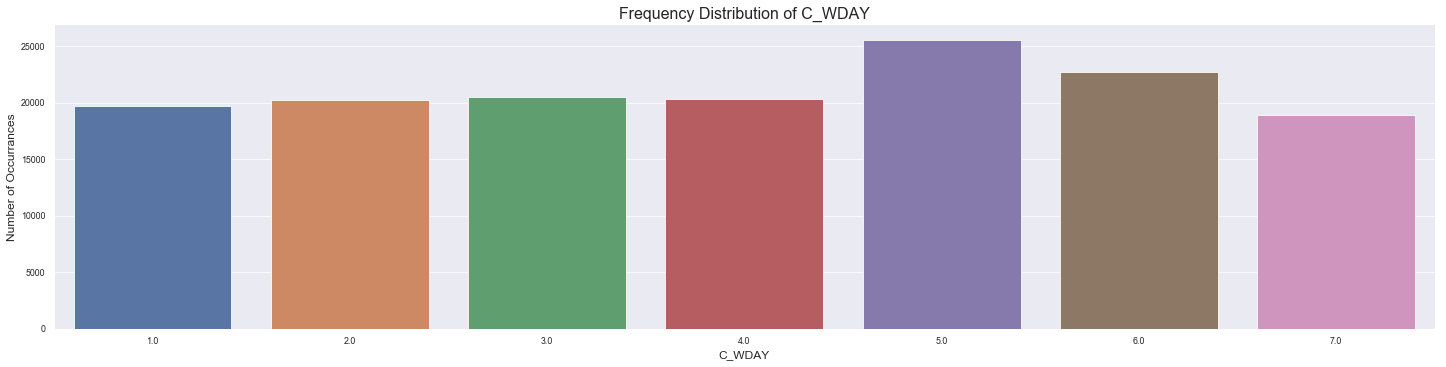

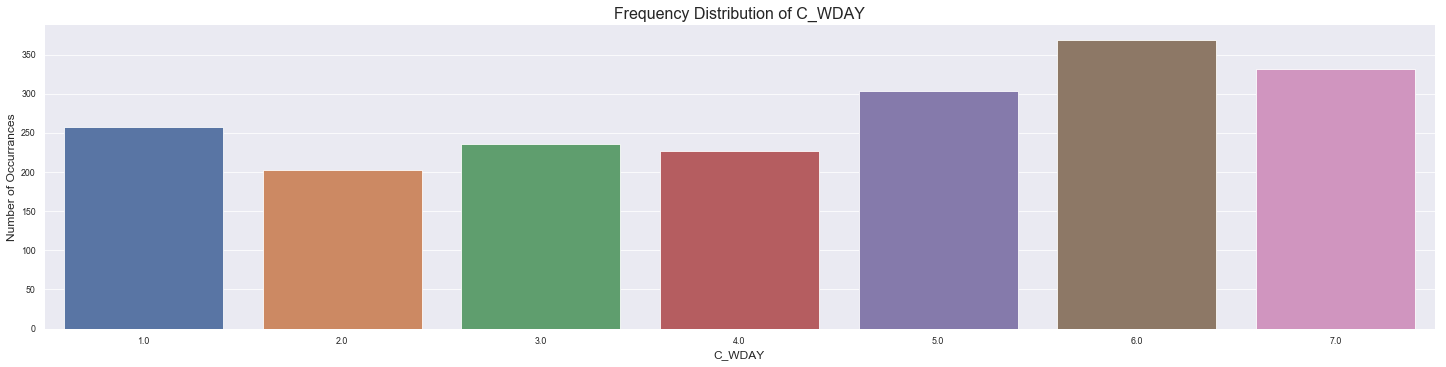

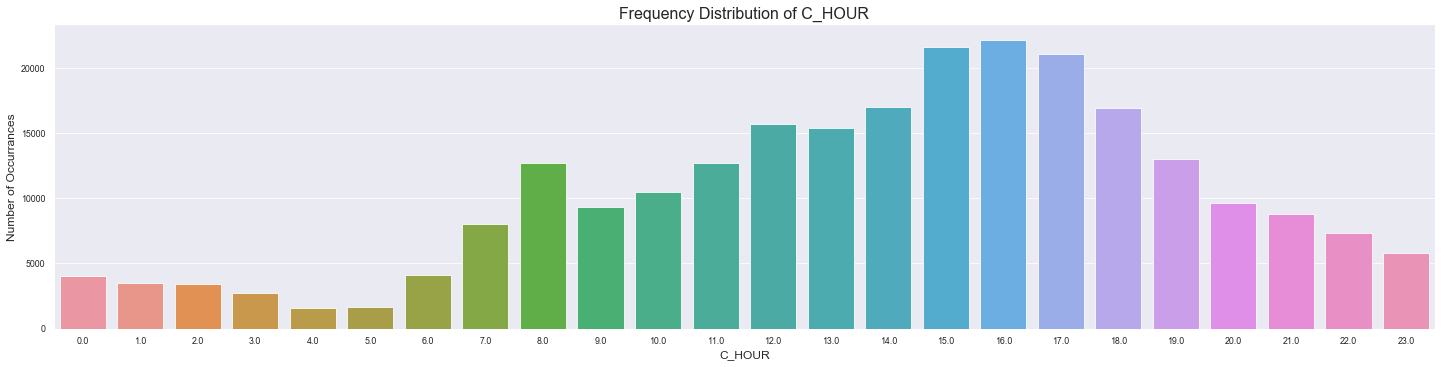

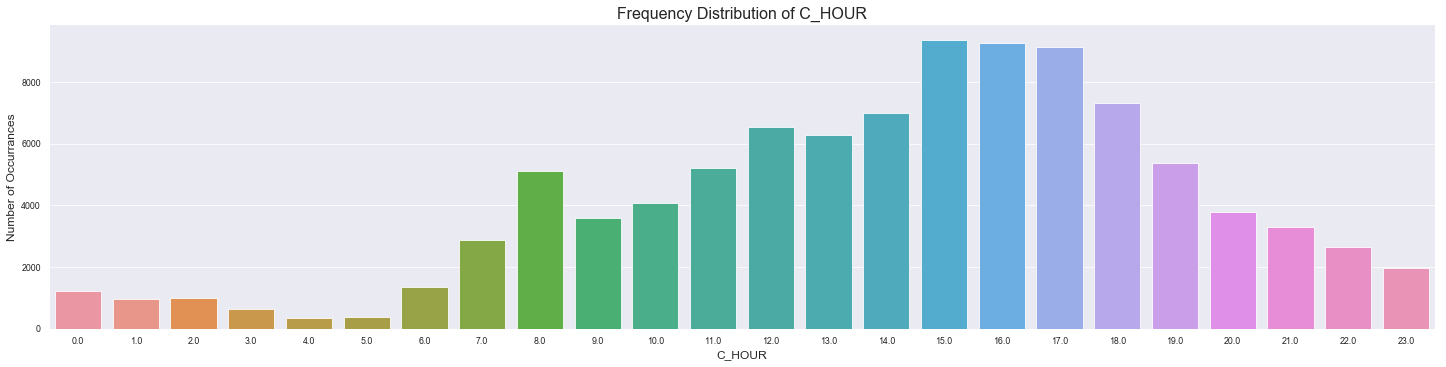

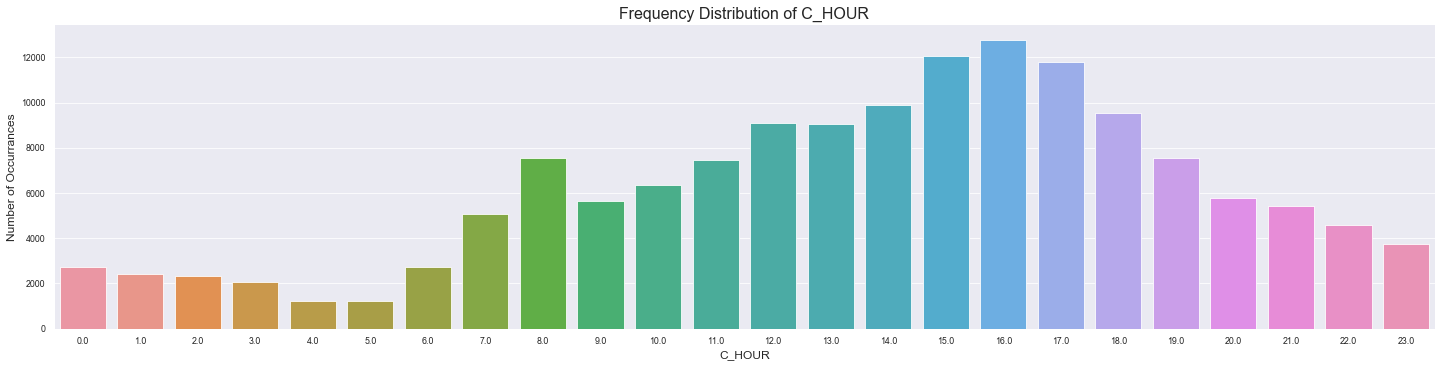

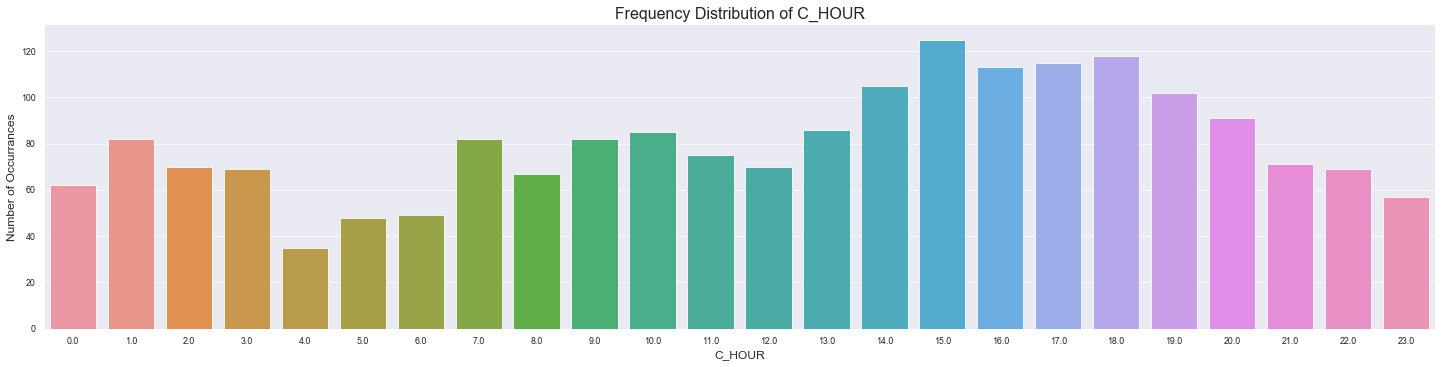

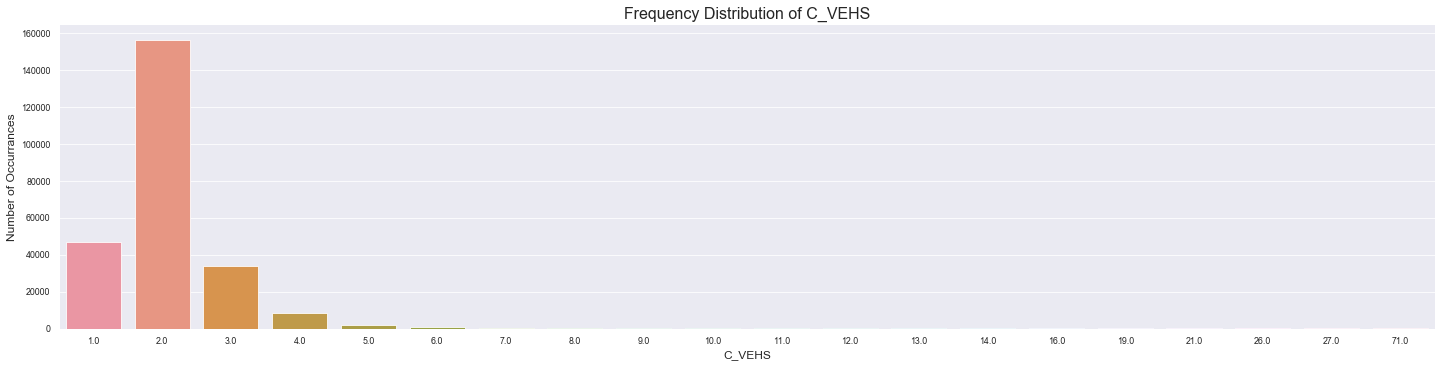

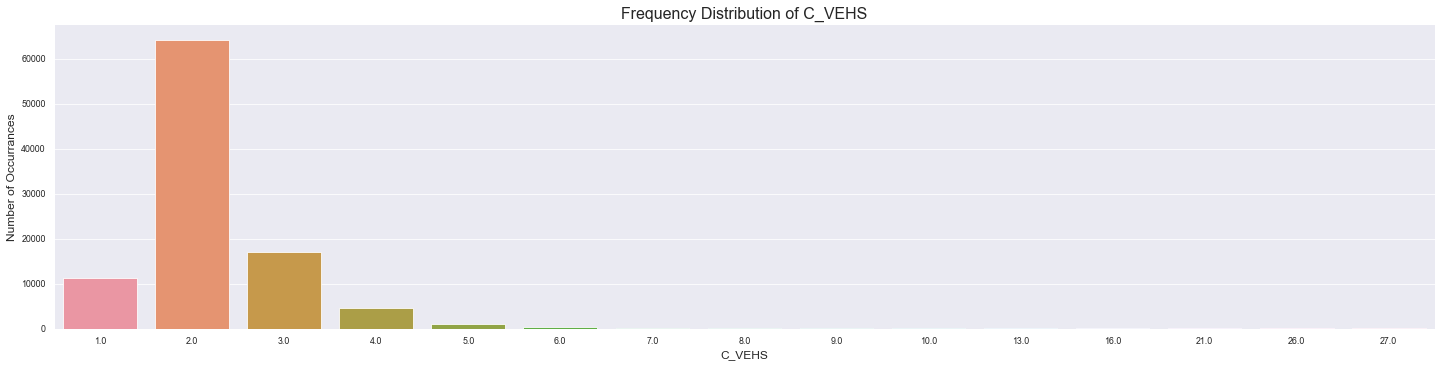

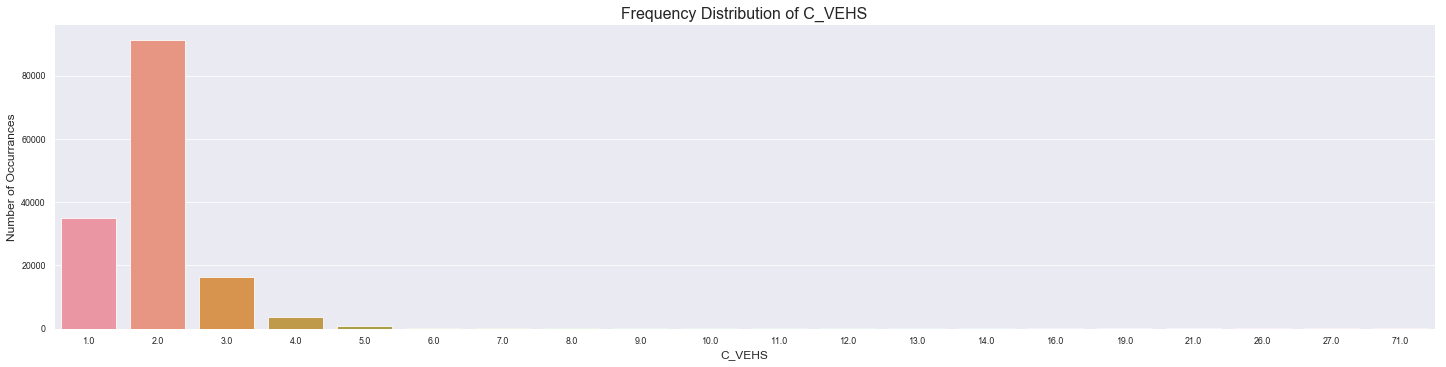

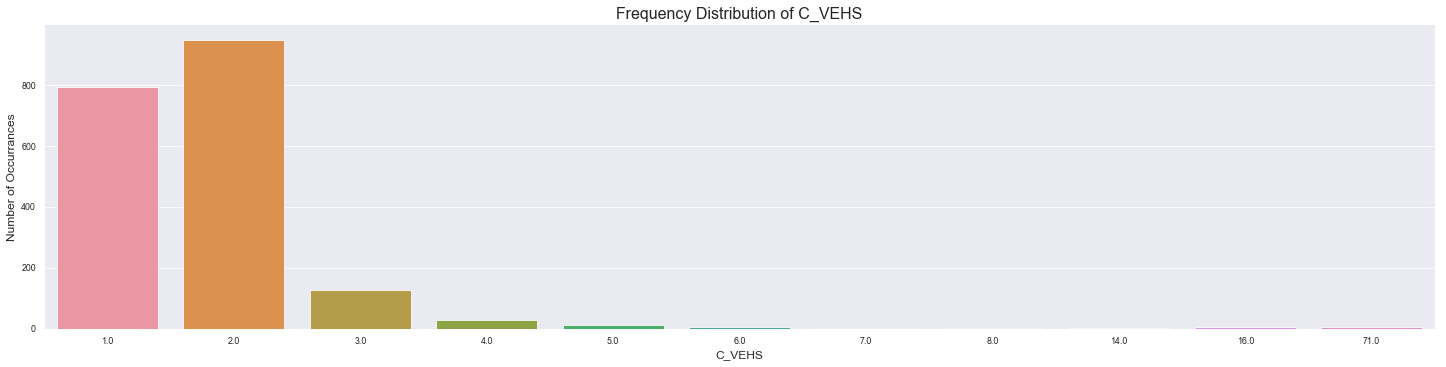

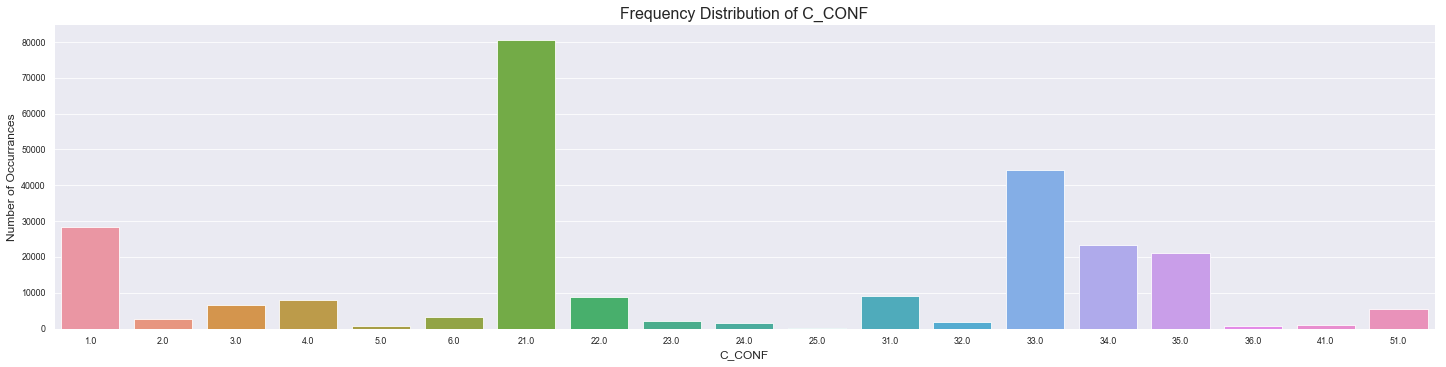

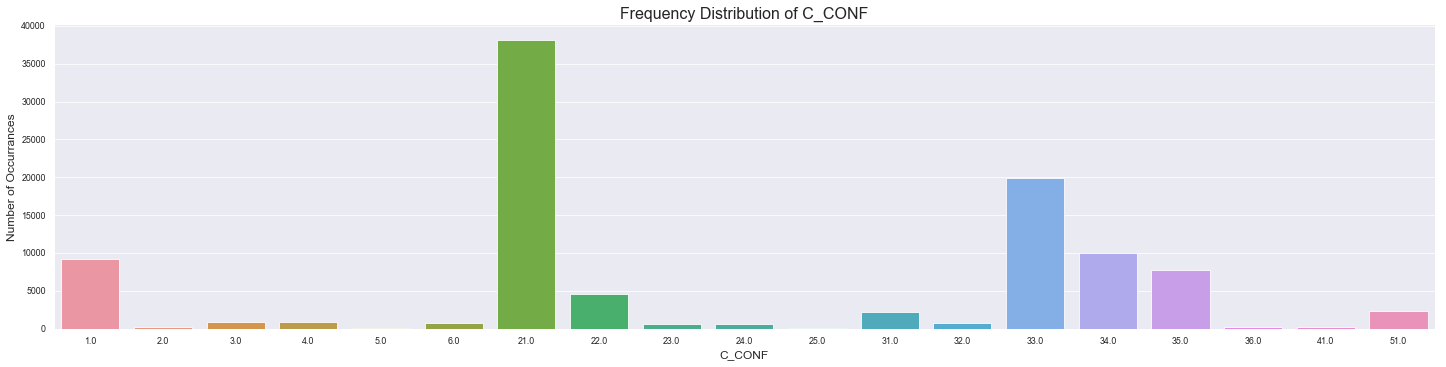

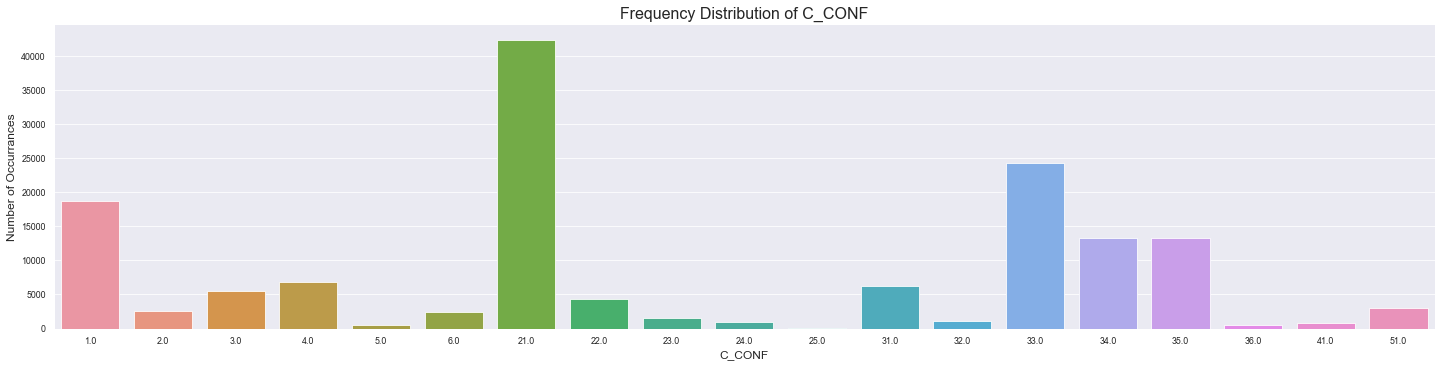

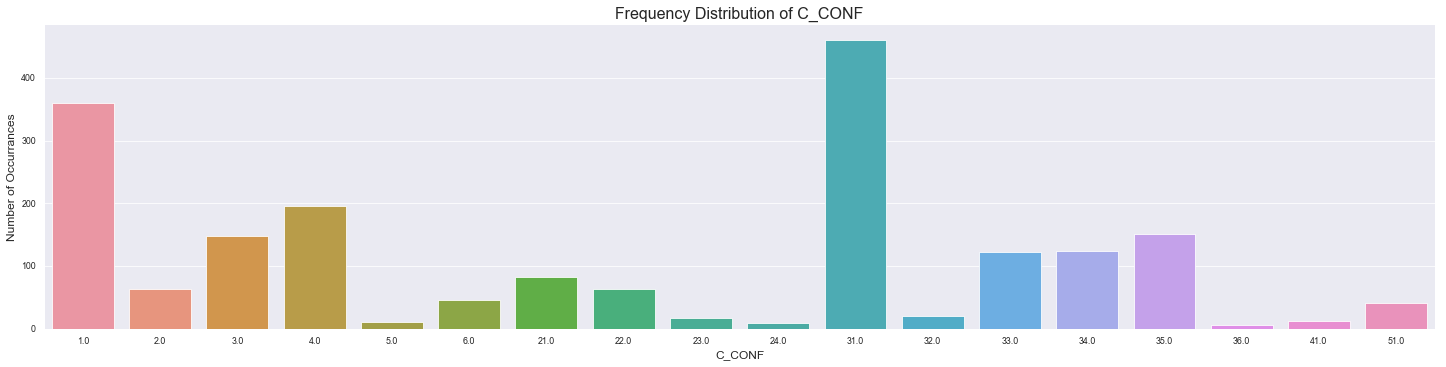

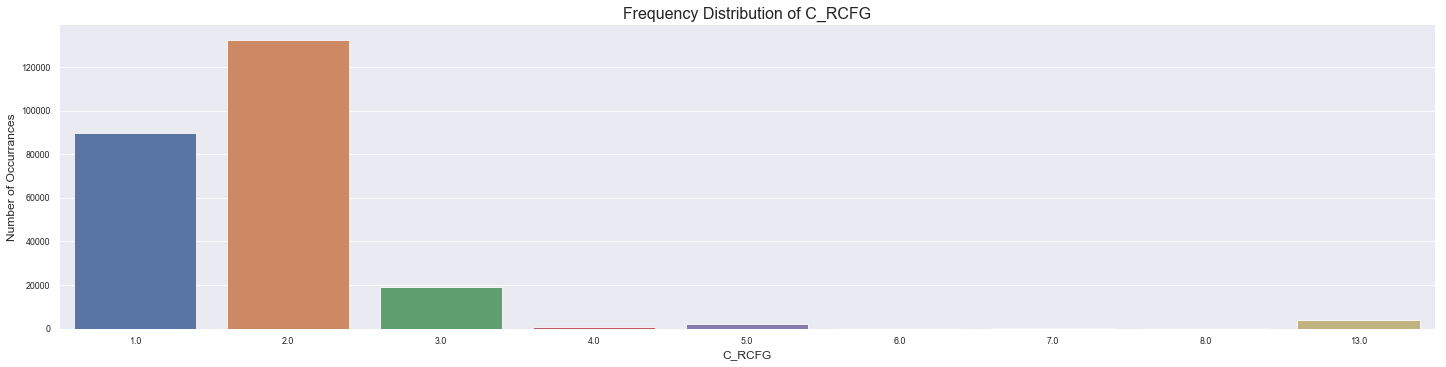

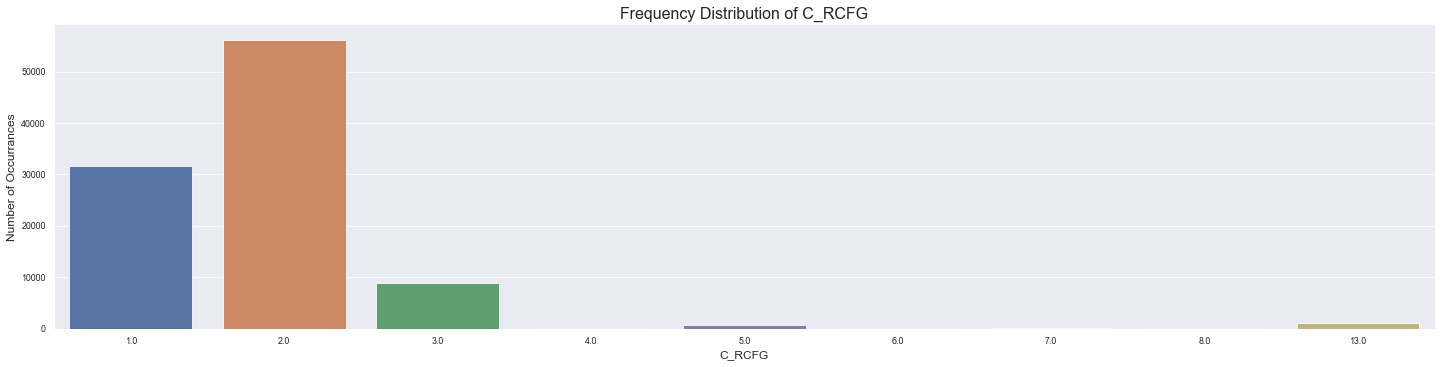

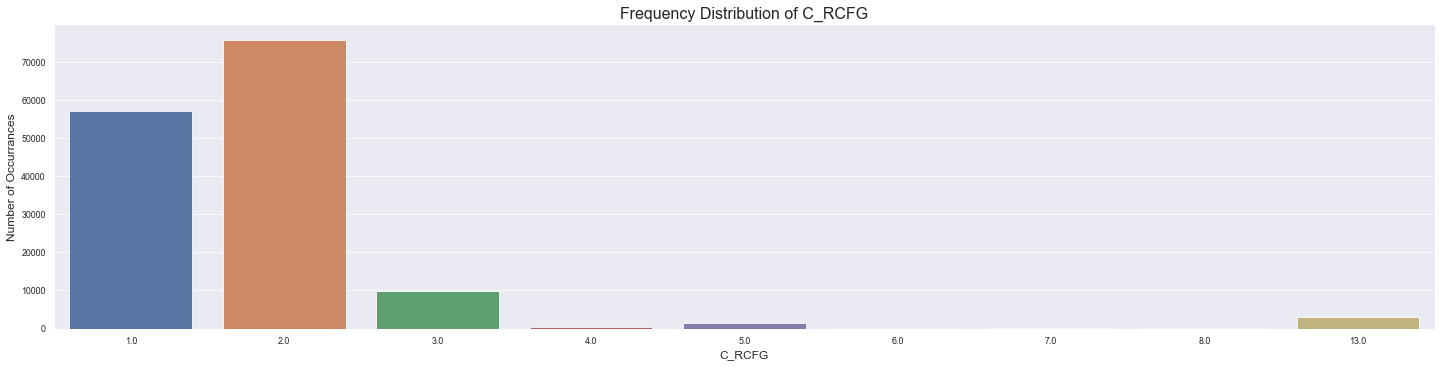

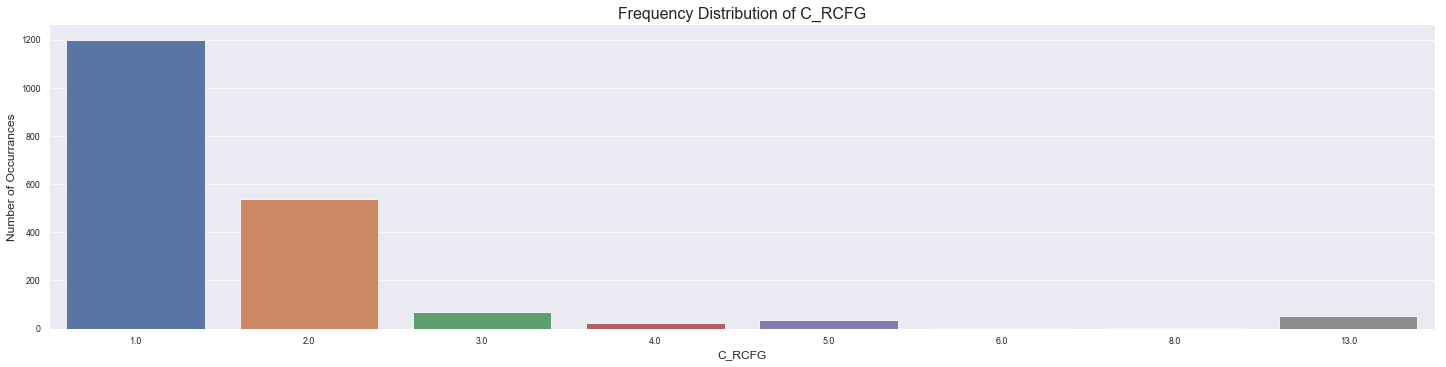

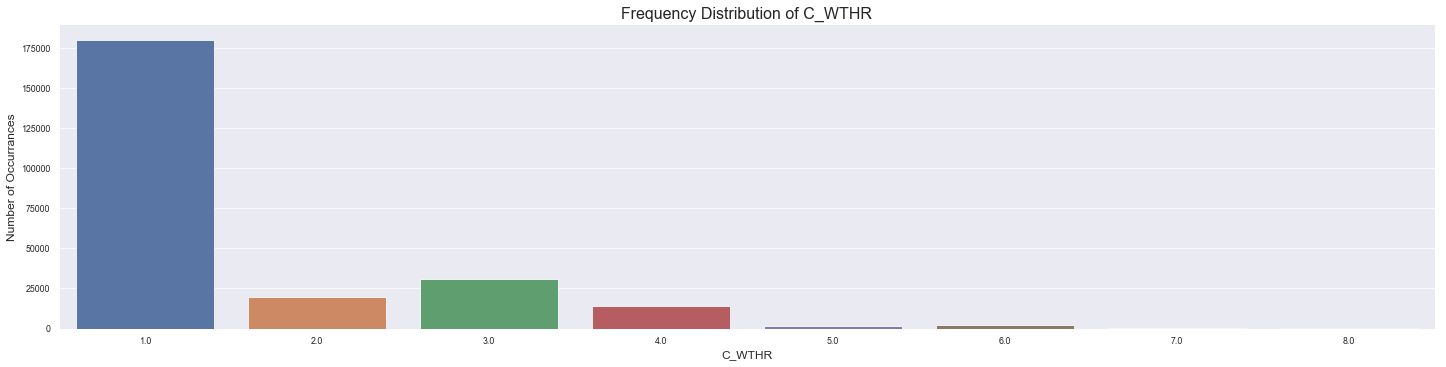

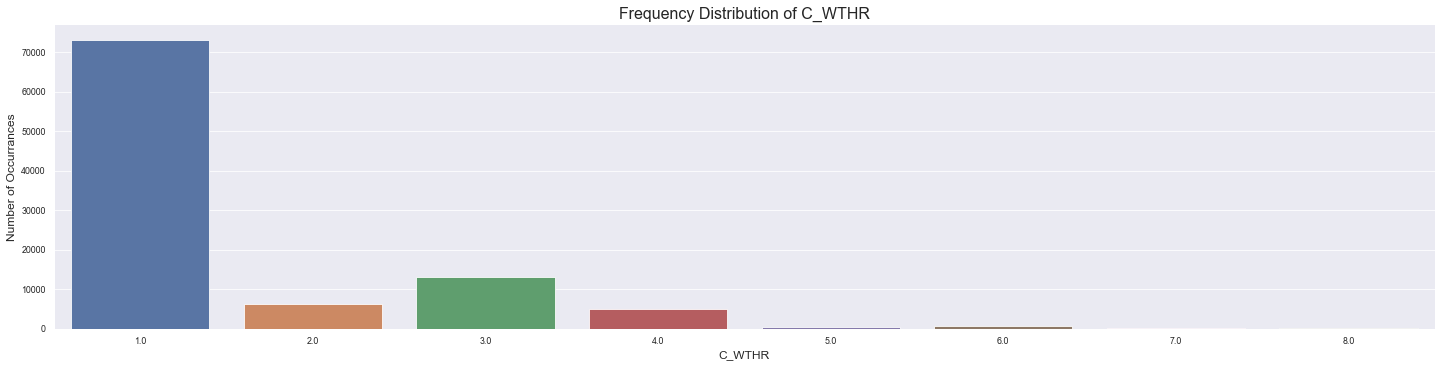

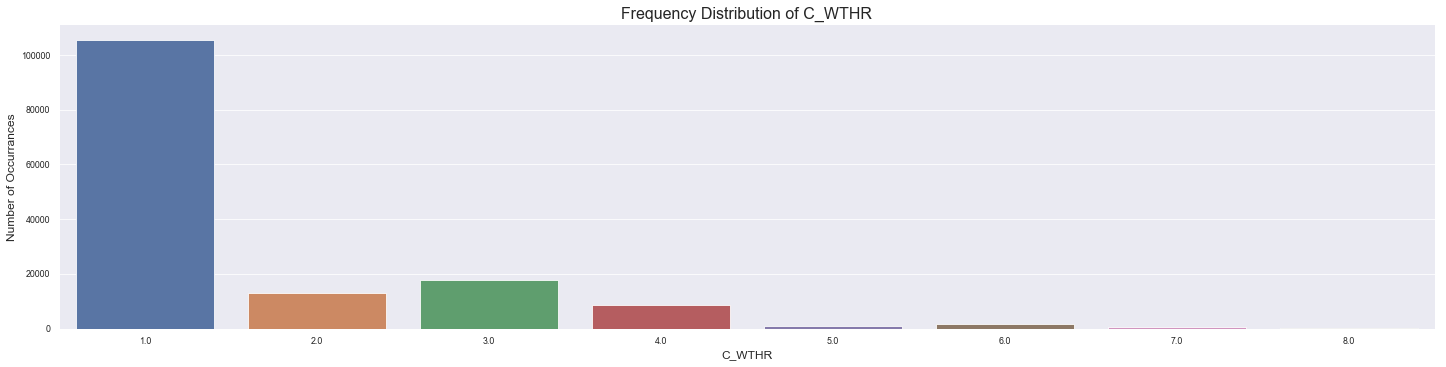

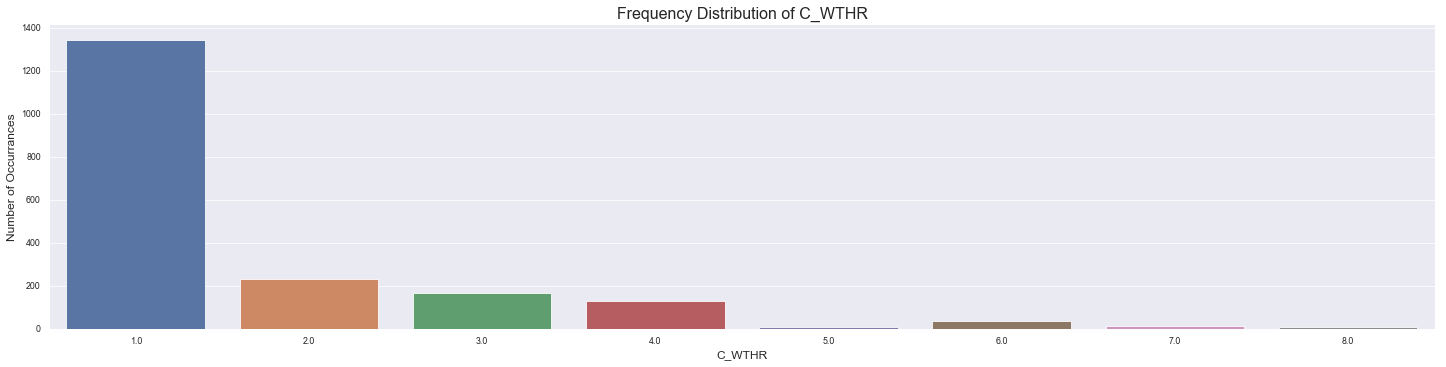

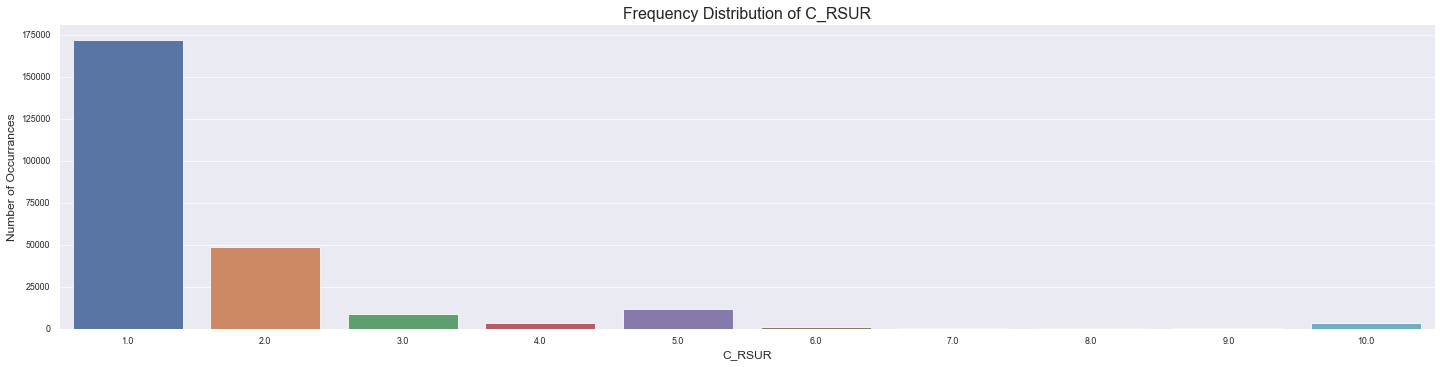

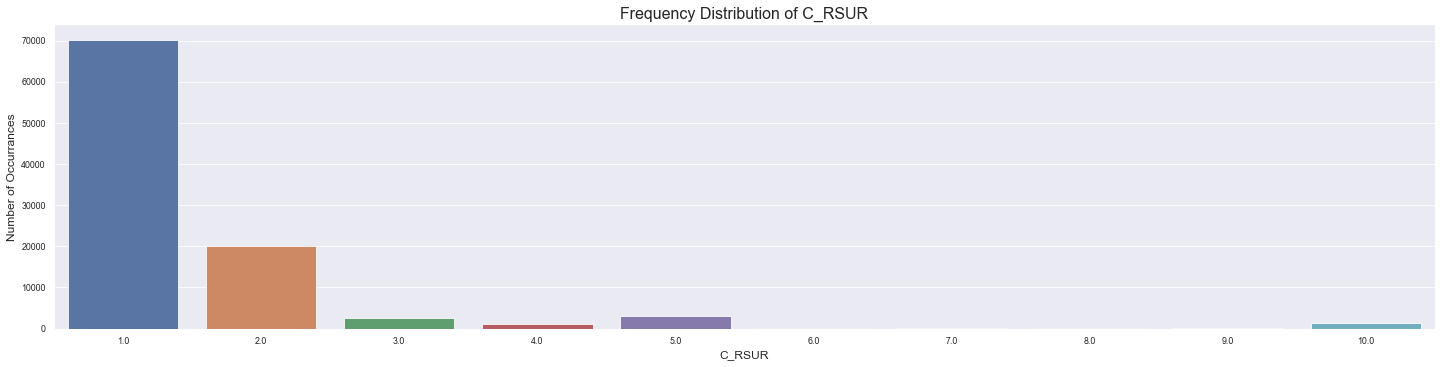

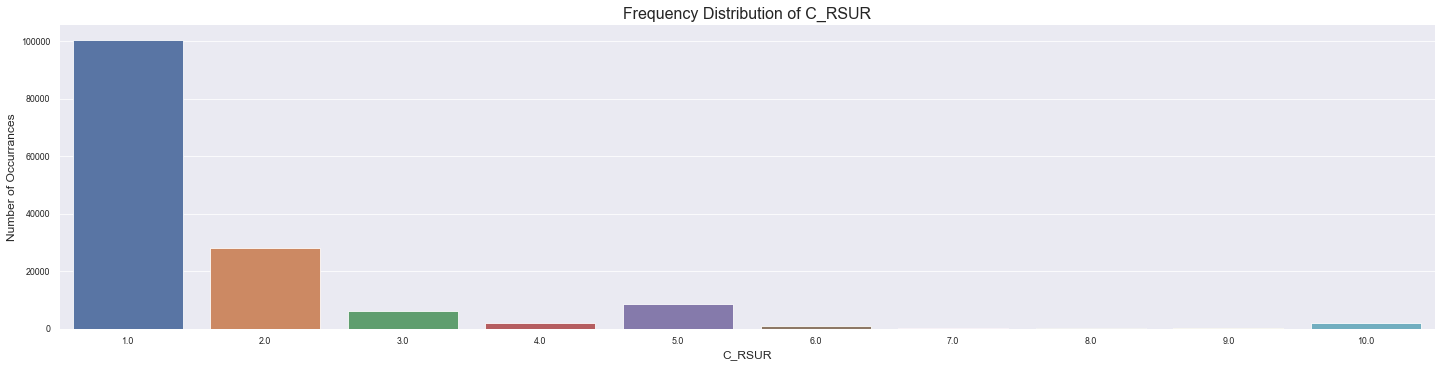

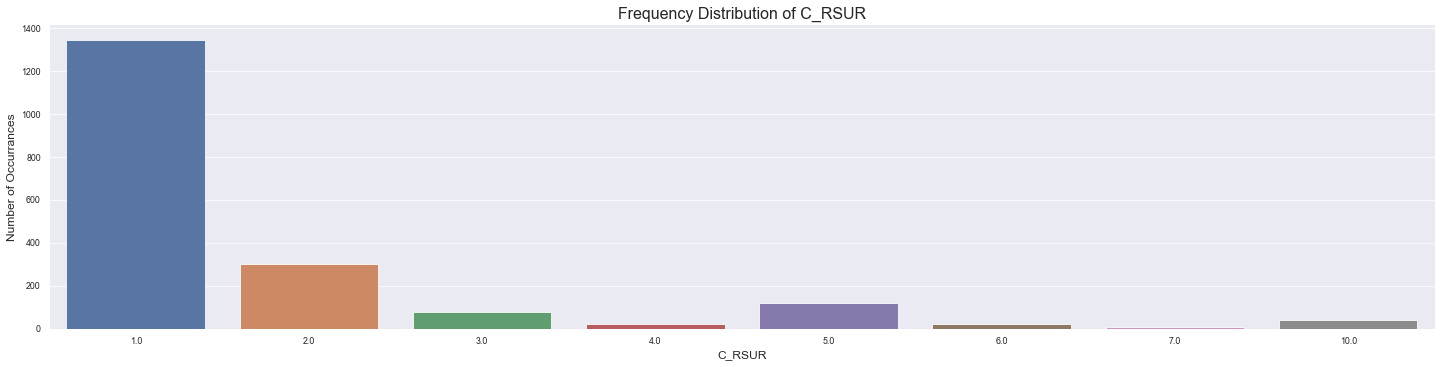

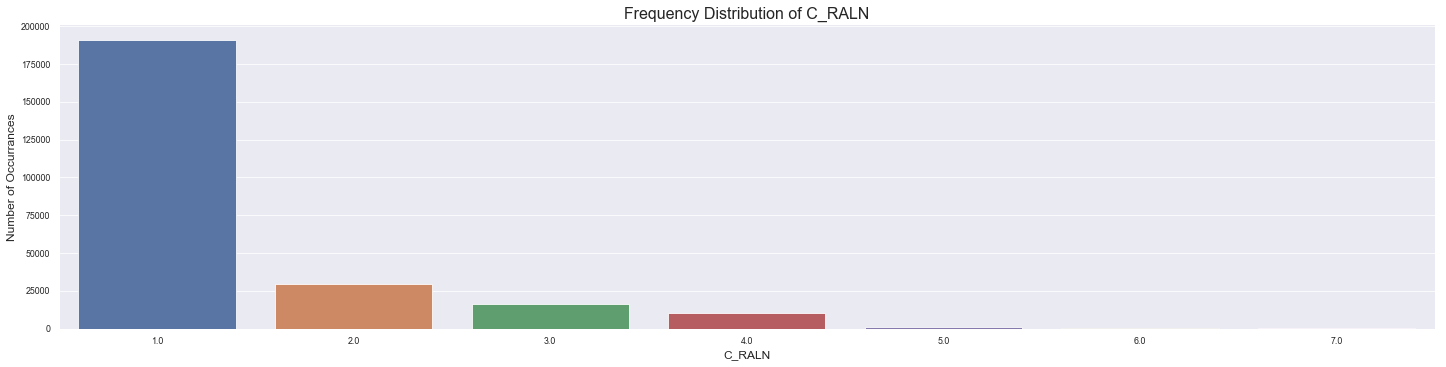

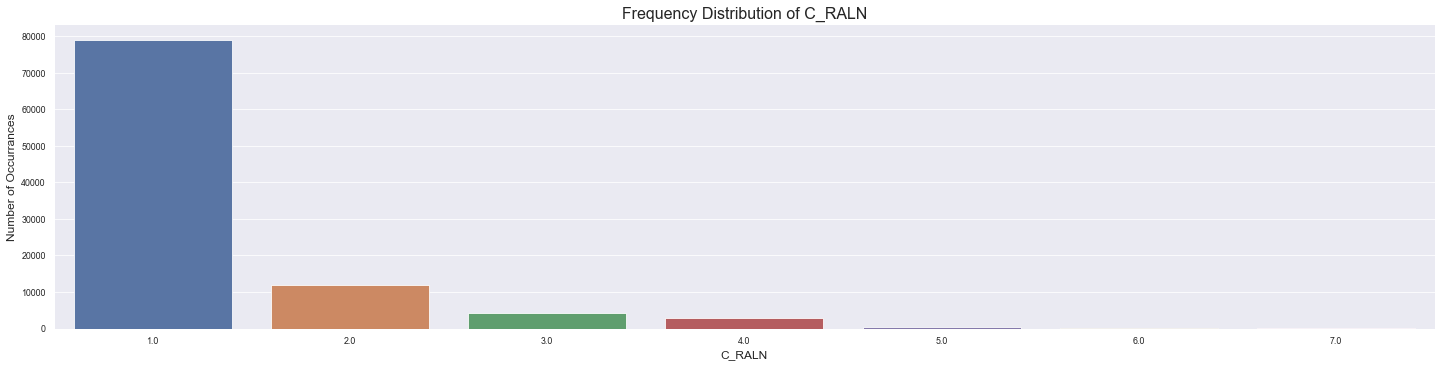

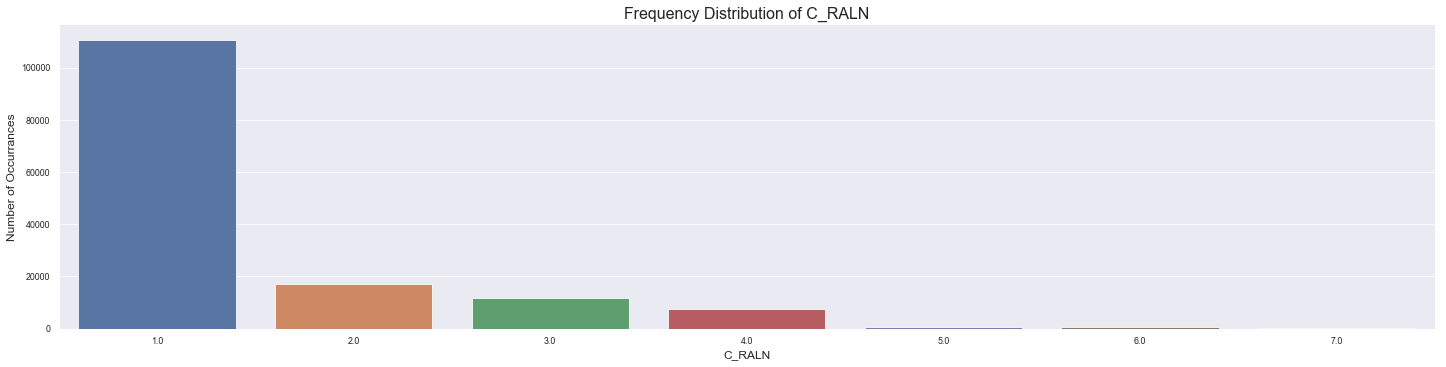

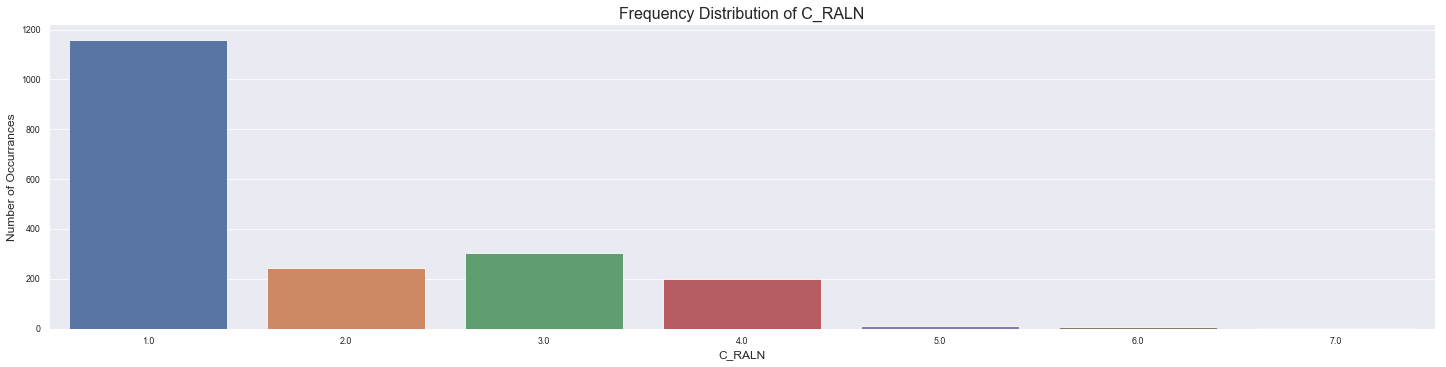

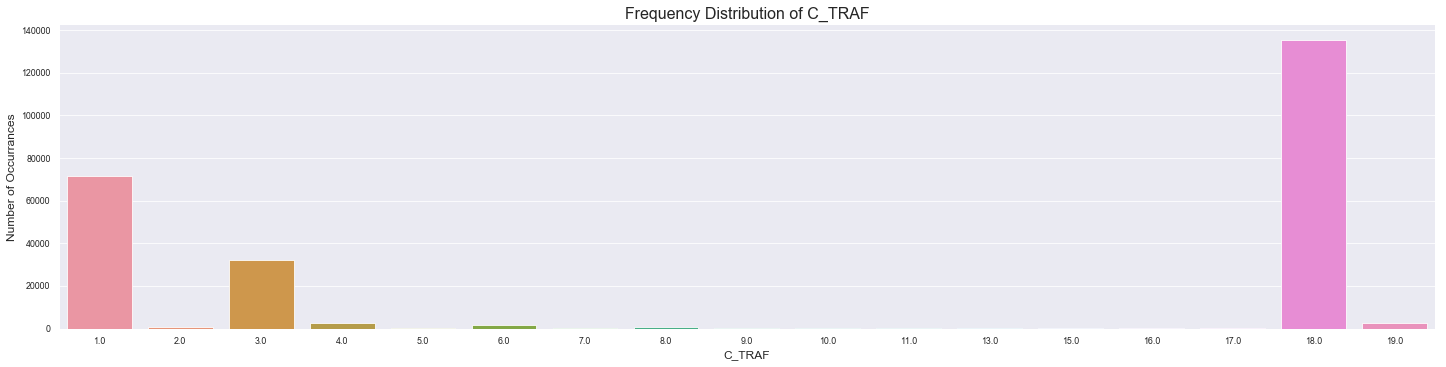

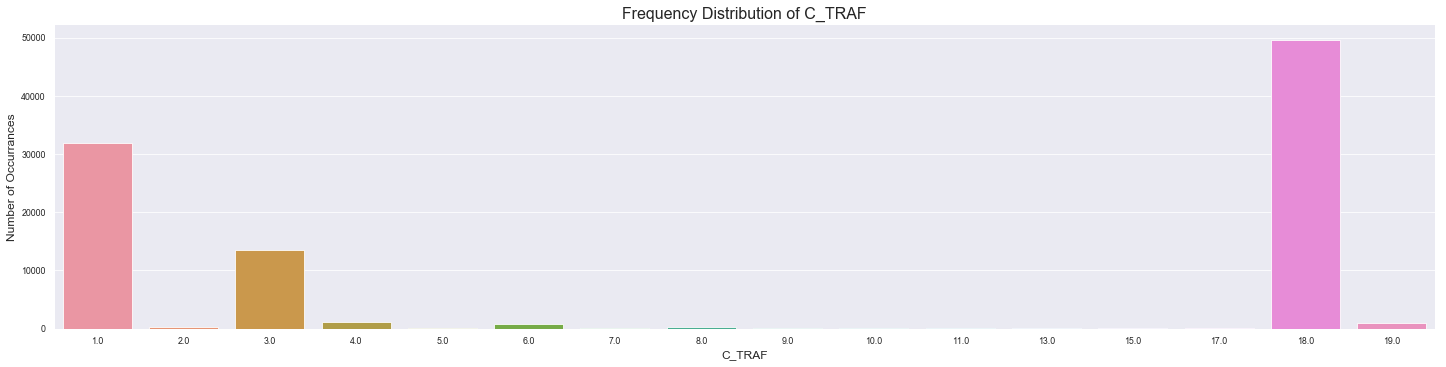

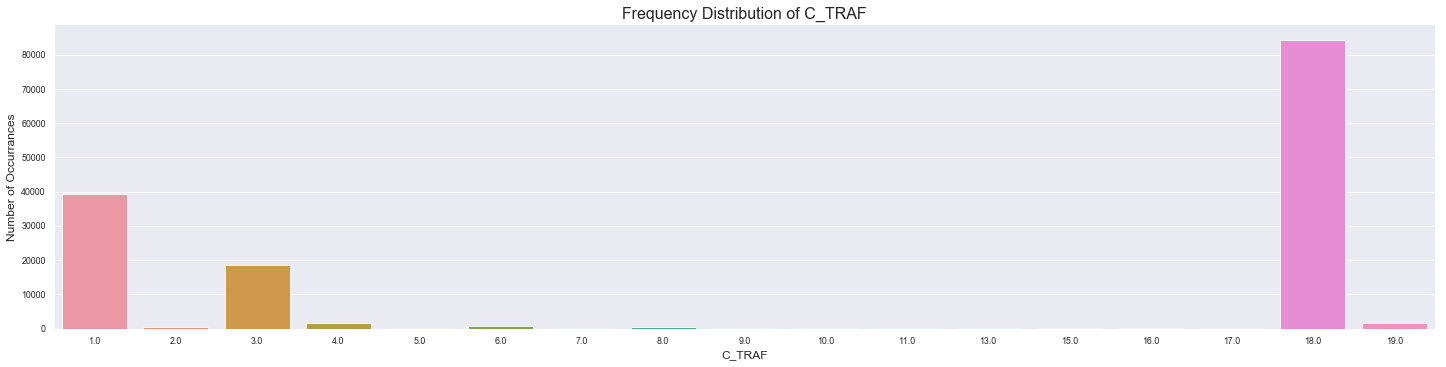

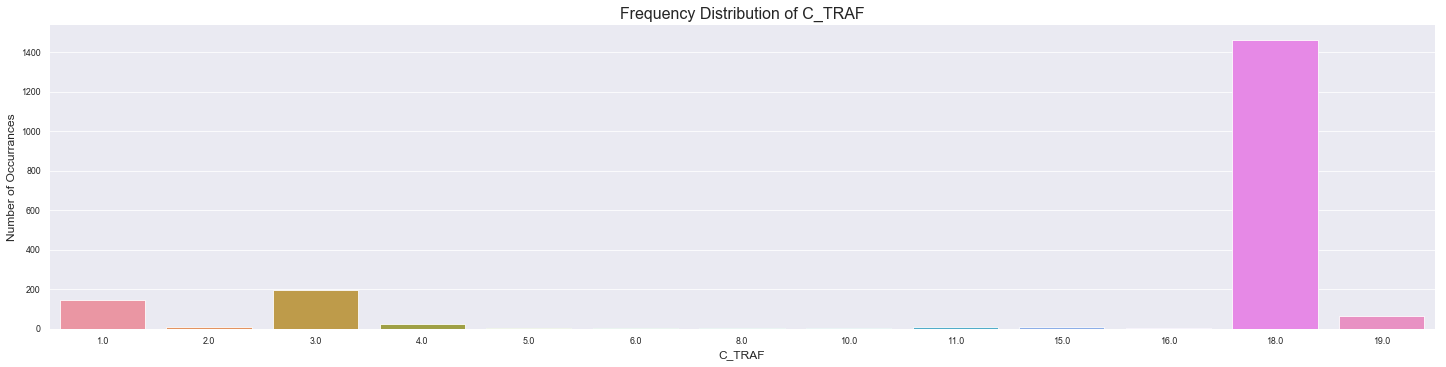

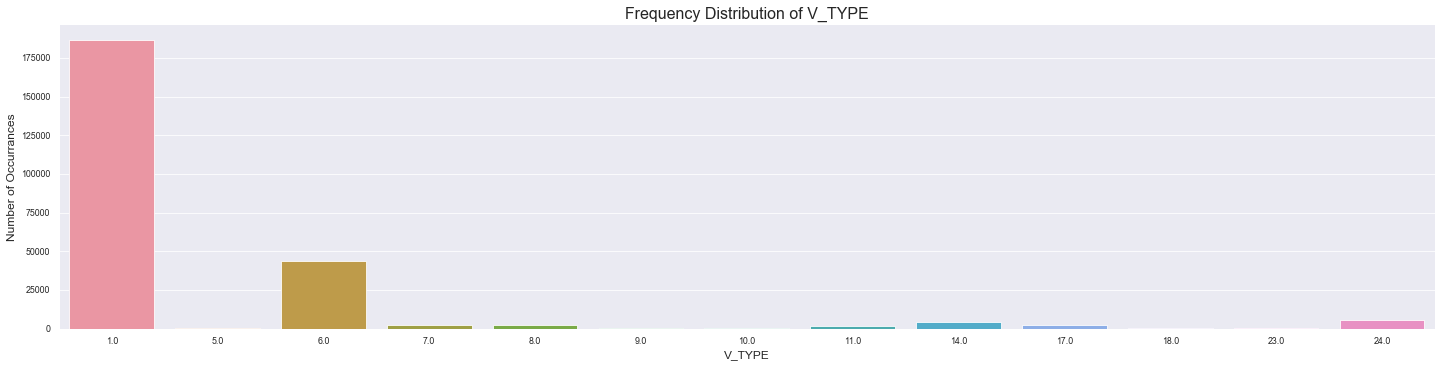

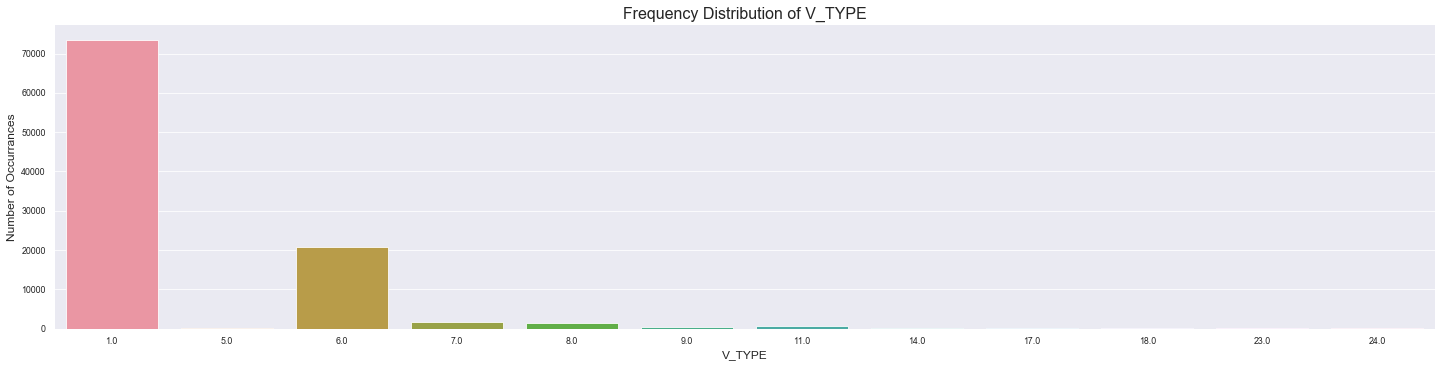

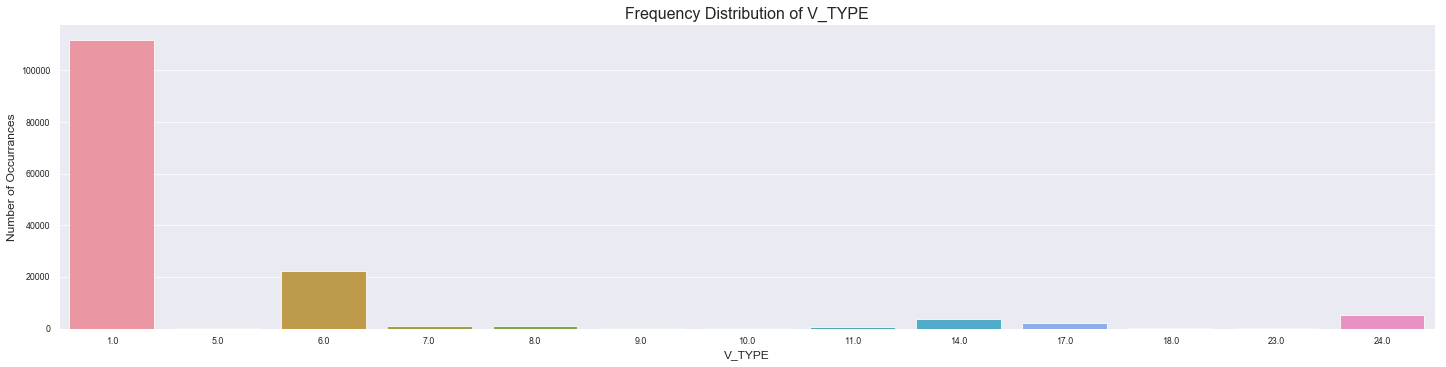

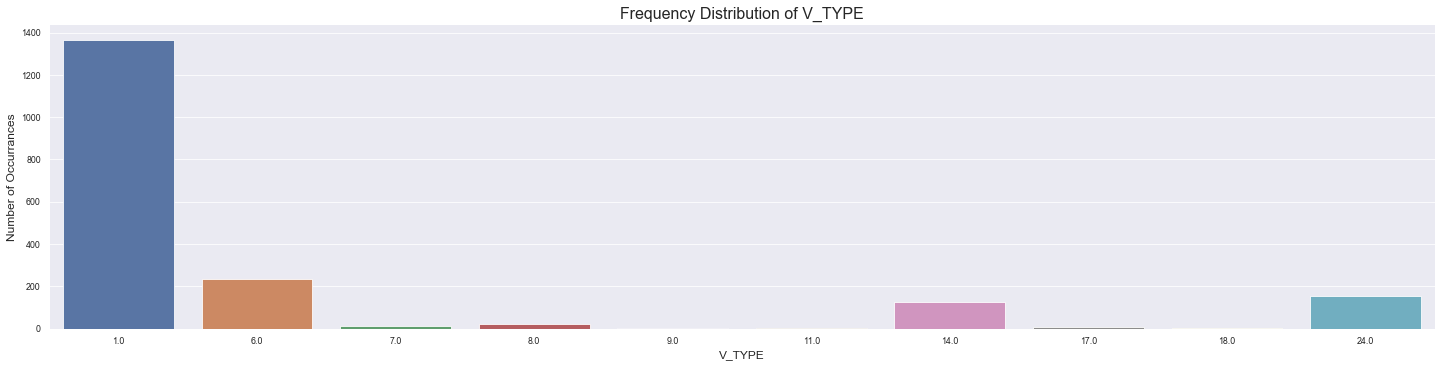

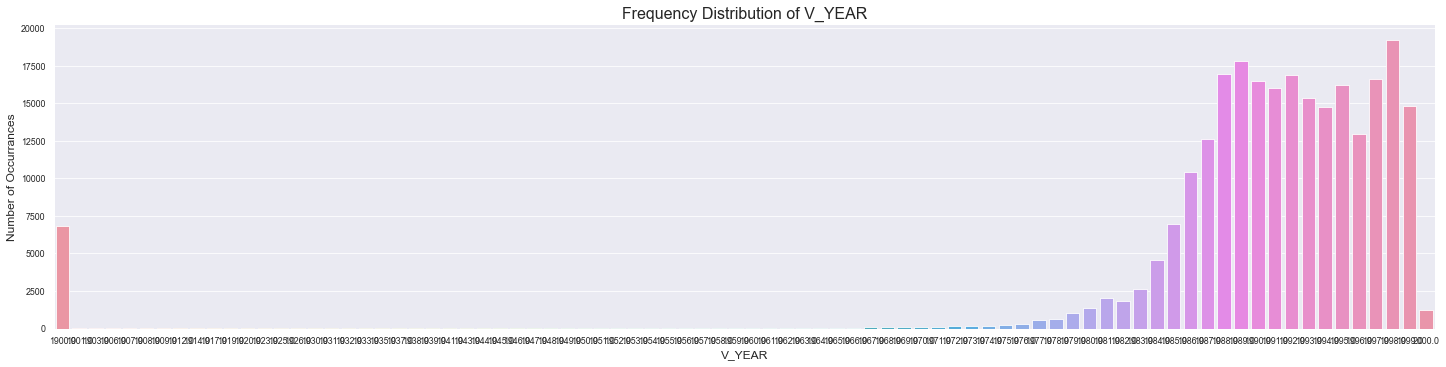

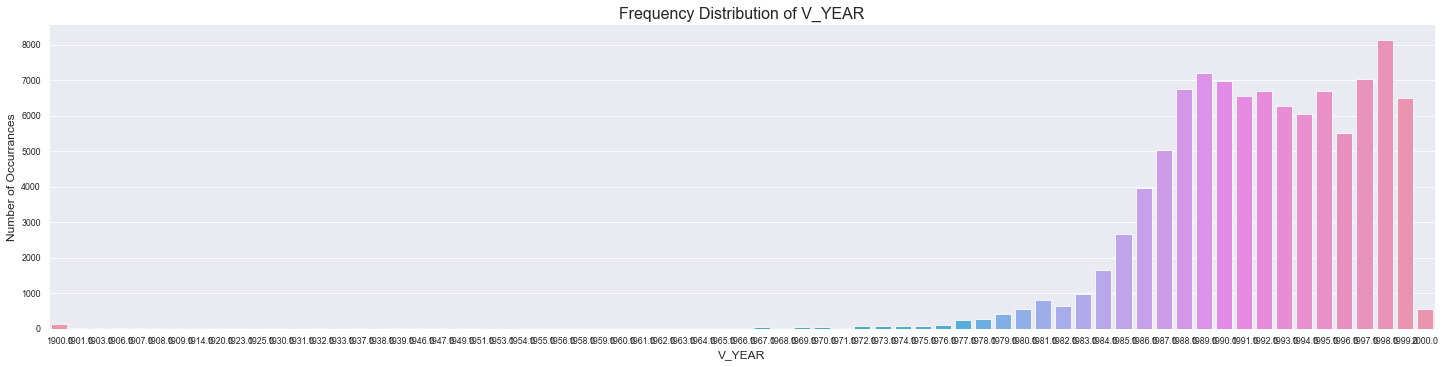

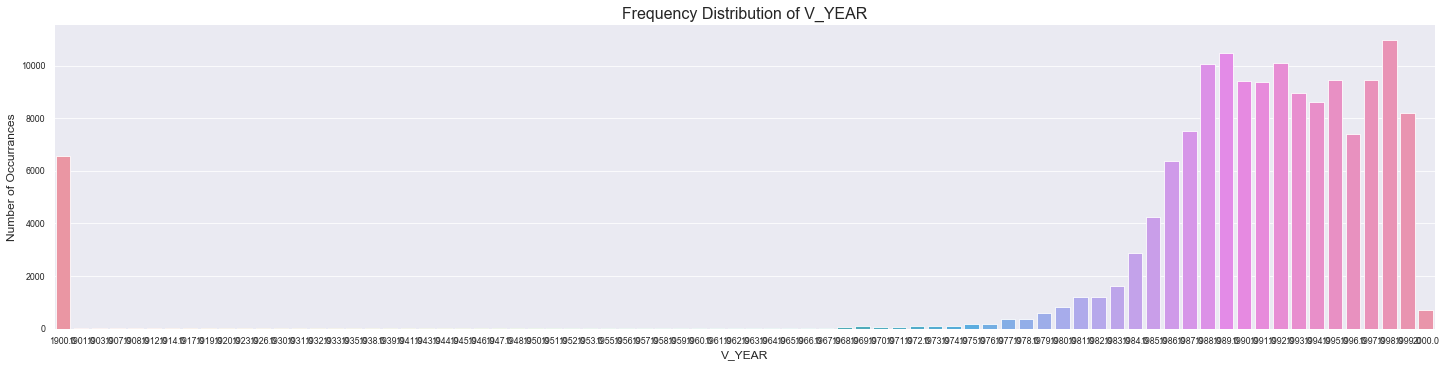

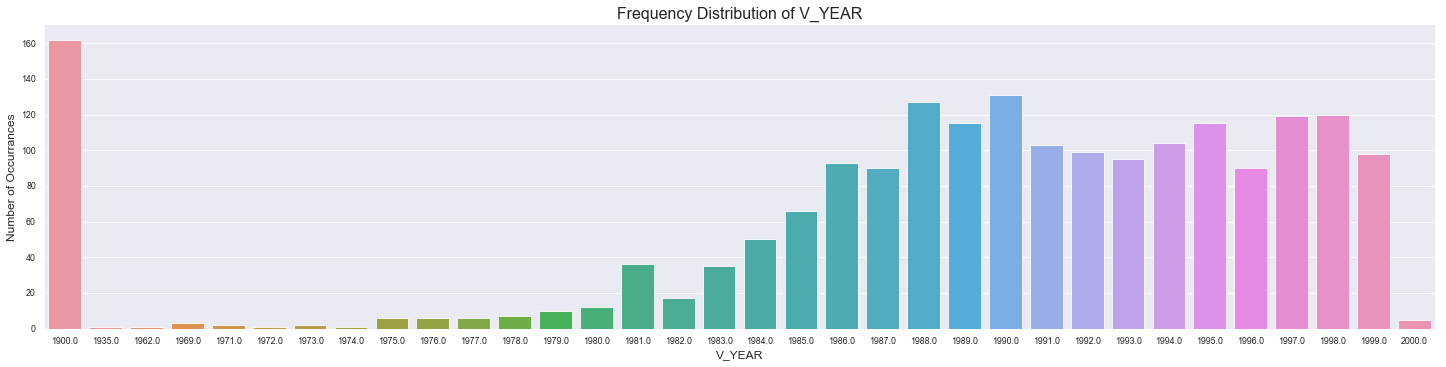

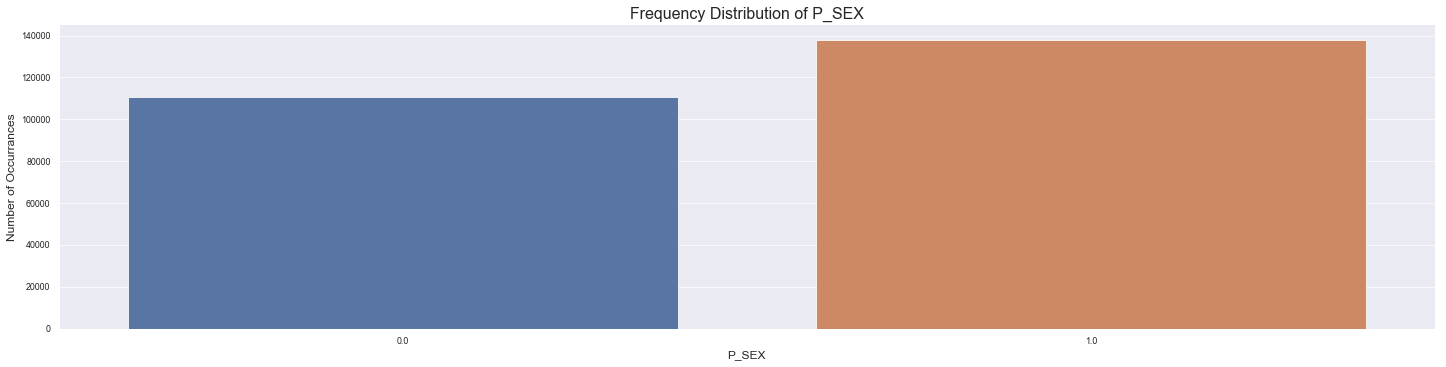

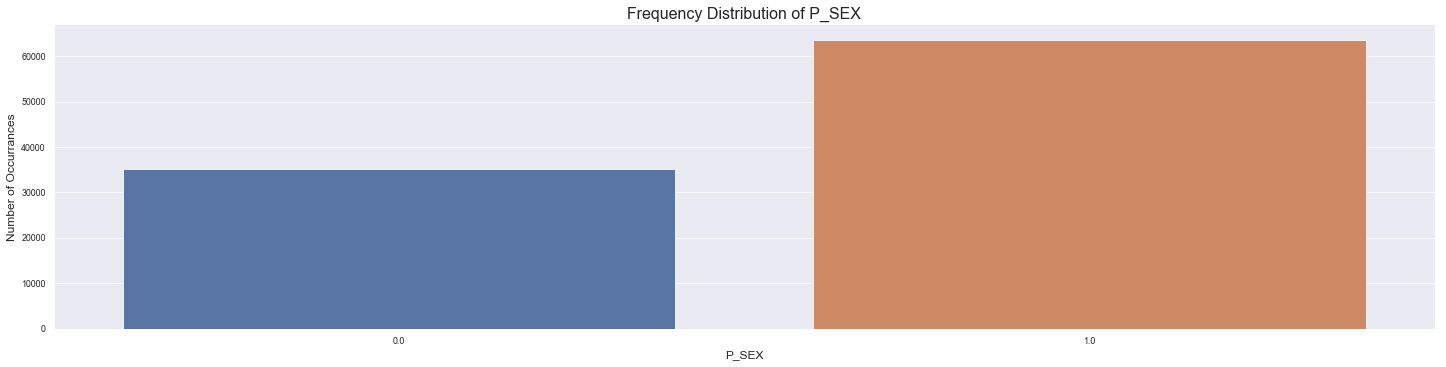

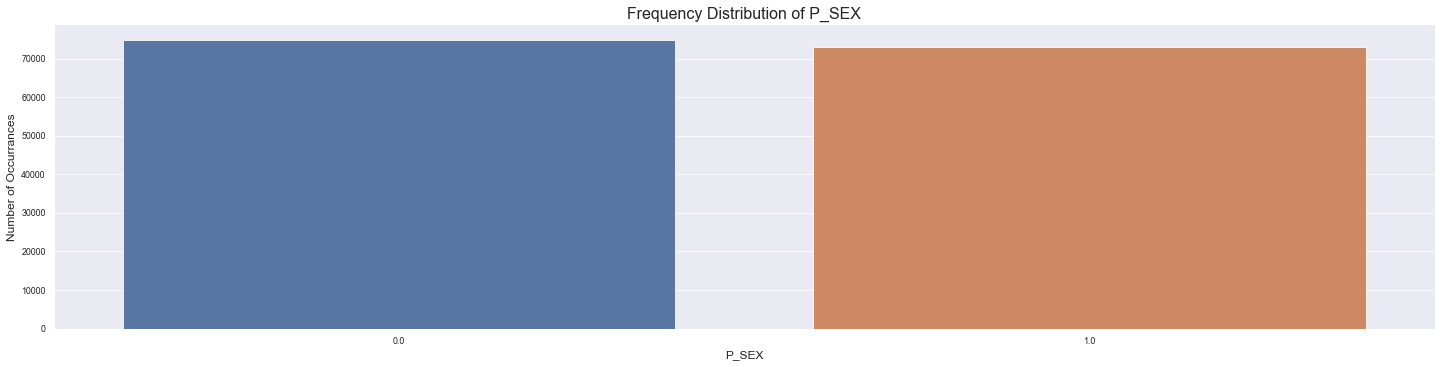

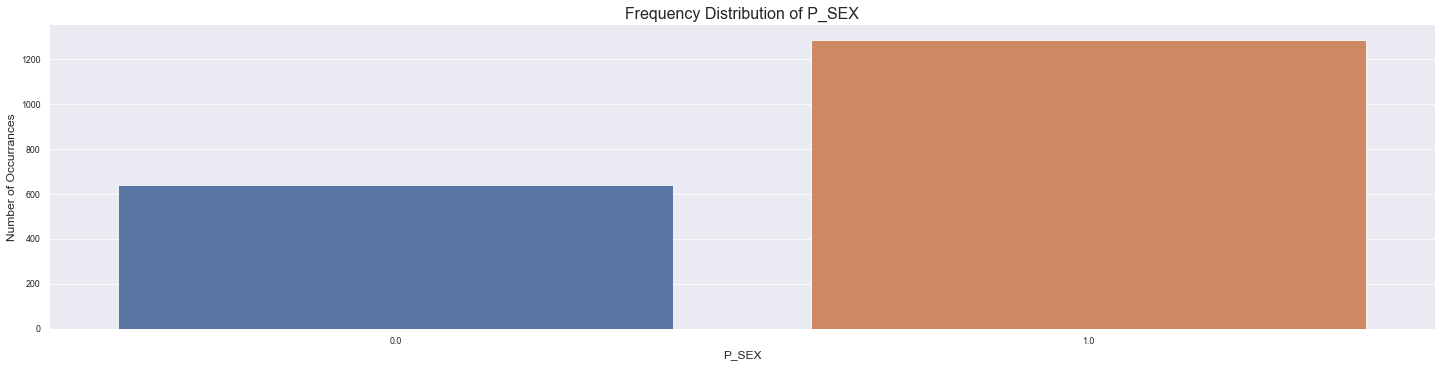

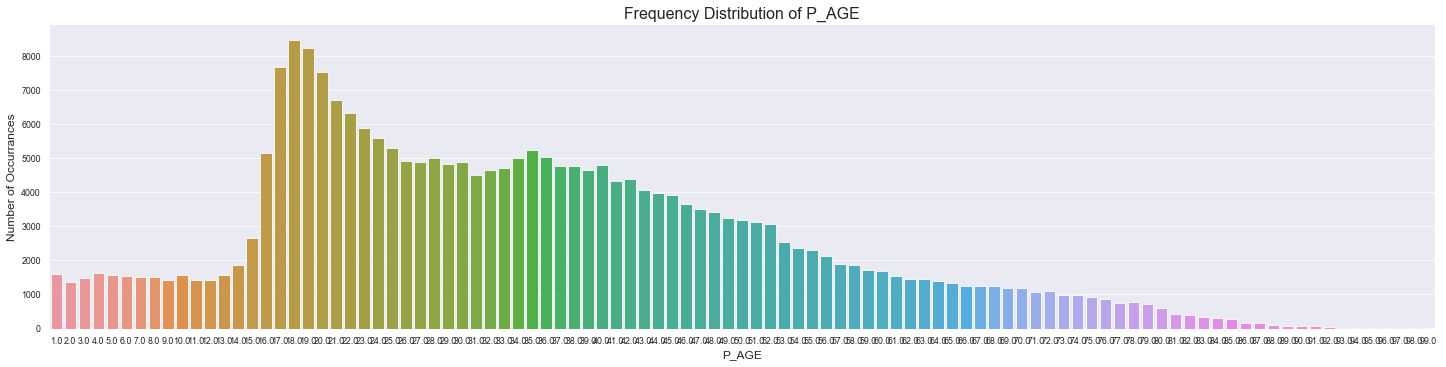

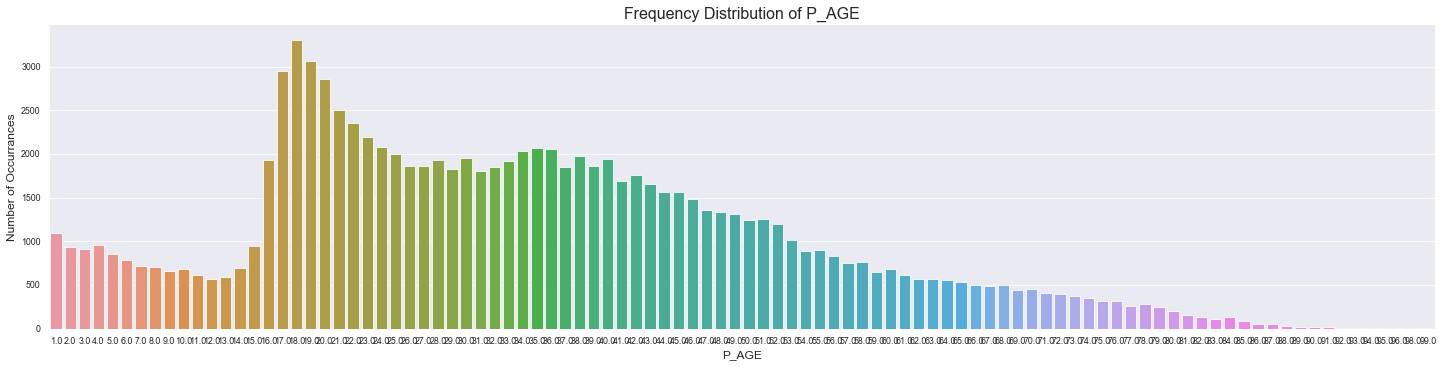

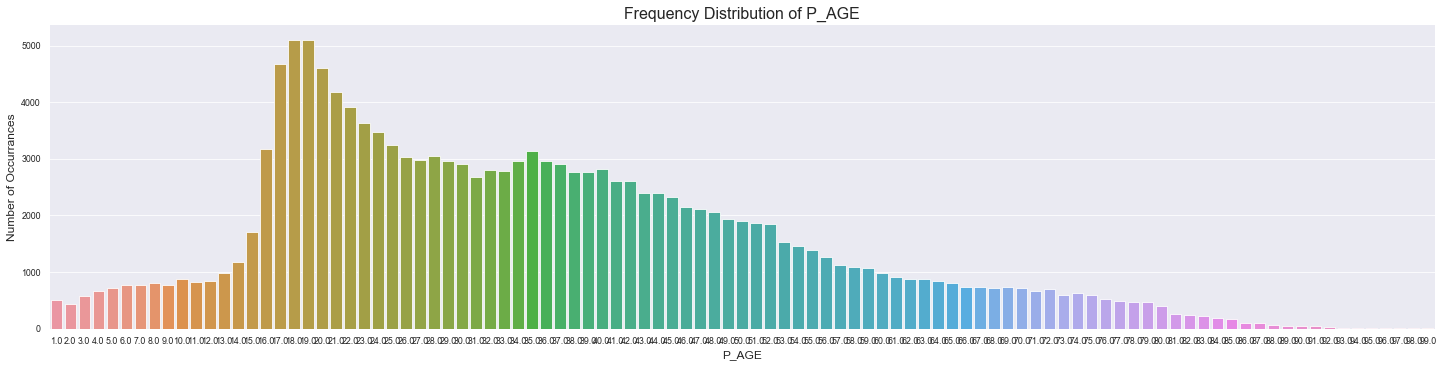

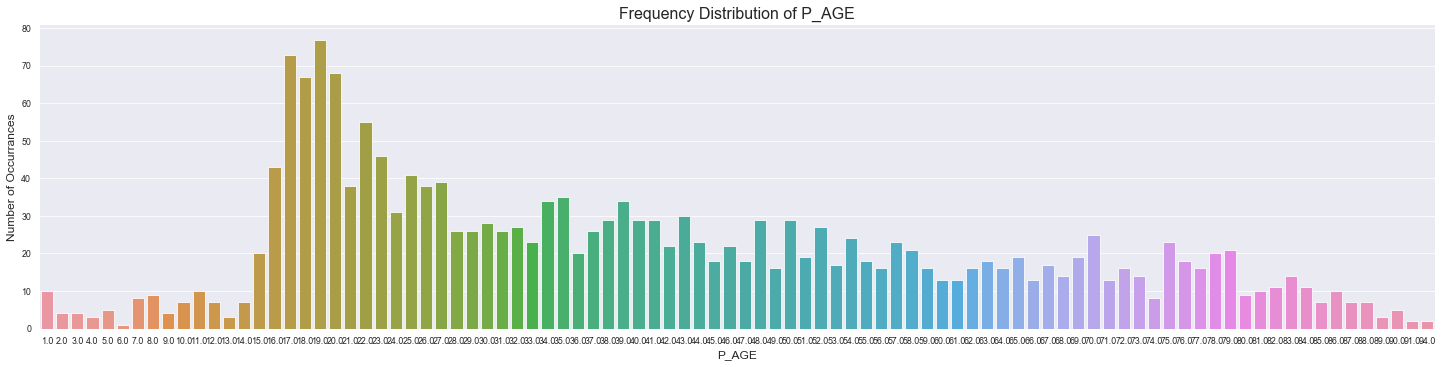

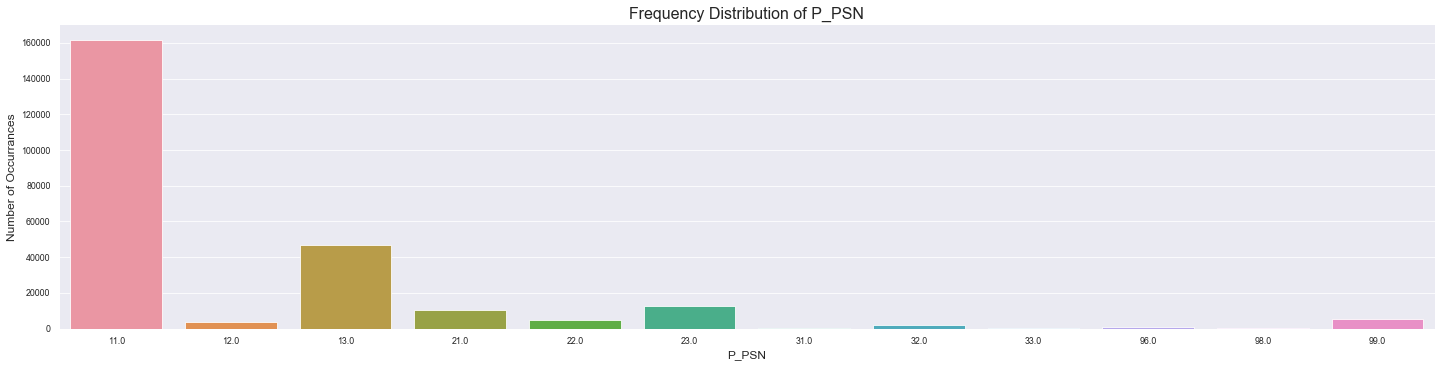

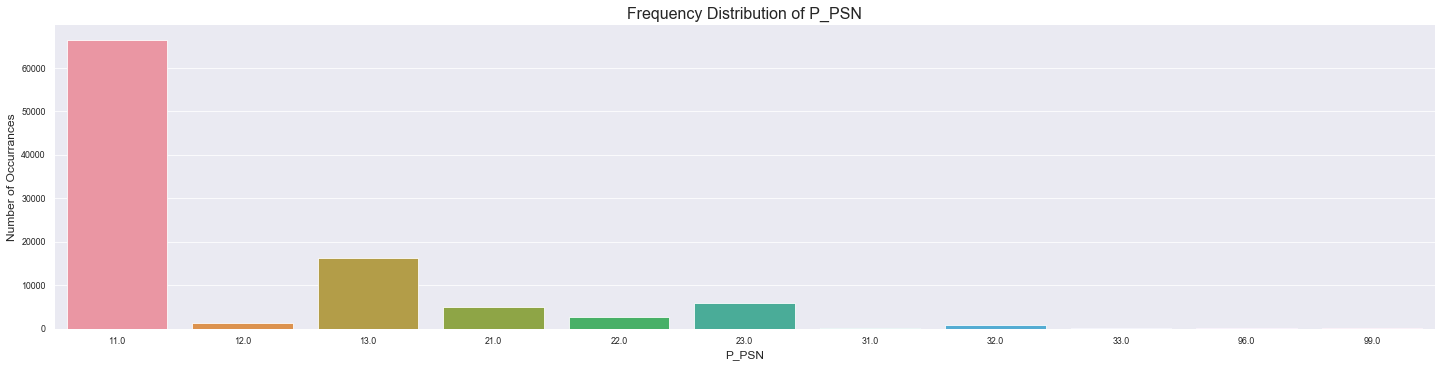

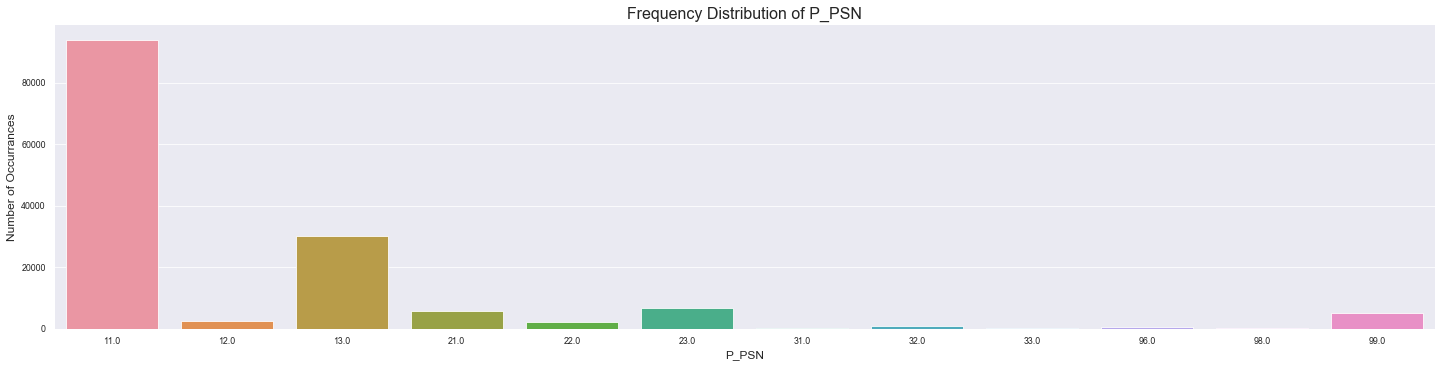

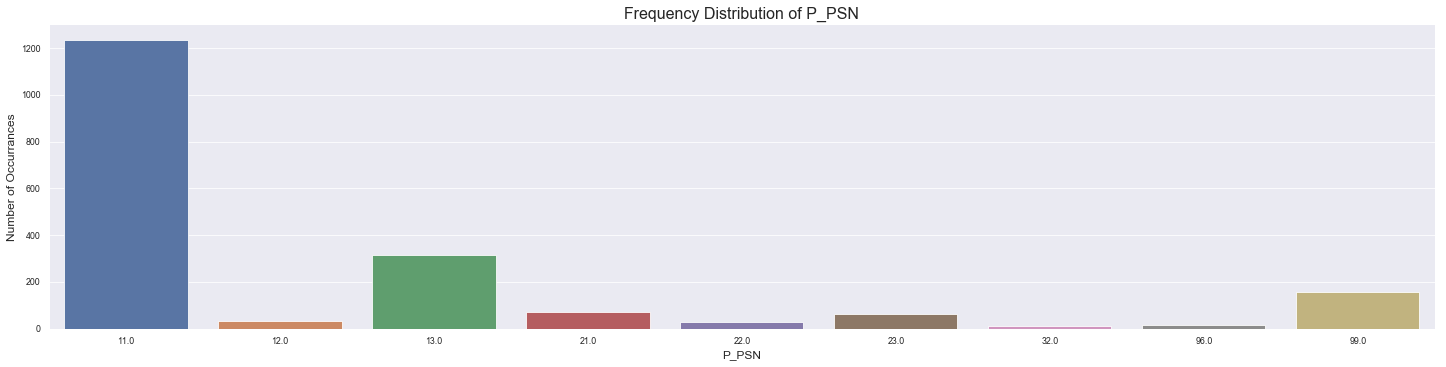

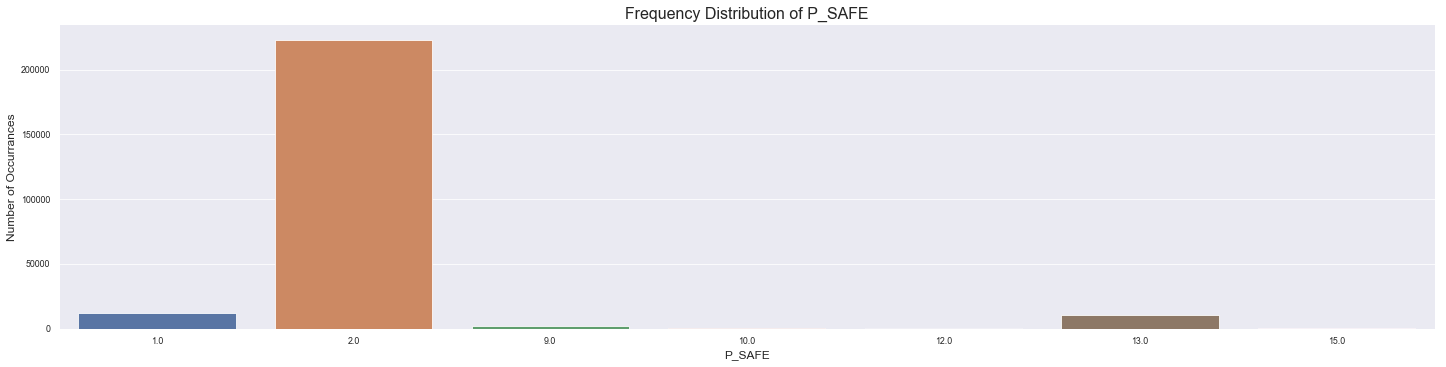

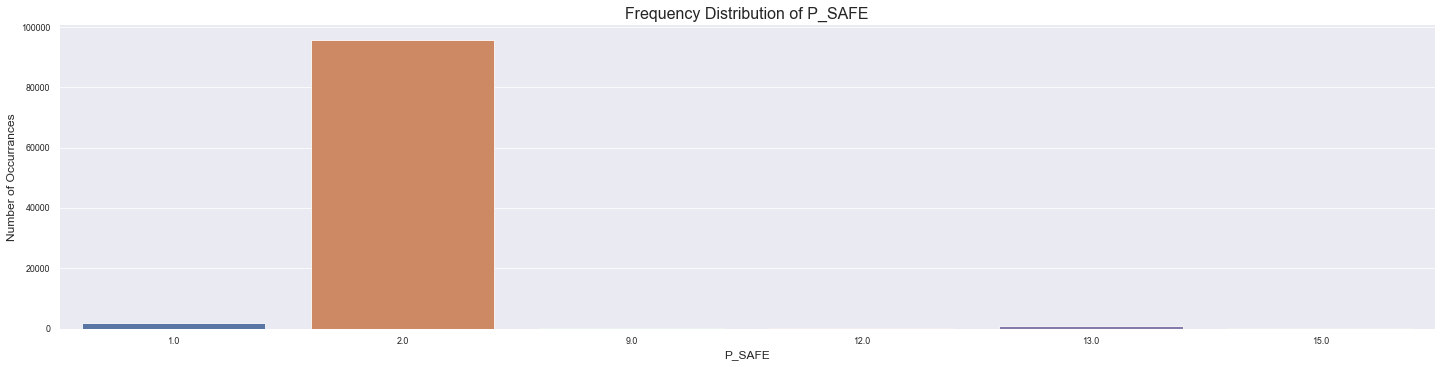

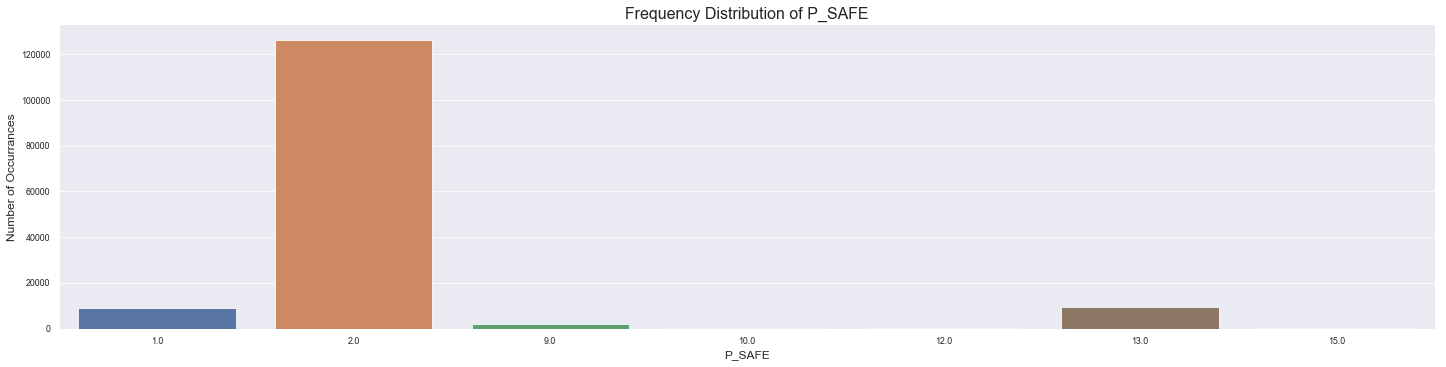

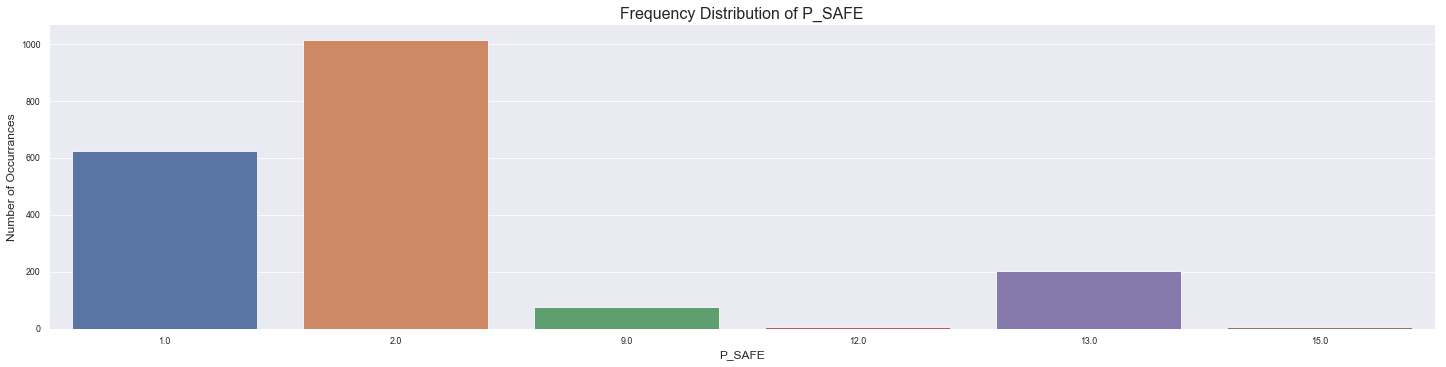

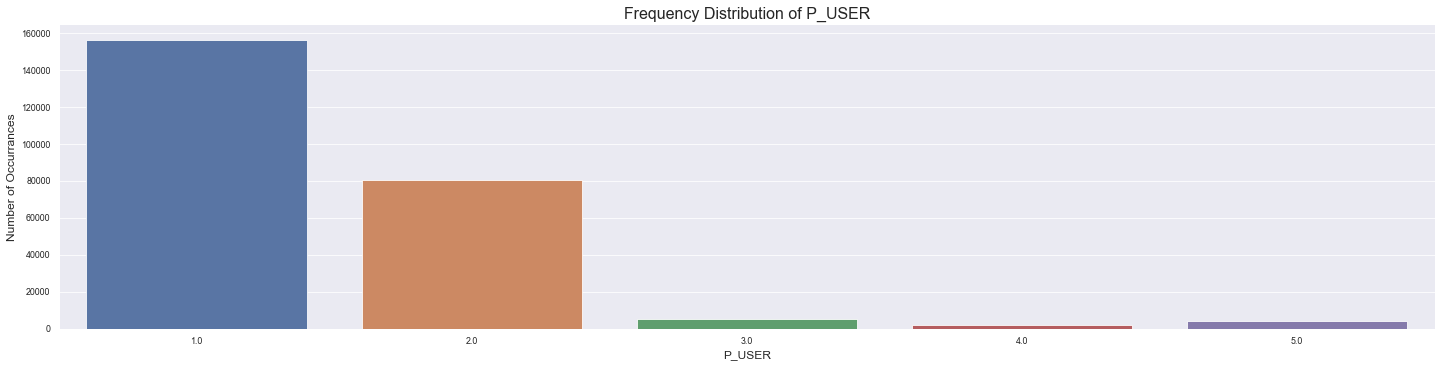

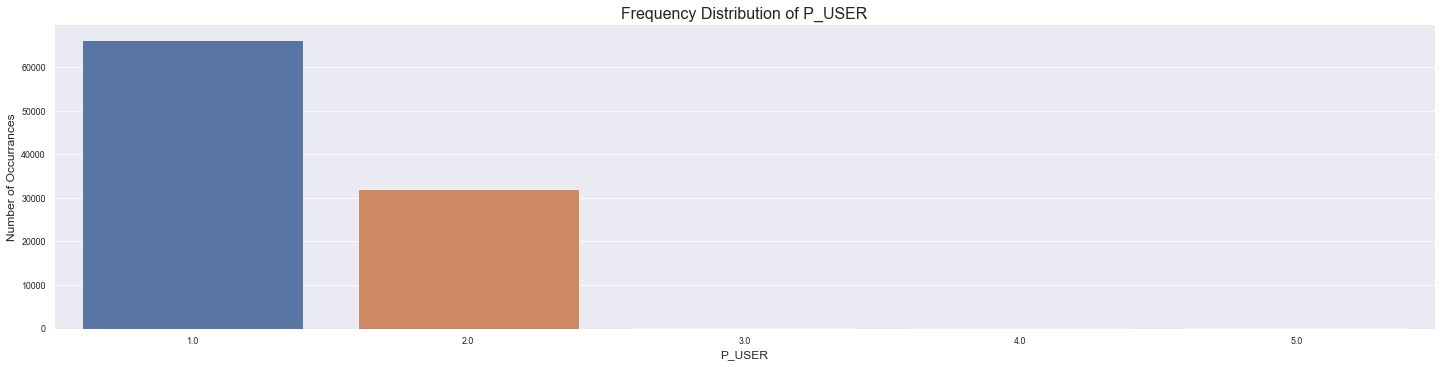

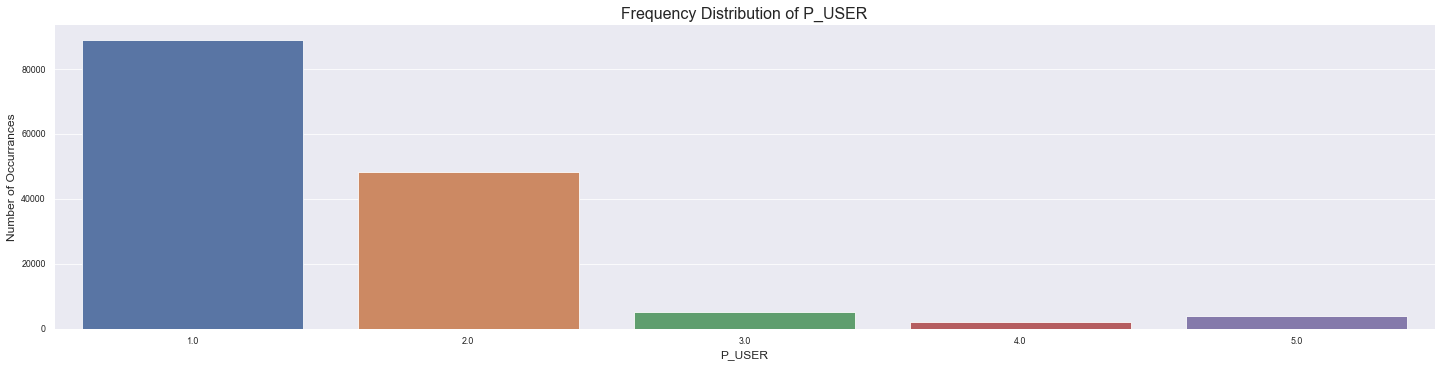

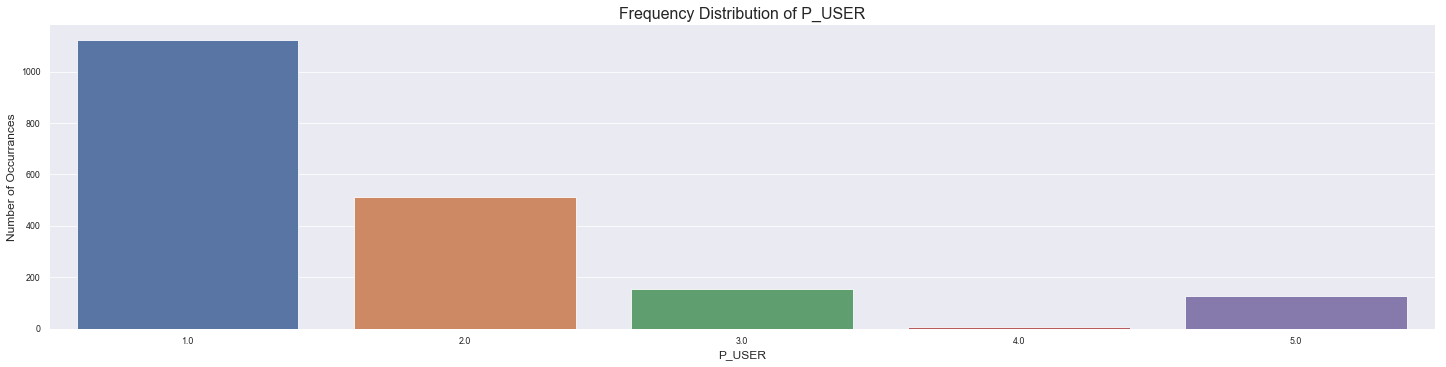

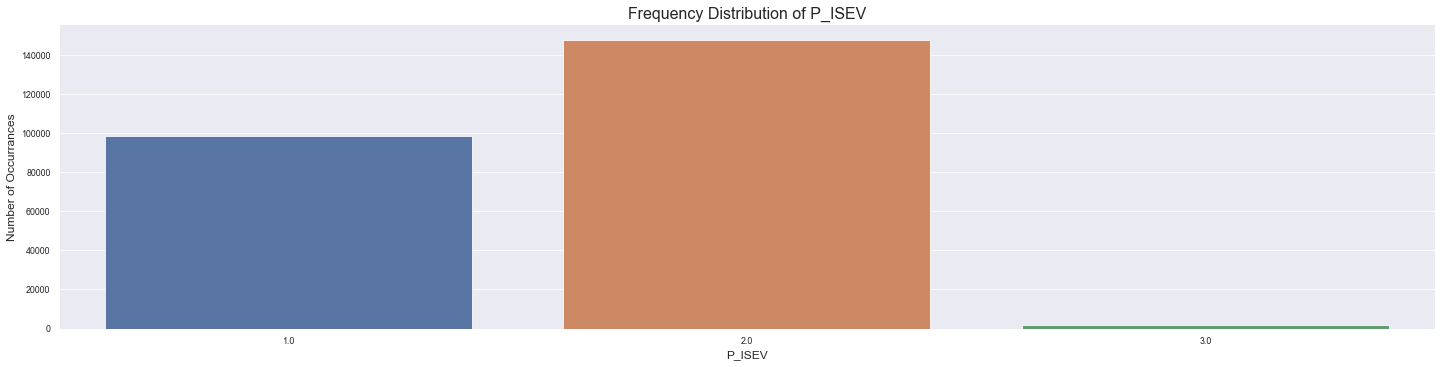

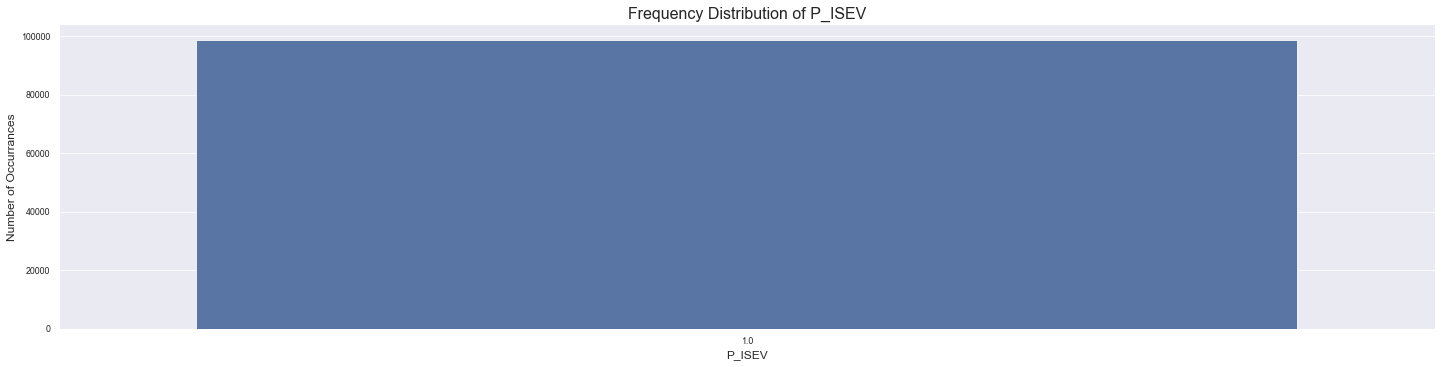

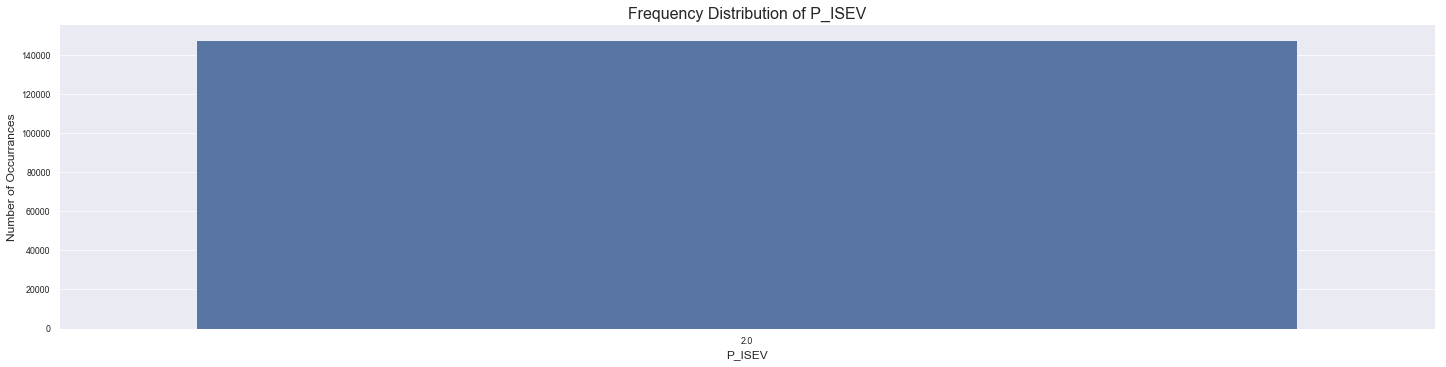

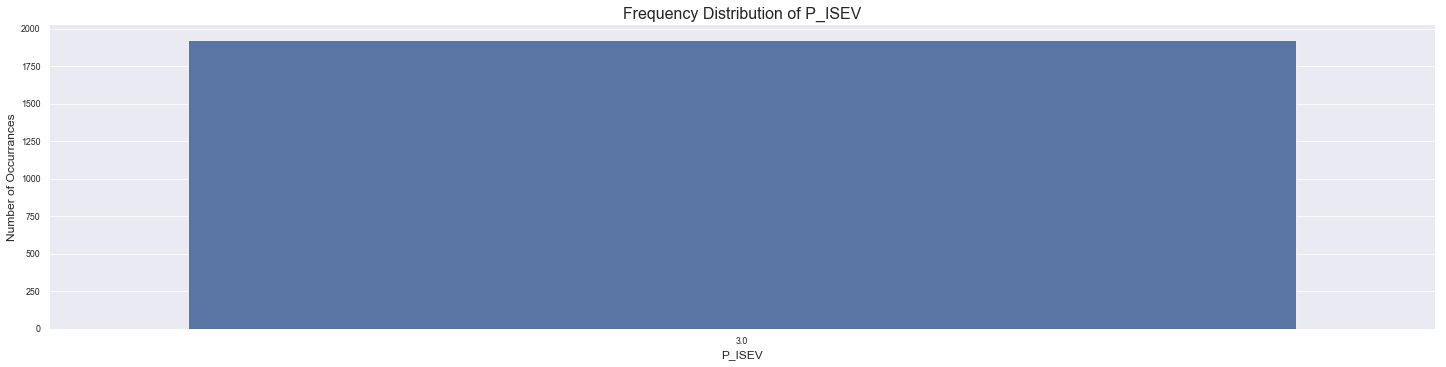

In [31]:
# making boolean series for a team name 
filter = df_multi['C_YEAR'] == 1999  
filter1 = (df_multi['C_YEAR'] == 1999) & (df_multi['P_ISEV'] == 1)
filter2 = (df_multi['C_YEAR'] == 1999) & (df_multi['P_ISEV'] == 2)
filter3 = (df_multi['C_YEAR'] == 1999) & (df_multi['P_ISEV'] == 3)
# filtering data 
df_tmp = df_multi.where(filter, try_cast = True ).dropna()
df_tmp1 = df_multi.where(filter1, try_cast = True ).dropna()
df_tmp2 = df_multi.where(filter2, try_cast = True ).dropna()
df_tmp3 = df_multi.where(filter3, try_cast = True ).dropna()

for col in df_tmp.columns[1:]:
    g = sns.catplot(x = col, data=df_tmp, kind="count", legend = True, height = 5, aspect = 4)
    g.set_xticklabels(step=1)
    plt.title('Frequency Distribution of {0}'.format(col), fontsize=16)
    plt.ylabel('Number of Occurrances', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.show()
    
    g = sns.catplot(x = col, data=df_tmp1, kind="count", legend = True, height = 5, aspect = 4)
    g.set_xticklabels(step=1)
    plt.title('Frequency Distribution of {0}'.format(col), fontsize=16)
    plt.ylabel('Number of Occurrances', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.show()

    g = sns.catplot(x = col, data=df_tmp2, kind="count", legend = True, height = 5, aspect = 4)
    g.set_xticklabels(step=1)
    plt.title('Frequency Distribution of {0}'.format(col), fontsize=16)
    plt.ylabel('Number of Occurrances', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.show()
    
    g = sns.catplot(x = col, data=df_tmp3, kind="count", legend = True, height = 5, aspect = 4)
    g.set_xticklabels(step=1)
    plt.title('Frequency Distribution of {0}'.format(col), fontsize=16)
    plt.ylabel('Number of Occurrances', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.show()